# Data Modelling (Base Data)

---

The `functions.py` script is first run. This script contains all the relevant imports as well as useful functions for the modelling step. The details of these functions can be viewed within the script. These functions will help to evaluate the models. Additionally, this notebook will only deal with the data modelling for the `base` dataset. This notebook will be the most detailed concerning the modelling process. Each additional dataset will have their own modelling notebook and will include only relevant information to the analysis of the models for that dataset or any relevant changes that are pertinent to that particular dataset.

In [19]:
%run functions.py

In [16]:
X_train_base_scaled = pd.read_csv('Data/base/X_train_base_scaled.csv')
y_train_base = pd.read_csv('Data/base/y_train_base.csv')
X_val_base_scaled = pd.read_csv('Data/base/X_val_base_scaled.csv')
y_val_base = pd.read_csv('Data/base/y_val_base.csv')
X_test_base_scaled = pd.read_csv('Data/base/X_test_base_scaled.csv')
y_test_base = pd.read_csv('Data/base/y_test_base.csv')

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

b_baseline_model = DummyClassifier(random_state=21)

b_baseline_model.fit(X_train_base_scaled, y_train_base)

b_baseline_results = cross_val_score(b_baseline_model,
                                     X_train_base_scaled,
                                     y_train_base,
                                     scoring='f1',
                                     cv=10).mean()

print(f"Train f1: {b_baseline_results}")

Train f1: 0.011350257220467187


In [4]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [5]:
n_features = X_train_base_scaled.shape[1]

In [6]:
def modelling_v1(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v1 = models.Sequential()

    model_v1.add(layers.Input(shape=(n_features, )))
    model_v1.add(layers.Dense(32, activation='relu'))
    model_v1.add(layers.Dense(16, activation='relu'))
    model_v1.add(layers.Dense(1, activation='sigmoid'))

    model_v1.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v1_history = model_v1.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v1,
             name,
             model_v1_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00014: early stopping
Results for Base Model V1 with threshold = 0.5.

 Train f1: 0.04519640271699452 
 Val f1: 0.04960835361075557 

 Train Recall: 0.02343270741403103 
 Val Recall: 0.02620689570903778 

 Train FPR: 0.00013980006042402238 
 Val FPR: 0.0004123015678487718


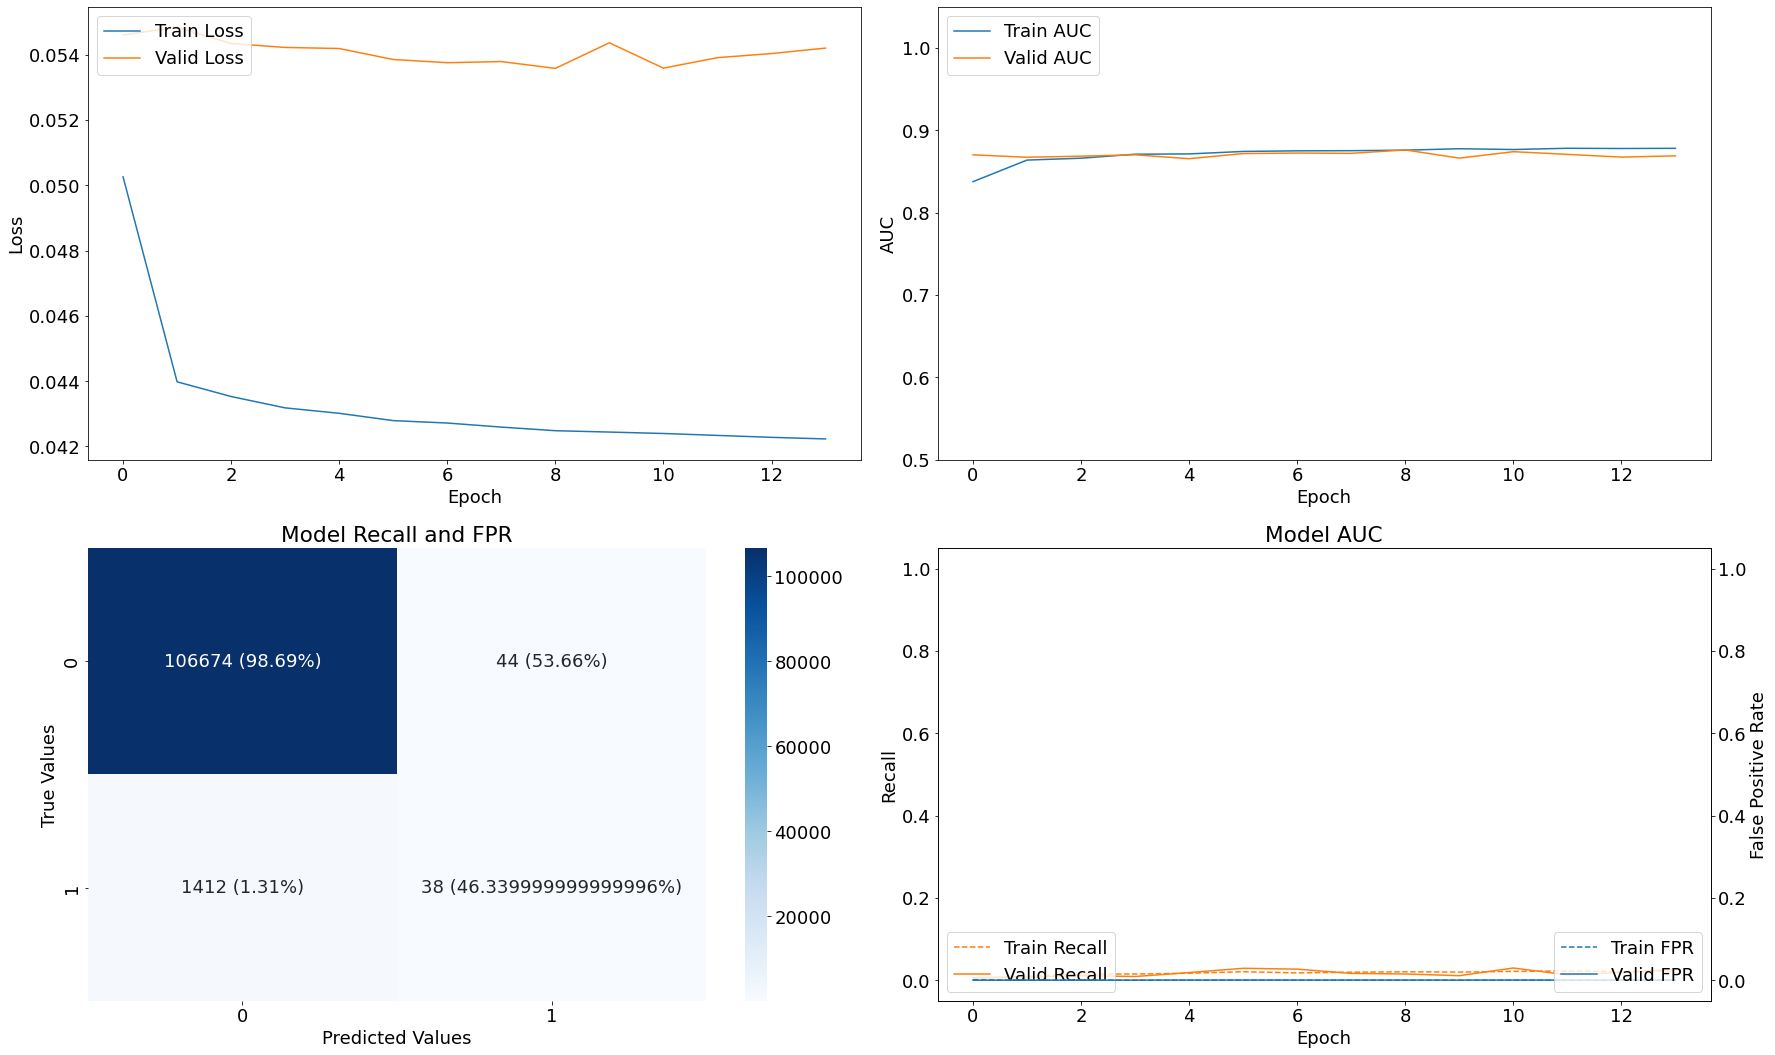

In [7]:
modelling_v1(X_train_base_scaled,
             y_train_base,
             X_val_base_scaled,
             y_val_base,
             'Base Model V1')

In [8]:
def modelling_v2(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v2 = models.Sequential()

    model_v2.add(layers.Input(shape=(n_features, )))
    model_v2.add(layers.Dense(32, activation='relu'))
    model_v2.add(layers.Dropout(0.5))
    model_v2.add(layers.Dense(16, activation='relu'))
    model_v2.add(layers.Dropout(0.5))
    model_v2.add(layers.Dense(1, activation='sigmoid'))

    model_v2.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['AUC',
                                   tf.keras.metrics.Precision(thresholds=threshold),
                                   tf.keras.metrics.Recall(thresholds=threshold),
                                   FalsePositiveRate(threshold=threshold)])

    model_v2_history = model_v2.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v2,
             name,
             model_v2_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00008: early stopping
Results for Base Model V2 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.00907864049077034 
 Val Recall: 0.0 

 Train FPR: 0.00013725824828725308 
 Val FPR: 0.0


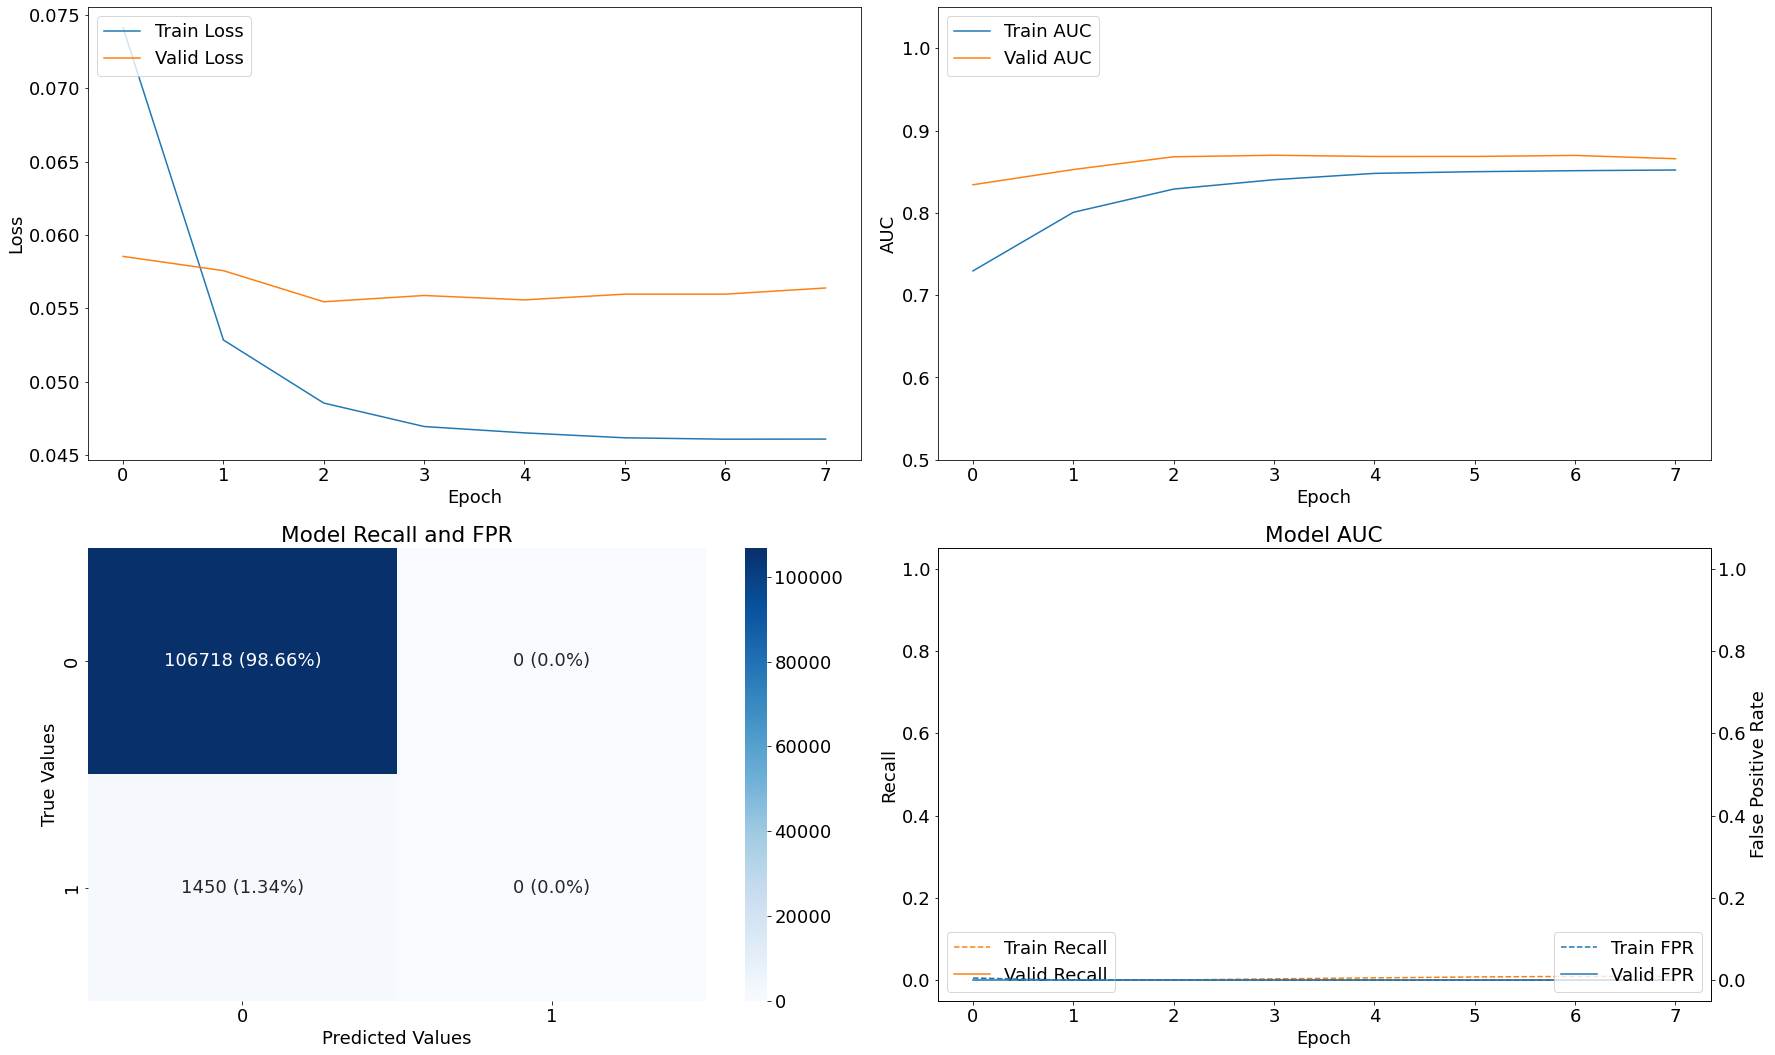

In [9]:
modelling_v2(X_train_base_scaled,
             y_train_base,
             X_val_base_scaled,
             y_val_base,
            'Base Model V2')

In [10]:
class_weight = create_class_weight({0: len(y_train_base == 0), 1: len(y_train_base == 1)})

In [11]:
def modelling_v3(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v3 = models.Sequential()

    model_v3.add(layers.Input(shape=(n_features, )))
    model_v3.add(layers.Dense(32, activation='relu'))
    model_v3.add(layers.Dropout(0.5))
    model_v3.add(layers.Dense(16, activation='relu'))
    model_v3.add(layers.Dropout(0.5))
    model_v3.add(layers.Dense(1, activation='sigmoid'))

    model_v3.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v3_history = model_v3.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v3,
             name,
             model_v3_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00017: early stopping
Results for Base Model V3 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.012636486440896988 
 Val Recall: 0.0 

 Train FPR: 0.00016903098730836064 
 Val FPR: 9.370490261062514e-06


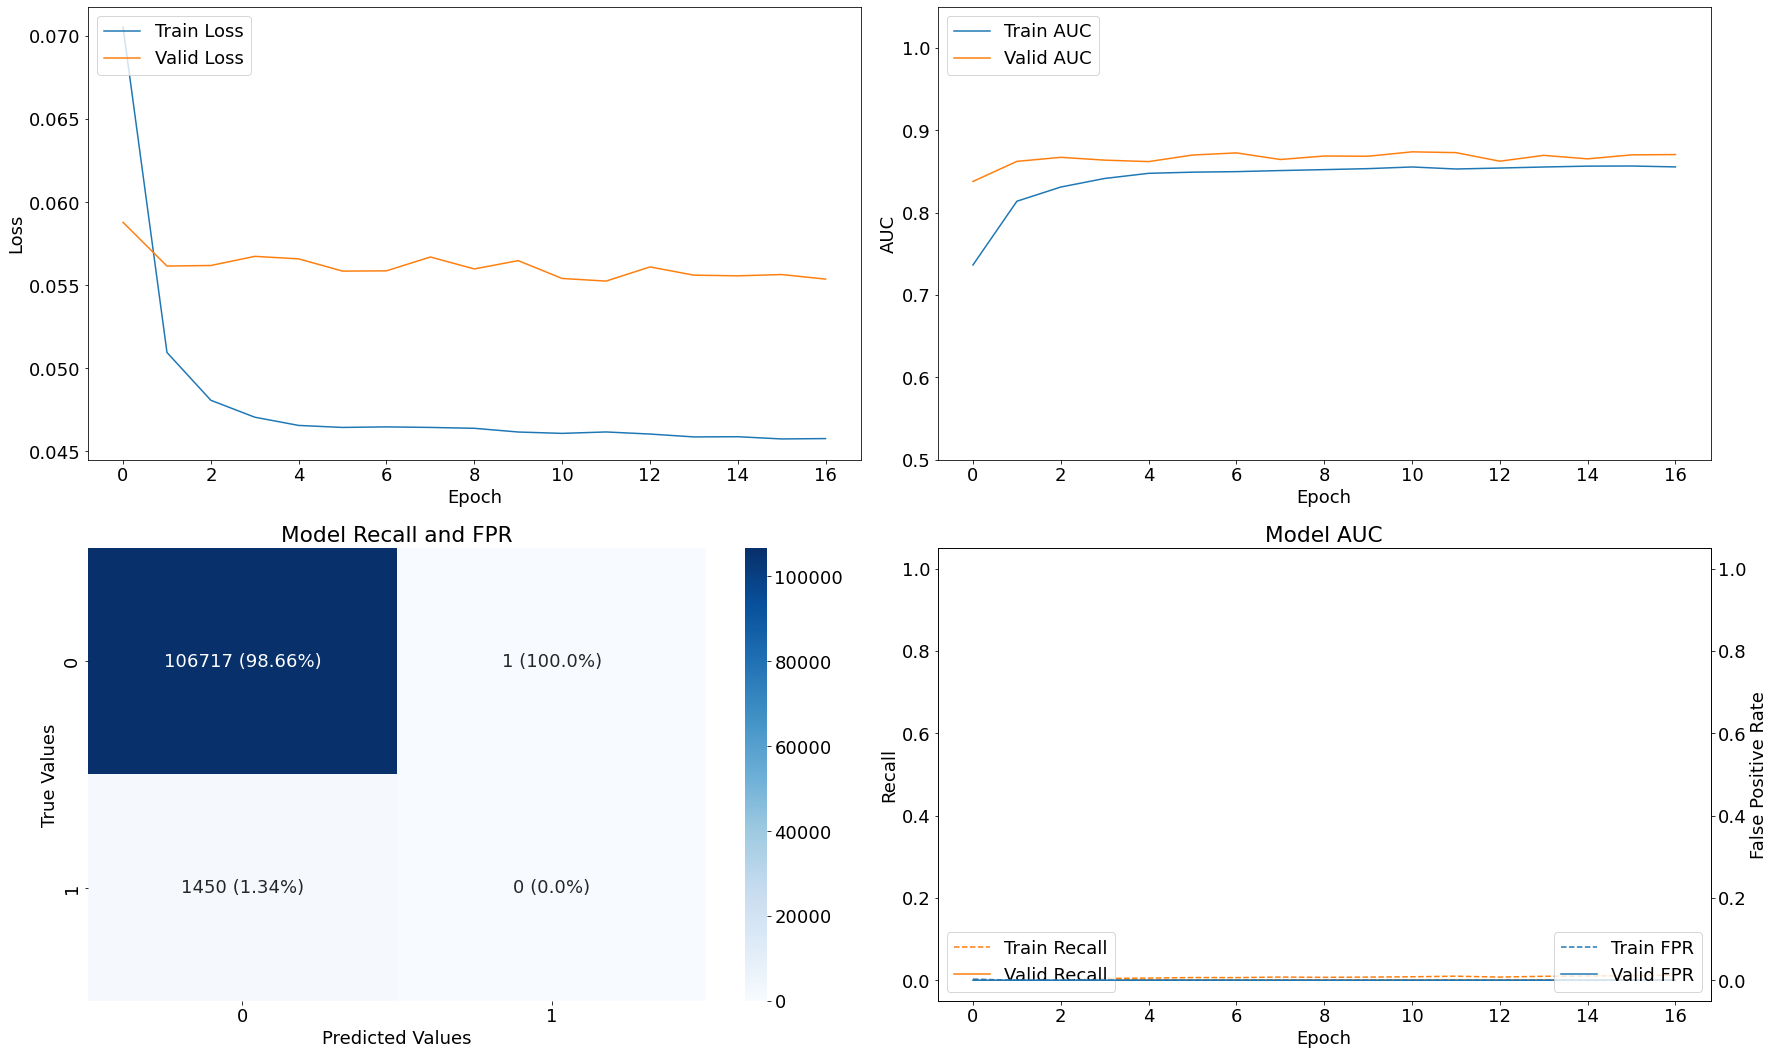

In [12]:
modelling_v3(X_train_base_scaled,
             y_train_base,
             X_val_base_scaled,
             y_val_base,
            'Base Model V3')

In [15]:
X_train_base_scaled_resampled = pd.read_csv('Data/base/X_train_base_scaled_resampled.csv')
y_train_base_resampled = pd.read_csv('Data/base/y_train_base_resampled.csv')

In [21]:
def modelling_v4(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):    
    
    model_v4 = models.Sequential()

    model_v4.add(layers.Input(shape=(n_features, )))
    model_v4.add(layers.Dense(32, activation='relu'))
    model_v4.add(layers.Dropout(0.5))
    model_v4.add(layers.Dense(16, activation='relu'))
    model_v4.add(layers.Dropout(0.5))
    model_v4.add(layers.Dense(1, activation='sigmoid'))

    model_v4.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v4_history = model_v4.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history

    evaluate(model_v4,
             'Base Model V4',
             model_v4_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00012: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.68582634304325 
 Val f1: 0.20109626014630247 

 Train Recall: 0.6170027852058411 
 Val Recall: 0.4048275947570801 

 Train FPR: 0.04557354748249054 
 Val FPR: 0.03561723604798317


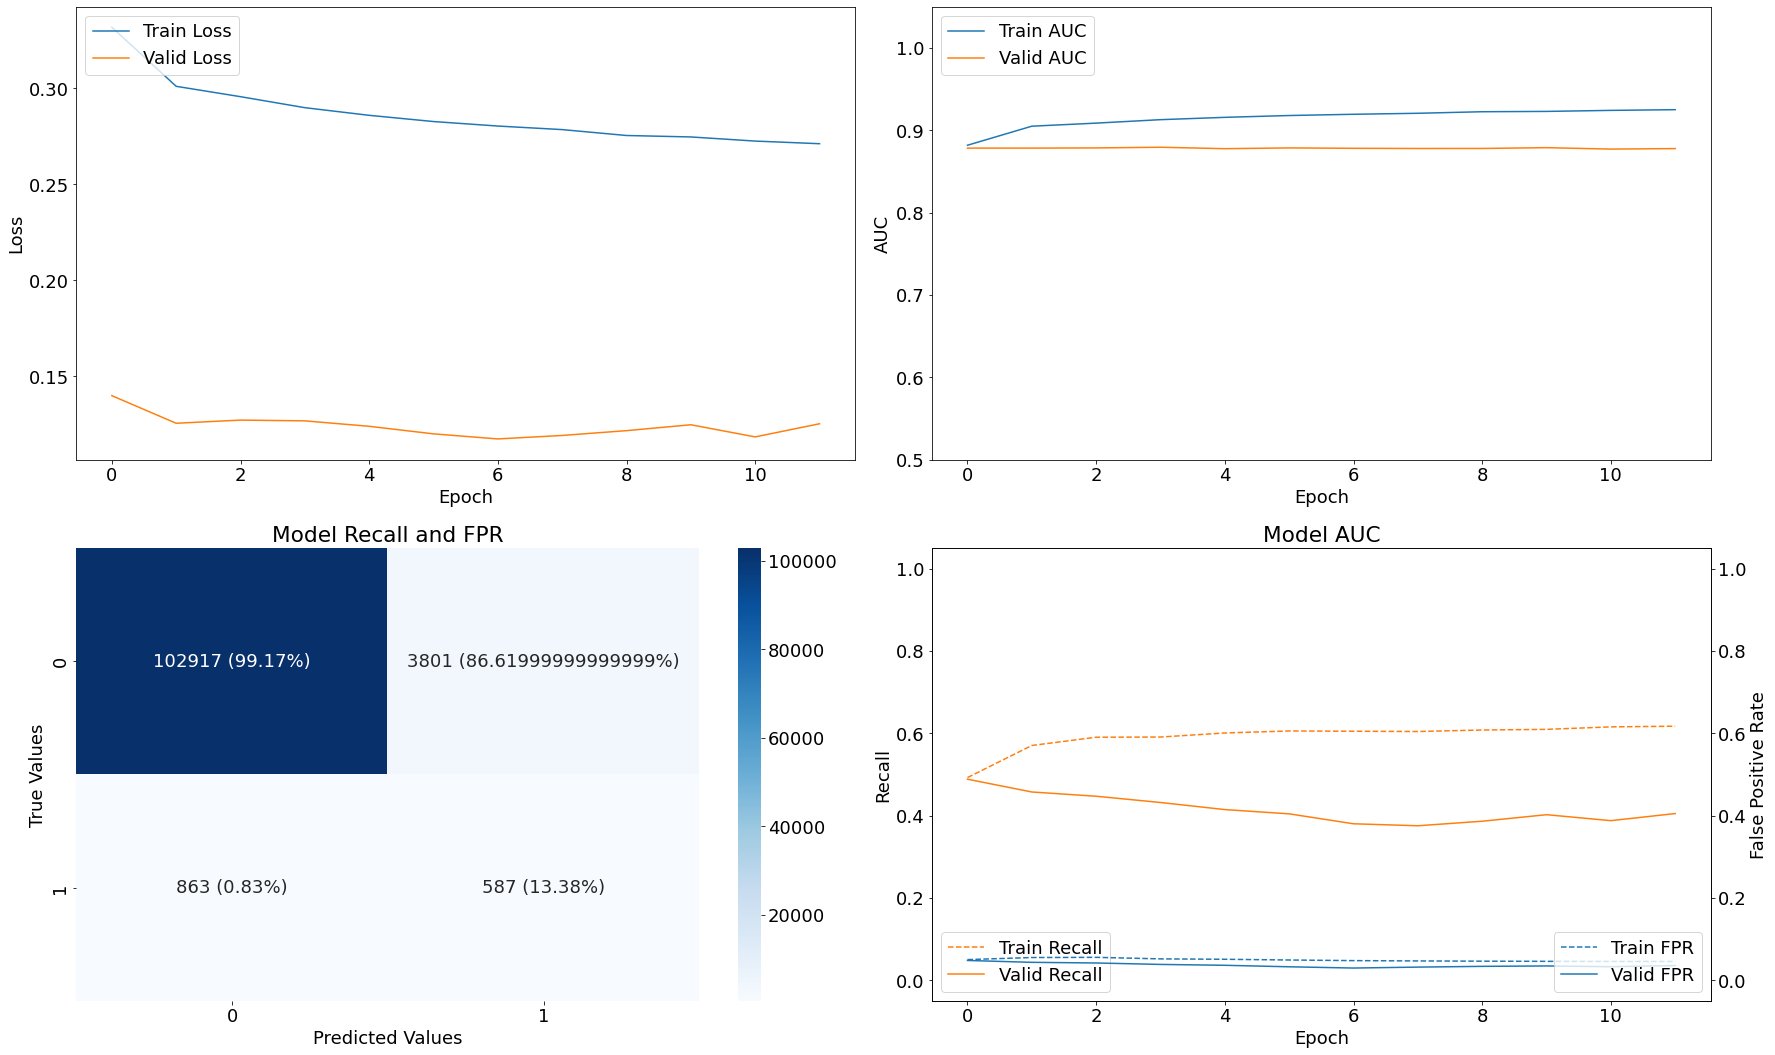

Epoch 00020: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6954042745355296 
 Val f1: 0.20127222293520672 

 Train Recall: 0.6287358403205872 
 Val Recall: 0.4255172312259674 

 Train FPR: 0.044880904257297516 
 Val FPR: 0.03808167204260826


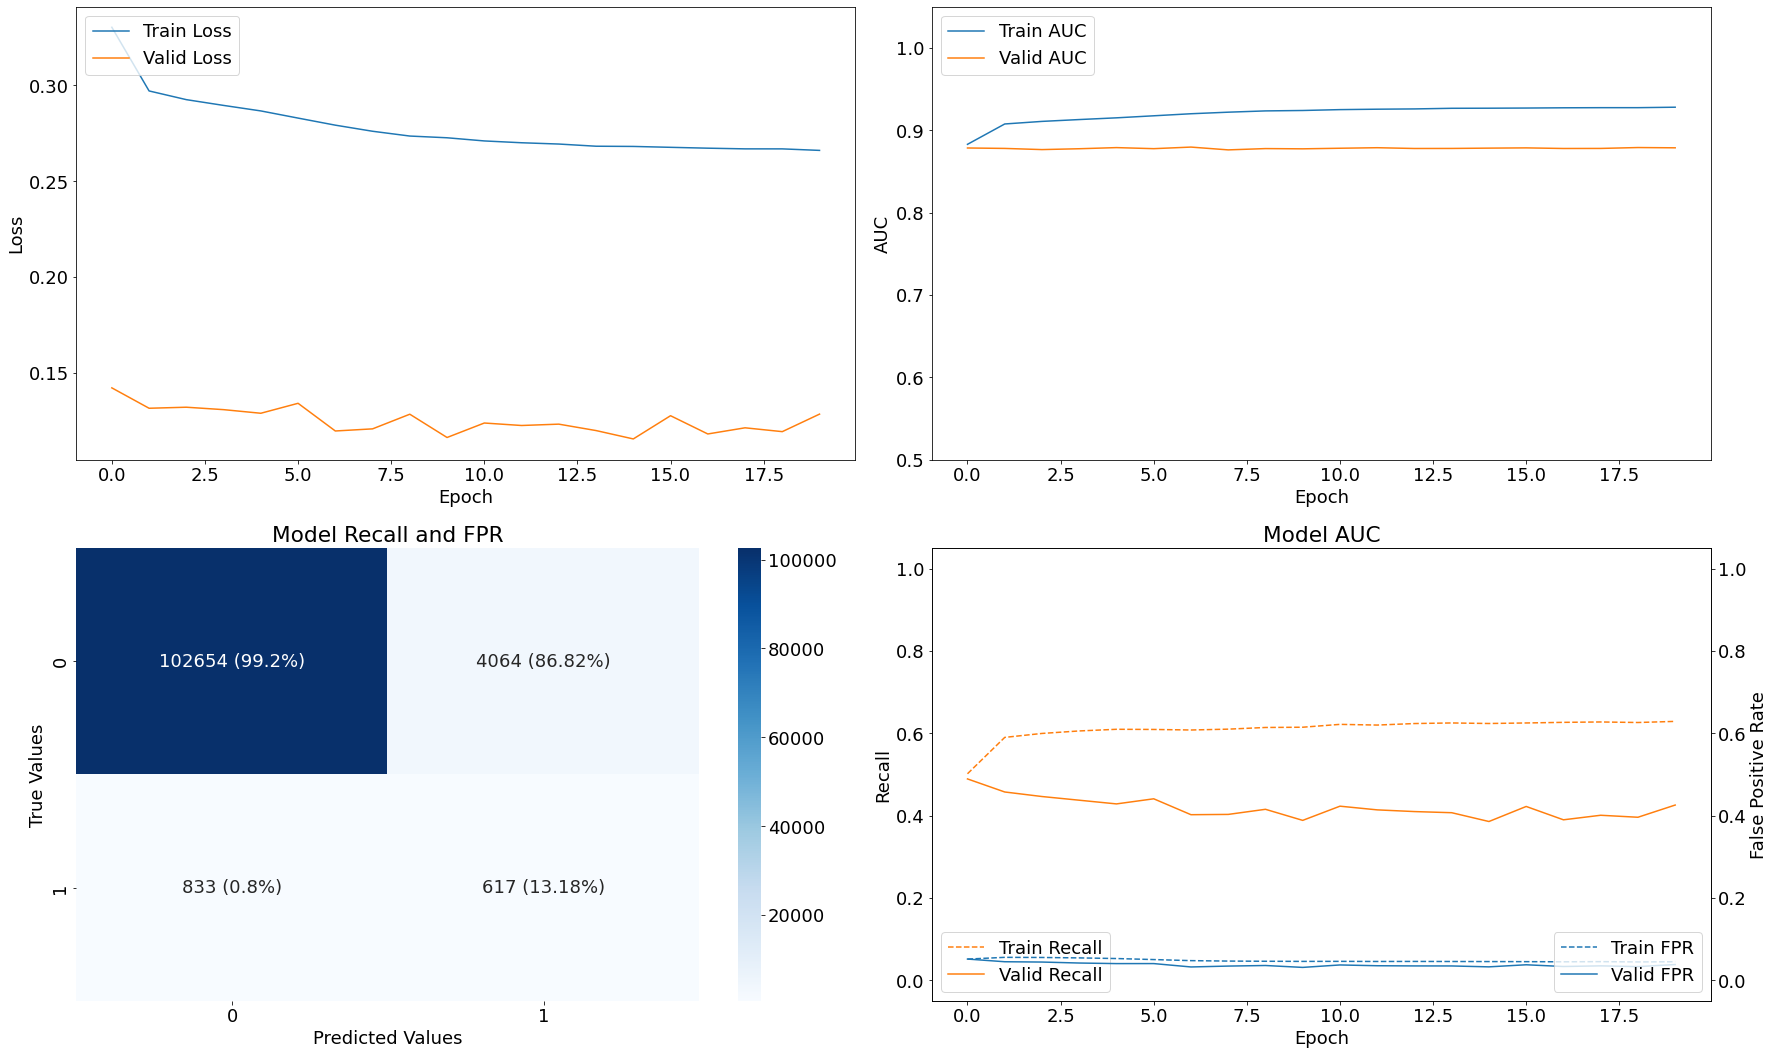

Epoch 00026: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.7061278100349048 
 Val f1: 0.21994255708996185 

 Train Recall: 0.6417804956436157 
 Val Recall: 0.36965516209602356 

 Train FPR: 0.043991267681121826 
 Val FPR: 0.027061976492404938


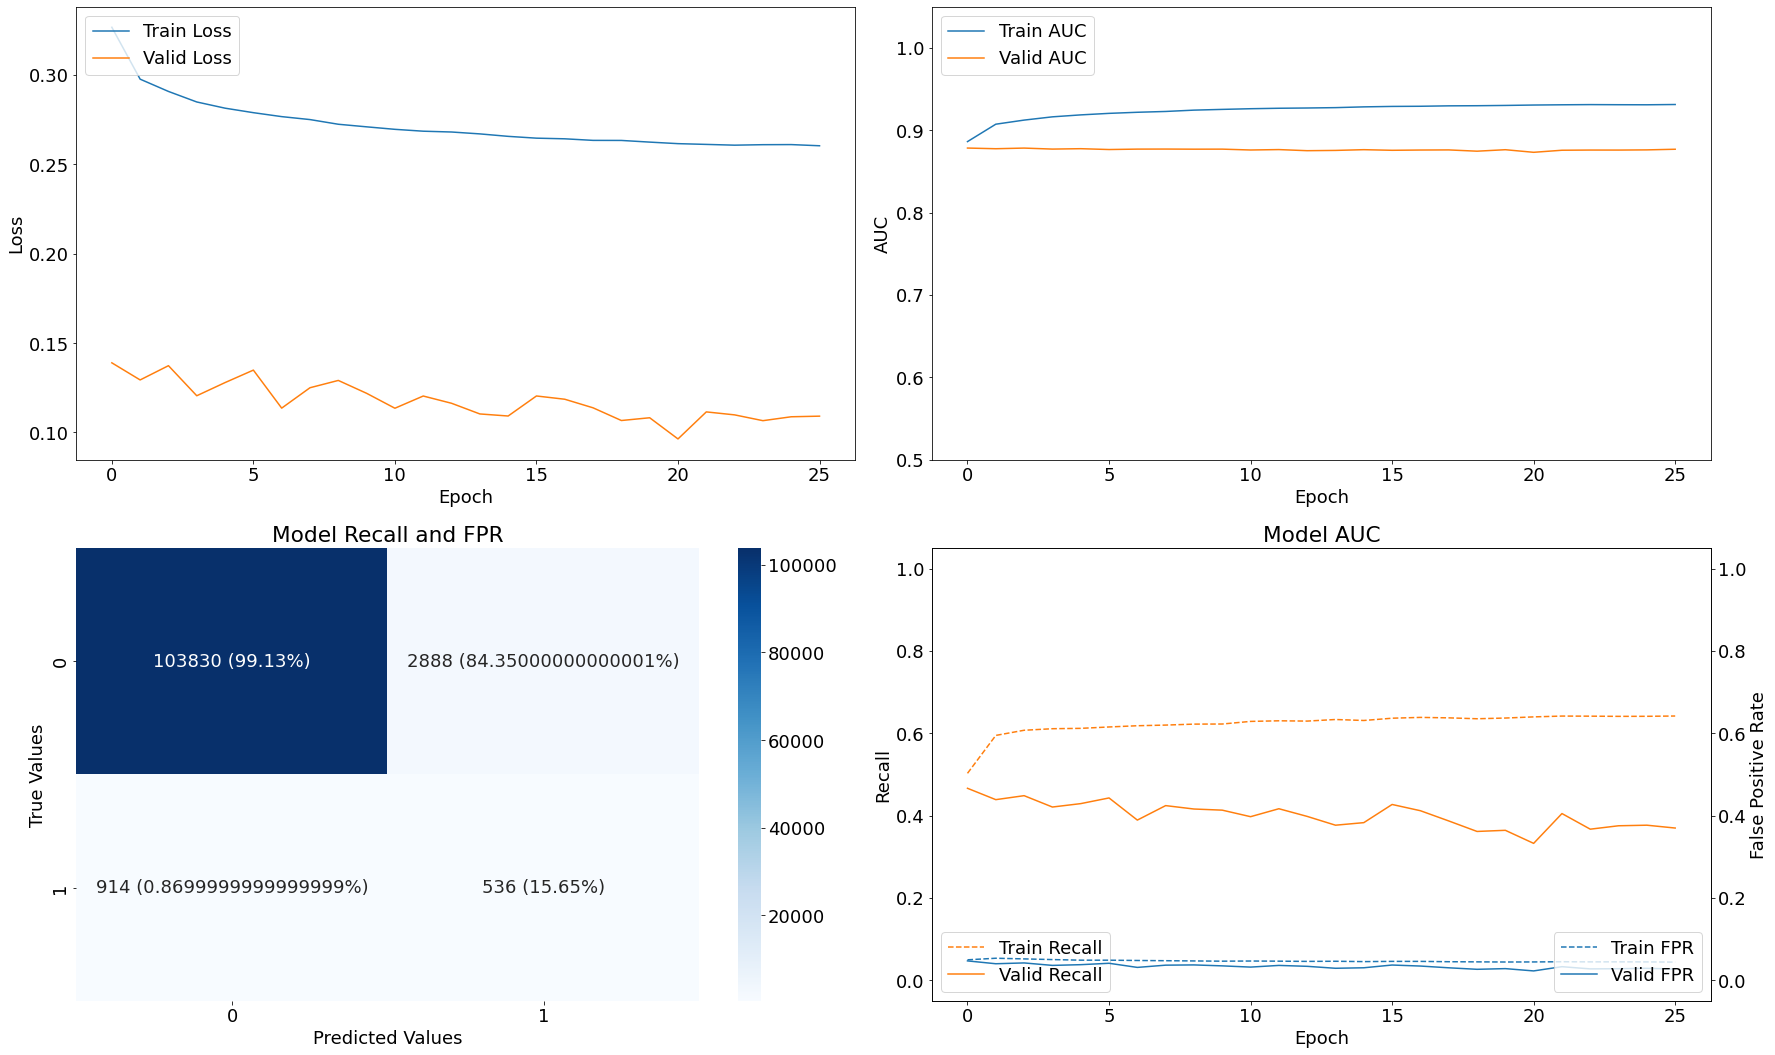

Epoch 00021: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.696542333549091 
 Val f1: 0.2048450294753987 

 Train Recall: 0.6297169923782349 
 Val Recall: 0.3965517282485962 

 Train FPR: 0.04460130259394646 
 Val FPR: 0.03363069146871567


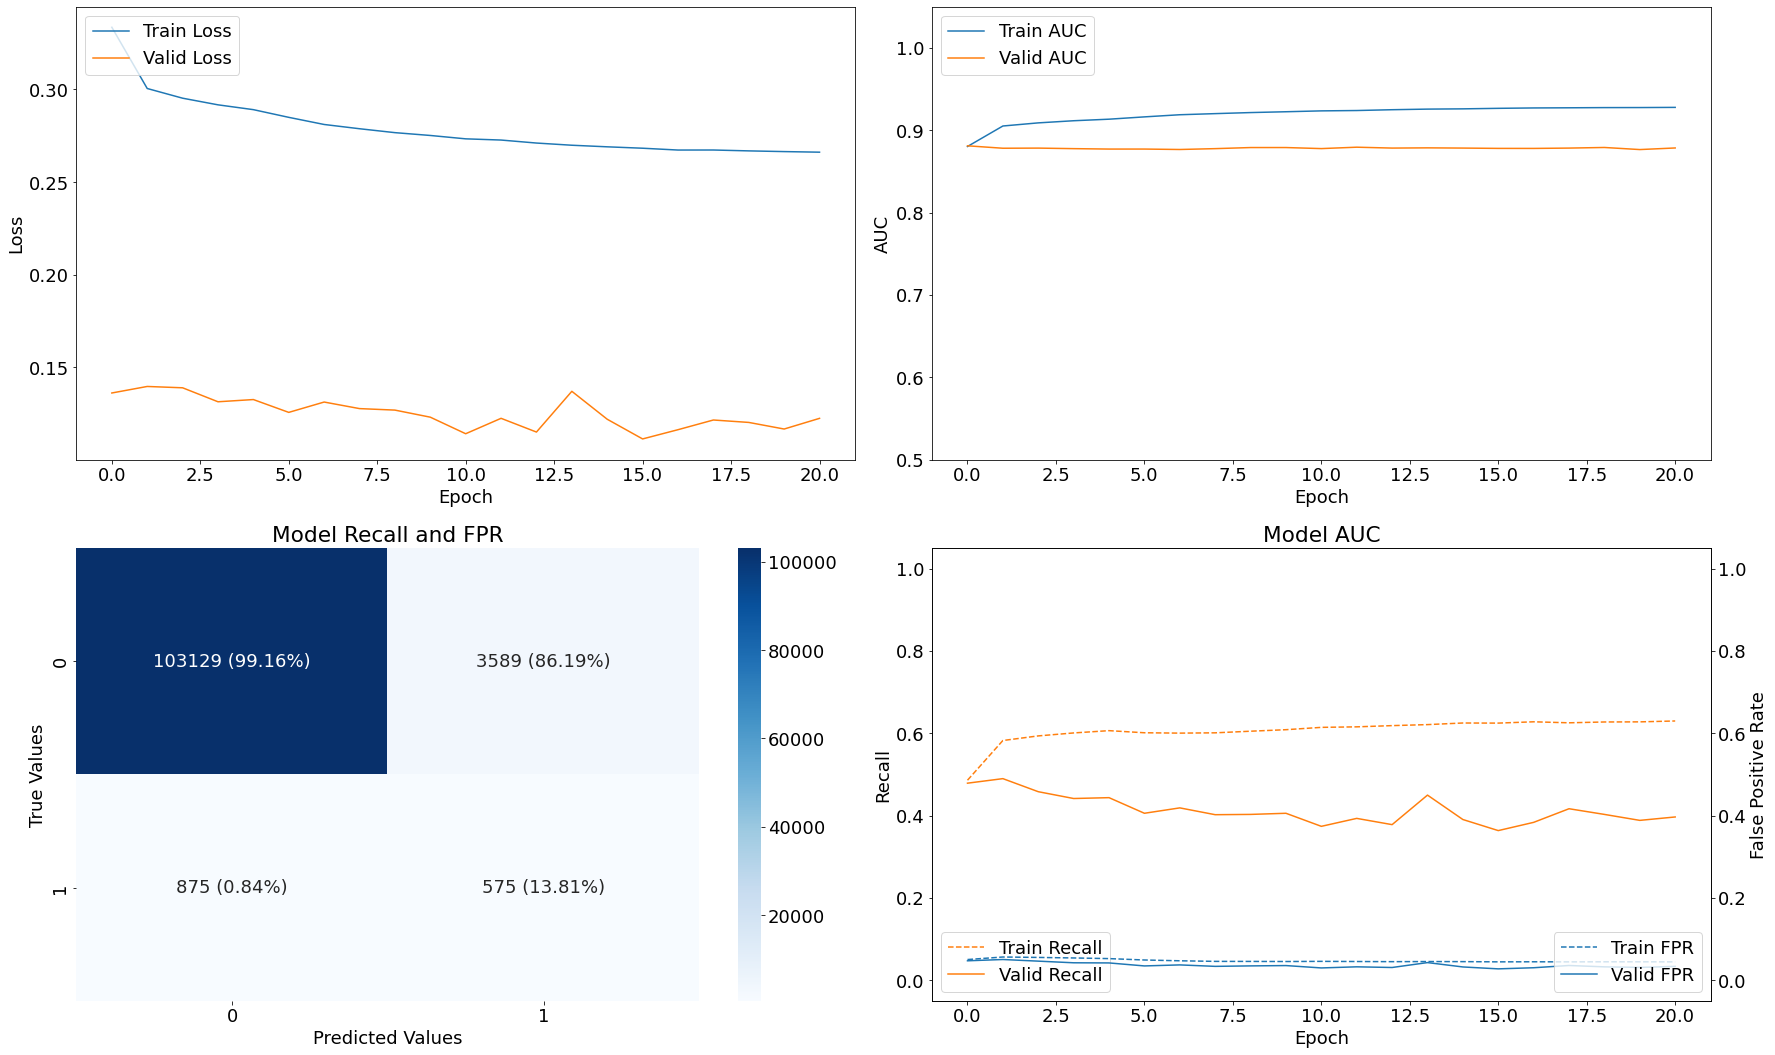

Epoch 00021: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6912476312894084 
 Val f1: 0.2084339566259237 

 Train Recall: 0.622061014175415 
 Val Recall: 0.386896550655365 

 Train FPR: 0.044439896941185 
 Val FPR: 0.03159729391336441


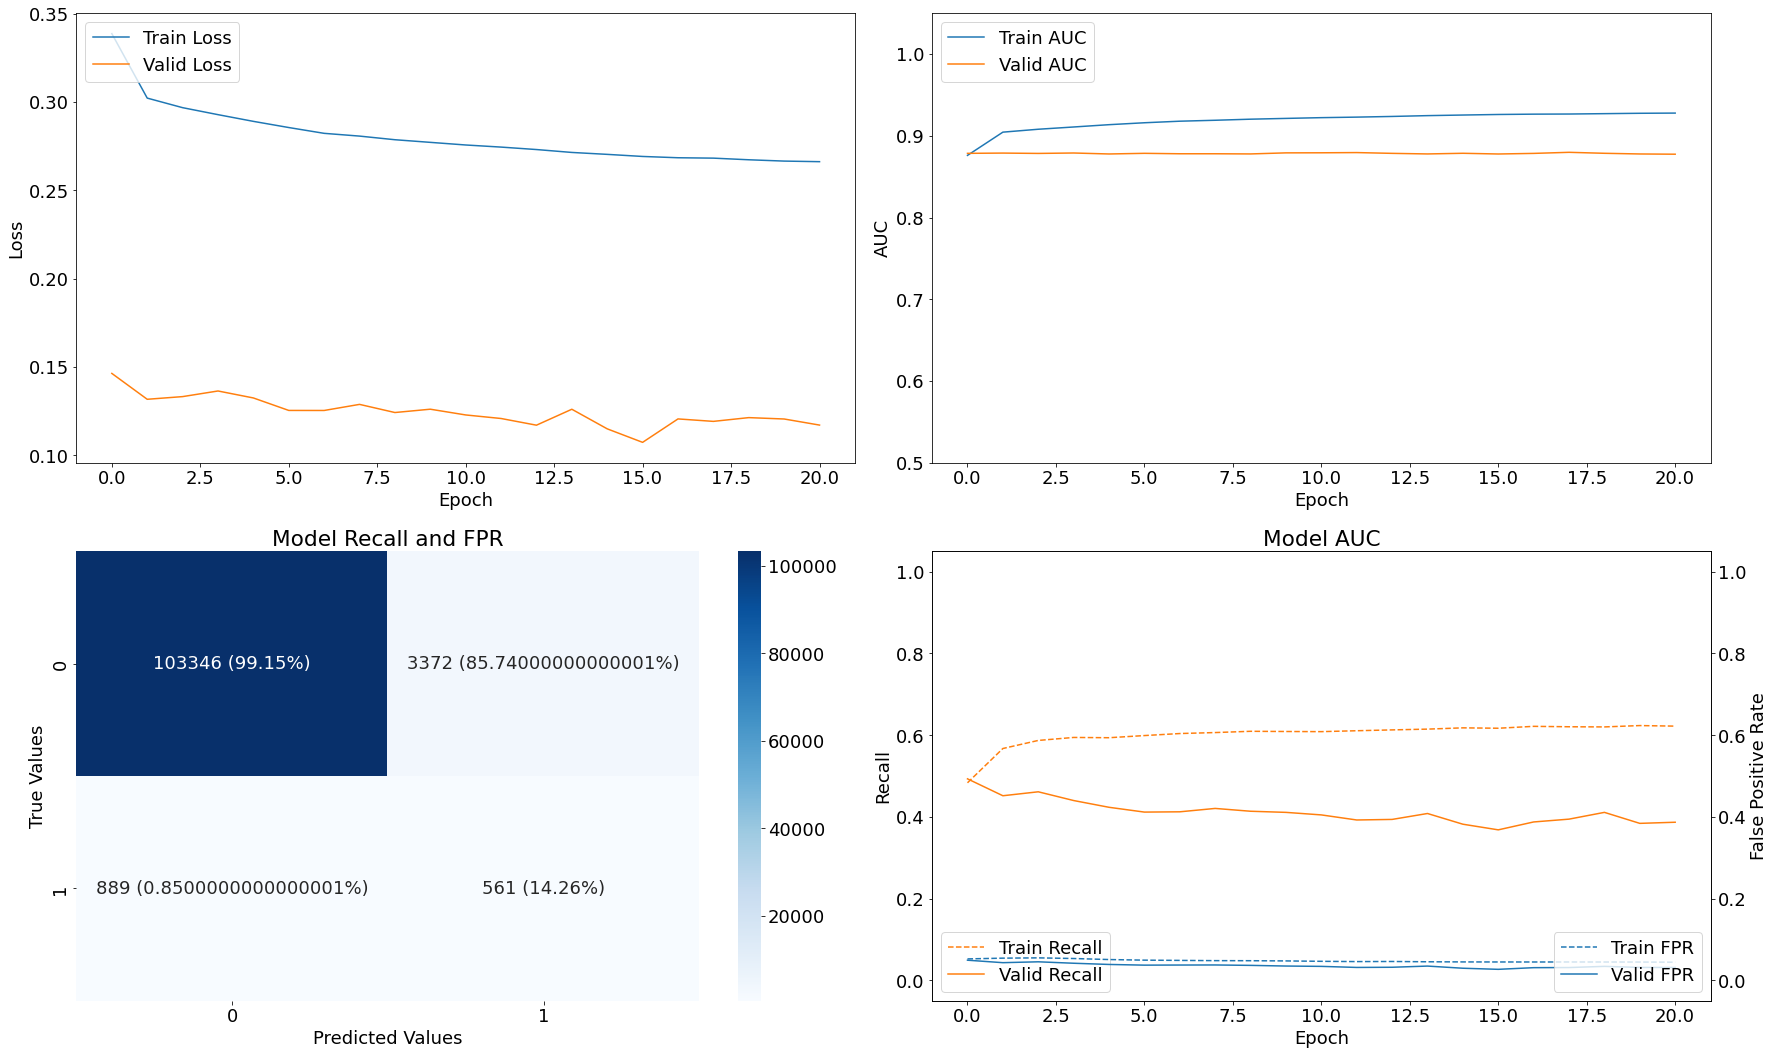

Epoch 00009: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6763719609886387 
 Val f1: 0.20143405288108826 

 Train Recall: 0.6101957559585571 
 Val Recall: 0.41655173897743225 

 Train FPR: 0.048530954867601395 
 Val FPR: 0.03694784268736839


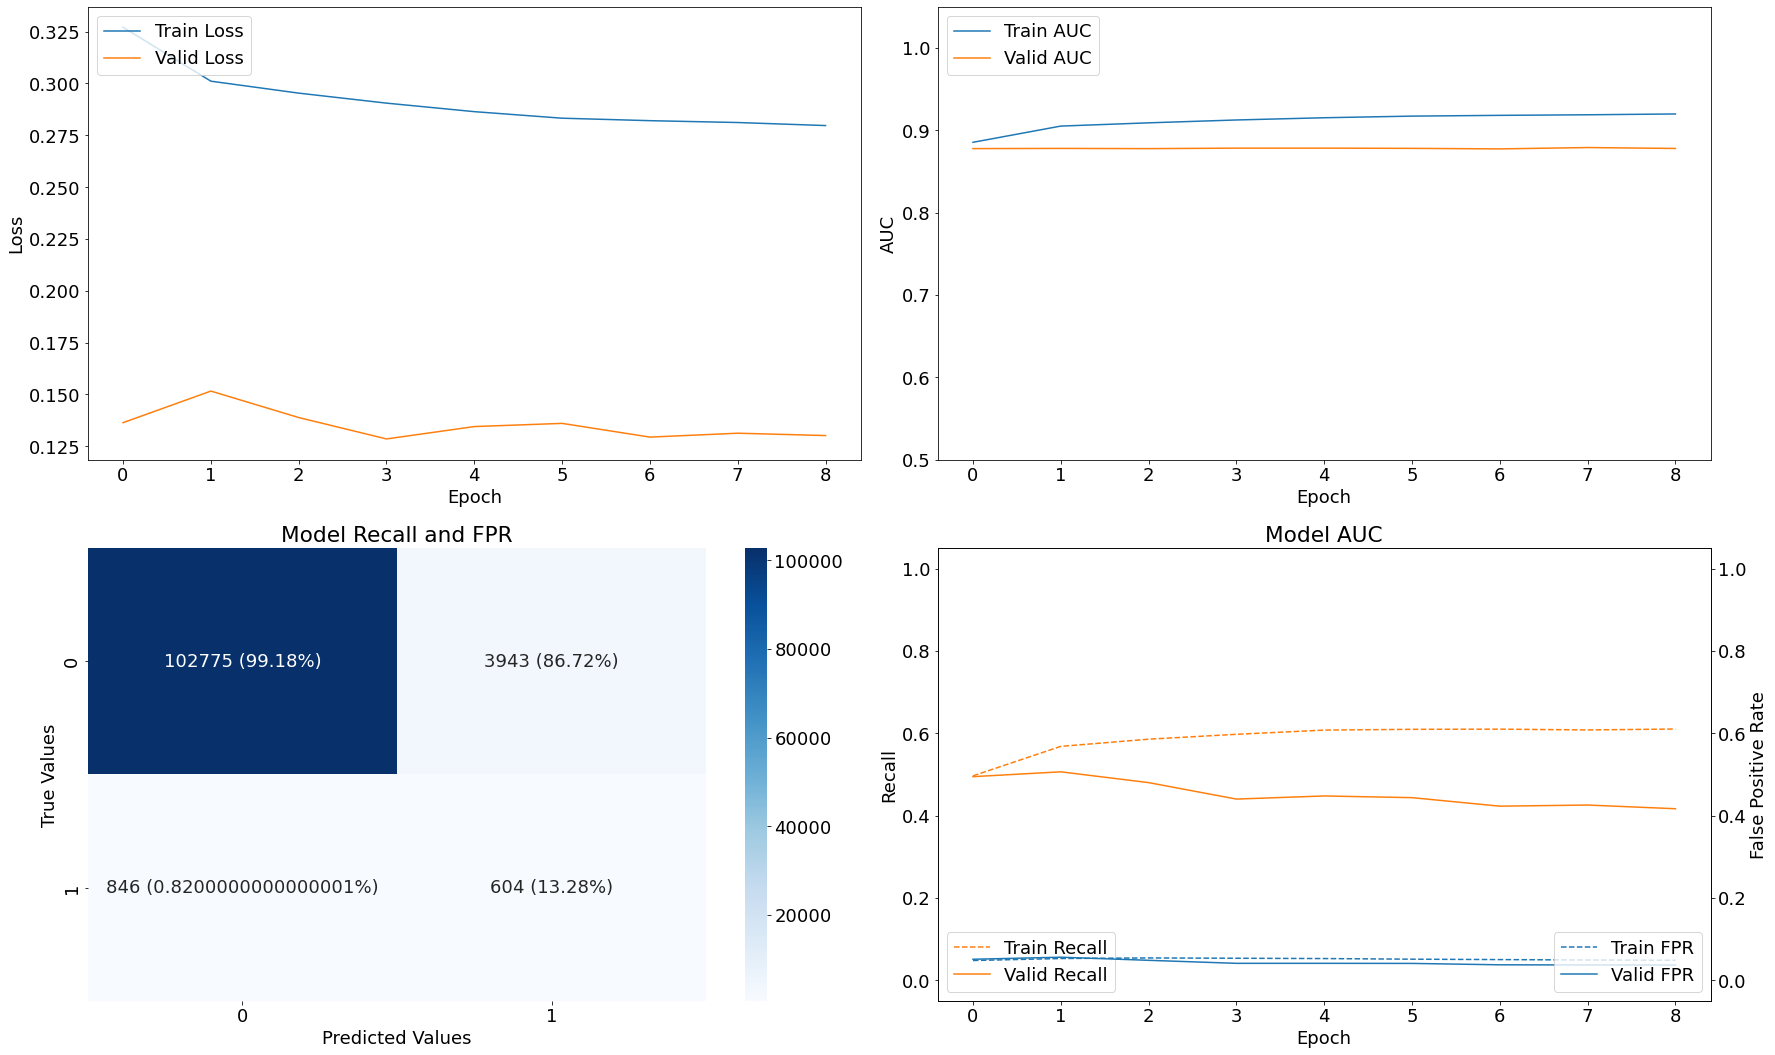

Epoch 00015: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6807251798465742 
 Val f1: 0.2112858433917453 

 Train Recall: 0.6099721193313599 
 Val Recall: 0.39379310607910156 

 Train FPR: 0.04553796350955963 
 Val FPR: 0.031709738075733185


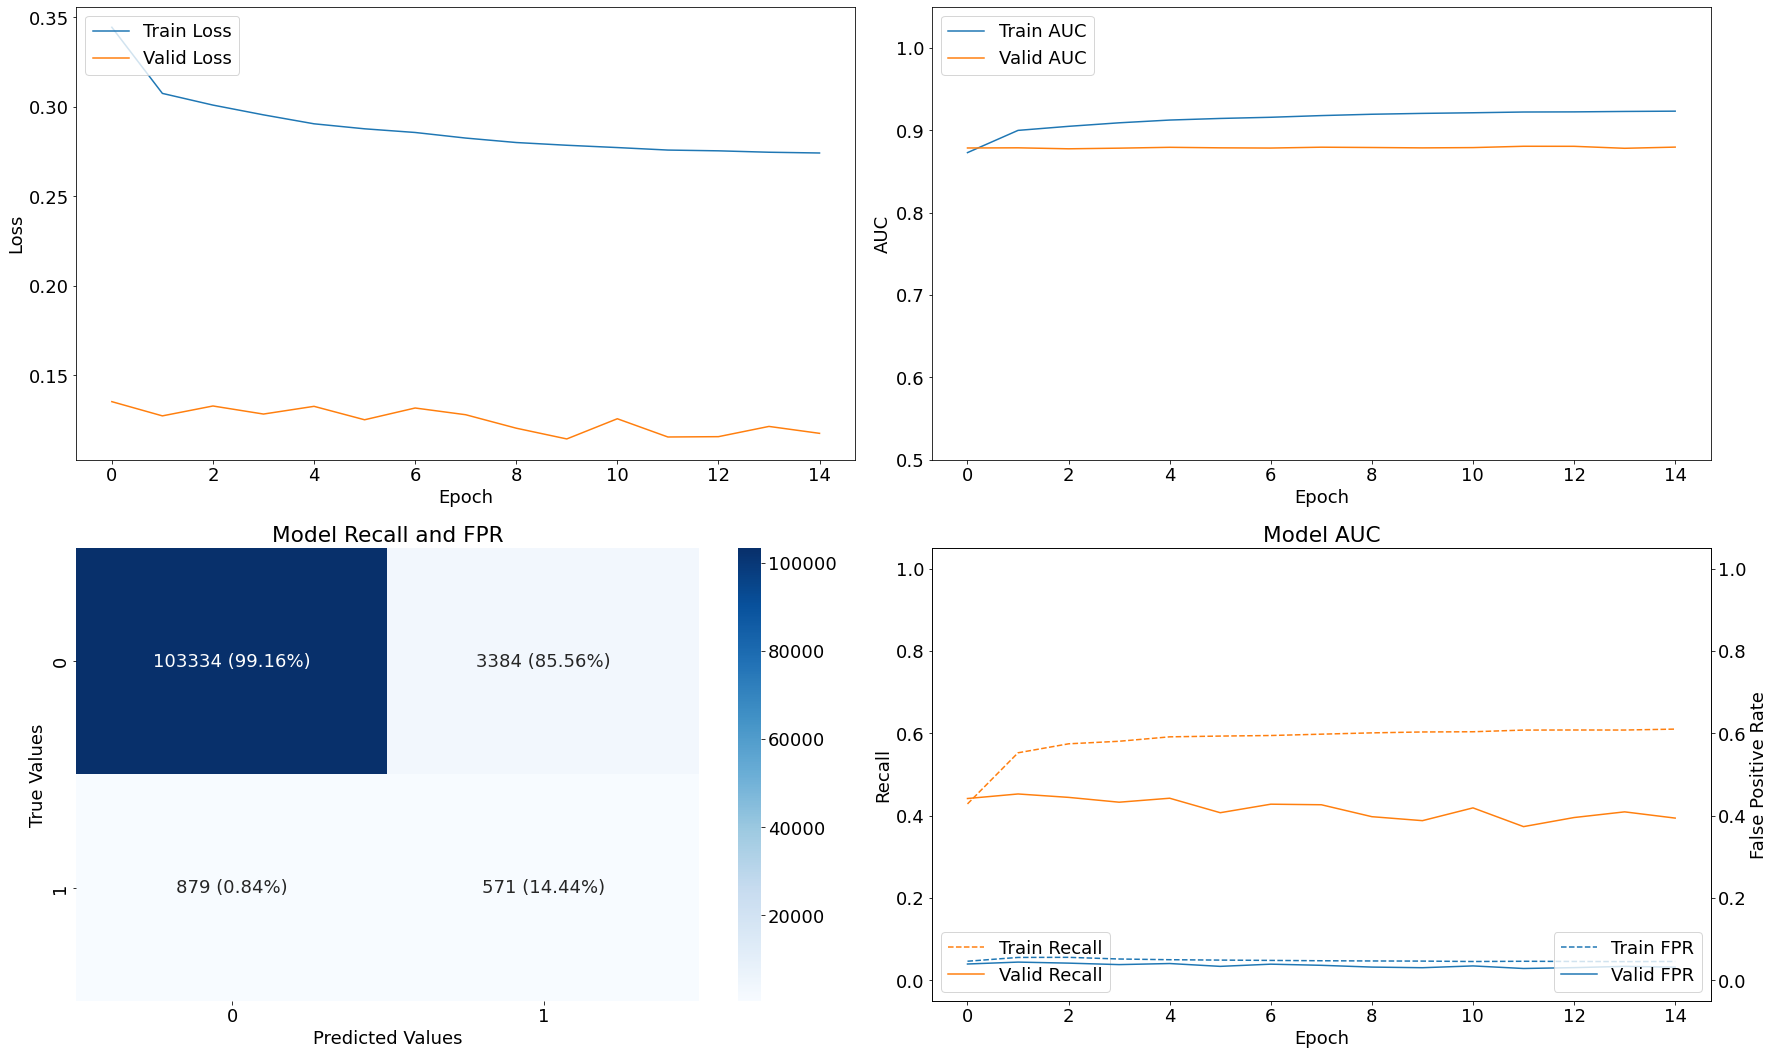

Epoch 00021: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6898386809618757 
 Val f1: 0.20823421380480664 

 Train Recall: 0.6253450512886047 
 Val Recall: 0.39241379499435425 

 Train FPR: 0.04691944271326065 
 Val FPR: 0.032290708273649216


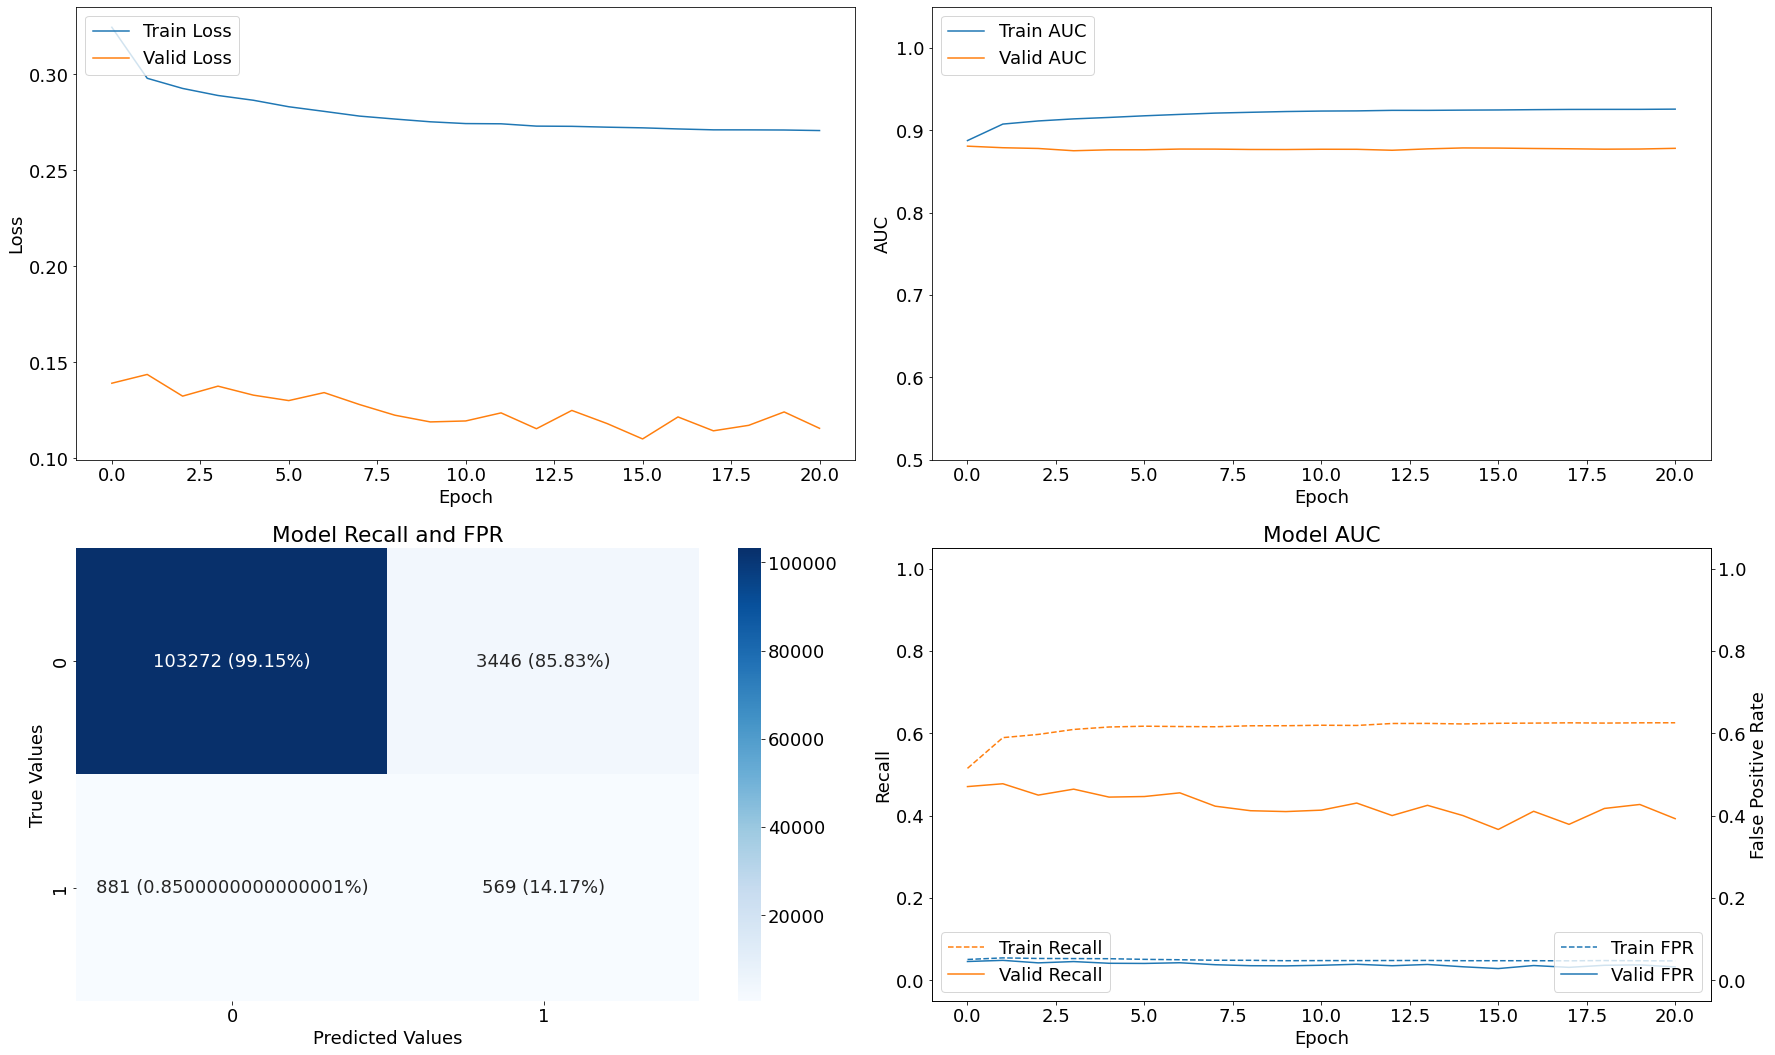

Epoch 00020: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6842587089157827 
 Val f1: 0.20905673668865438 

 Train Recall: 0.6154776811599731 
 Val Recall: 0.4027586281299591 

 Train FPR: 0.04587094113230705 
 Val FPR: 0.03329335153102875


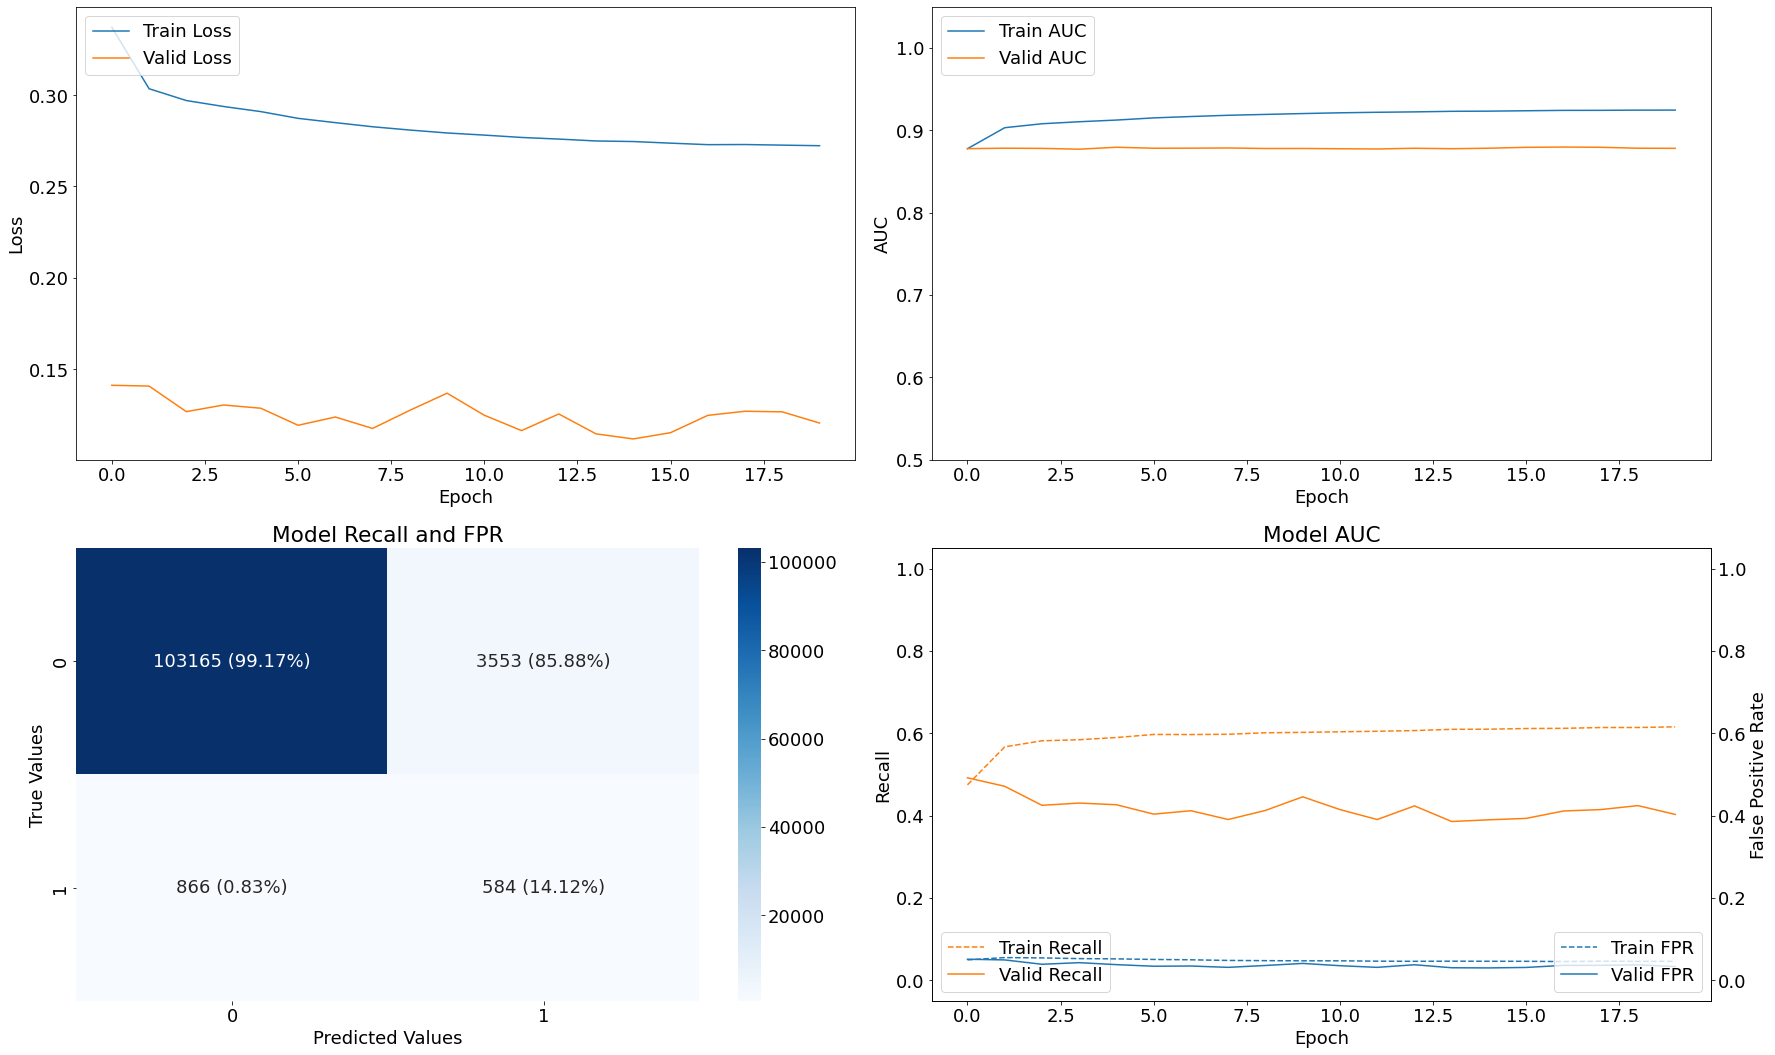

Epoch 00016: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6848764407501987 
 Val f1: 0.21191820025208127 

 Train Recall: 0.6151472330093384 
 Val Recall: 0.4144827723503113 

 Train FPR: 0.04530665650963783 
 Val FPR: 0.033930547535419464


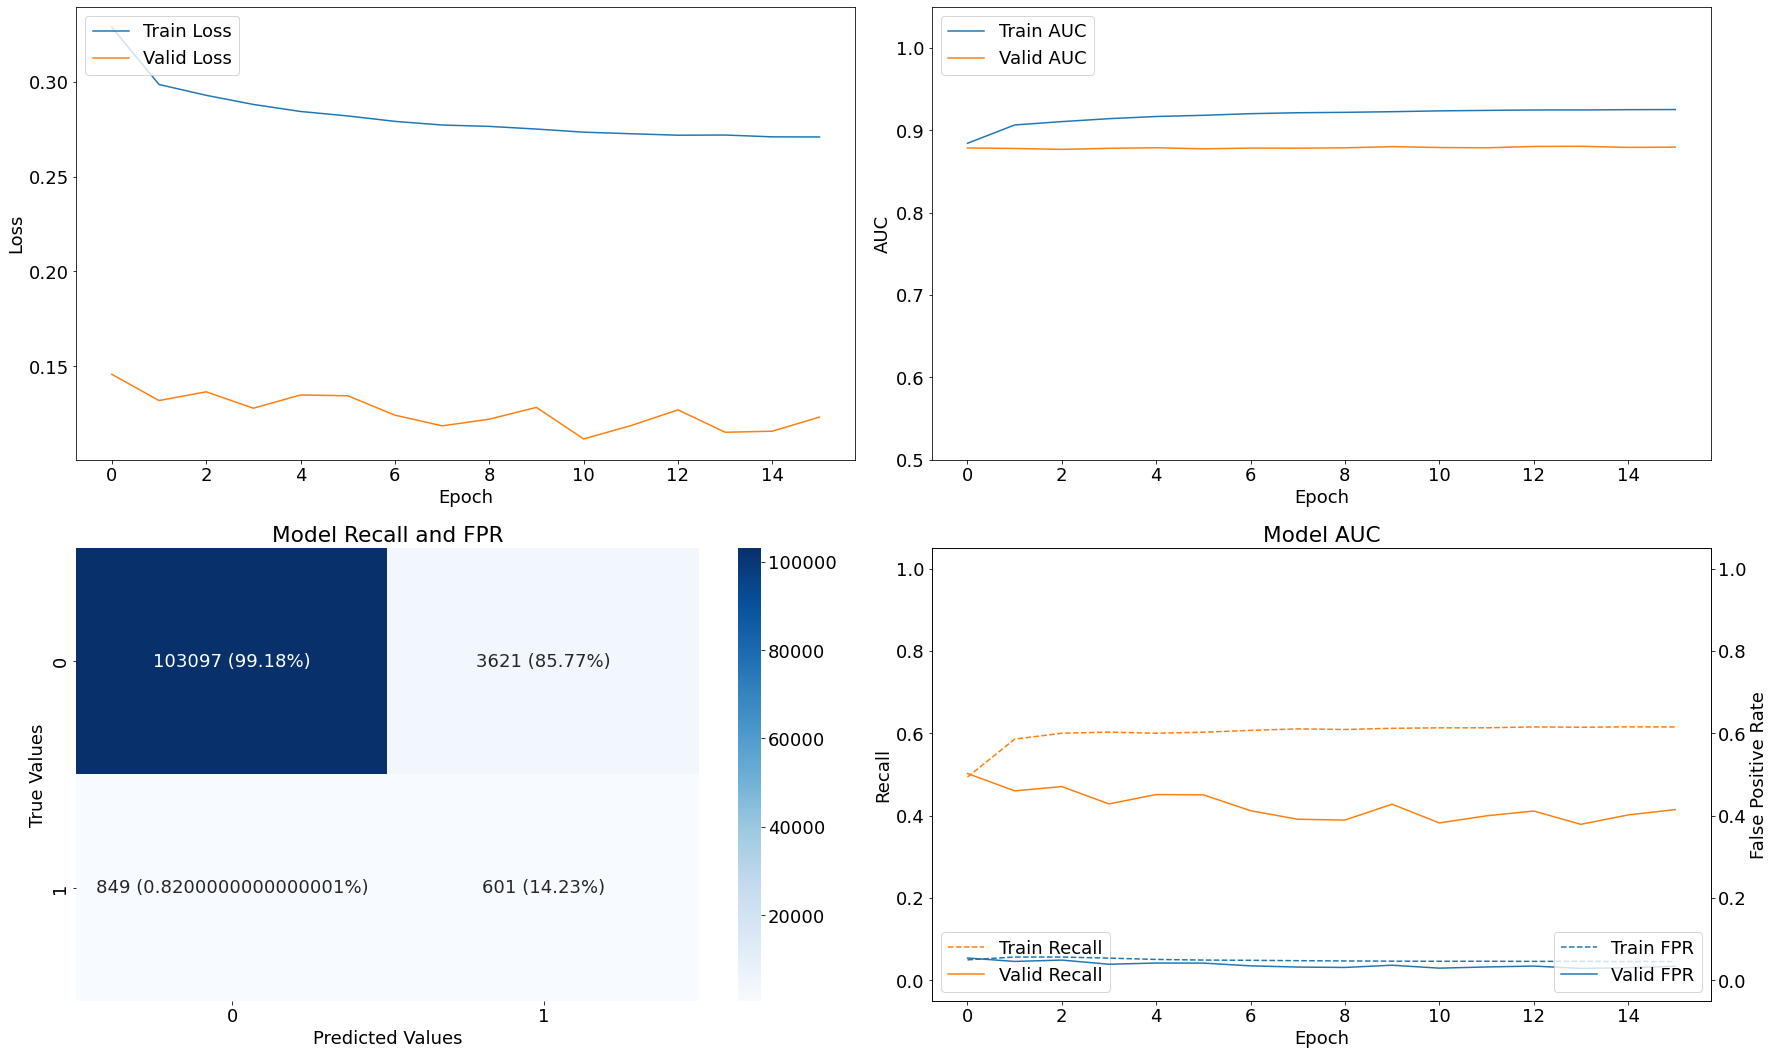

In [81]:
mu = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for m in mu:

    class_weight = create_class_weight({0: len(y_train_base == 0), 1: len(y_train_base == 1)}, mu=m)
    
    modelling_v4(X_train_base_scaled_resampled,
                 y_train_base_resampled,
                 X_val_base_scaled,
                 y_val_base,
                'Base Model V4')

In [23]:
class_weight = create_class_weight({0: len(y_train_base == 0), 1: len(y_train_base == 1)}, mu=0.2)

Epoch 00017: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6961428250300393 
 Val f1: 0.2012236657001773 

 Train Recall: 0.6284816861152649 
 Val Recall: 0.40827587246894836 

 Train FPR: 0.04428230598568916 
 Val FPR: 0.03600142523646355


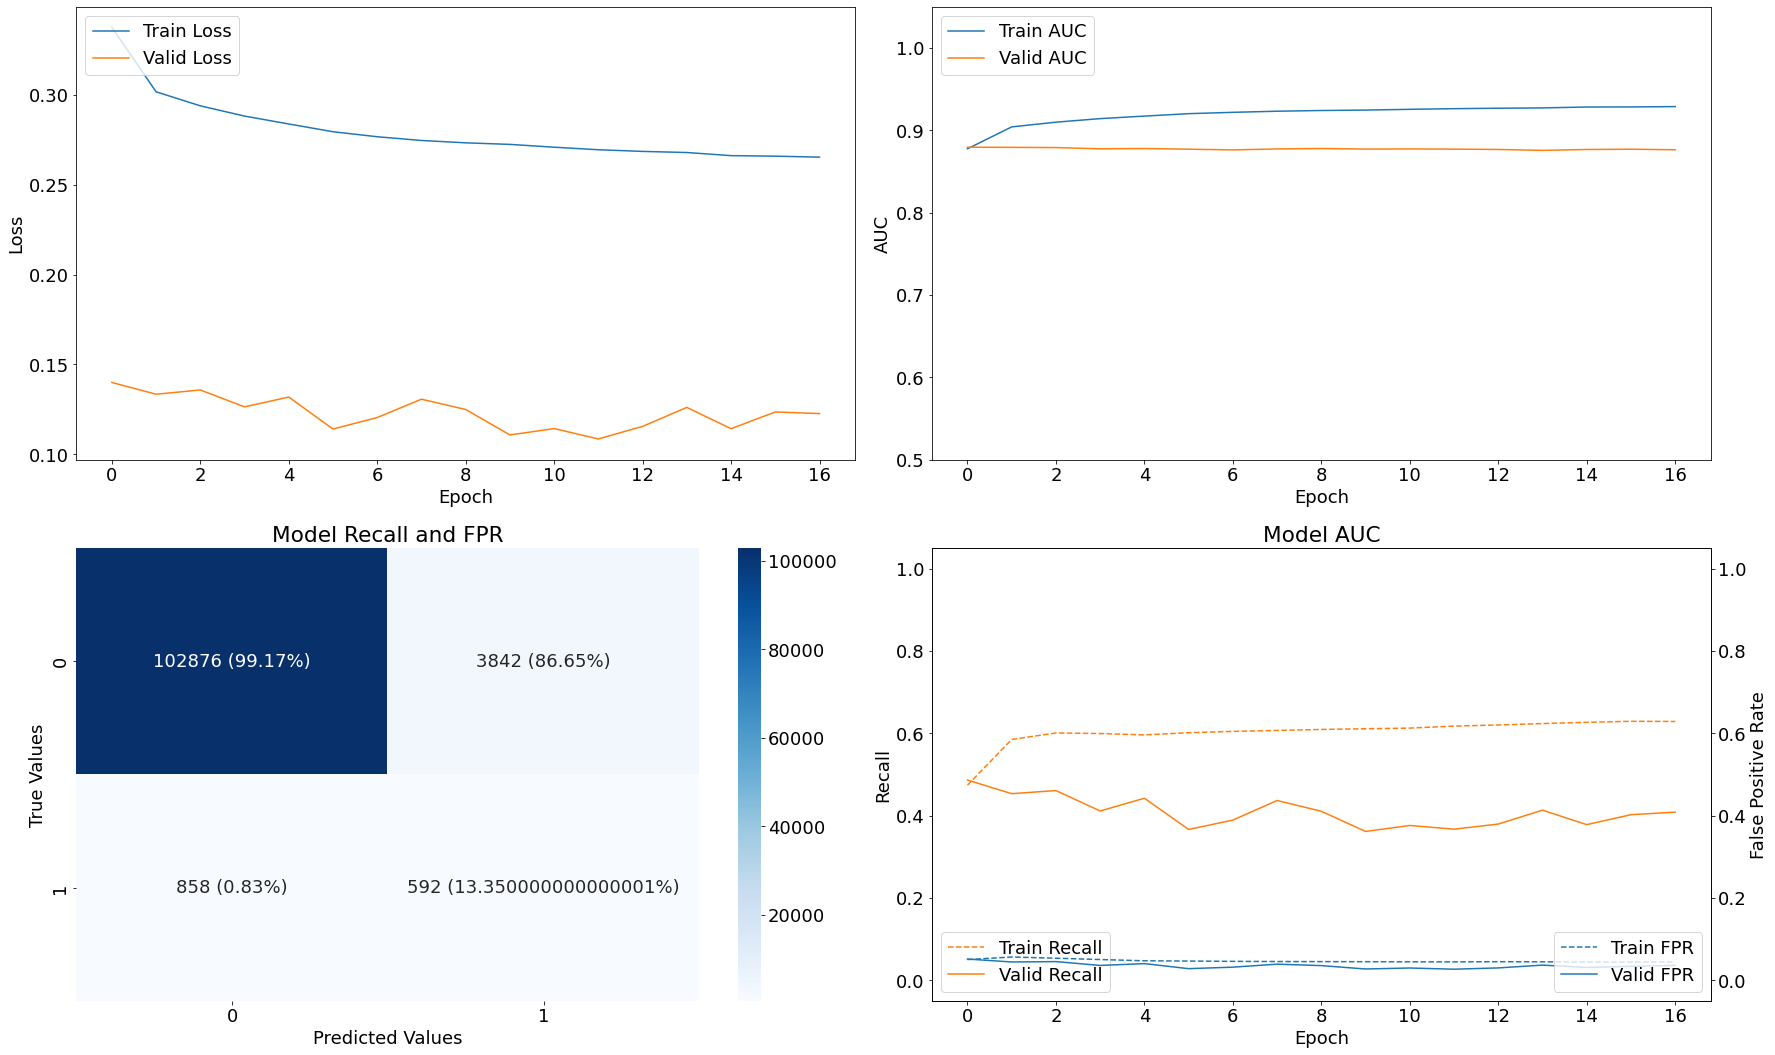

TypeError: 'NoneType' object is not callable

In [24]:
apply_model_thresholds(modelling_v4(X_train_base_scaled_resampled,
                 y_train_base_resampled,
                 X_val_base_scaled,
                 y_val_base,
                'Base Model V4'))

In [10]:
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]

Epoch 00014: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6914158565589767 
 Val f1: 0.2119068164069159 

 Train Recall: 0.623616635799408 
 Val Recall: 0.42344826459884644 

 Train FPR: 0.045066457241773605 
 Val FPR: 0.03496129810810089


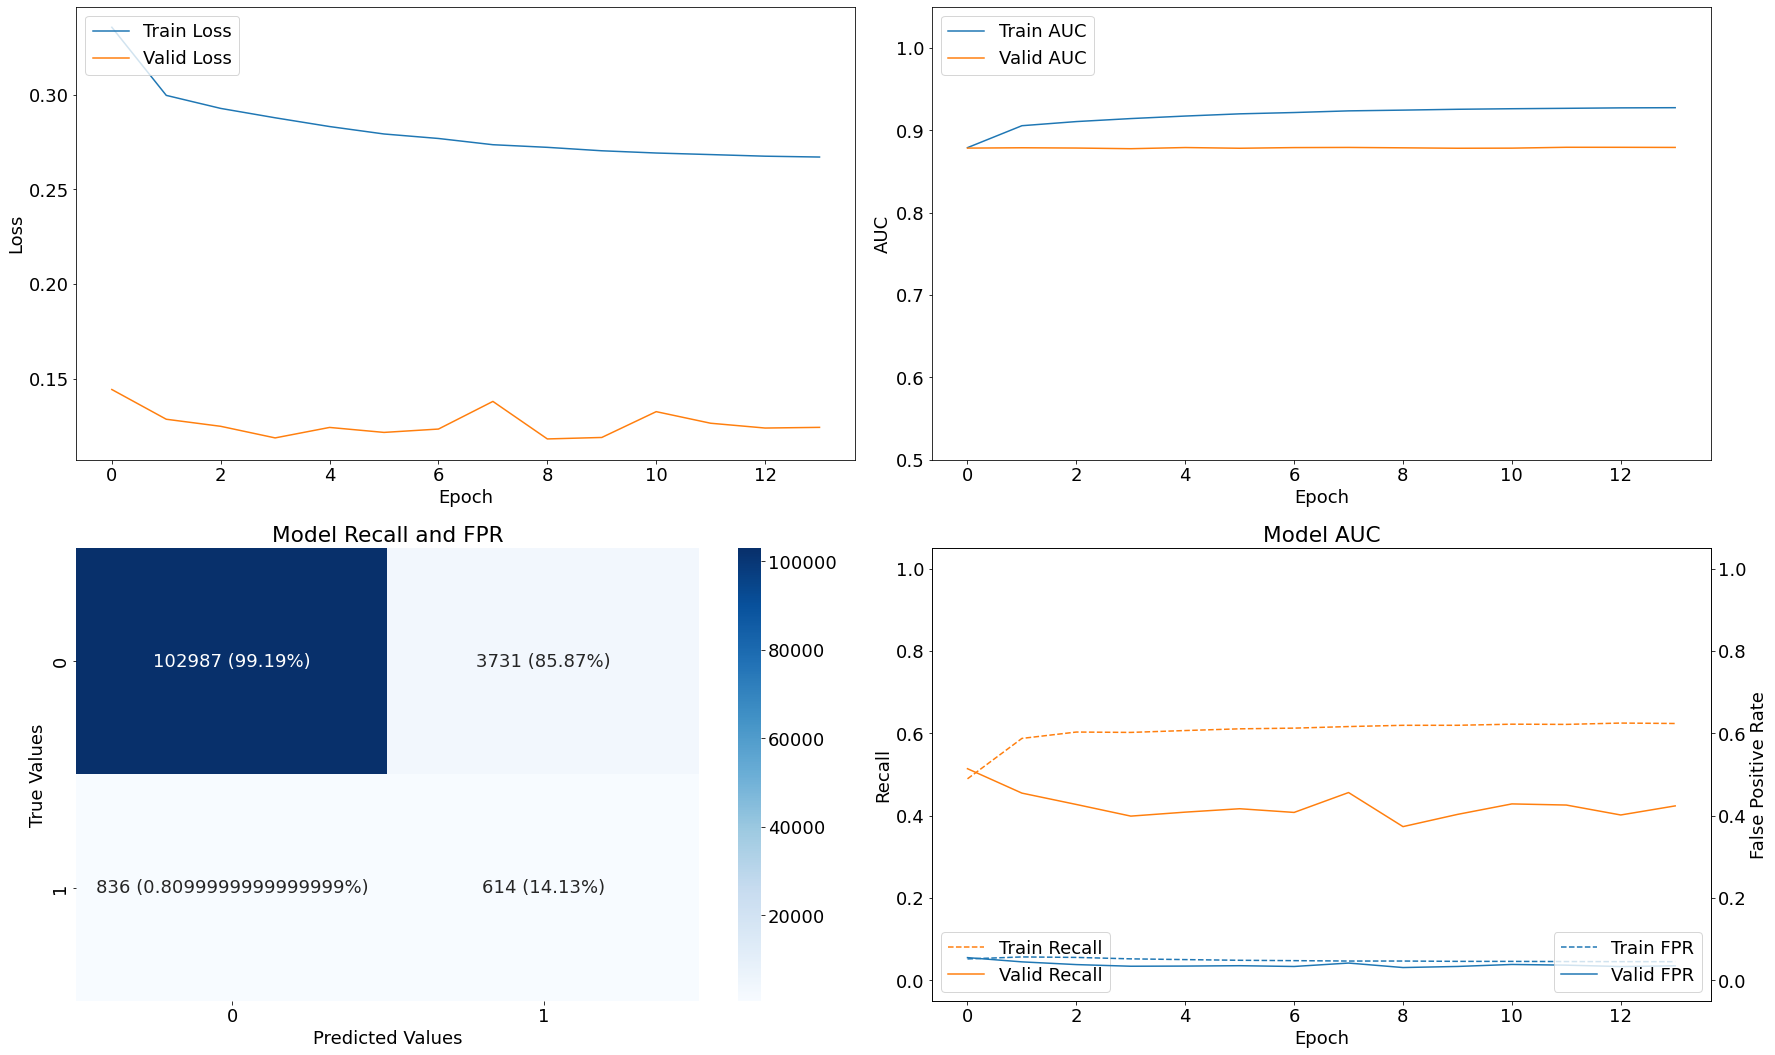

Epoch 00012: early stopping
Results for Base Model V4 with threshold = 0.4.

 Train f1: 0.7106175544984763 
 Val f1: 0.18783638605257028 

 Train Recall: 0.7018336653709412 
 Val Recall: 0.48137930035591125 

 Train FPR: 0.06836096197366714 
 Val FPR: 0.049513671547174454


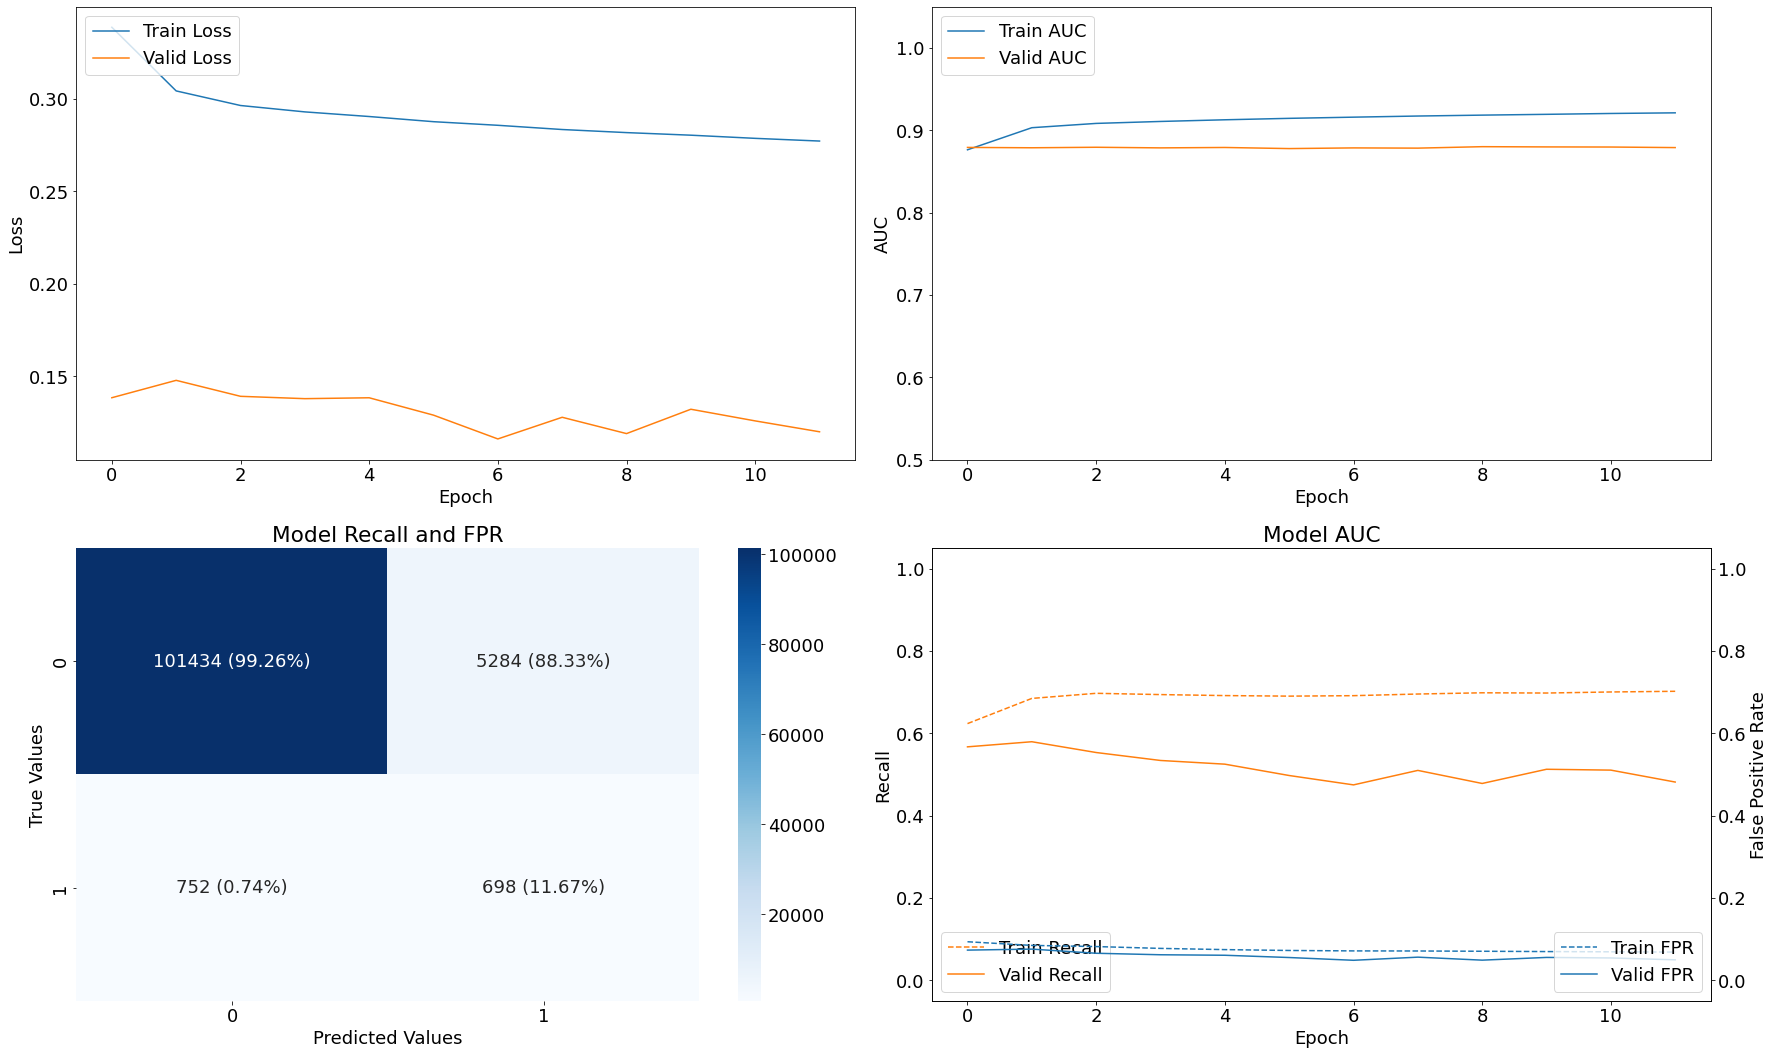

Epoch 00016: early stopping
Results for Base Model V4 with threshold = 0.3.

 Train f1: 0.7221236698246002 
 Val f1: 0.16114892881772636 

 Train Recall: 0.811076283454895 
 Val Recall: 0.595862090587616 

 Train FPR: 0.10882163792848587 
 Val FPR: 0.07879645377397537


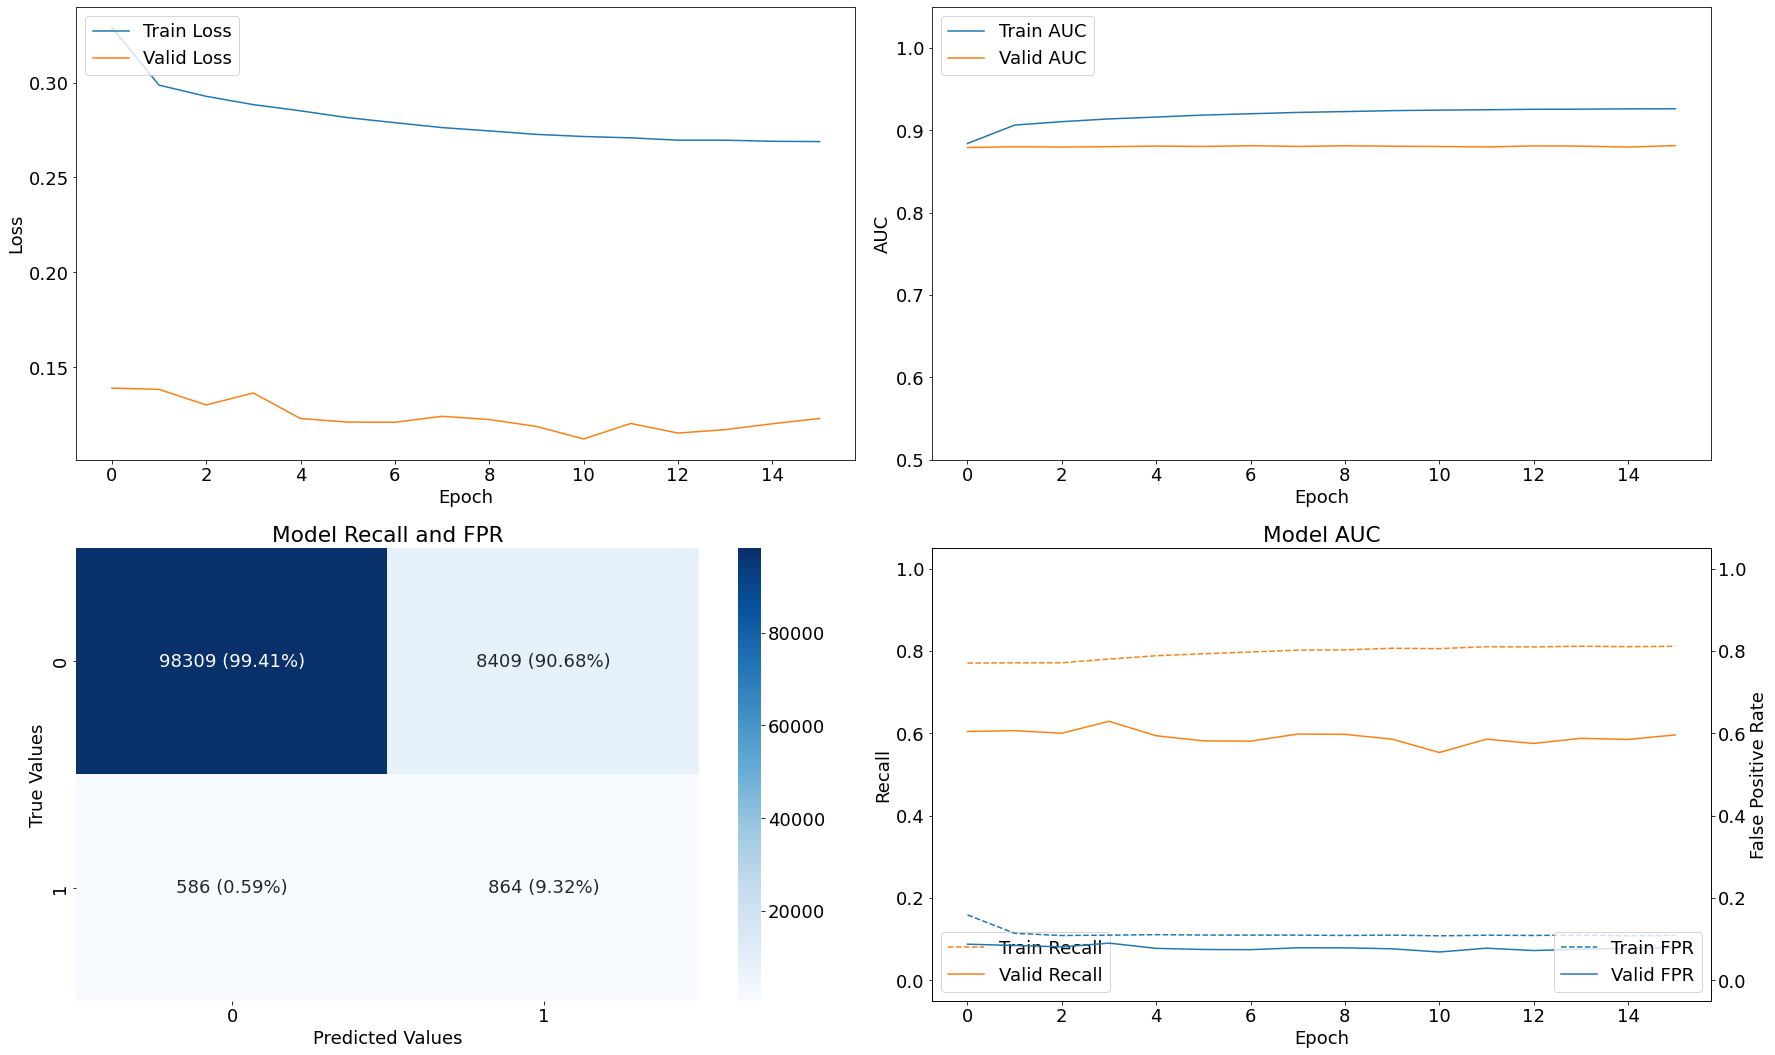

Epoch 00015: early stopping
Results for Base Model V4 with threshold = 0.2.

 Train f1: 0.6782496314731848 
 Val f1: 0.1300675653804488 

 Train Recall: 0.8895576596260071 
 Val Recall: 0.6903448104858398 

 Train FPR: 0.18338464200496674 
 Val FPR: 0.1212635189294815


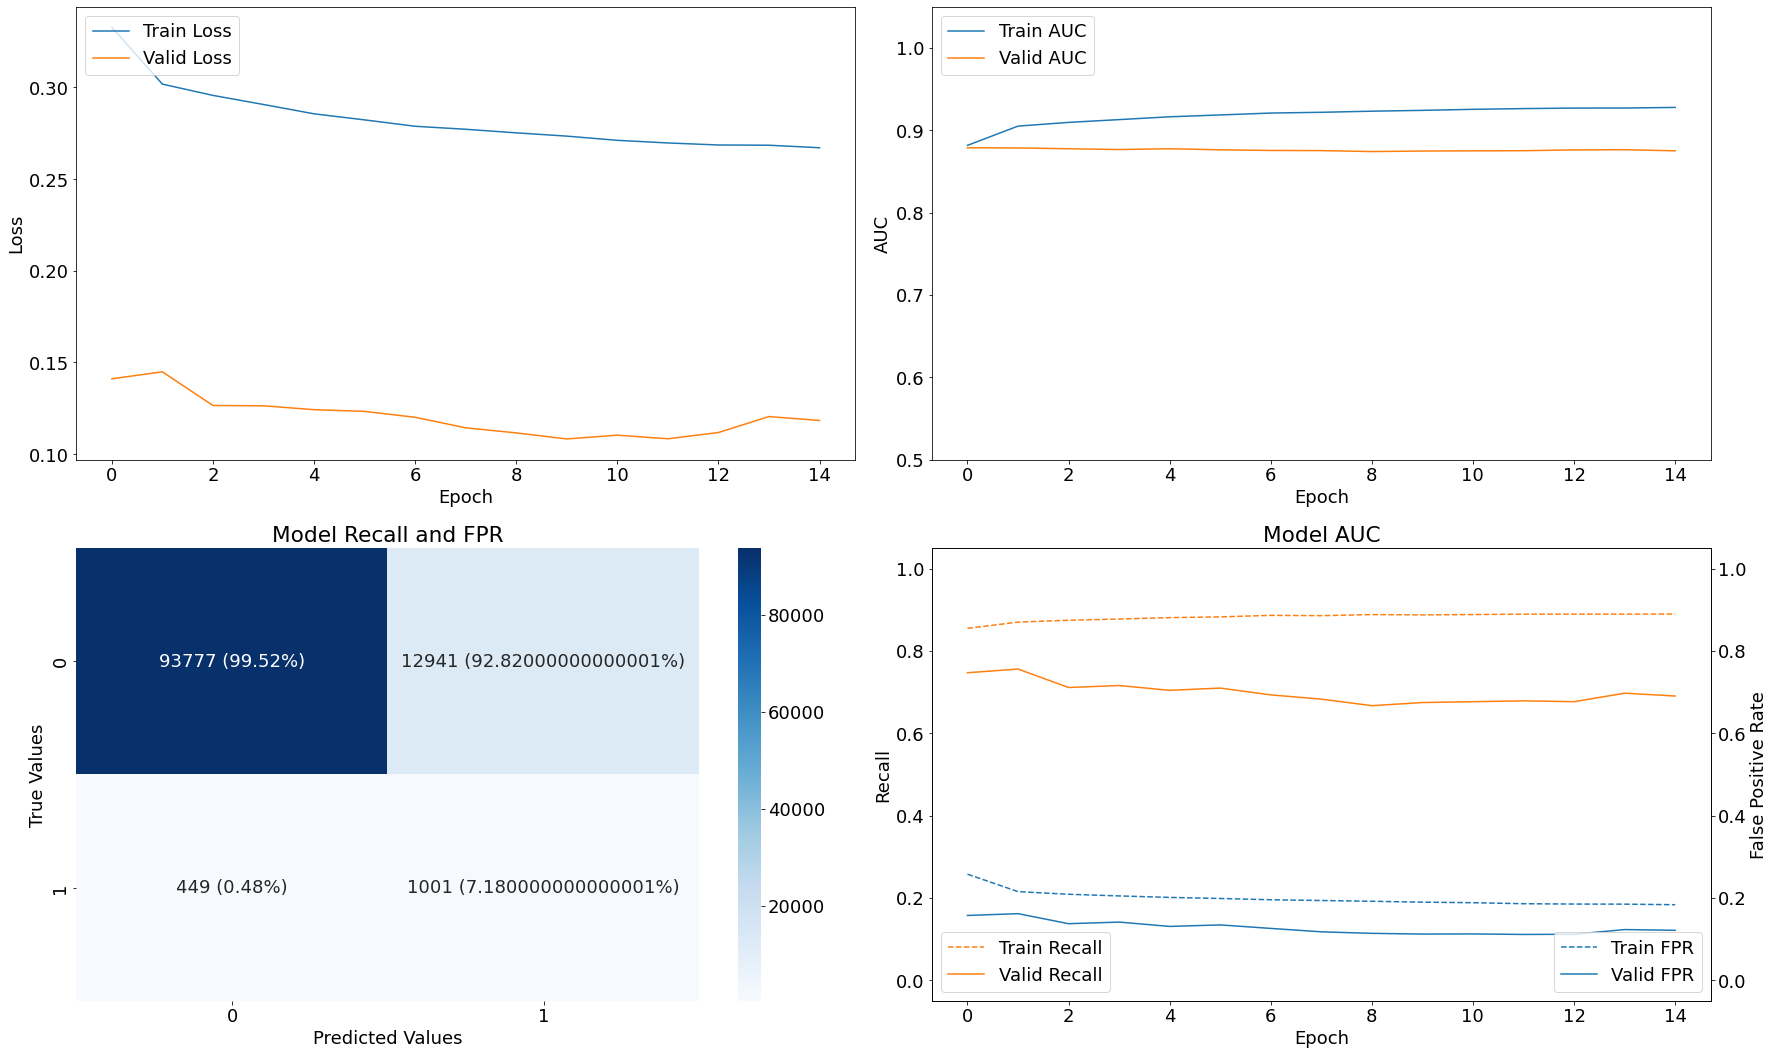

Epoch 00013: early stopping
Results for Base Model V4 with threshold = 0.1.

 Train f1: 0.5939856711837427 
 Val f1: 0.09437719342252443 

 Train Recall: 0.9389707446098328 
 Val Recall: 0.817241370677948 

 Train FPR: 0.30565503239631653 
 Val FPR: 0.21062050759792328


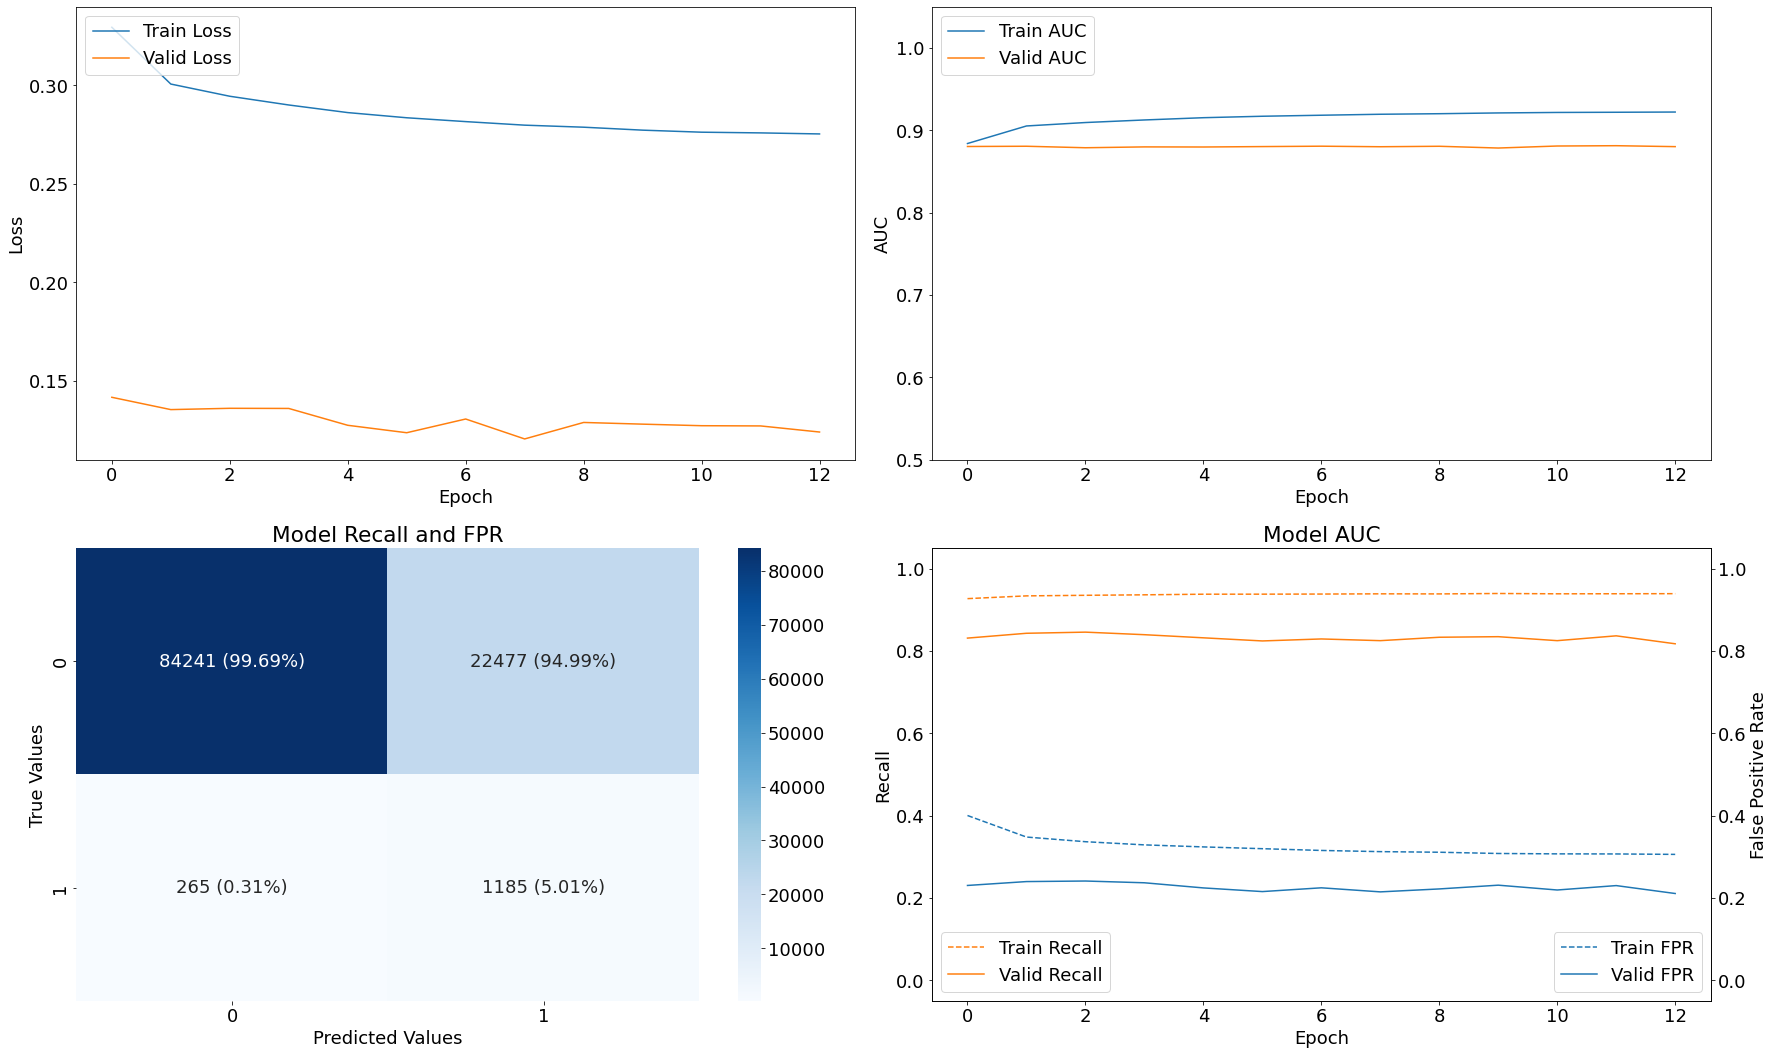

In [83]:
for t in thresholds:
    
    modelling_v4(X_train_base_scaled_resampled,
                 y_train_base_resampled,
                 X_val_base_scaled,
                 y_val_base,
                'Base Model V4',
                 threshold=t)

In [84]:
def modelling_v5(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    model_v5 = models.Sequential()

    model_v5.add(layers.Input(shape=(n_features, )))
    model_v5.add(layers.Dense(32, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(16, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(8, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(4, activation='relu'))
    model_v5.add(layers.Dense(2, activation='relu'))
    model_v5.add(layers.Dense(1, activation='sigmoid'))

    model_v5.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v5_history = model_v5.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v5,
             name,
             model_v5_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00007: early stopping
Results for Base Model V5 with threshold = 0.5.

 Train f1: 0.6645008562960303 
 Val f1: 0.1543575938582216 

 Train Recall: 0.6322130560874939 
 Val Recall: 0.5924137830734253 

 Train FPR: 0.06765179336071014 
 Val FPR: 0.0826570987701416


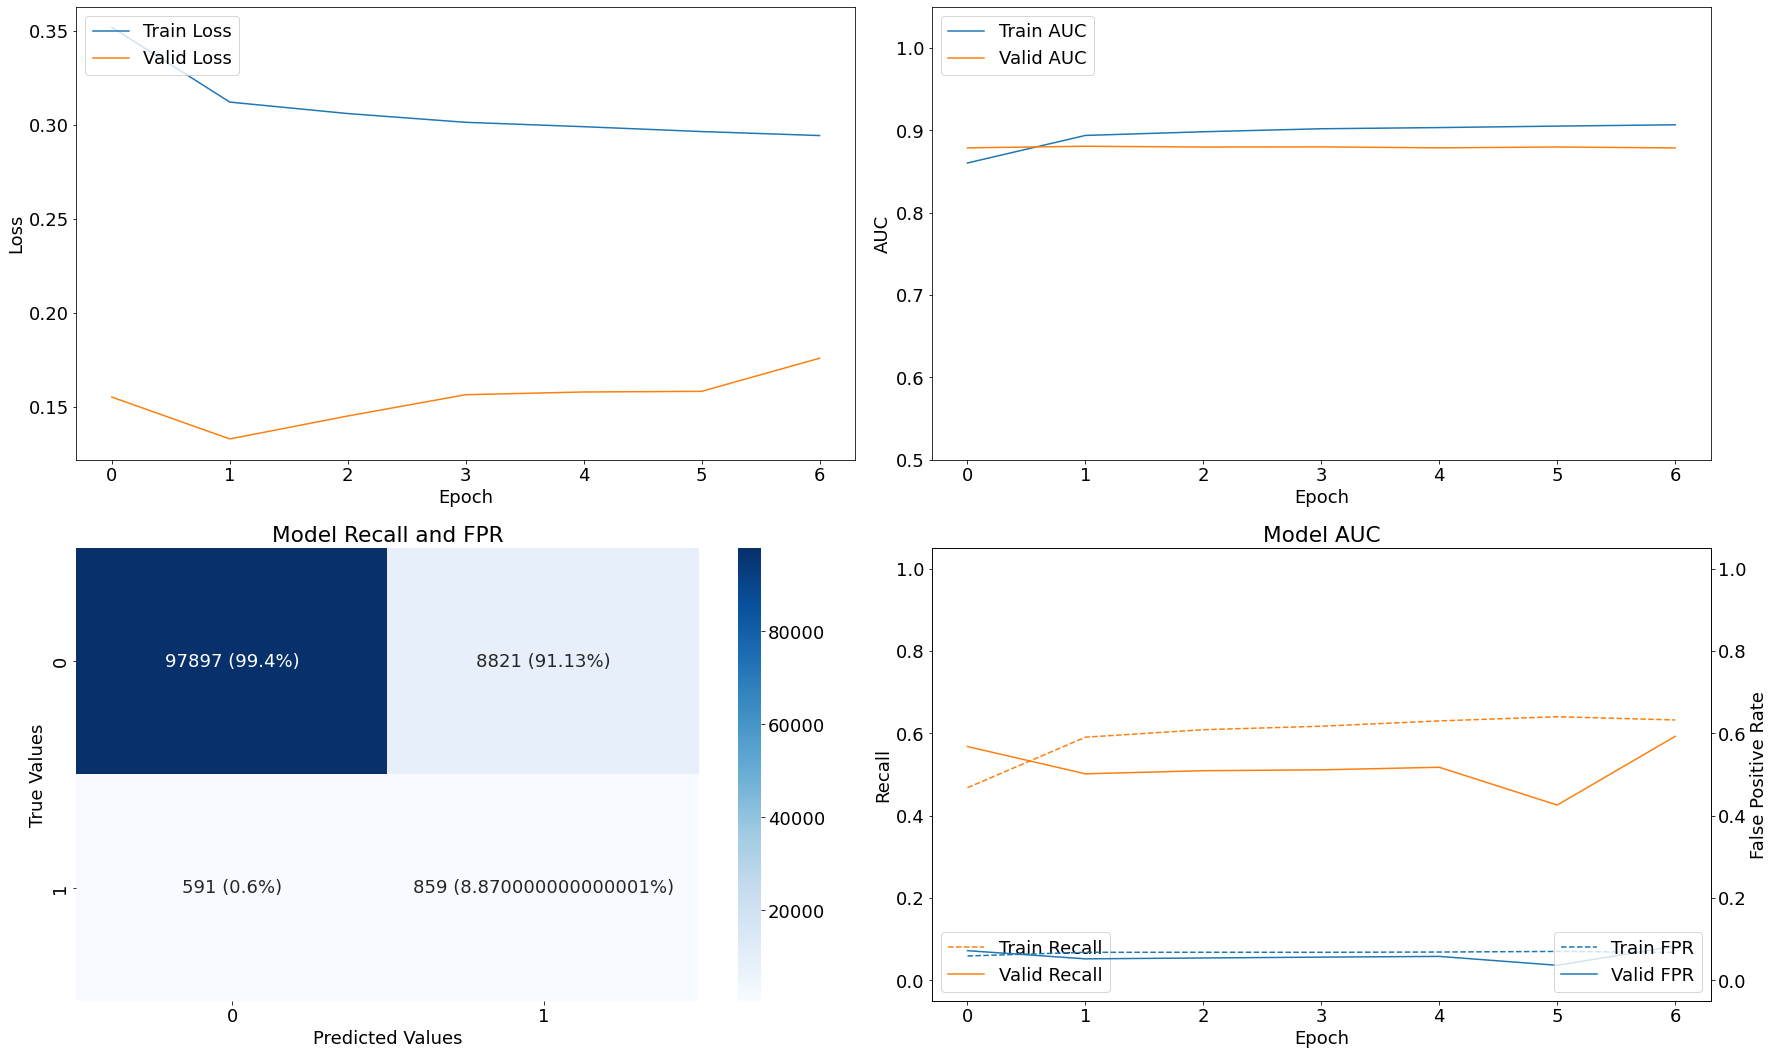

Epoch 00011: early stopping
Results for Base Model V5 with threshold = 0.4.

 Train f1: 0.6750816451191829 
 Val f1: 0.1780341556187835 

 Train Recall: 0.6693847179412842 
 Val Recall: 0.5427586436271667 

 Train FPR: 0.07843419164419174 
 Val FPR: 0.06188271939754486


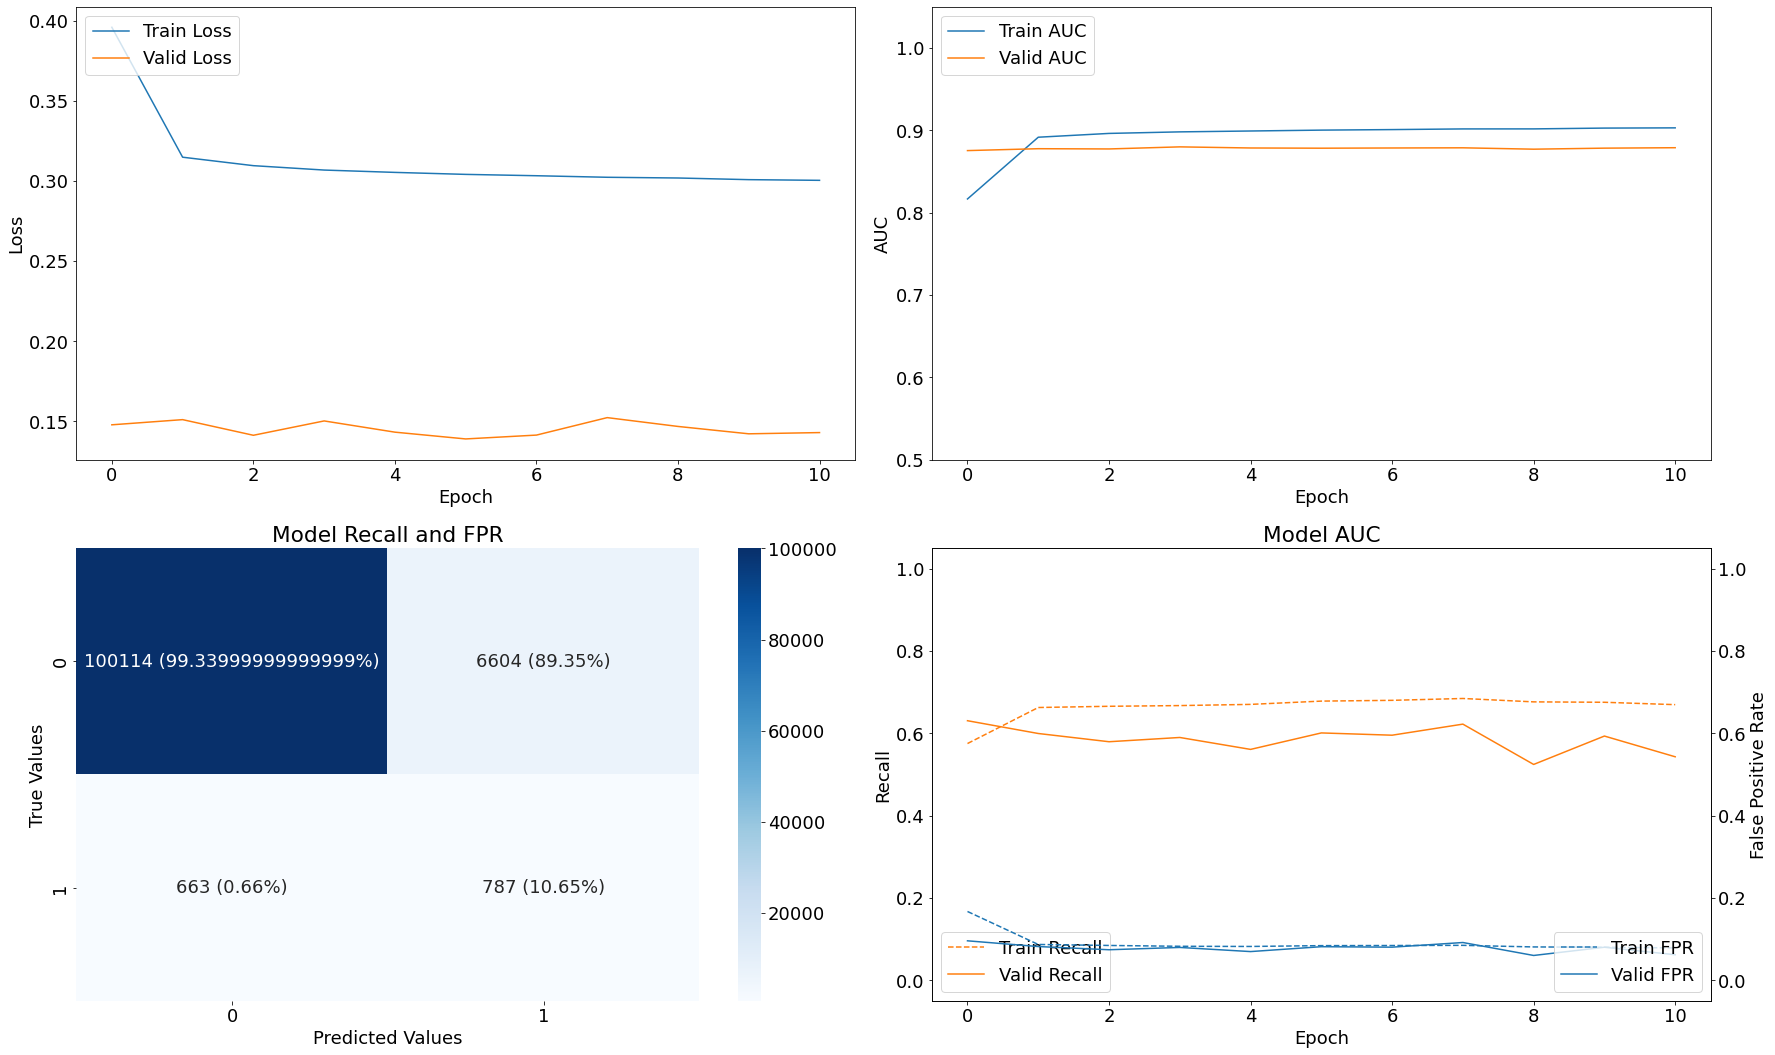

Epoch 00007: early stopping
Results for Base Model V5 with threshold = 0.3.

 Train f1: 0.6901027529089233 
 Val f1: 0.04764274824077533 

 Train Recall: 0.815483808517456 
 Val Recall: 0.9572413563728333 

 Train FPR: 0.13697101175785065 
 Val FPR: 0.5193969011306763


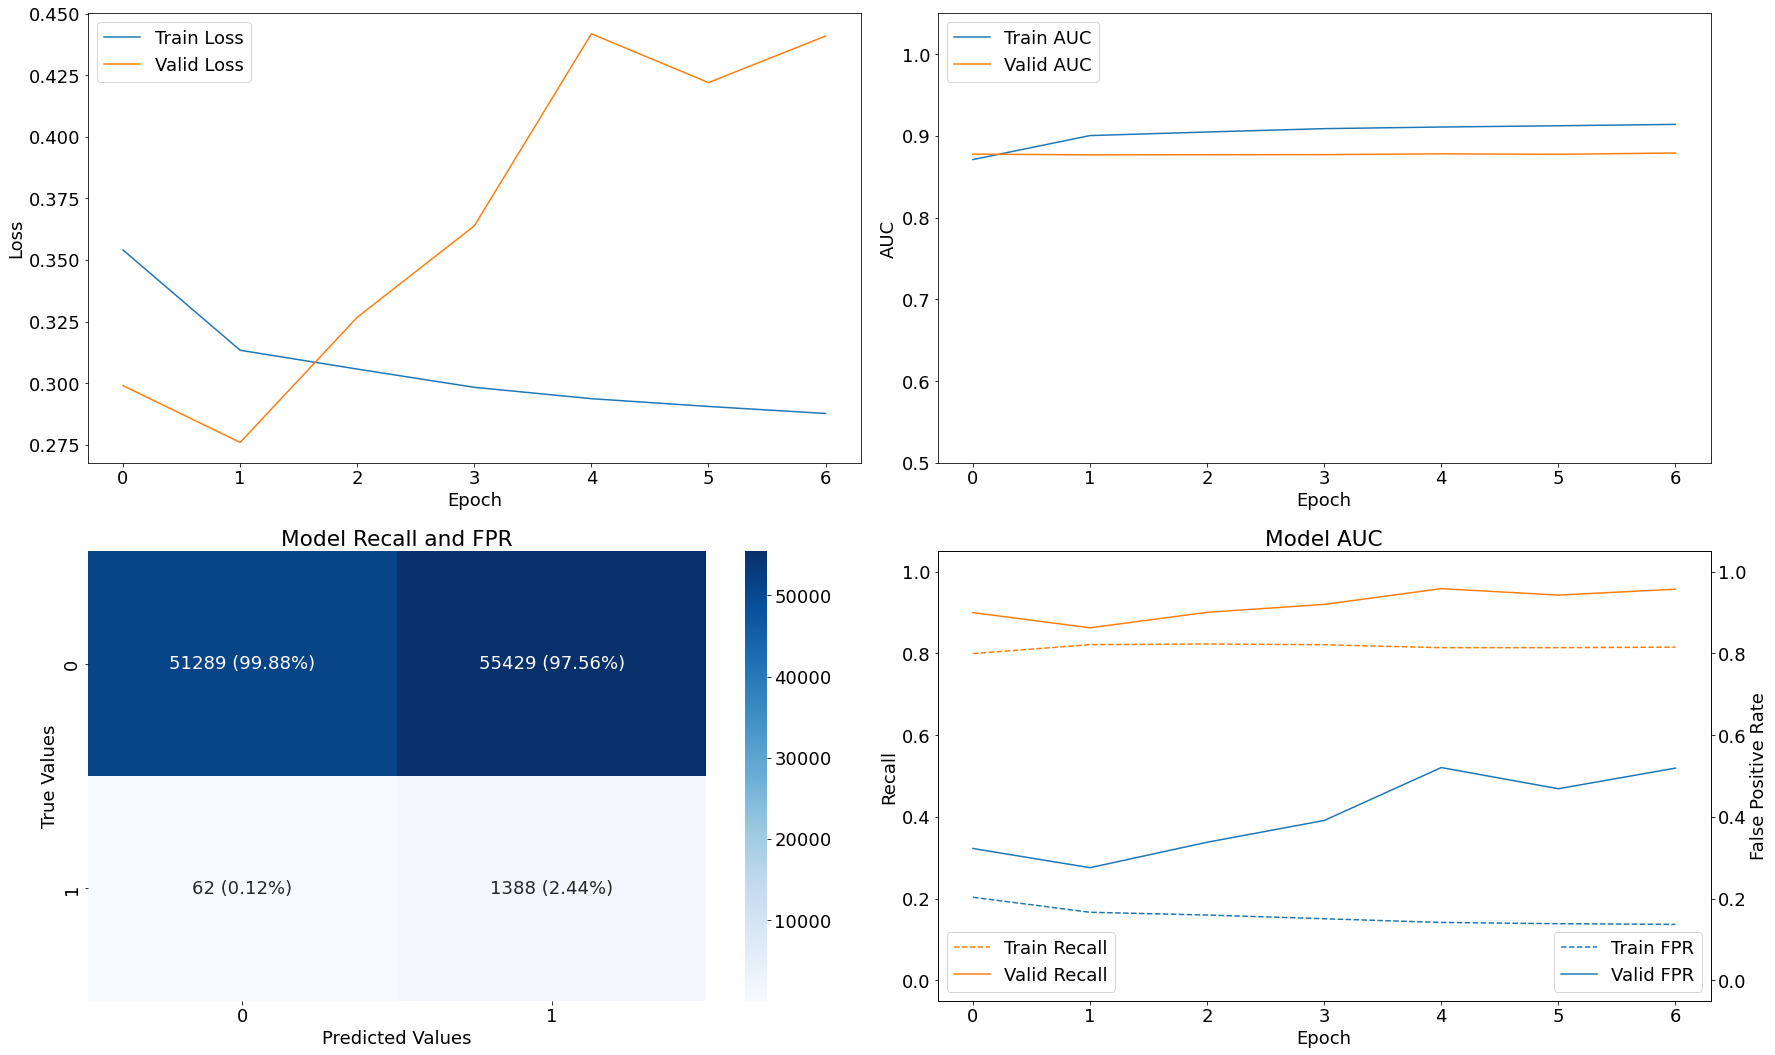

Epoch 00006: early stopping
Results for Base Model V5 with threshold = 0.2.

 Train f1: 0.64782951911868 
 Val f1: 0.06554999651161487 

 Train Recall: 0.8887900114059448 
 Val Recall: 0.904137909412384 

 Train FPR: 0.21377716958522797 
 Val FPR: 0.3489477038383484


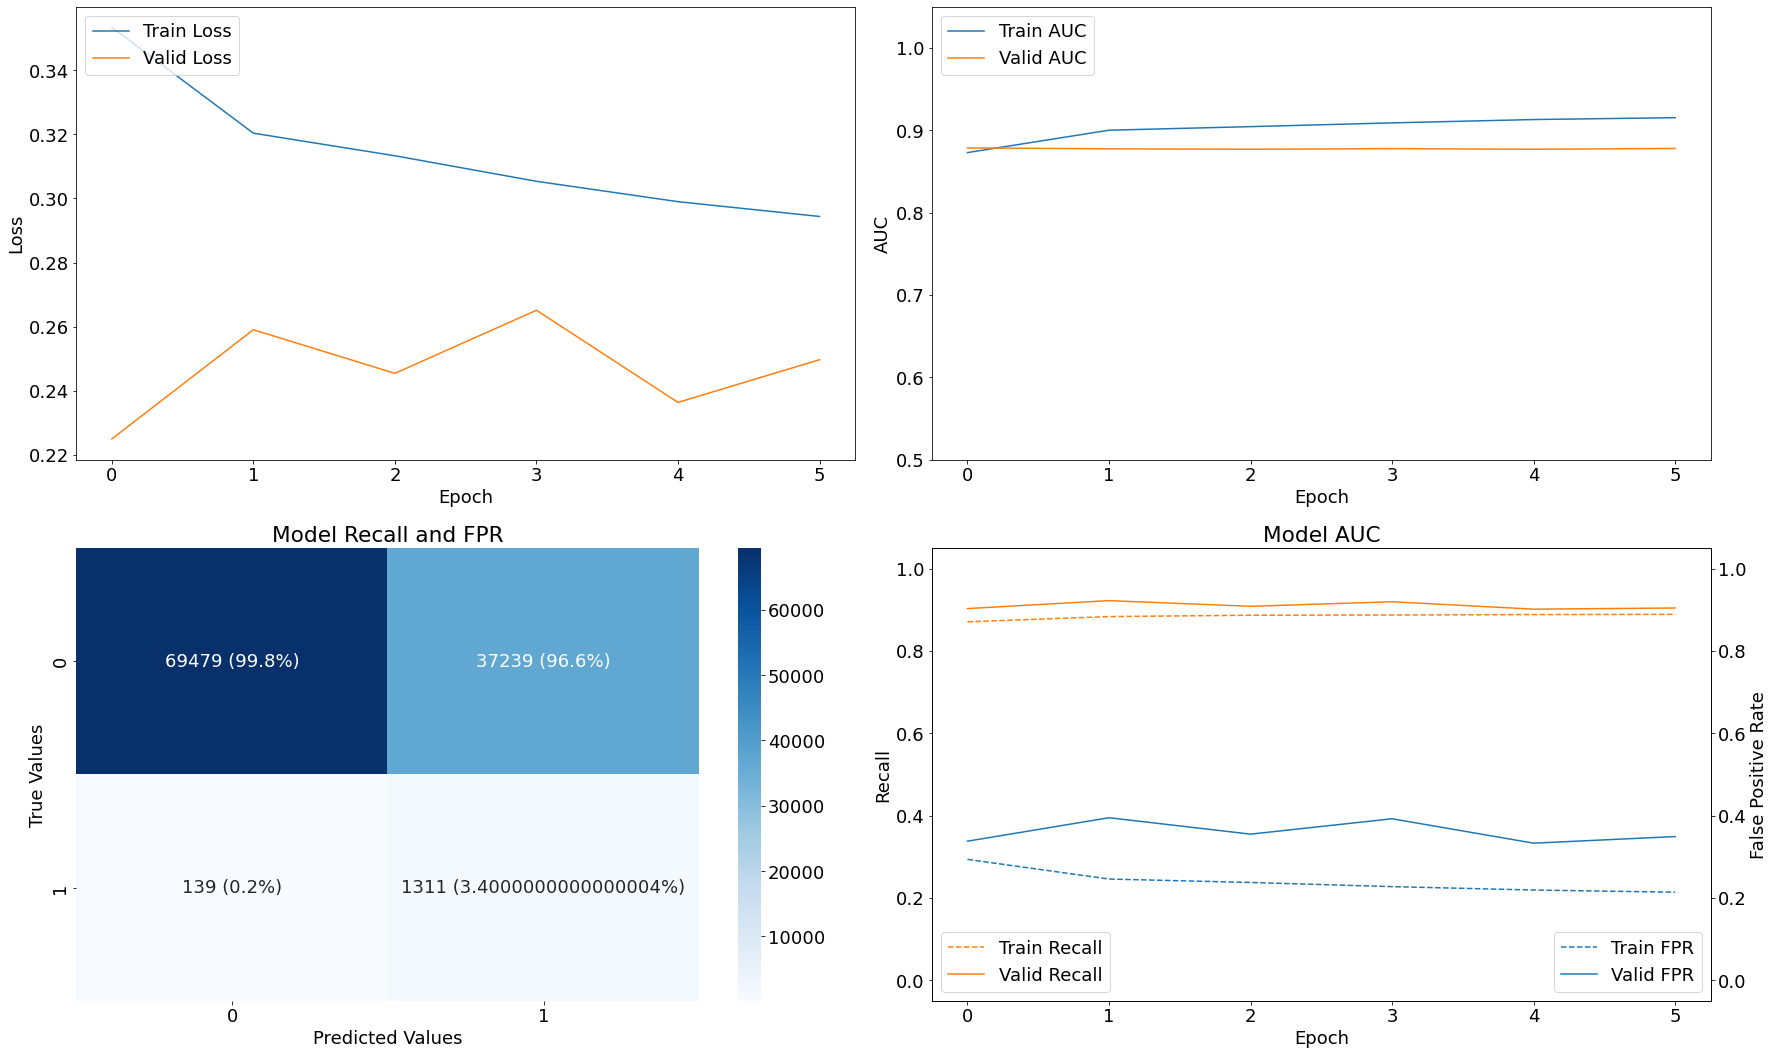

Epoch 00015: early stopping
Results for Base Model V5 with threshold = 0.1.

 Train f1: 0.6028124217619856 
 Val f1: 0.10214167978418412 

 Train Recall: 0.9308674335479736 
 Val Recall: 0.791034460067749 

 Train FPR: 0.289386123418808 
 Val FPR: 0.18611668050289154


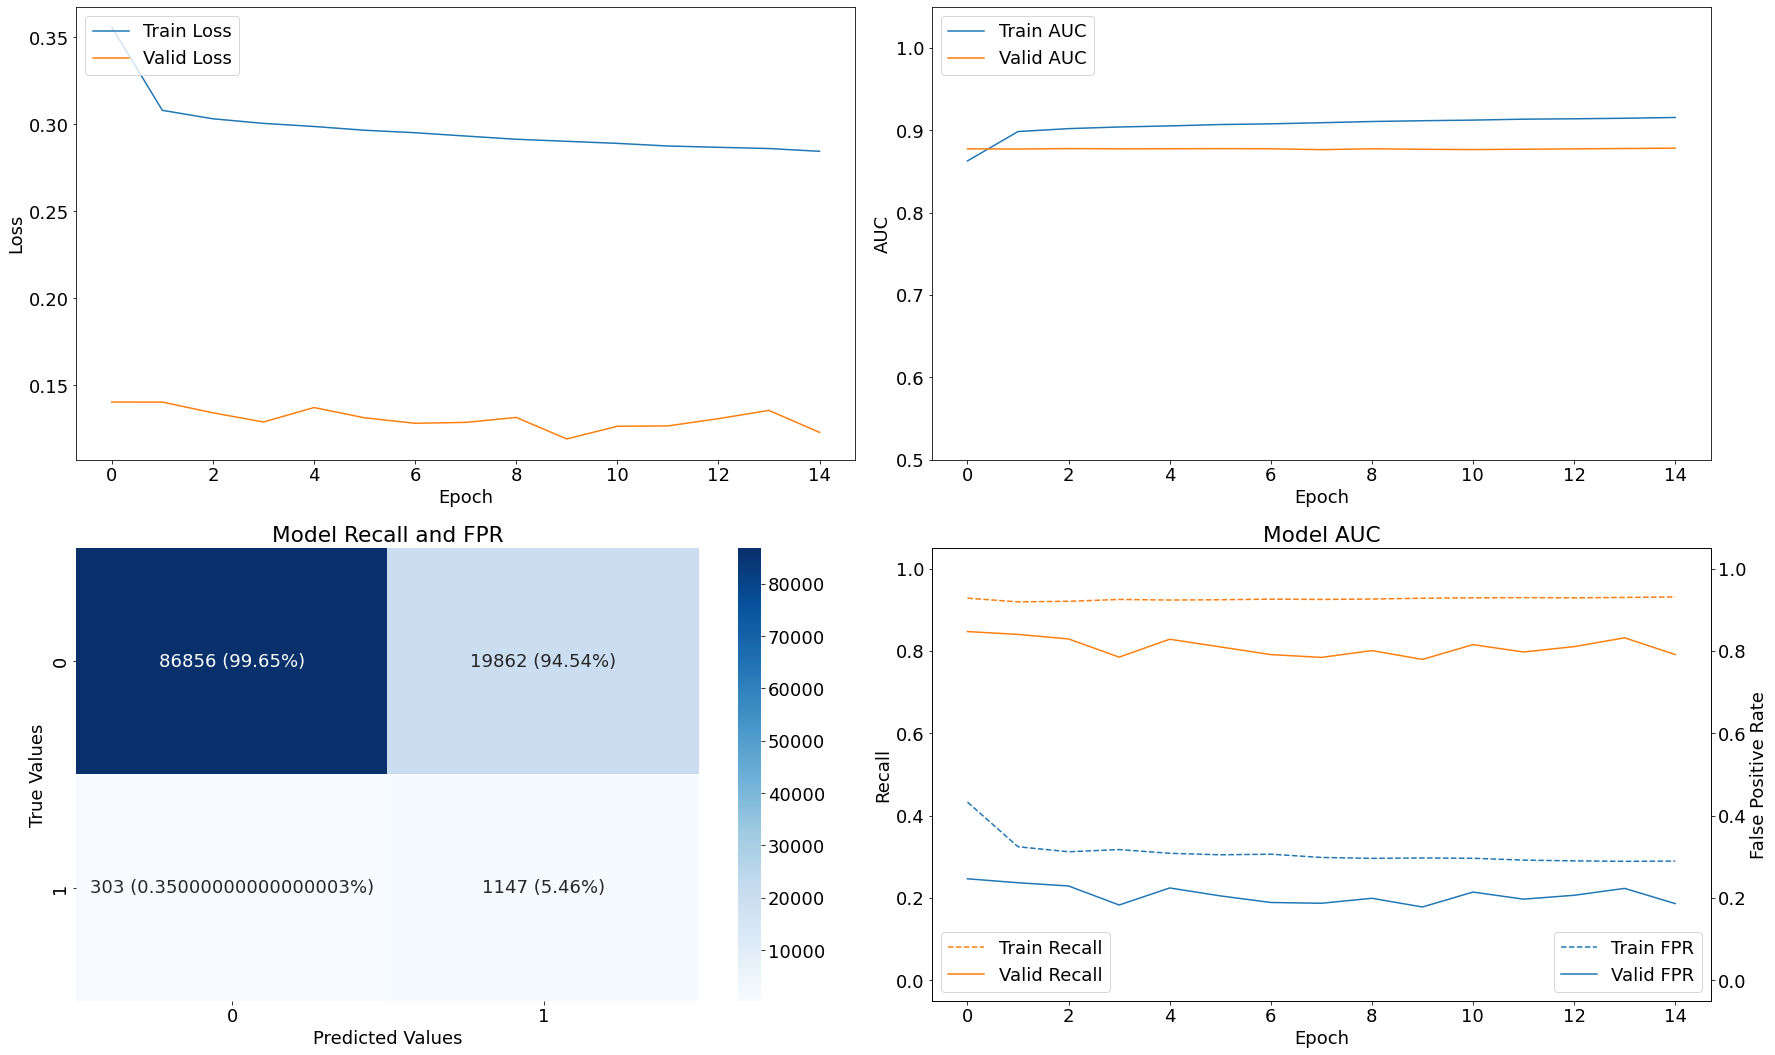

In [85]:
for t in thresholds:
    
    modelling_v5(X_train_base_scaled_resampled,
                 y_train_base_resampled,
                 X_val_base_scaled,
                 y_val_base,
                'Base Model V5',
                 threshold=t)

In [86]:
def modelling_v6(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):     
    
    model_v6 = models.Sequential()

    model_v6.add(layers.Input(shape=(n_features, )))
    model_v6.add(layers.Dense(32, kernel_initializer='lecun_normal', activation='selu'))
    model_v6.add(layers.AlphaDropout(0.25))
    model_v6.add(layers.Dense(16, kernel_initializer='lecun_normal', activation='selu'))
    model_v6.add(layers.AlphaDropout(0.25))
    model_v6.add(layers.Dense(1, activation='sigmoid'))

    model_v6.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v6_history = model_v6.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v6,
             name,
             model_v6_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00025: early stopping
Results for Base Model V6 with threshold = 0.5.

 Train f1: 0.7631849155955076 
 Val f1: 0.20395387529780368 

 Train Recall: 0.7175472378730774 
 Val Recall: 0.4268965423107147 

 Train FPR: 0.0407135896384716 
 Val FPR: 0.0374913327395916


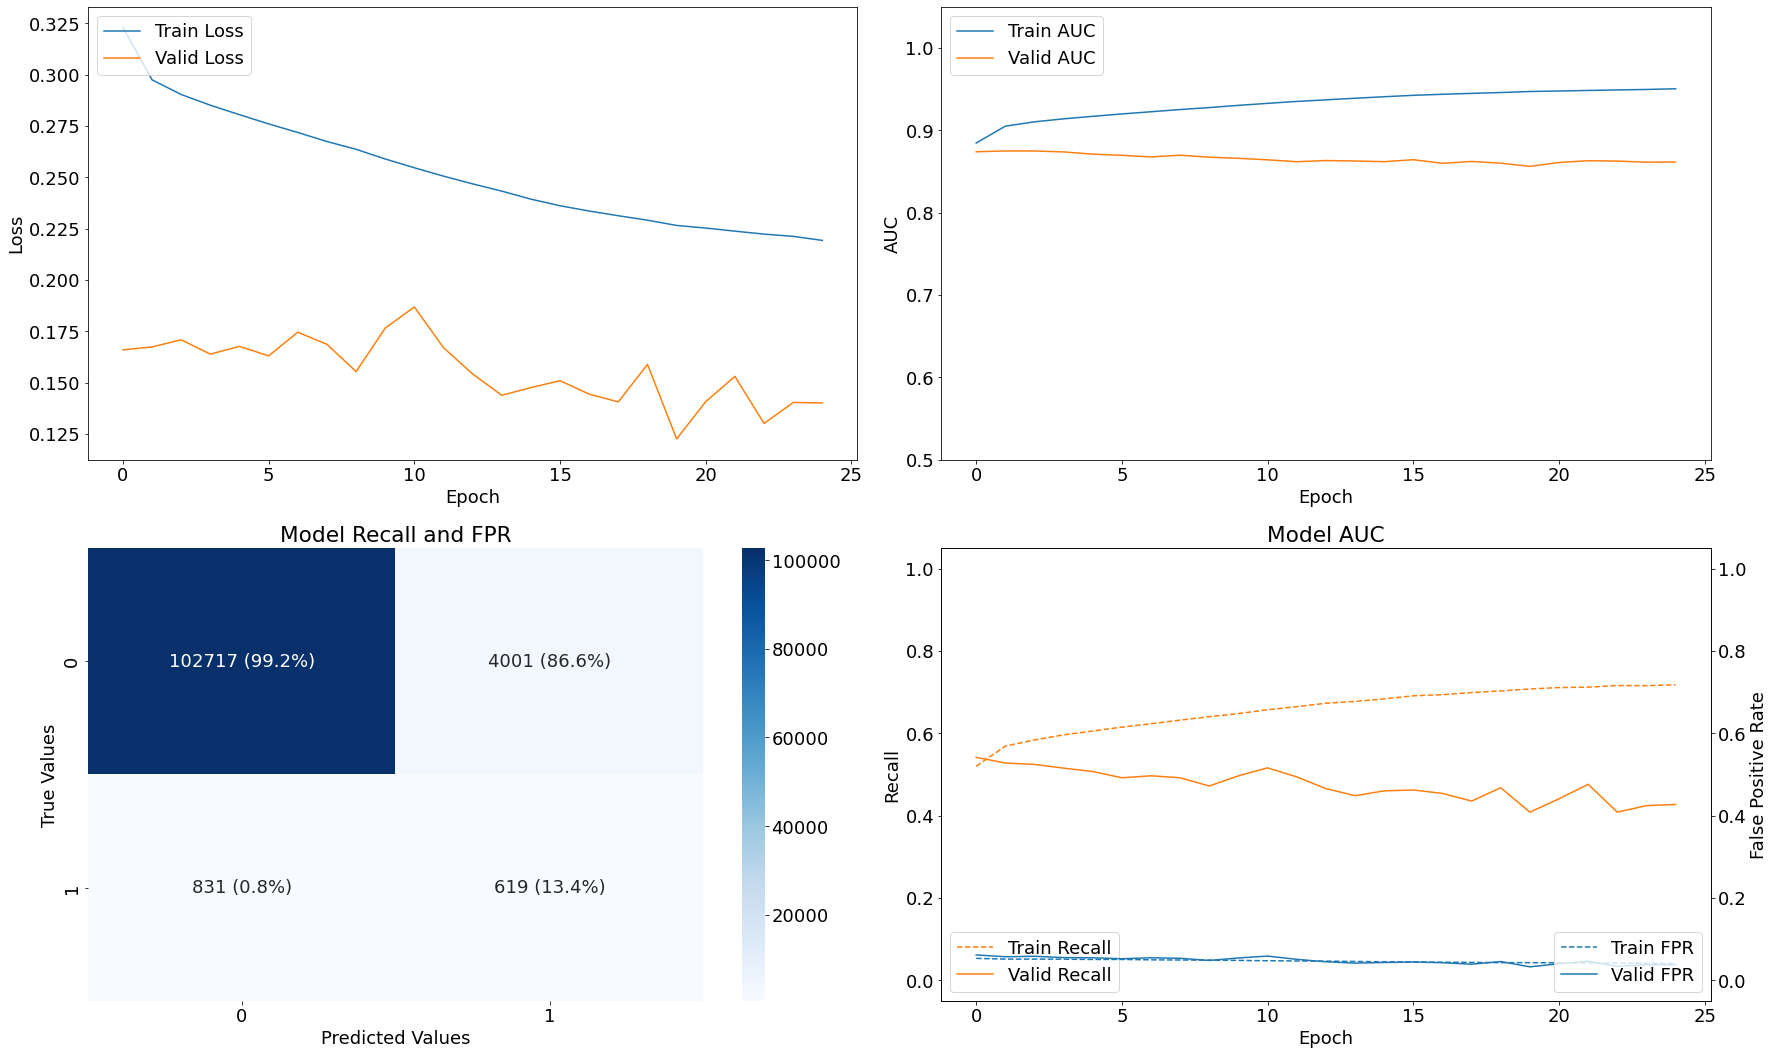

Epoch 00006: early stopping
Results for Base Model V6 with threshold = 0.4.

 Train f1: 0.7013516805936296 
 Val f1: 0.1553802120869943 

 Train Recall: 0.7203839421272278 
 Val Recall: 0.6179310083389282 

 Train FPR: 0.08347207307815552 
 Val FPR: 0.0860866978764534


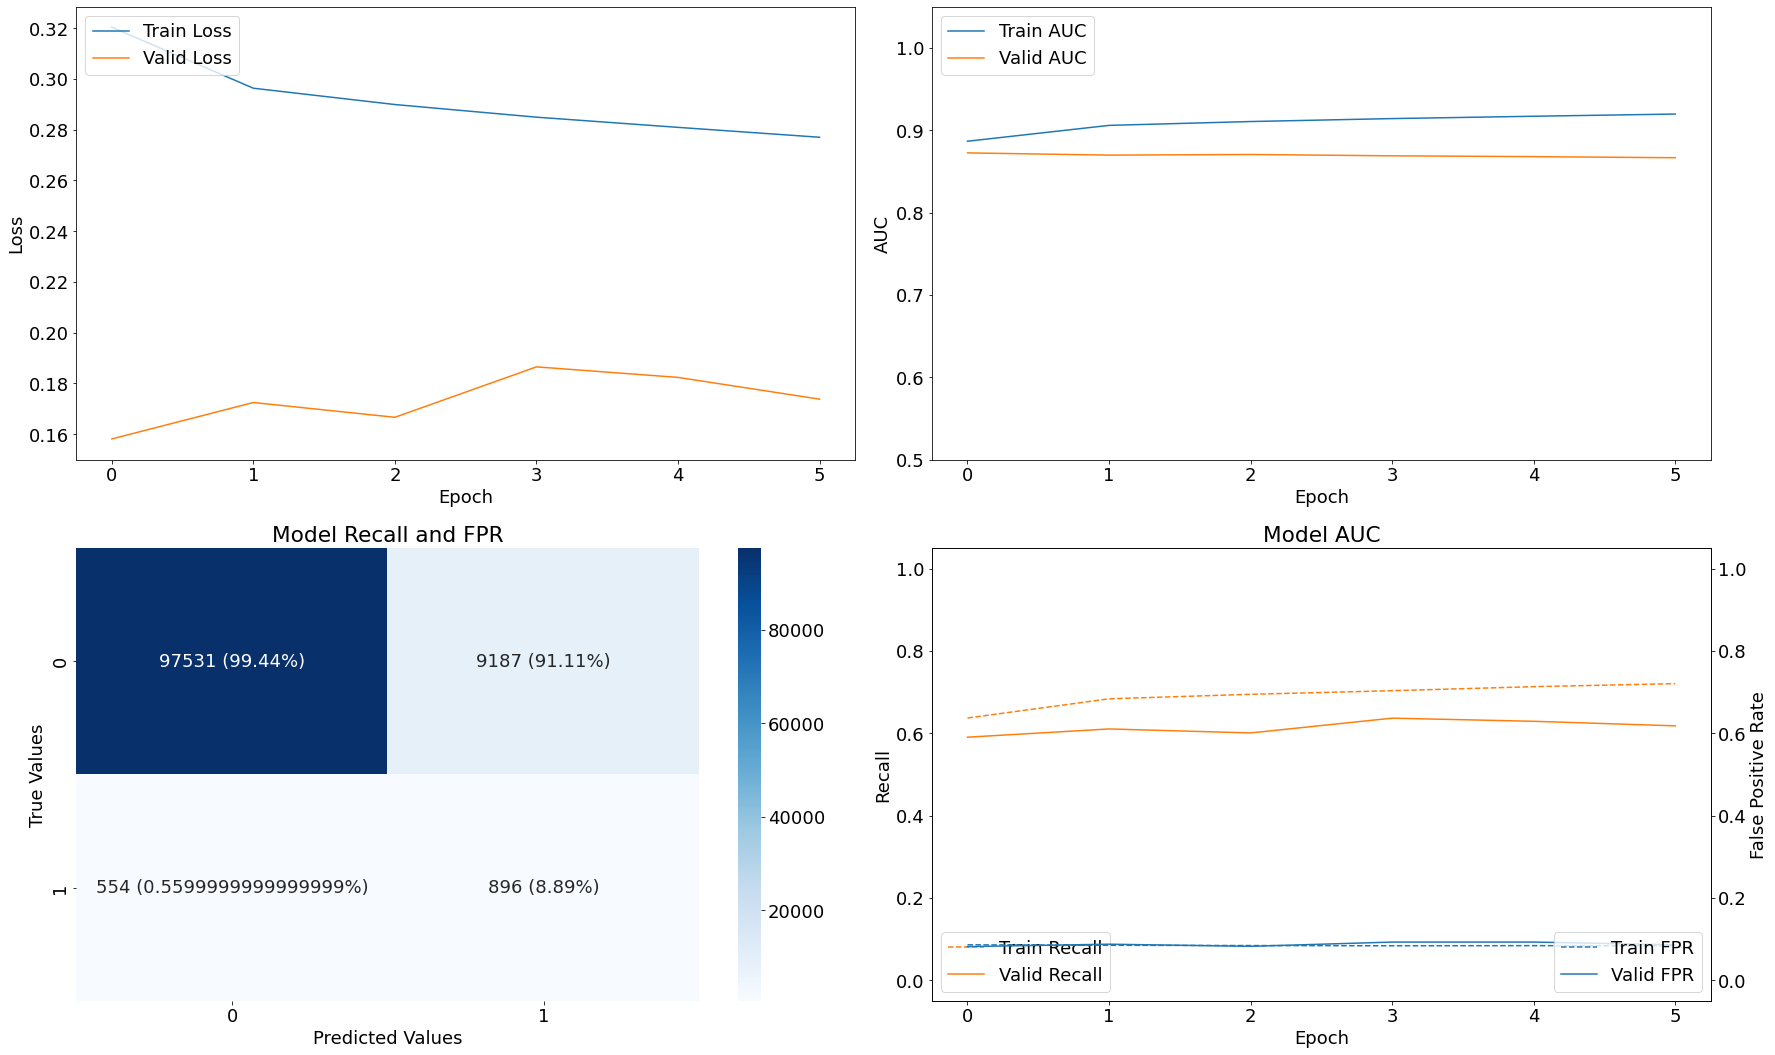

Epoch 00010: early stopping
Results for Base Model V6 with threshold = 0.3.

 Train f1: 0.7185087272800663 
 Val f1: 0.1688176524133668 

 Train Recall: 0.7929022312164307 
 Val Recall: 0.5593103170394897 

 Train FPR: 0.10354354977607727 
 Val FPR: 0.0688449963927269


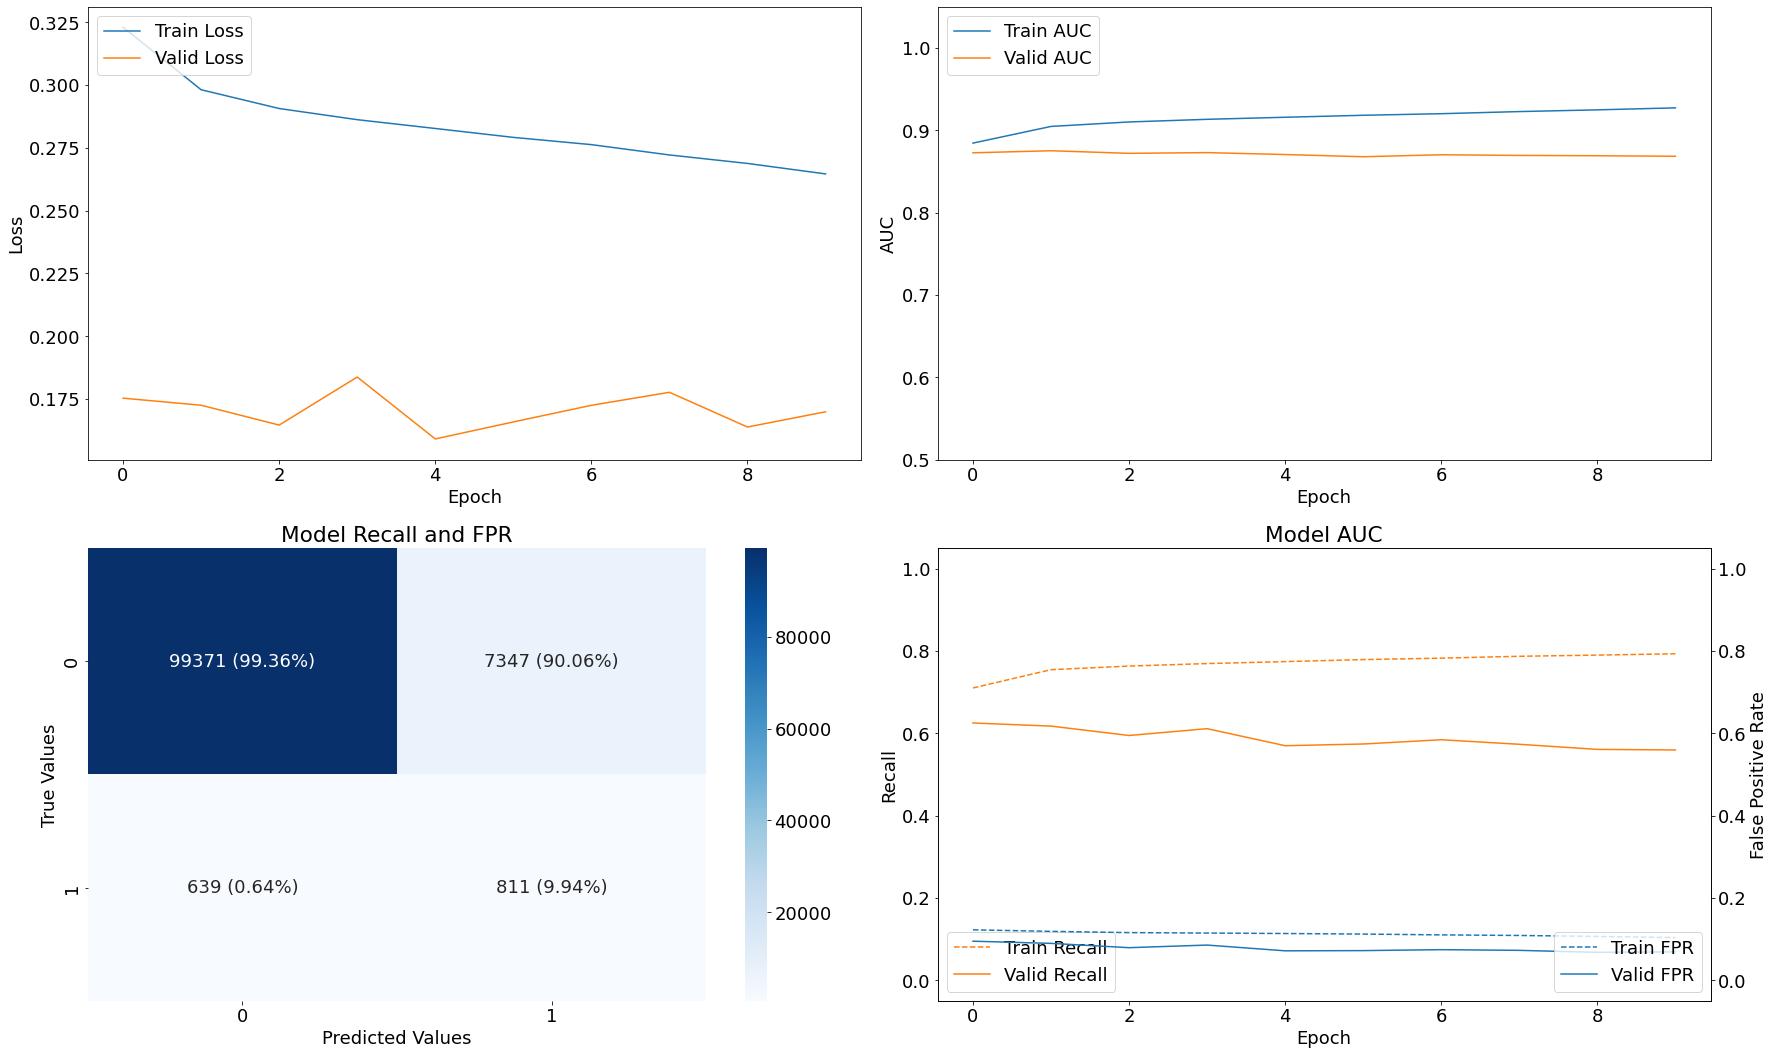

Epoch 00007: early stopping
Results for Base Model V6 with threshold = 0.2.

 Train f1: 0.6740830287085967 
 Val f1: 0.14458211353001307 

 Train Recall: 0.8691366314888 
 Val Recall: 0.6317241191864014 

 Train FPR: 0.17739610373973846 
 Val FPR: 0.09656290709972382


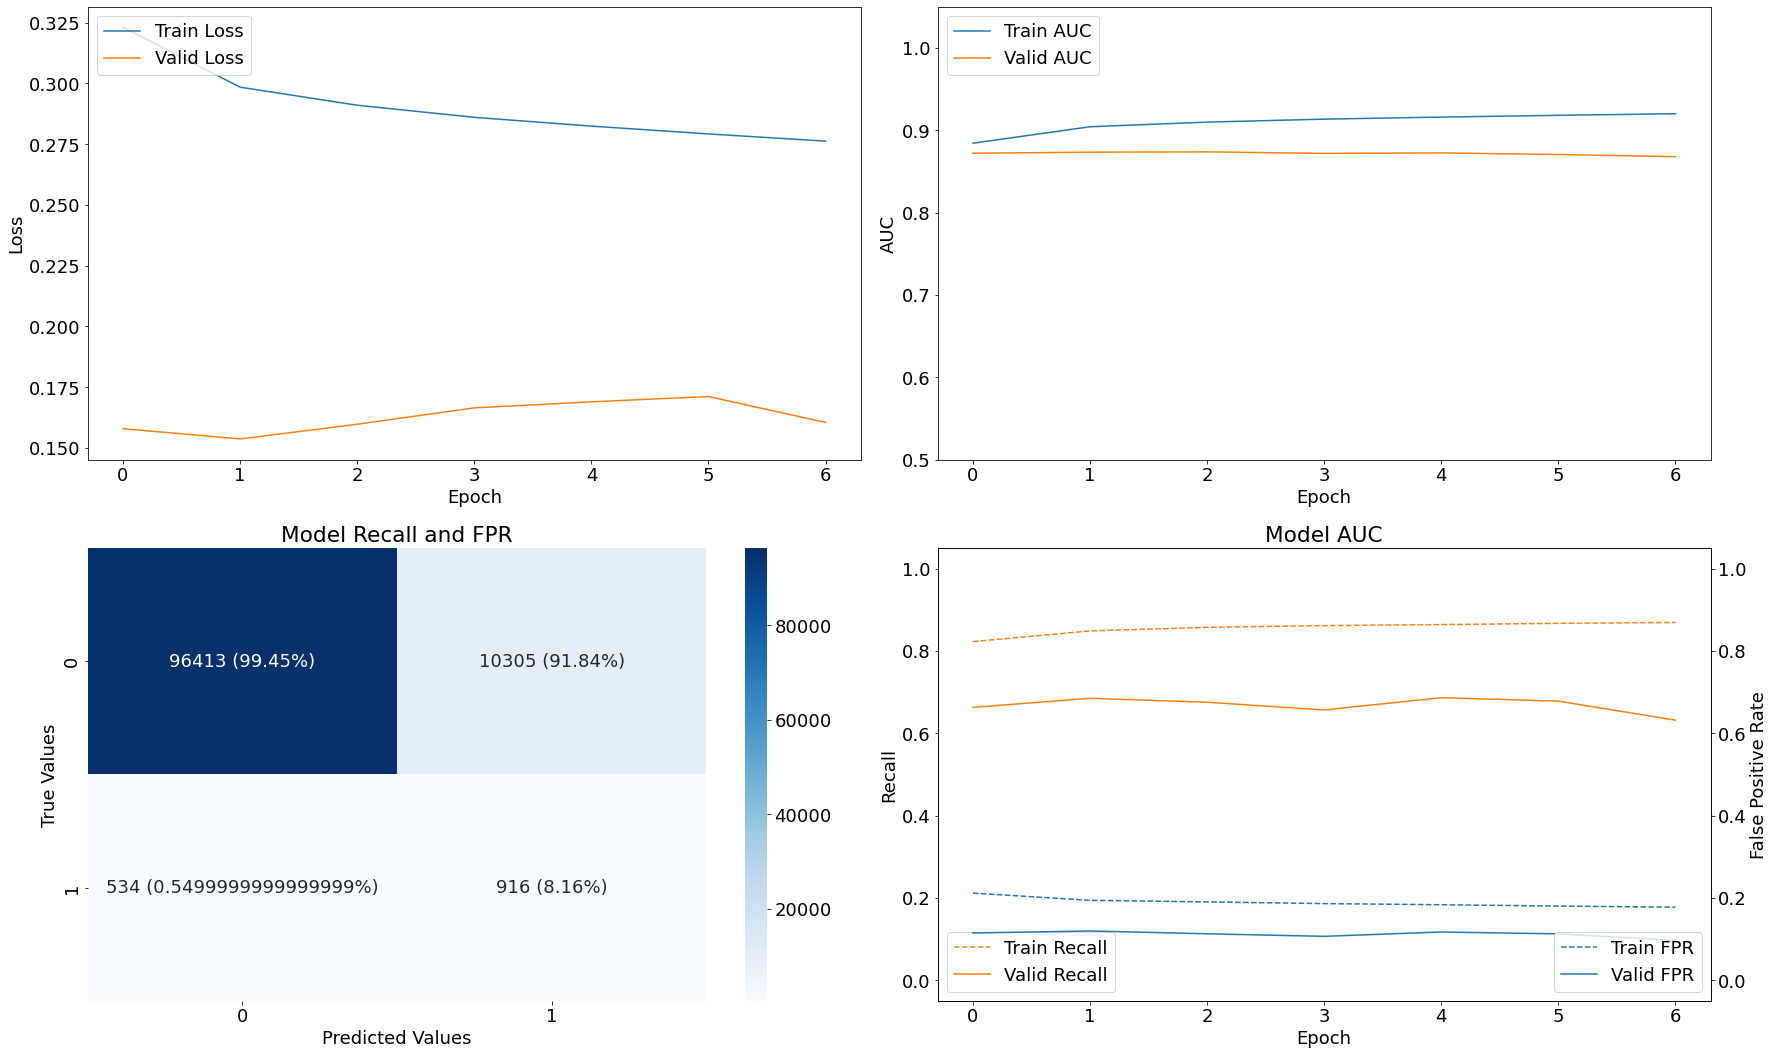

Epoch 00007: early stopping
Results for Base Model V6 with threshold = 0.1.

 Train f1: 0.6104042321204389 
 Val f1: 0.1042763481222508 

 Train Recall: 0.9312334656715393 
 Val Recall: 0.7786206603050232 

 Train FPR: 0.2799915671348572 
 Val FPR: 0.17874211072921753


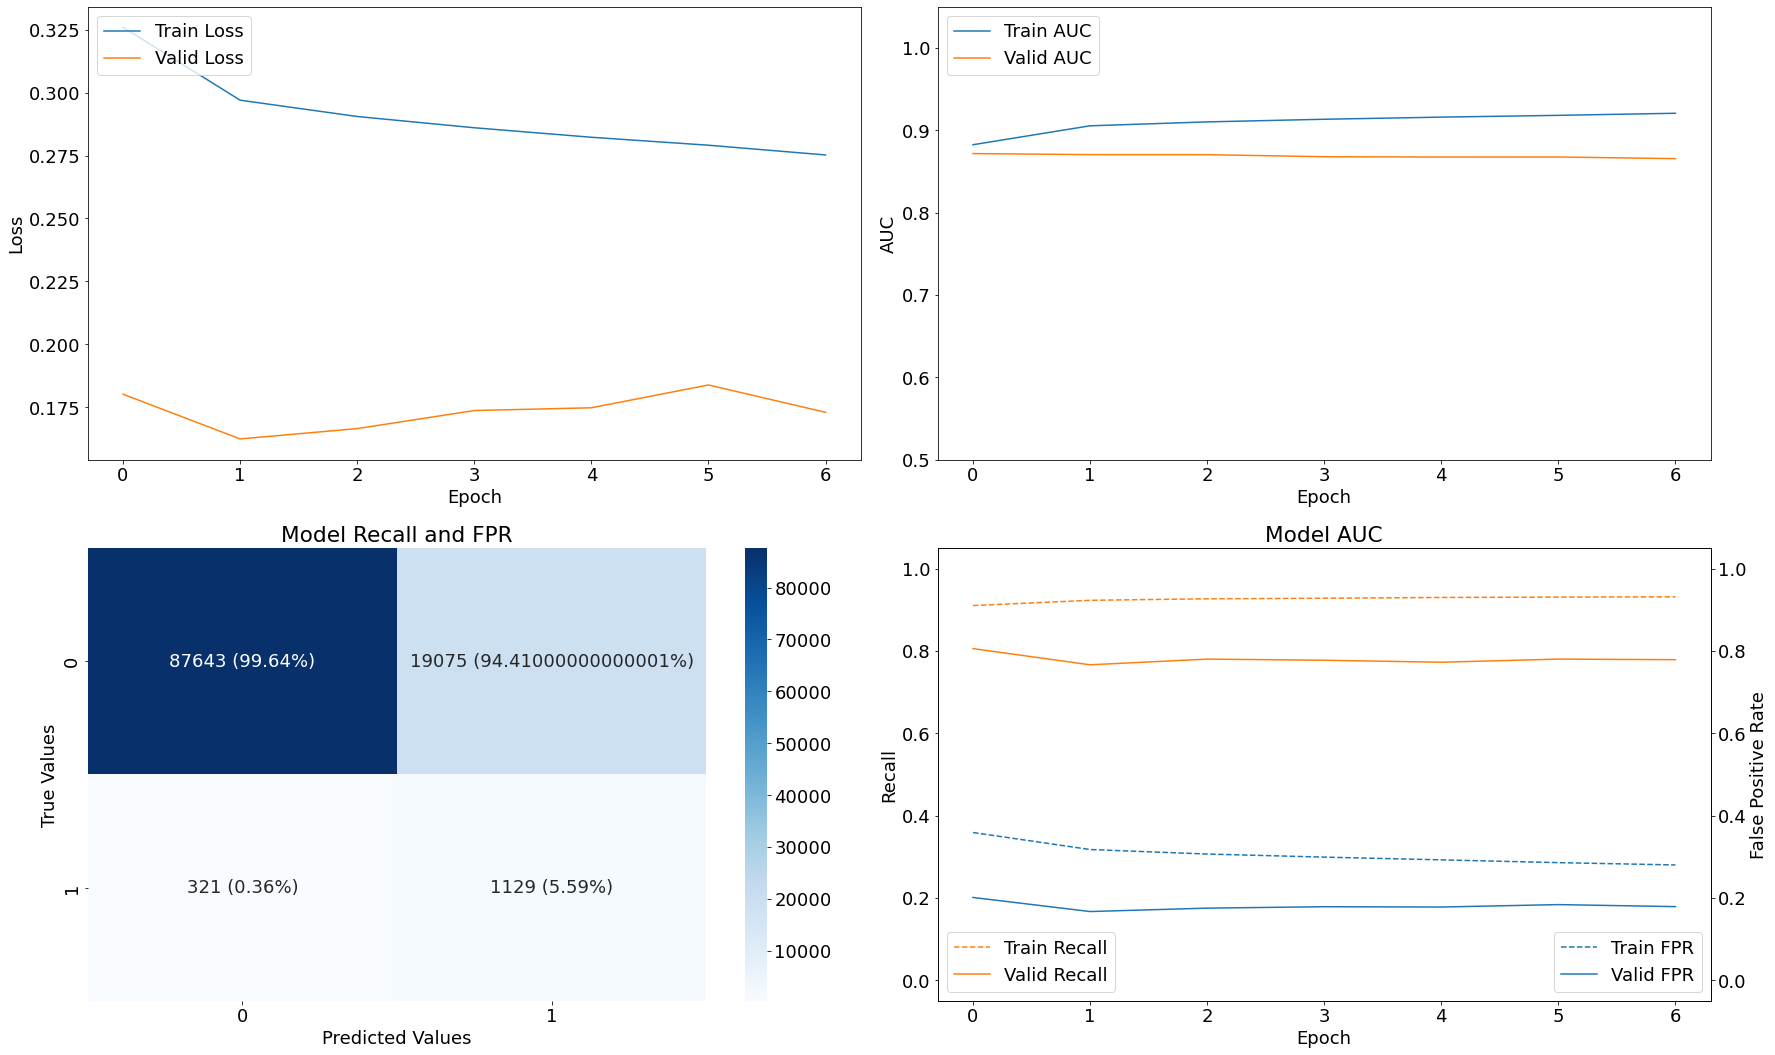

In [87]:
for t in thresholds:

    modelling_v6(X_train_base_scaled_resampled,
                 y_train_base_resampled,
                 X_val_base_scaled,
                 y_val_base,
                'Base Model V6',
                 threshold=t)

In [88]:
def modelling_v7(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5): 

    model_v7 = models.Sequential()

    model_v7.add(layers.Input(shape=(n_features, )))
    model_v7.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.Dropout(0.5))
    model_v7.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.Dropout(0.5))
    model_v7.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.Dropout(0.5))
    model_v7.add(layers.Dense(4, activation='relu', kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.Dense(1, activation='sigmoid'))

    model_v7.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v7_history = model_v7.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v7,
             name,
             model_v7_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00008: early stopping
Results for Base Model V7 with threshold = 0.5.

 Train f1: 0.5013209806377766 
 Val f1: 0.18562190843664408 

 Train Recall: 0.39019566774368286 
 Val Recall: 0.5048275589942932 

 Train FPR: 0.041618477553129196 
 Val FPR: 0.053458649665117264


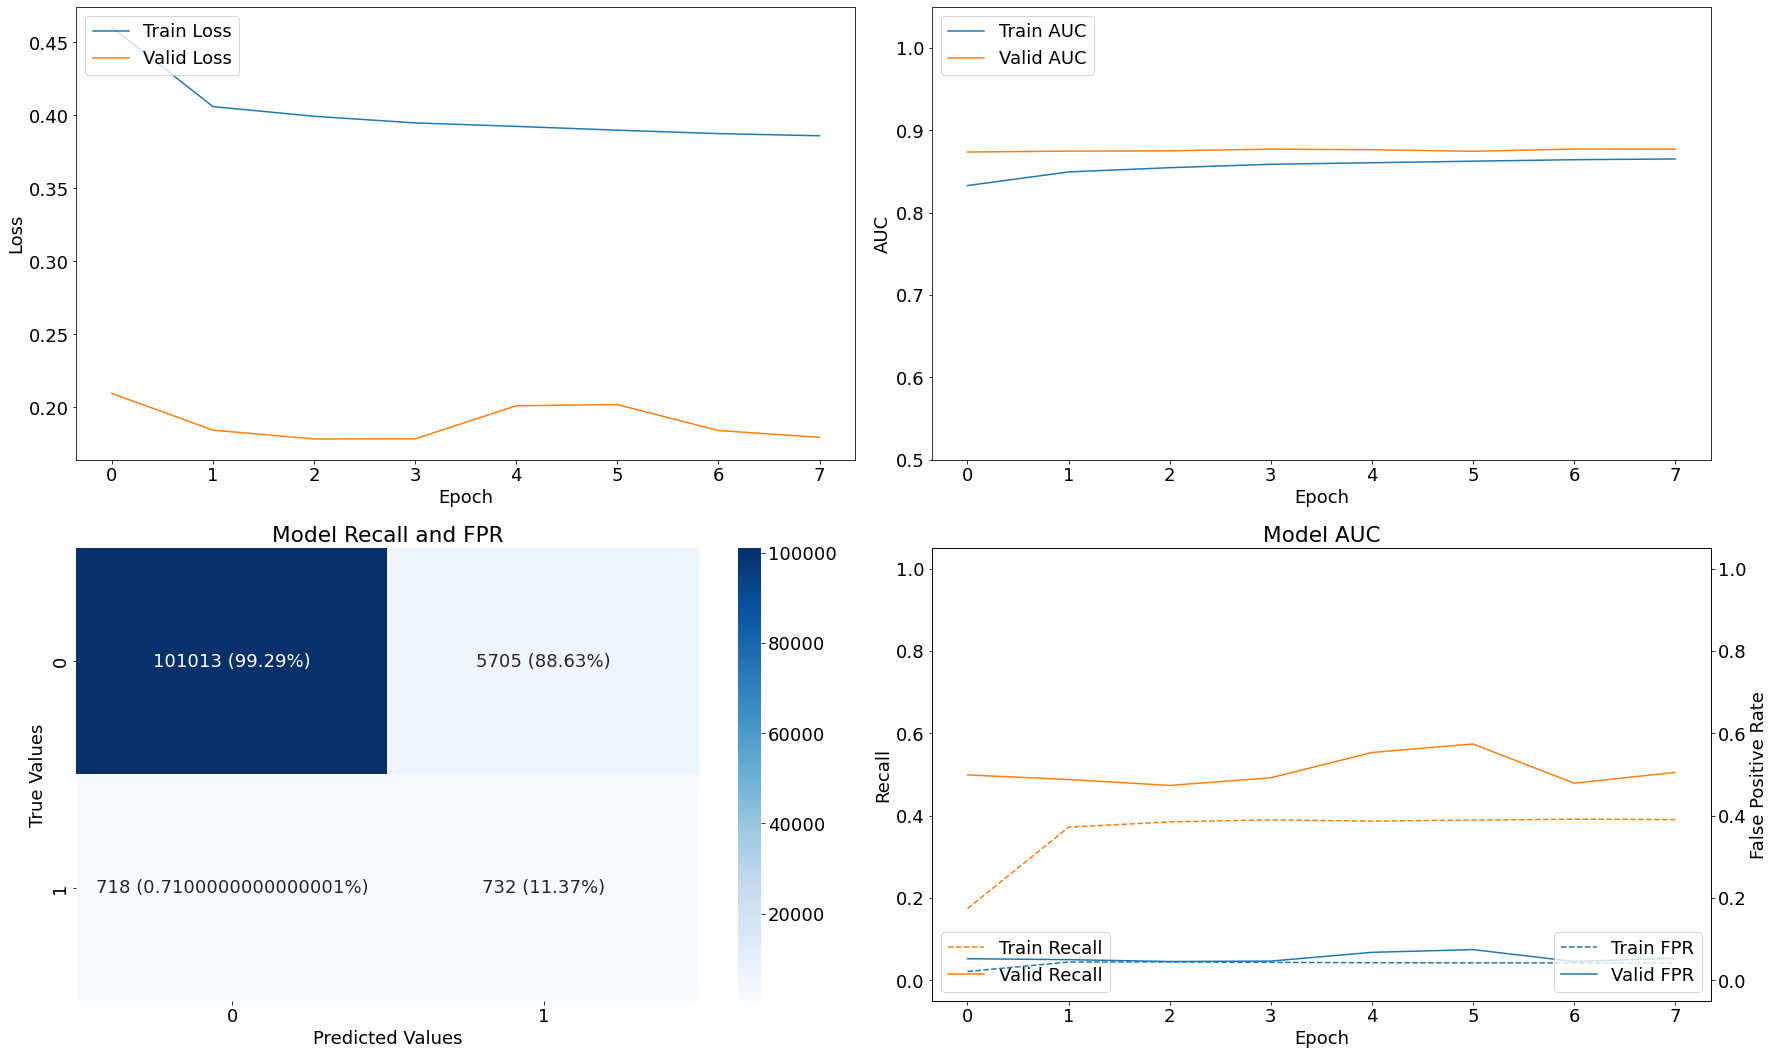

Epoch 00021: early stopping
Results for Base Model V7 with threshold = 0.4.

 Train f1: 0.6367069906787561 
 Val f1: 0.15982882105858534 

 Train Recall: 0.7001967430114746 
 Val Recall: 0.5924137830734253 

 Train FPR: 0.1248084083199501 
 Val FPR: 0.07908693701028824


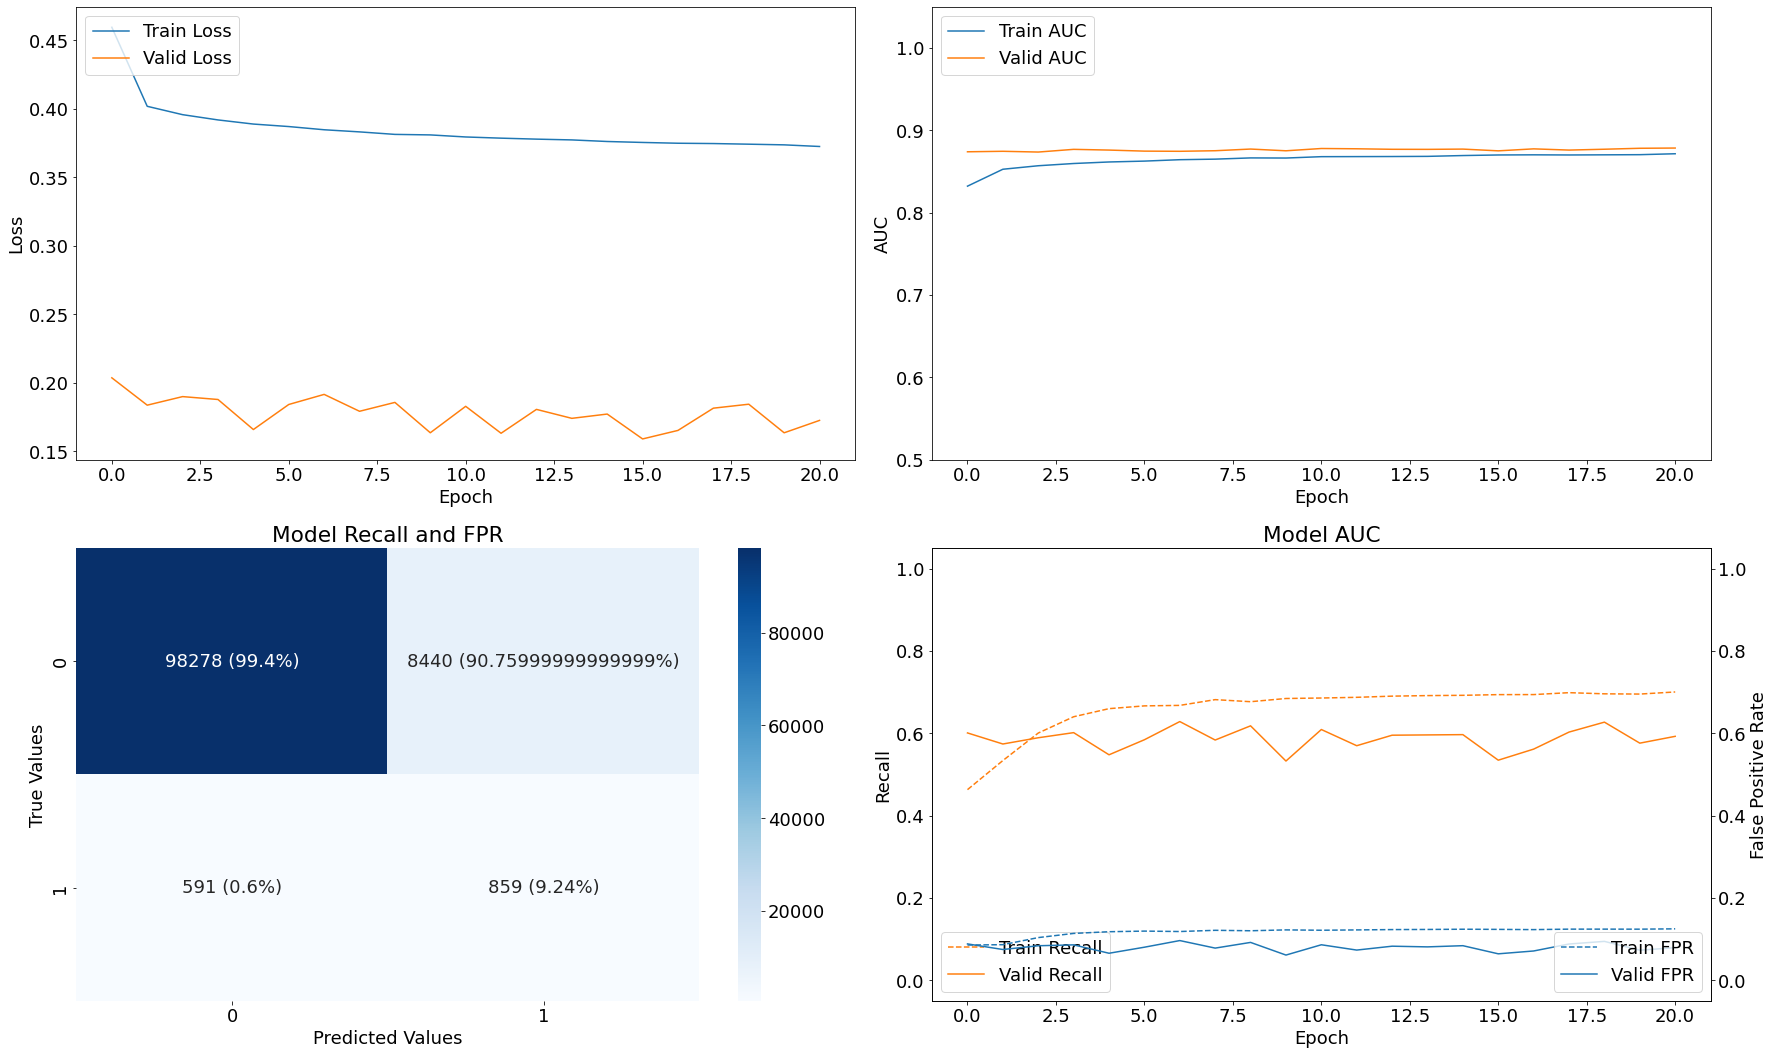

Epoch 00019: early stopping
Results for Base Model V7 with threshold = 0.3.

 Train f1: 0.6305245128224115 
 Val f1: 0.1286039667559938 

 Train Recall: 0.7849462628364563 
 Val Recall: 0.6813793182373047 

 Train FPR: 0.1762179732322693 
 Val FPR: 0.12113232910633087


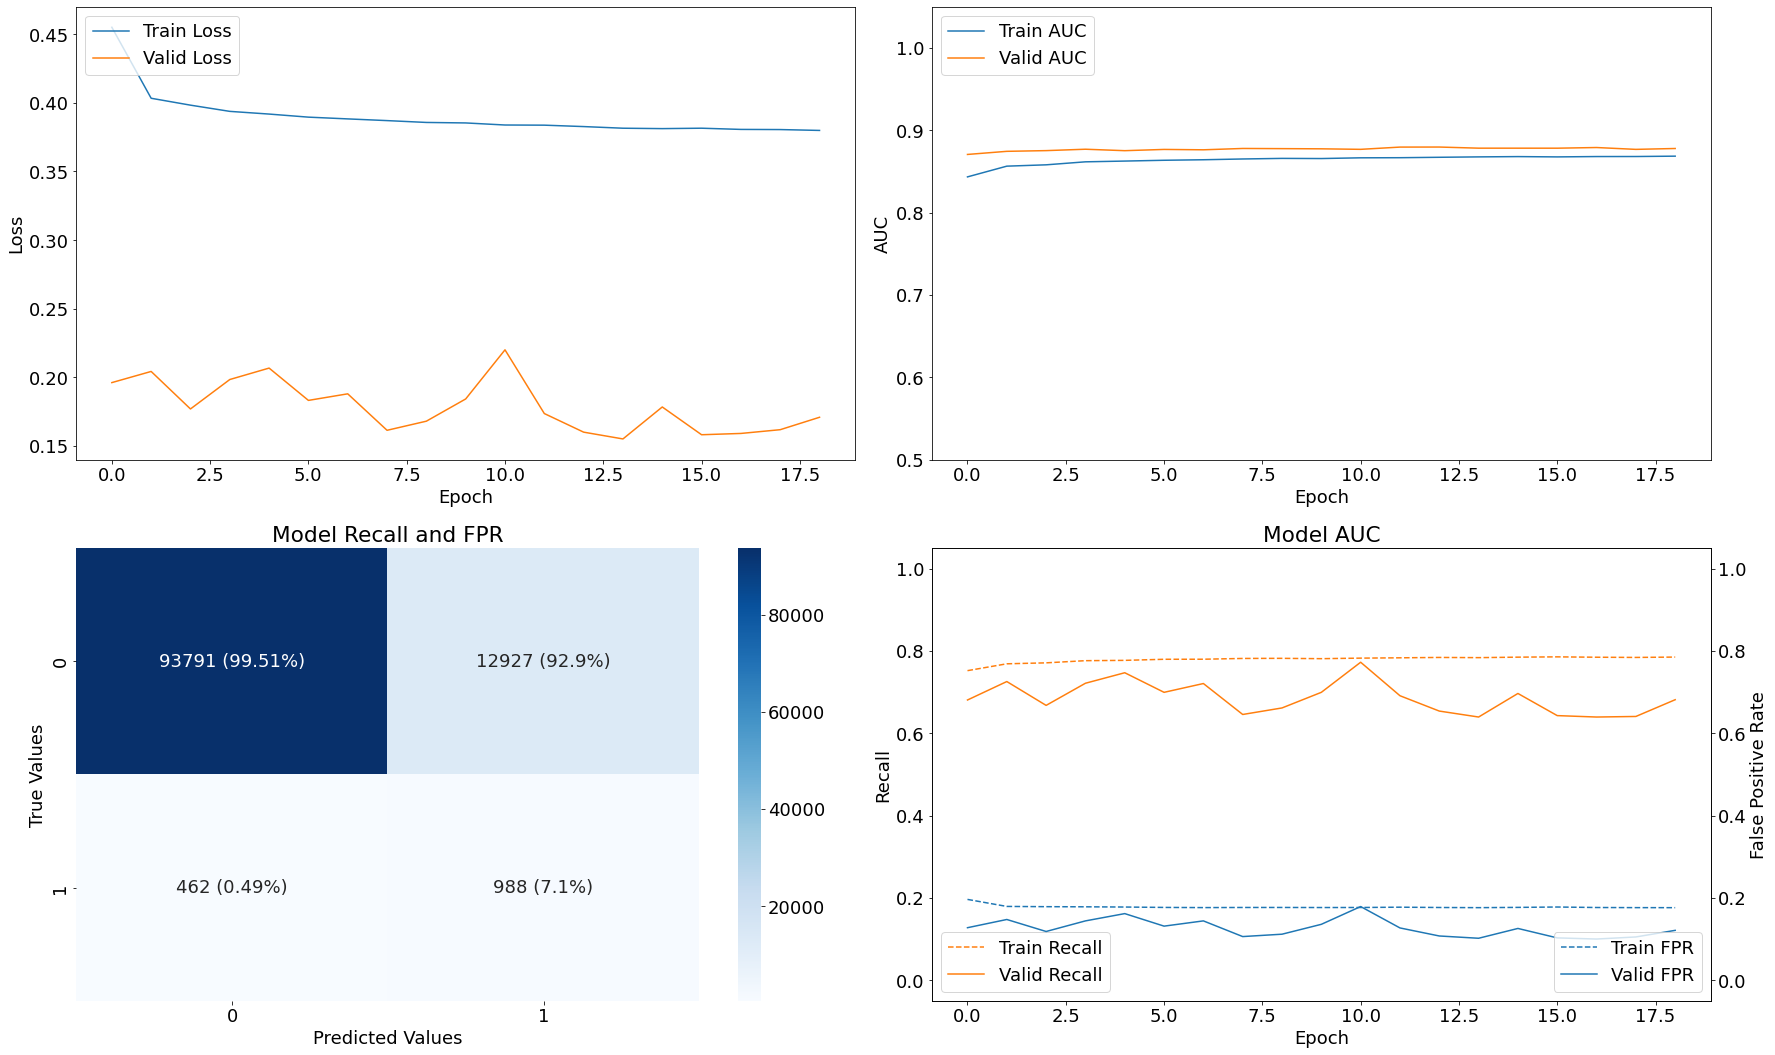

Epoch 00006: early stopping
Results for Base Model V7 with threshold = 0.2.

 Train f1: 0.6227233392173116 
 Val f1: 0.11146529746905944 

 Train Recall: 0.7583486437797546 
 Val Recall: 0.747586190700531 

 Train FPR: 0.1693093180656433 
 Val FPR: 0.158511221408844


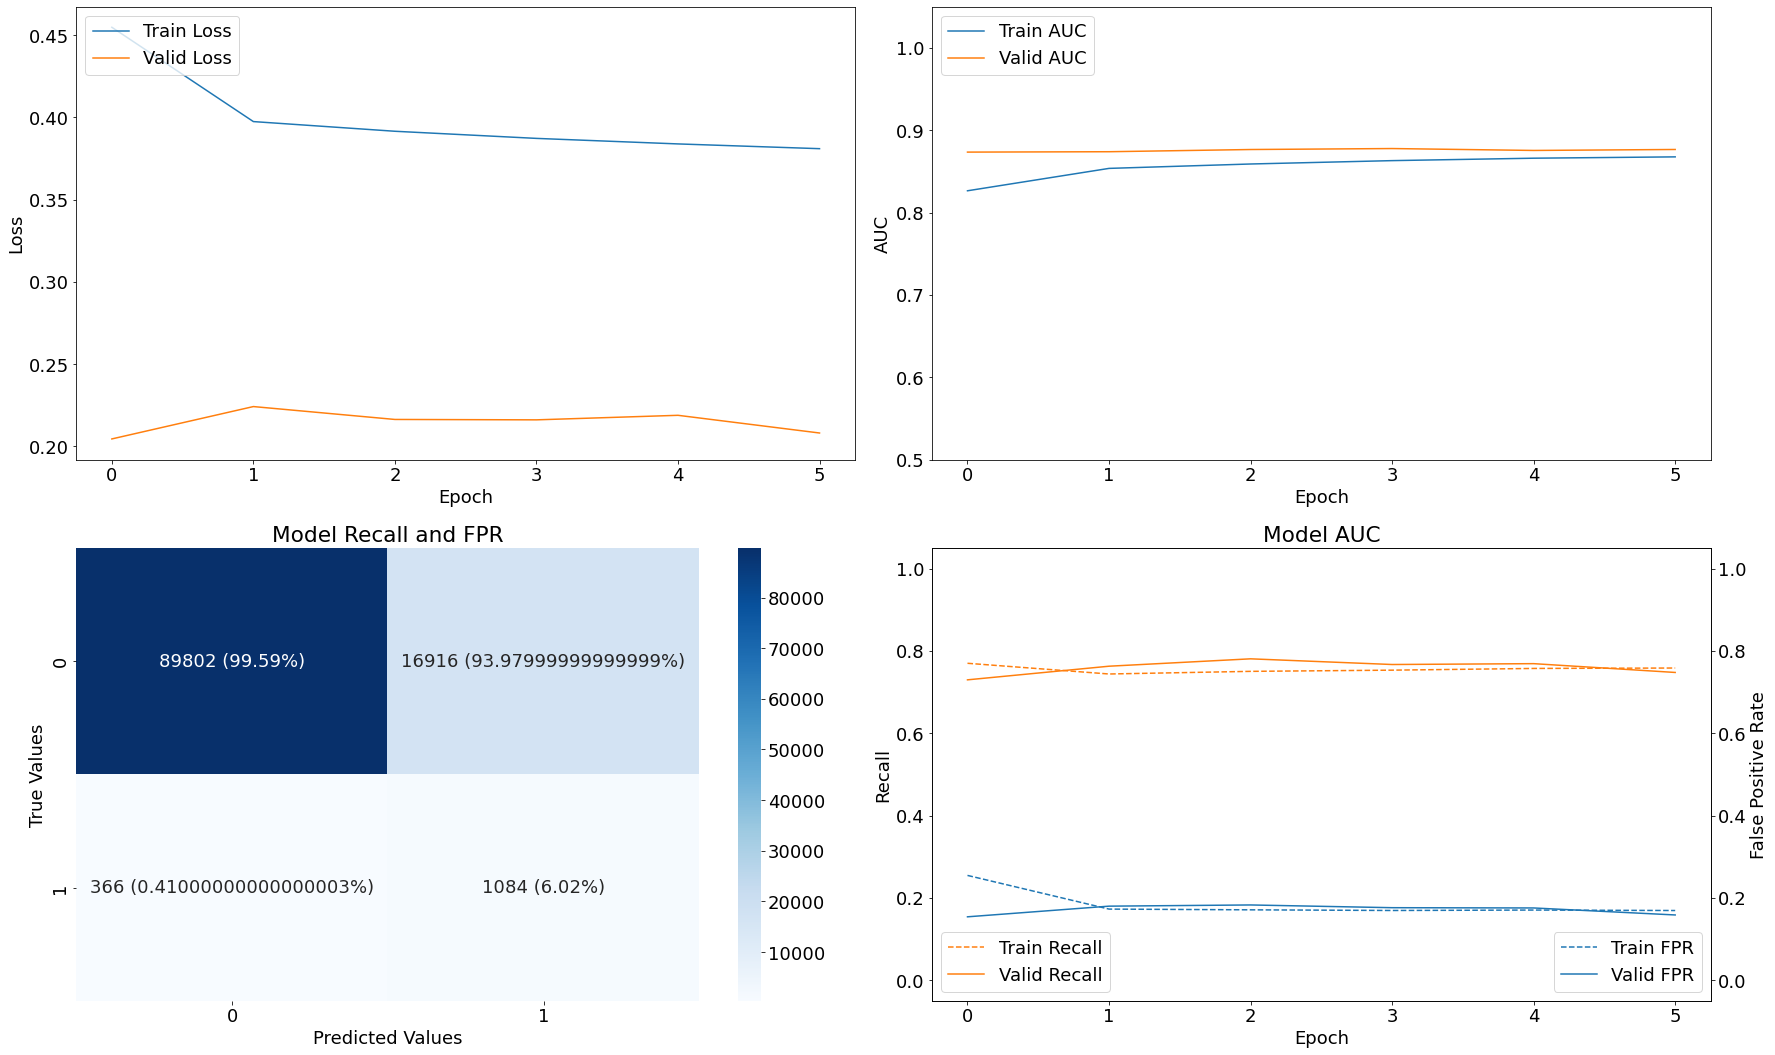

Epoch 00014: early stopping
Results for Base Model V7 with threshold = 0.1.

 Train f1: 0.4950777948061388 
 Val f1: 0.06916533515457957 

 Train Recall: 0.930465817451477 
 Val Recall: 0.8972413539886475 

 Train FPR: 0.45709916949272156 
 Val FPR: 0.326739639043808


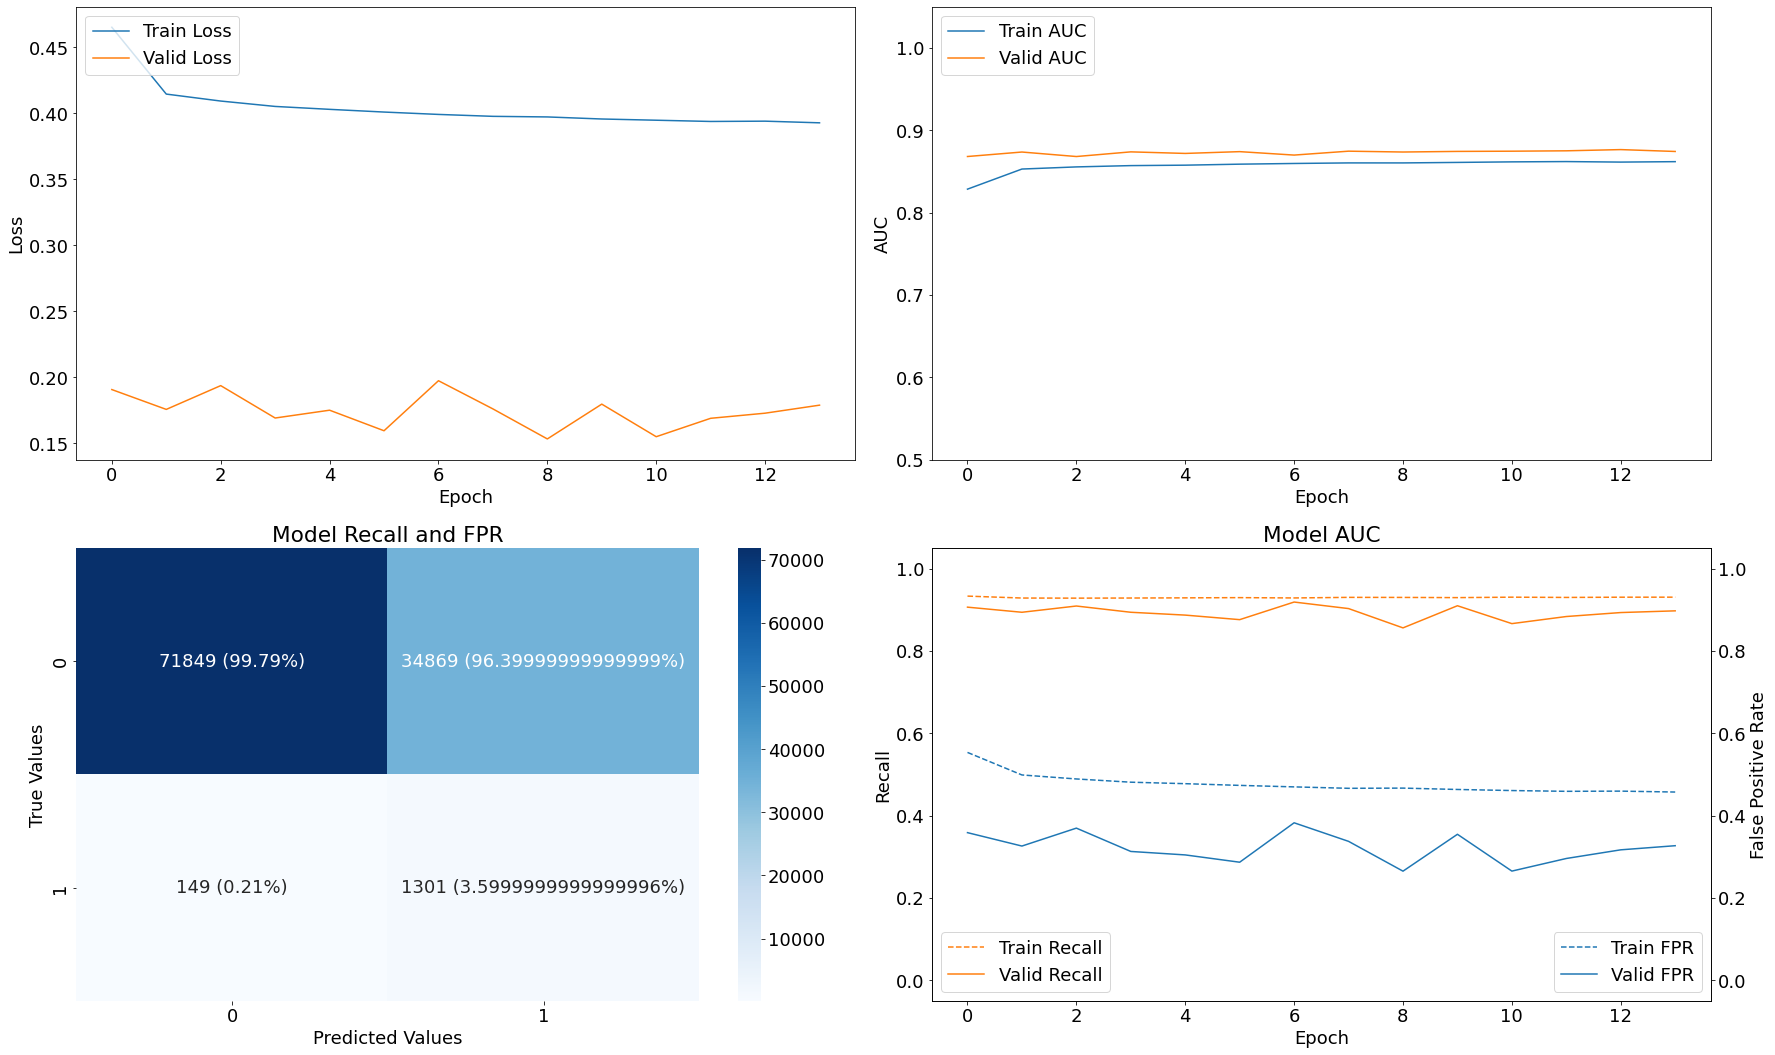

In [89]:
for t in thresholds:
    
    modelling_v7(X_train_base_scaled_resampled,
                 y_train_base_resampled,
                 X_val_base_scaled,
                 y_val_base,
                'Base Model V7',
                 threshold=t)

In [90]:
def modelling_v8(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):   
    
    model_v8 = models.Sequential()

    model_v8.add(layers.Input(shape=(n_features, )))
    model_v8.add(layers.Dense(32,
                                activation='relu',
                                kernel_regularizer=regularizers.L2(l2=0.025)))
    model_v8.add(layers.Dropout(0.5))
    model_v8.add(layers.Dense(16,
                                activation='relu',
                                kernel_regularizer=regularizers.L2(l2=0.025)))
    model_v8.add(layers.Dropout(0.5))
    model_v8.add(layers.Dense(8,
                                activation='relu',
                                kernel_regularizer=regularizers.L2(l2=0.025)))
    model_v8.add(layers.Dropout(0.5))
    model_v8.add(layers.Dense(4,
                                activation='relu',
                                kernel_regularizer=regularizers.L2(l2=0.025)))
    model_v8.add(layers.Dense(1, activation='sigmoid'))

    model_v8.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v8_history = model_v8.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    verbose=0).history
    
    evaluate(model_v8,
             name,
             model_v8_history,
             X_val,
             y_val,
             threshold=threshold)

Results for Base Model V8 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.3078964352607727 
 Val Recall: 0.0 

 Train FPR: 0.04106054827570915 
 Val FPR: 0.0


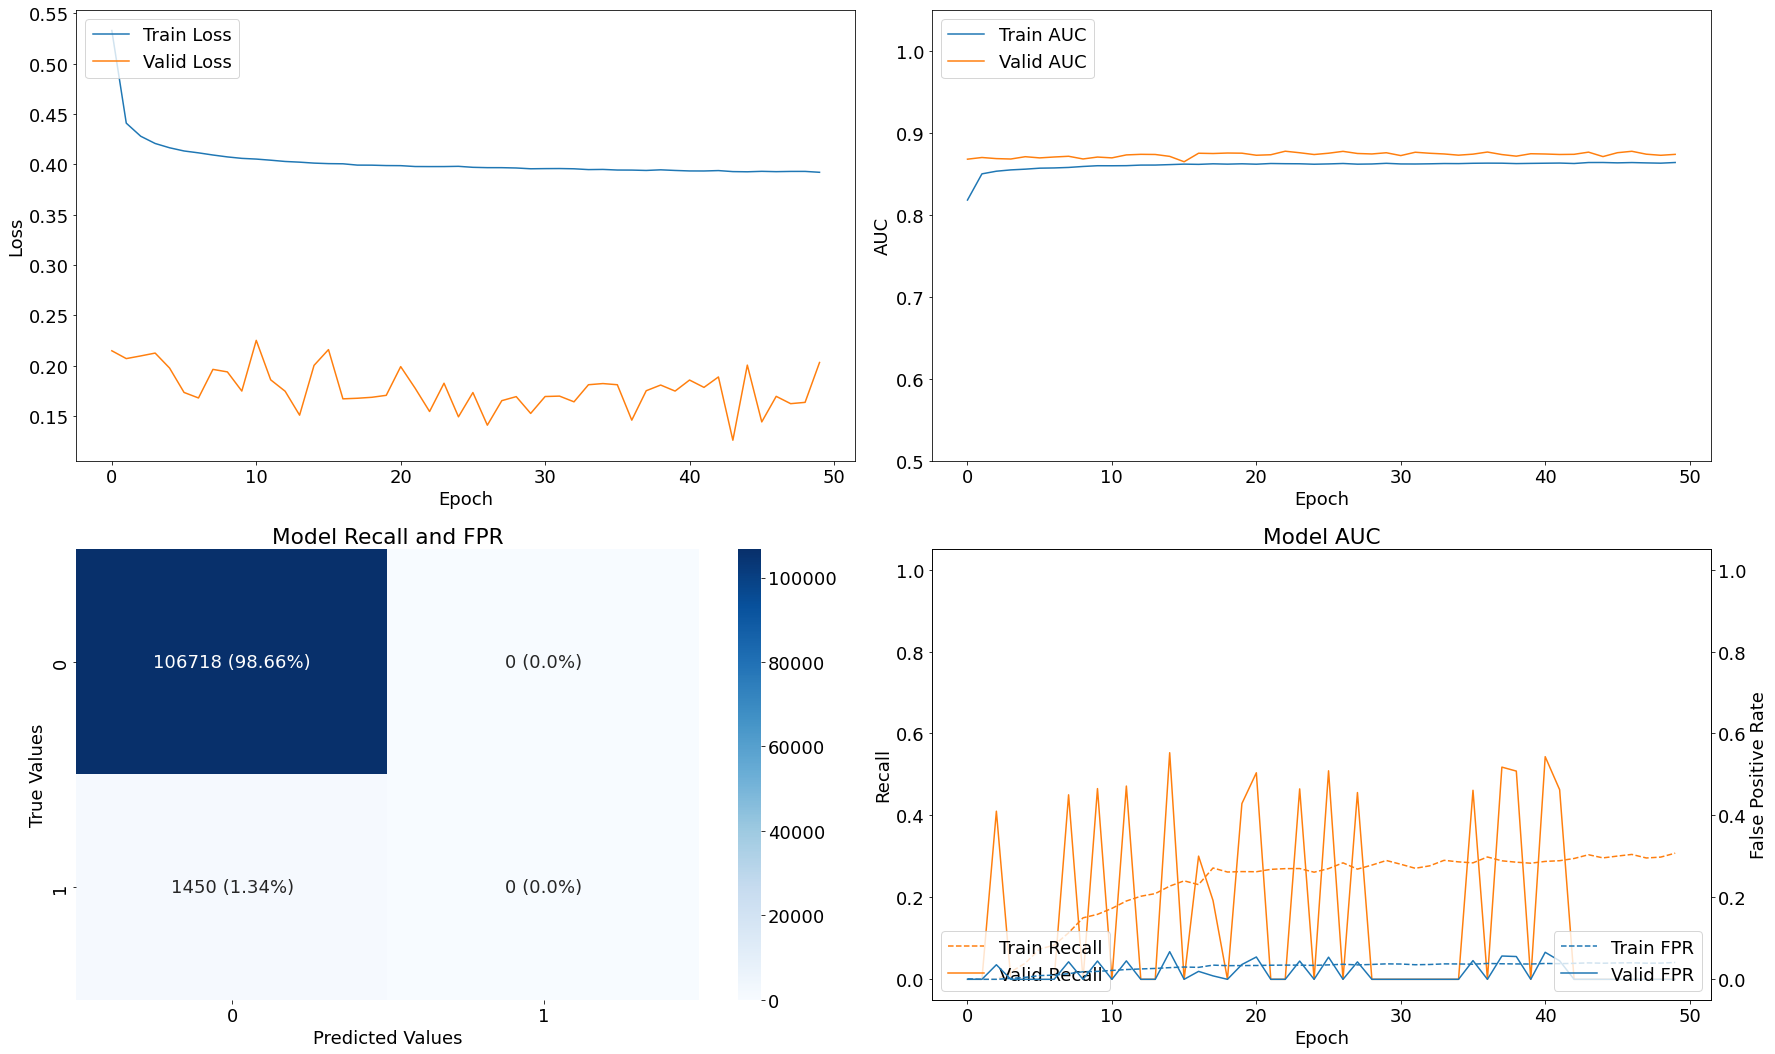

Results for Base Model V8 with threshold = 0.4.

 Train f1: 0.6351024148436232 
 Val f1: 0.15268237107438265 

 Train Recall: 0.6548810601234436 
 Val Recall: 0.6055172681808472 

 Train FPR: 0.10185069590806961 
 Val FPR: 0.08595550805330276


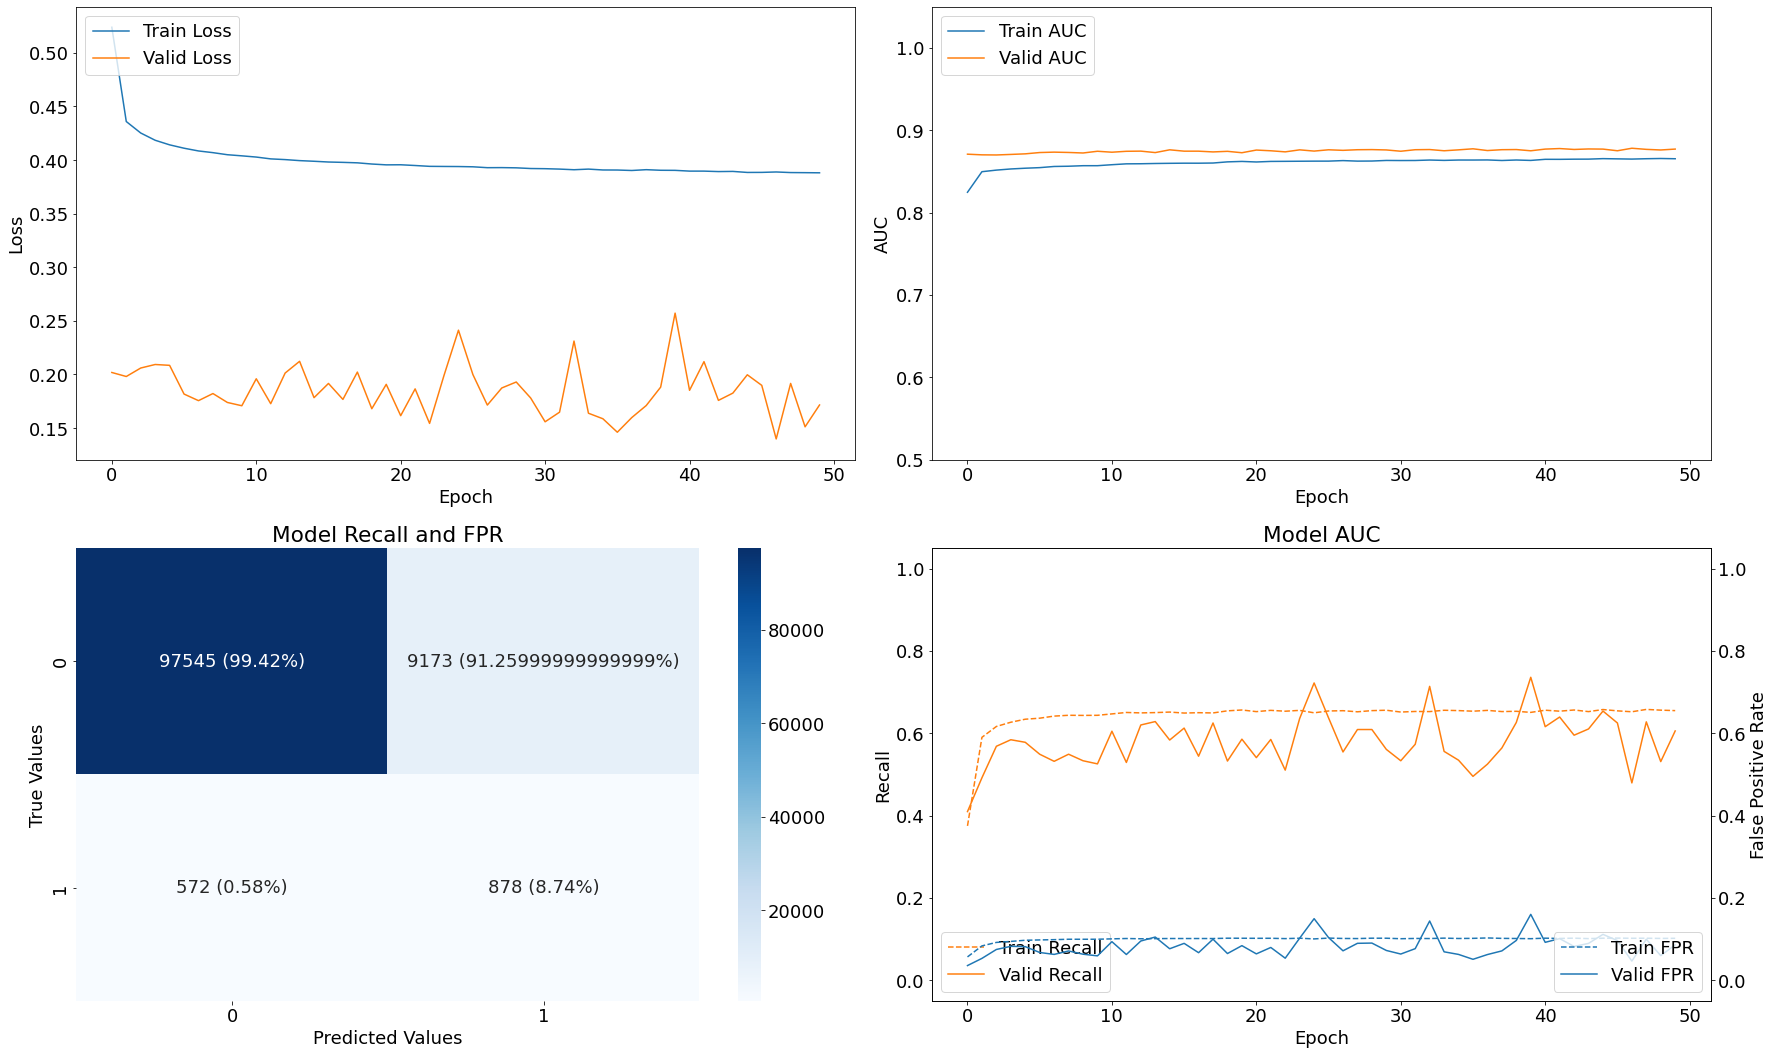

Results for Base Model V8 with threshold = 0.3.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.0 
 Val Recall: 0.0 

 Train FPR: 0.0 
 Val FPR: 0.0


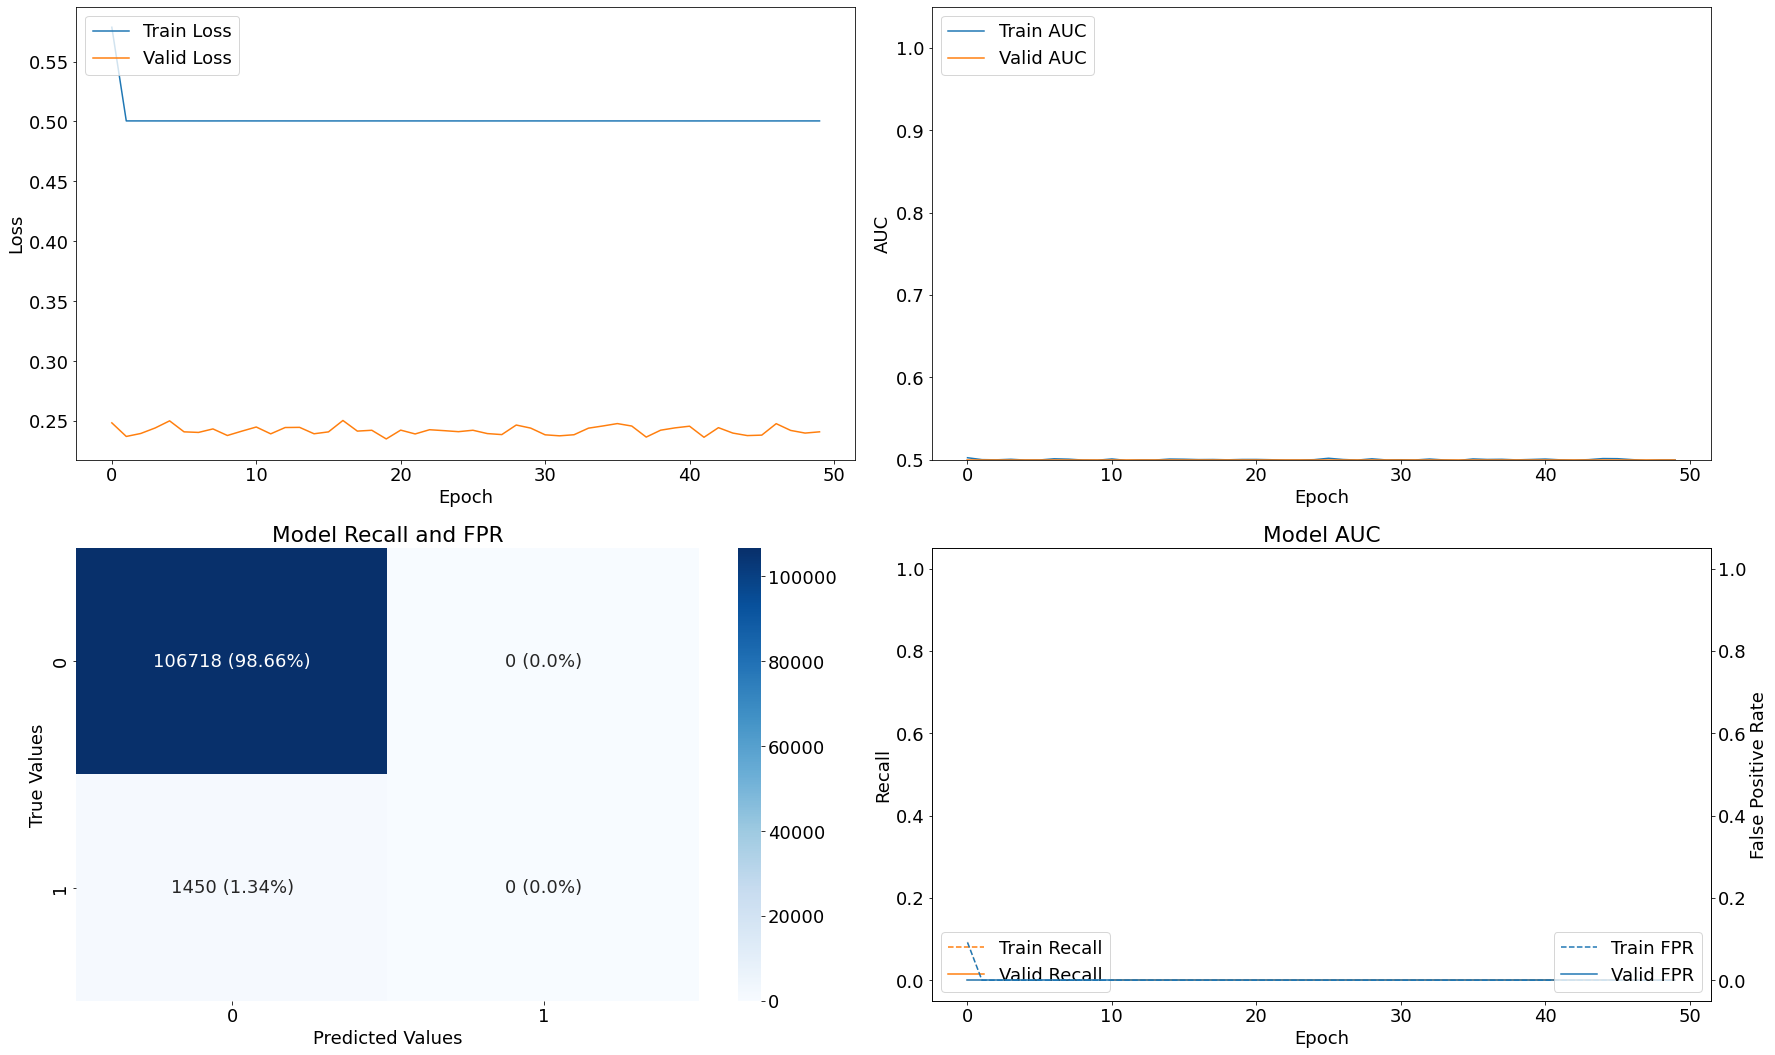

Results for Base Model V8 with threshold = 0.2.

 Train f1: 0.5454631741175757 
 Val f1: 0.09246427939017322 

 Train Recall: 0.8762588500976562 
 Val Recall: 0.8144827485084534 

 Train FPR: 0.3341589868068695 
 Val FPR: 0.21471542119979858


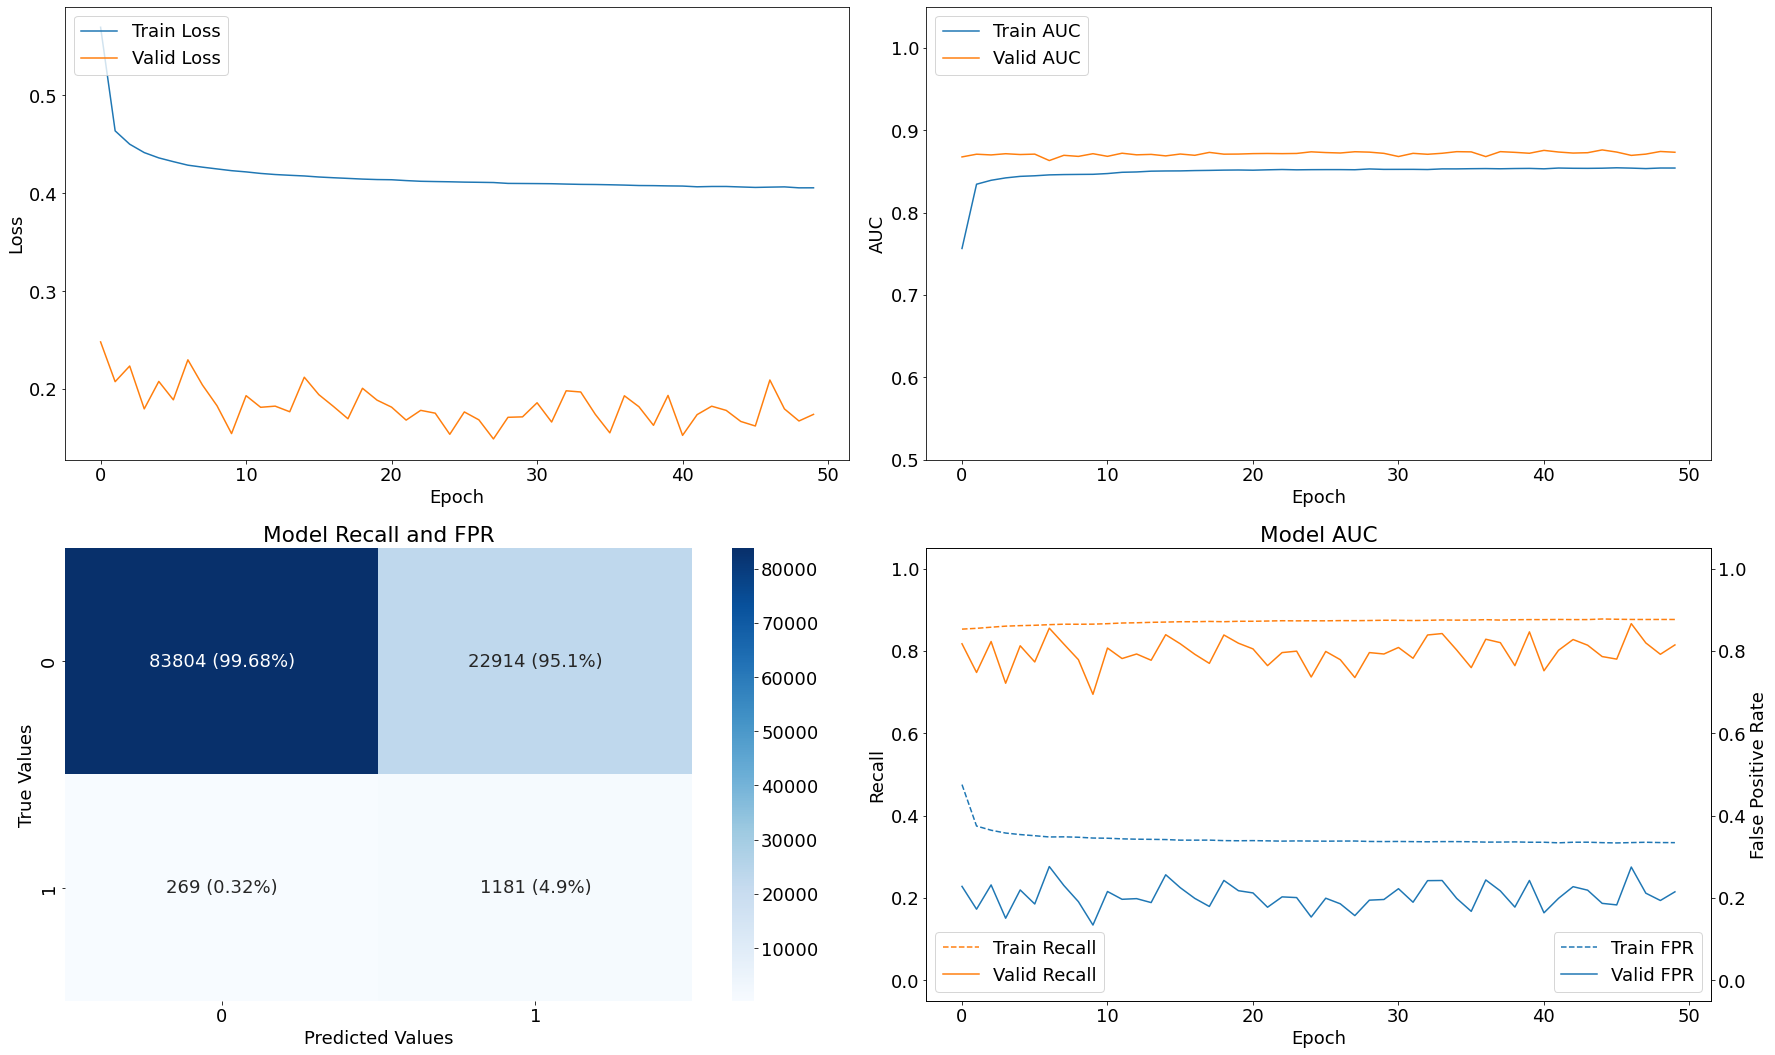

Results for Base Model V8 with threshold = 0.1.


D:\Flatiron\Fraud_Capstone\functions.py:107: RuntimeWarning: invalid value encountered in longlong_scalars
  percentages = [(cm_df[0][0]/sum(cm_df[0])).round(4),
D:\Flatiron\Fraud_Capstone\functions.py:109: RuntimeWarning: invalid value encountered in longlong_scalars
  (cm_df[0][1]/sum(cm_df[0])).round(4),



 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


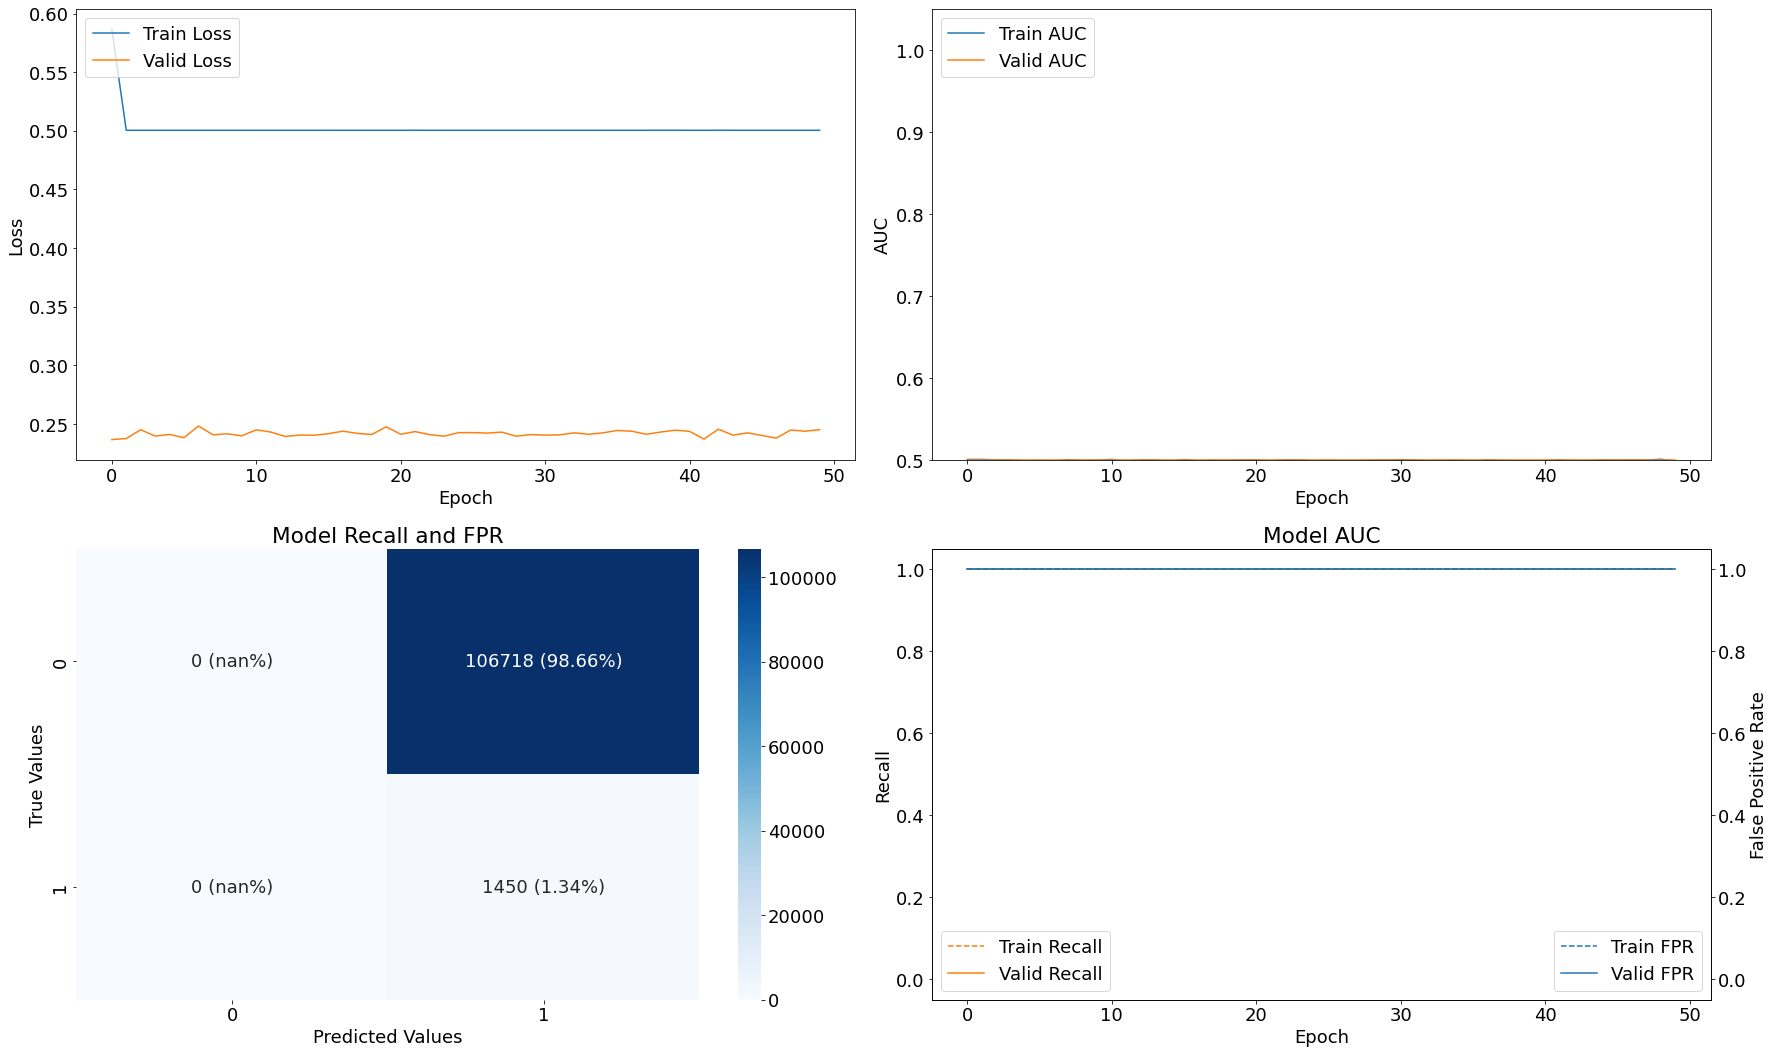

In [91]:
for t in thresholds: 
    
    modelling_v8(X_train_base_scaled_resampled,
                 y_train_base_resampled,
                 X_val_base_scaled,
                 y_val_base,
                'Base Model V8',
                 threshold=t)

In [92]:
def modelling_v9(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    model_v9 = models.Sequential()

    model_v9.add(layers.Input(shape=(n_features, )))
    model_v9.add(layers.Dense(32, activation='relu'))
    model_v9.add(layers.Dropout(0.5))
    model_v9.add(layers.Dense(16, activation='relu'))
    model_v9.add(layers.Dropout(0.5))
    model_v9.add(layers.Dense(8, activation='relu'))
    model_v9.add(layers.Dropout(0.5))
    model_v9.add(layers.Dense(4, activation='relu'))
    model_v9.add(layers.Dense(2, activation='relu'))
    model_v9.add(layers.Dense(1, activation='sigmoid'))

    model_v9.compile(optimizer='RMSprop',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v9_history = model_v9.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v9,
             name,
             model_v9_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00006: early stopping
Results for Base Model V9 with threshold = 0.5.

 Train f1: 0.6937764972853688 
 Val f1: 0.1772210614943842 

 Train Recall: 0.6772440671920776 
 Val Recall: 0.5268965363502502 

 Train FPR: 0.06877400726079941 
 Val FPR: 0.06004610285162926


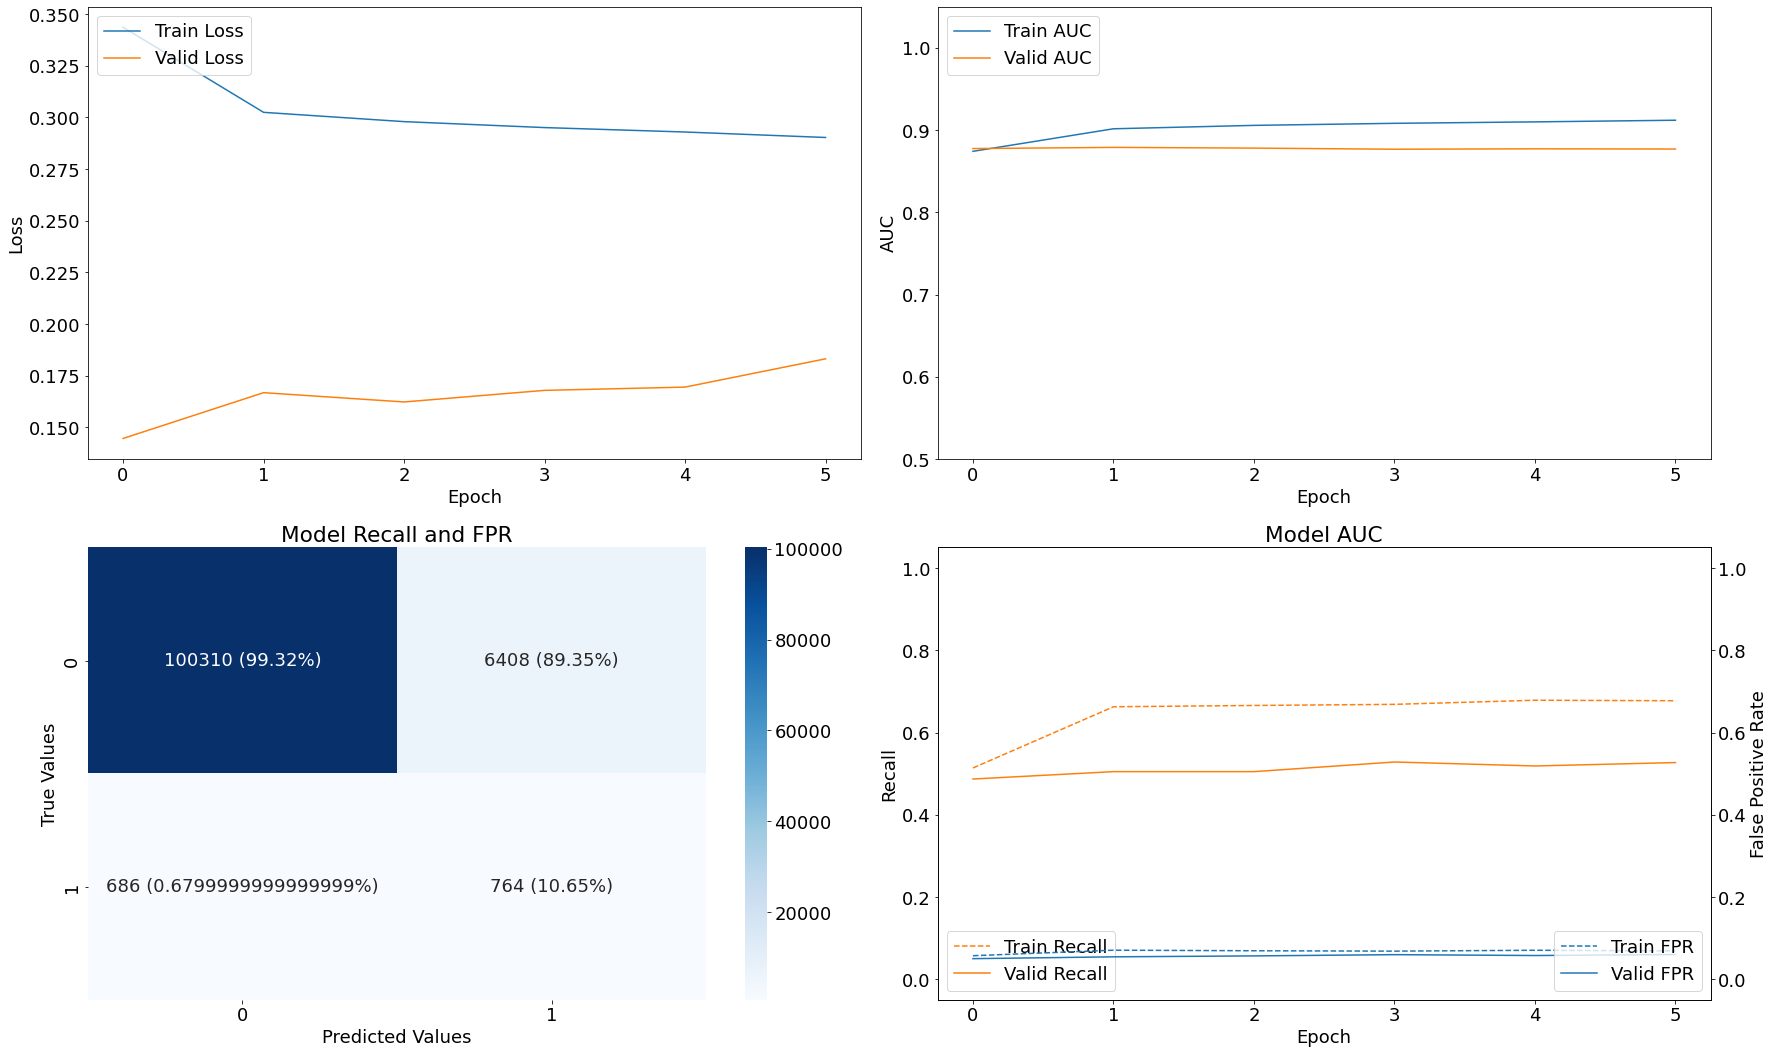

Epoch 00015: early stopping
Results for Base Model V9 with threshold = 0.4.

 Train f1: 0.6900014811660088 
 Val f1: 0.16883922599998016 

 Train Recall: 0.7369769811630249 
 Val Recall: 0.5627586245536804 

 Train FPR: 0.0997956395149231 
 Val FPR: 0.06934162974357605


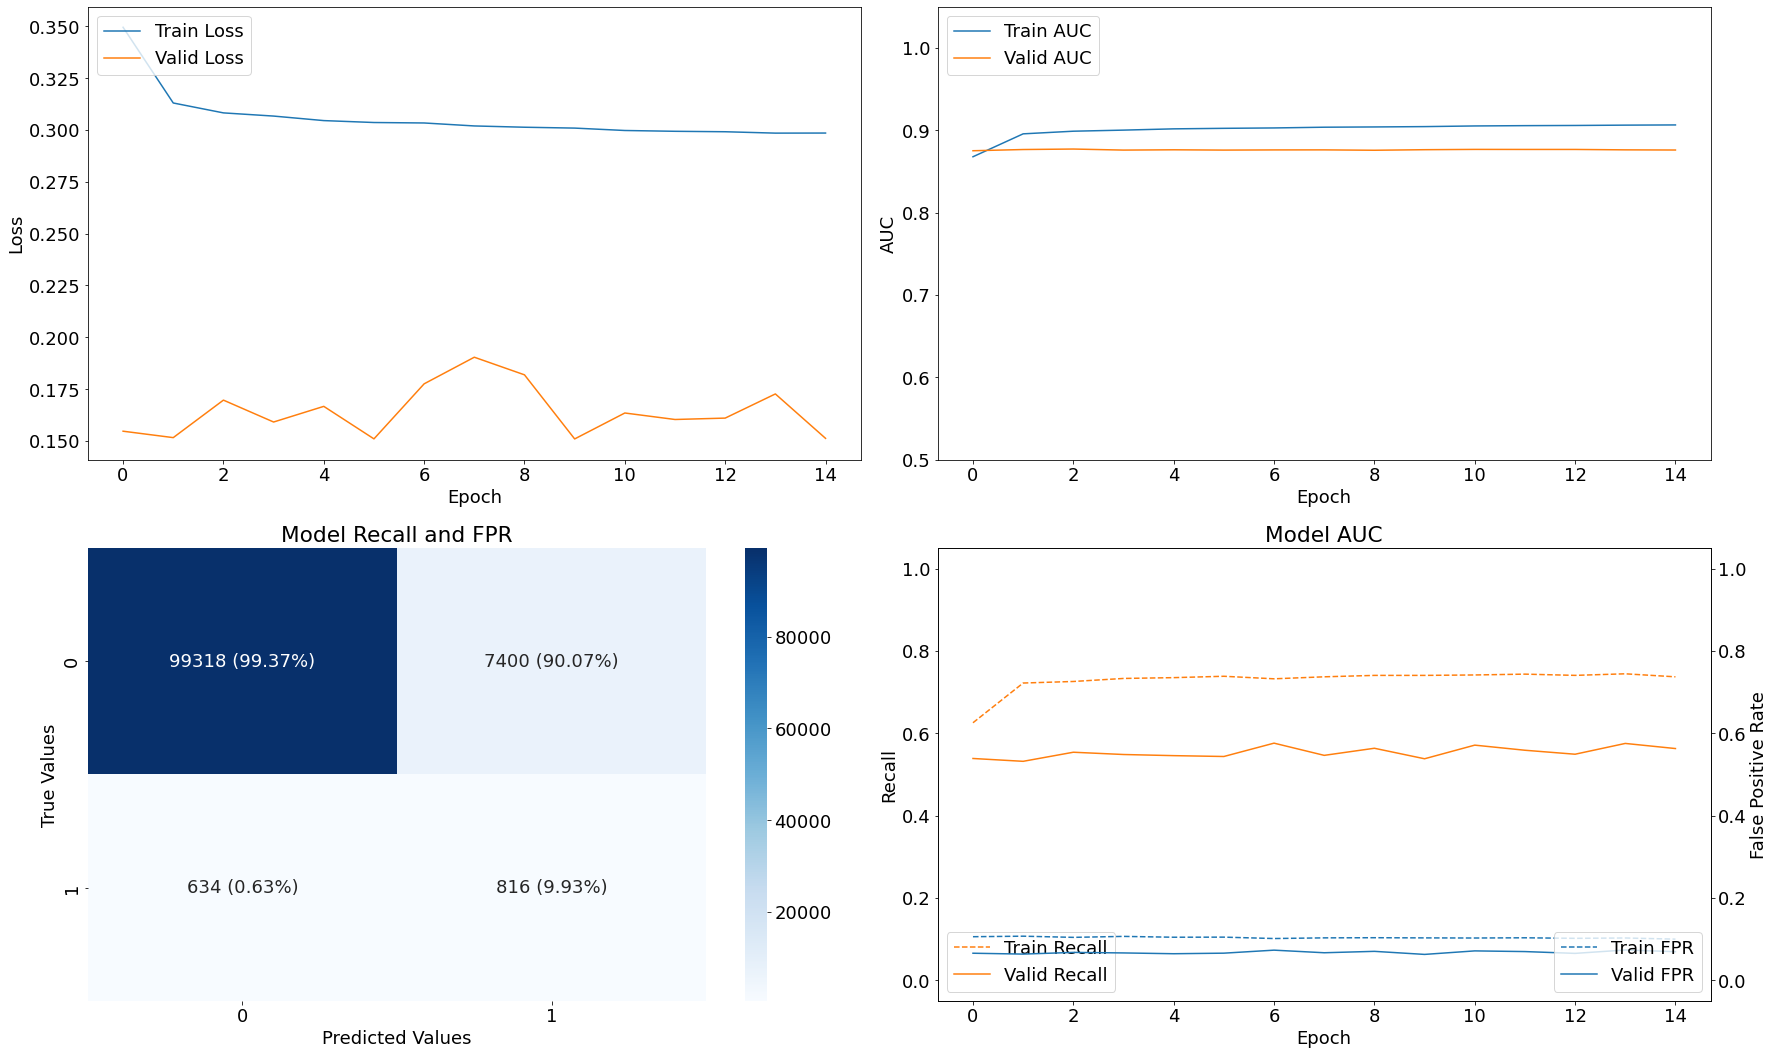

Epoch 00008: early stopping
Results for Base Model V9 with threshold = 0.3.

 Train f1: 0.6812322956679595 
 Val f1: 0.080043680944915 

 Train Recall: 0.8339882493019104 
 Val Recall: 0.8593103289604187 

 Train FPR: 0.1536199301481247 
 Val FPR: 0.2664686441421509


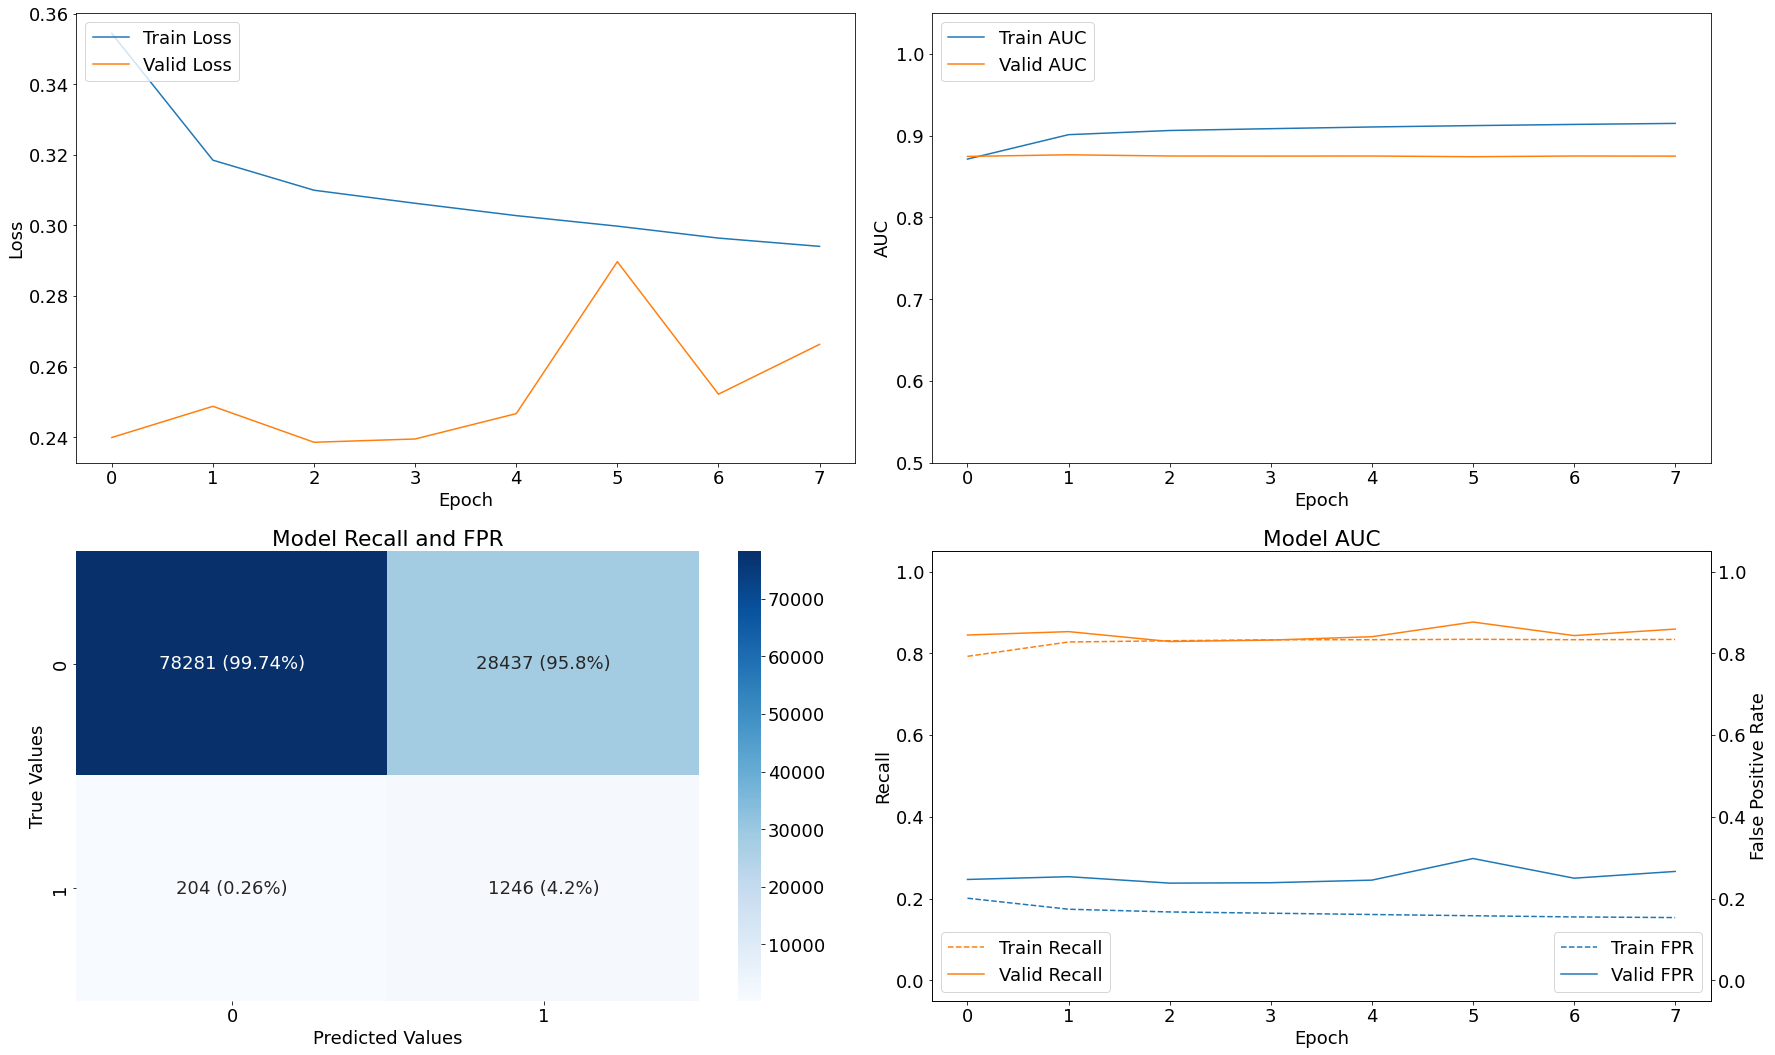

Epoch 00041: early stopping
Results for Base Model V9 with threshold = 0.2.

 Train f1: 0.6698463708584 
 Val f1: 0.13444670124743846 

 Train Recall: 0.8249749541282654 
 Val Recall: 0.660689651966095 

 Train FPR: 0.1595499962568283 
 Val FPR: 0.11097472161054611


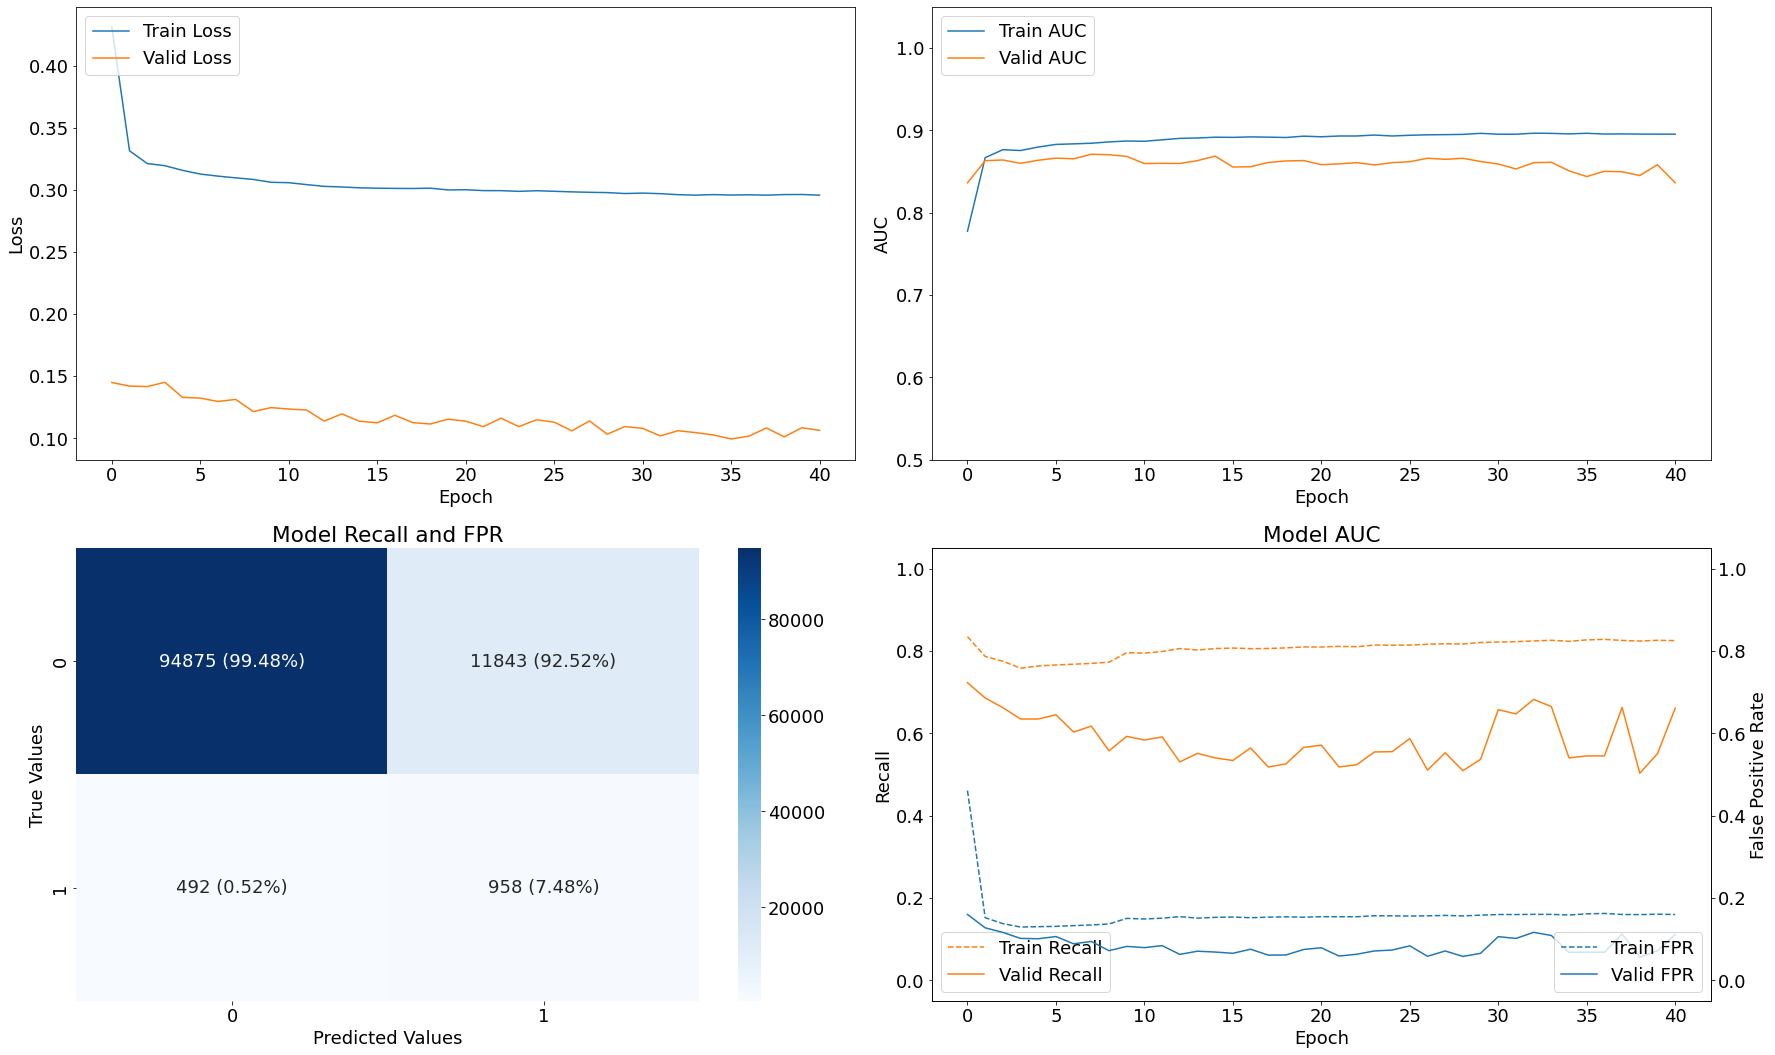

Epoch 00017: early stopping
Results for Base Model V9 with threshold = 0.1.

 Train f1: 0.5911406381236549 
 Val f1: 0.06900023619717216 

 Train Recall: 0.9311571717262268 
 Val Recall: 0.8979310393333435 

 Train FPR: 0.3048035204410553 
 Val FPR: 0.32784533500671387


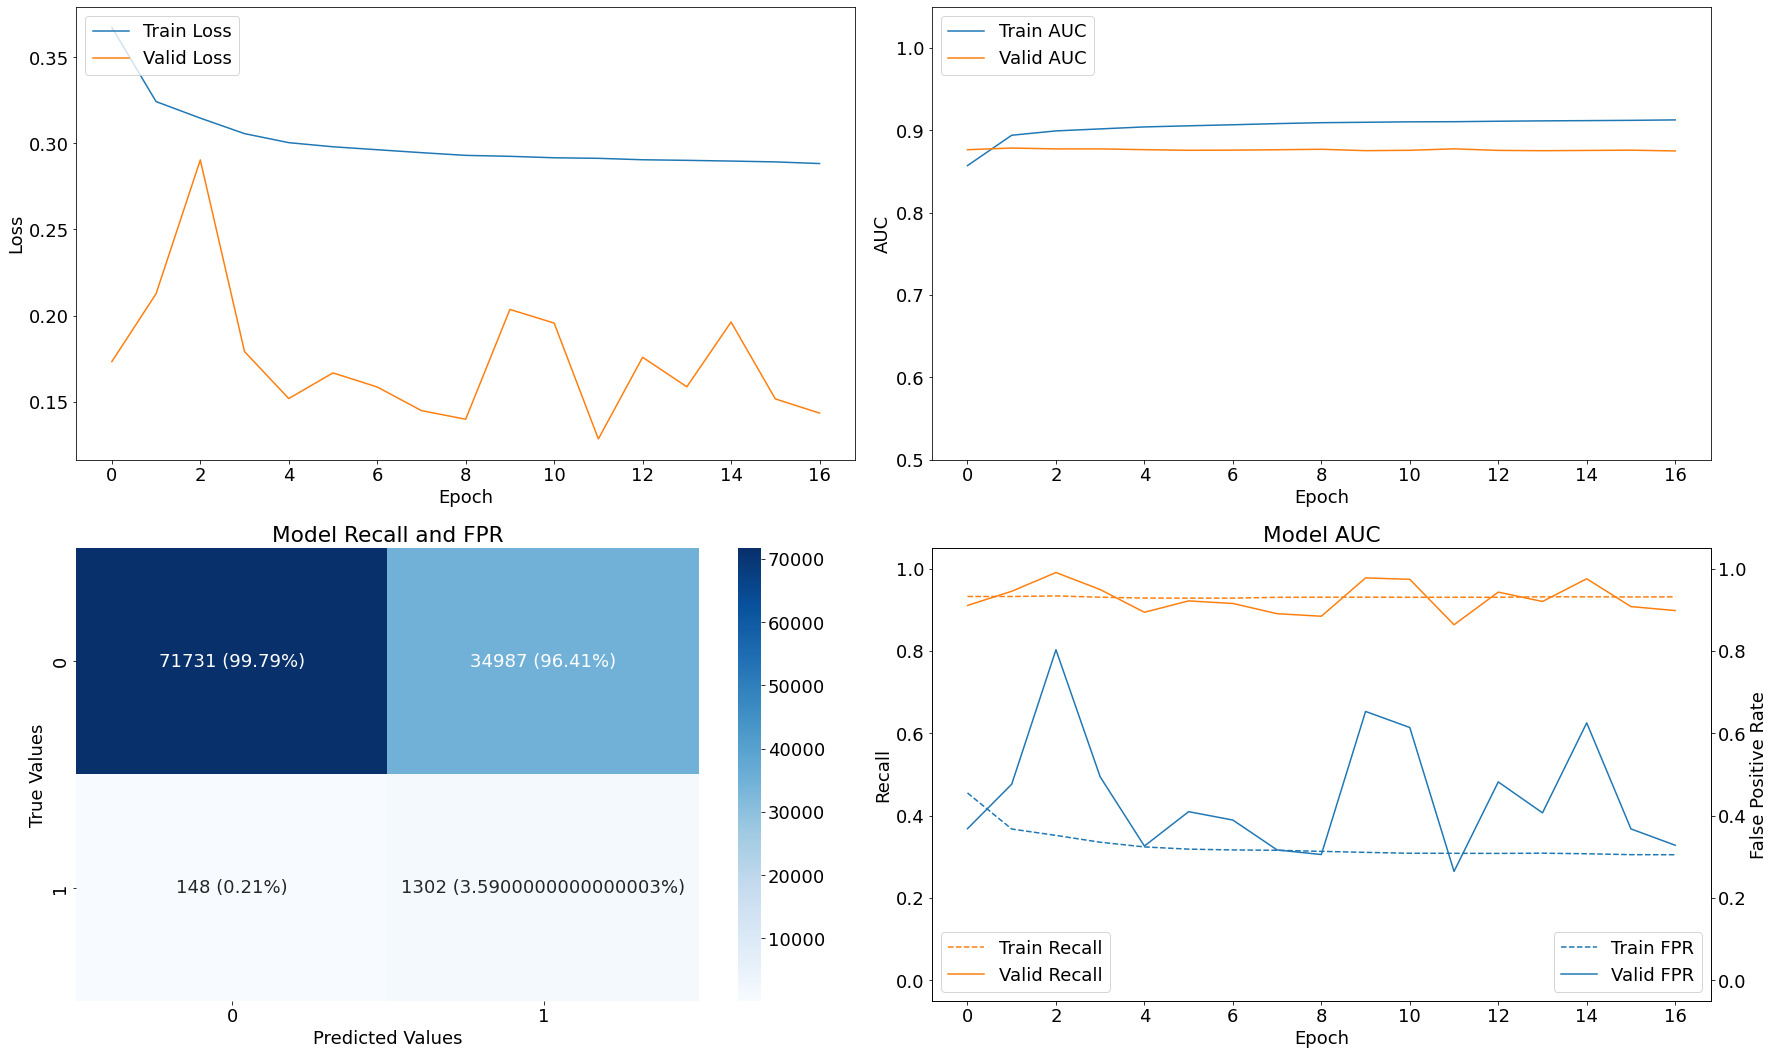

In [93]:
for t in thresholds:

    modelling_v9(X_train_base_scaled_resampled,
                 y_train_base_resampled,
                 X_val_base_scaled,
                 y_val_base,
                'Base Model V9',
                 threshold=t)

In [94]:
Xc_train_base_scaled_resampled = \
pd.read_csv('Data/base/Xc_train_base_scaled_resampled.csv')
Xc_val_base_scaled = pd.read_csv('Data/base/Xc_val_base_scaled.csv')

In [95]:
cross_n_features = Xc_train_base_scaled_resampled.shape[1]

In [96]:
def cross_modelling_v1(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    cross_model_v1 = models.Sequential()

    cross_model_v1.add(layers.Input(shape=(cross_n_features, )))
    cross_model_v1.add(layers.Dense(128, activation='relu'))
    cross_model_v1.add(layers.Dropout(0.5))
    cross_model_v1.add(layers.Dense(64, activation='relu'))
    cross_model_v1.add(layers.Dropout(0.5))
    cross_model_v1.add(layers.Dense(1, activation='sigmoid'))

    cross_model_v1.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['AUC',
                                    tf.keras.metrics.Precision(thresholds=threshold),
                                    tf.keras.metrics.Recall(thresholds=threshold),
                                    FalsePositiveRate(threshold=threshold)])

    cross_model_v1_history = cross_model_v1.fit(X_train,
                                                y_train,
                                                batch_size=batch_size,
                                                validation_data=(X_val, y_val),
                                                class_weight=class_weight,
                                                epochs=epochs,
                                                callbacks=[early_stop],
                                                verbose=0).history
    
    evaluate(cross_model_v1,
             name, 
             cross_model_v1_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00037: early stopping
Results for Cross Feature Model V1 with threshold = 0.5.

 Train f1: 0.8574007488258837 
 Val f1: 0.054794519792290525 

 Train Recall: 0.8064603209495544 
 Val Recall: 0.033103447407484055 

 Train FPR: 0.018678558990359306 
 Val FPR: 0.0023801045026630163


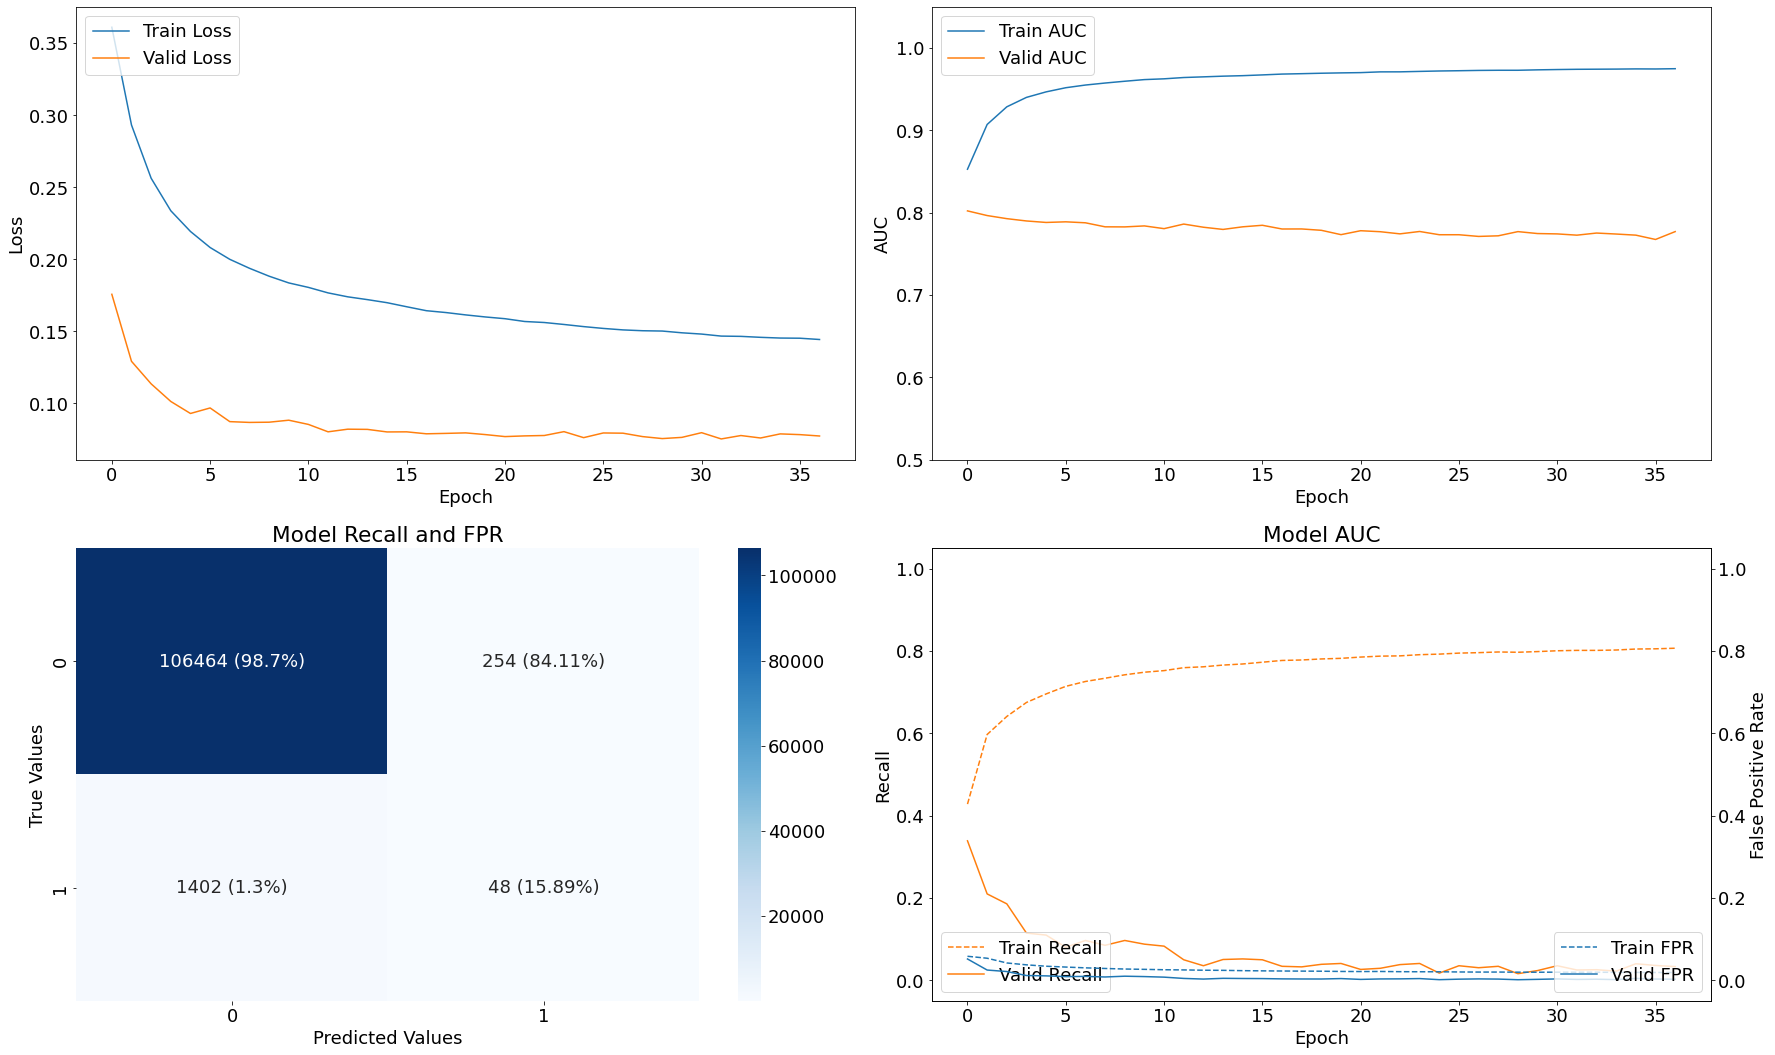

Epoch 00029: early stopping
Results for Cross Feature Model V1 with threshold = 0.4.

 Train f1: 0.8541665618968542 
 Val f1: 0.0997001487895536 

 Train Recall: 0.8347305059432983 
 Val Recall: 0.09172413498163223 

 Train FPR: 0.029940089210867882 
 Val FPR: 0.010166982188820839


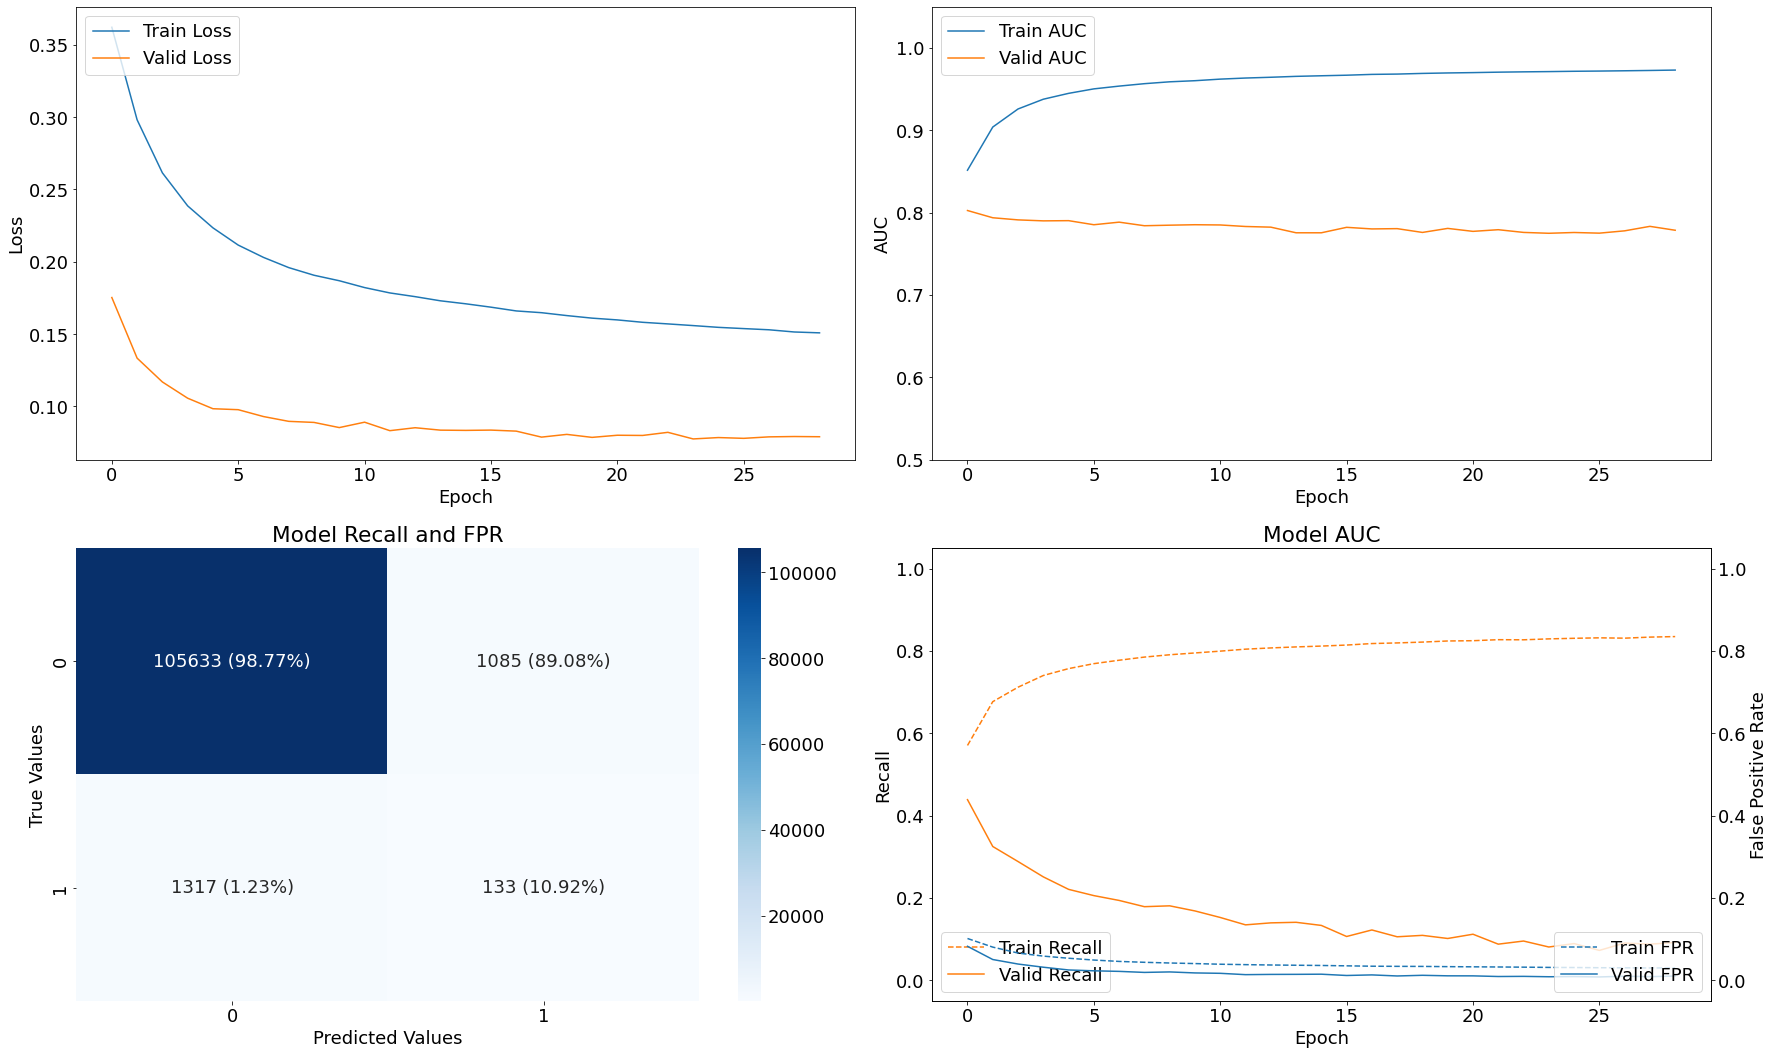

Epoch 00033: early stopping
Results for Cross Feature Model V1 with threshold = 0.3.

 Train f1: 0.8547376289347328 
 Val f1: 0.12107748312329056 

 Train Recall: 0.8746320605278015 
 Val Recall: 0.1503448337316513 

 Train FPR: 0.04297962039709091 
 Val FPR: 0.018113158643245697


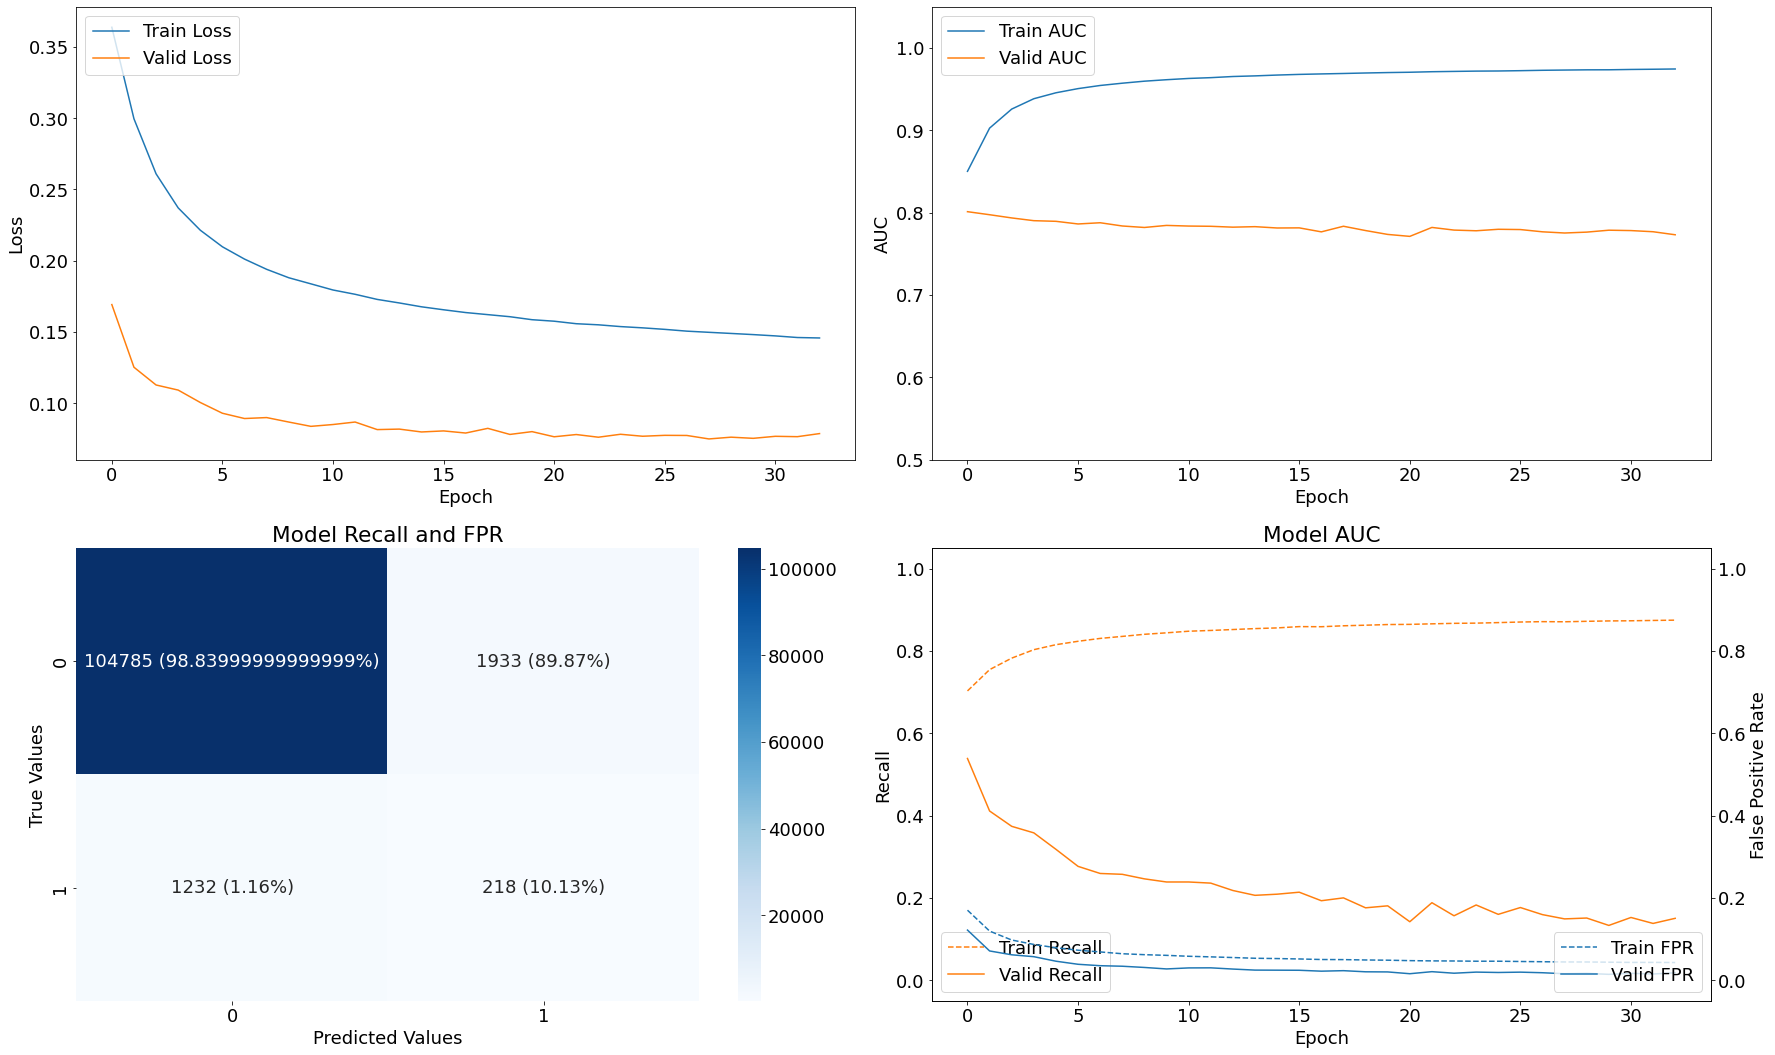

Epoch 00020: early stopping
Results for Cross Feature Model V1 with threshold = 0.2.

 Train f1: 0.812694650993482 
 Val f1: 0.13454296723785097 

 Train Recall: 0.9040969014167786 
 Val Recall: 0.27103447914123535 

 Train FPR: 0.0802096500992775 
 Val FPR: 0.03747259080410004


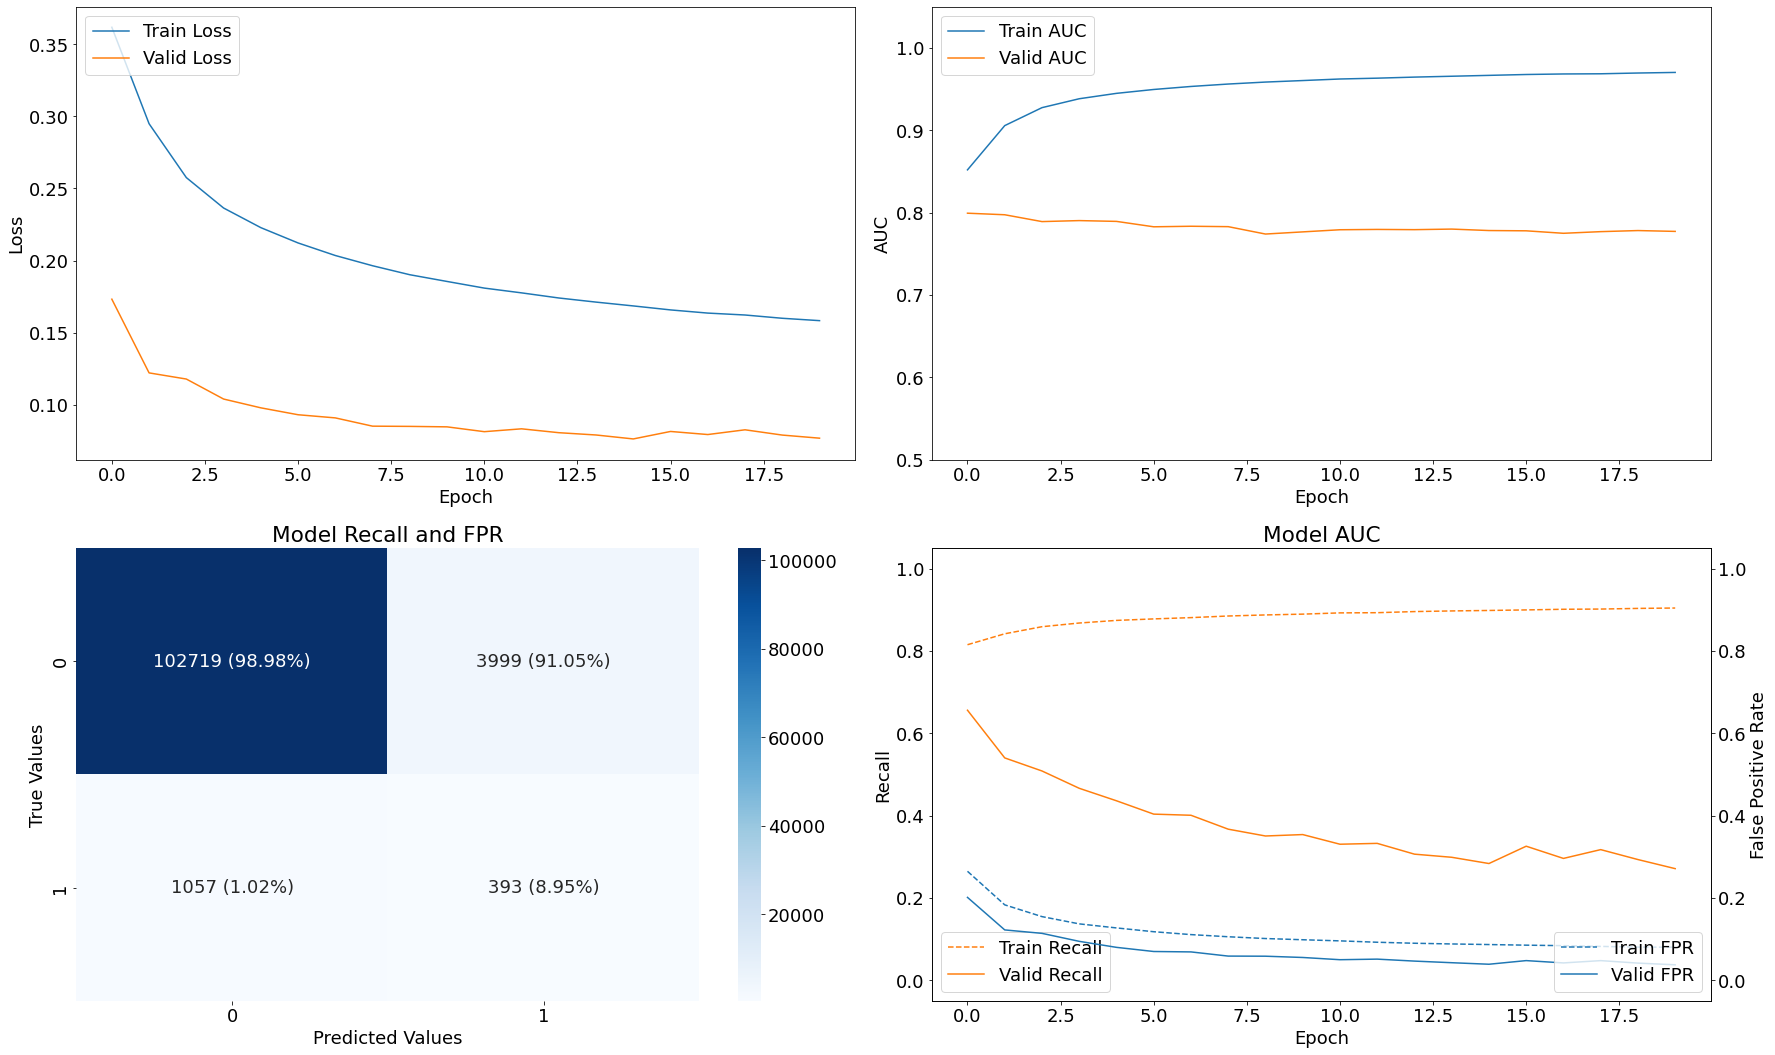

Epoch 00032: early stopping
Results for Cross Feature Model V1 with threshold = 0.1.

 Train f1: 0.7511592813012635 
 Val f1: 0.11070487546745282 

 Train Recall: 0.9490770697593689 
 Val Recall: 0.44896551966667175 

 Train FPR: 0.1444719284772873 
 Val FPR: 0.09051893651485443


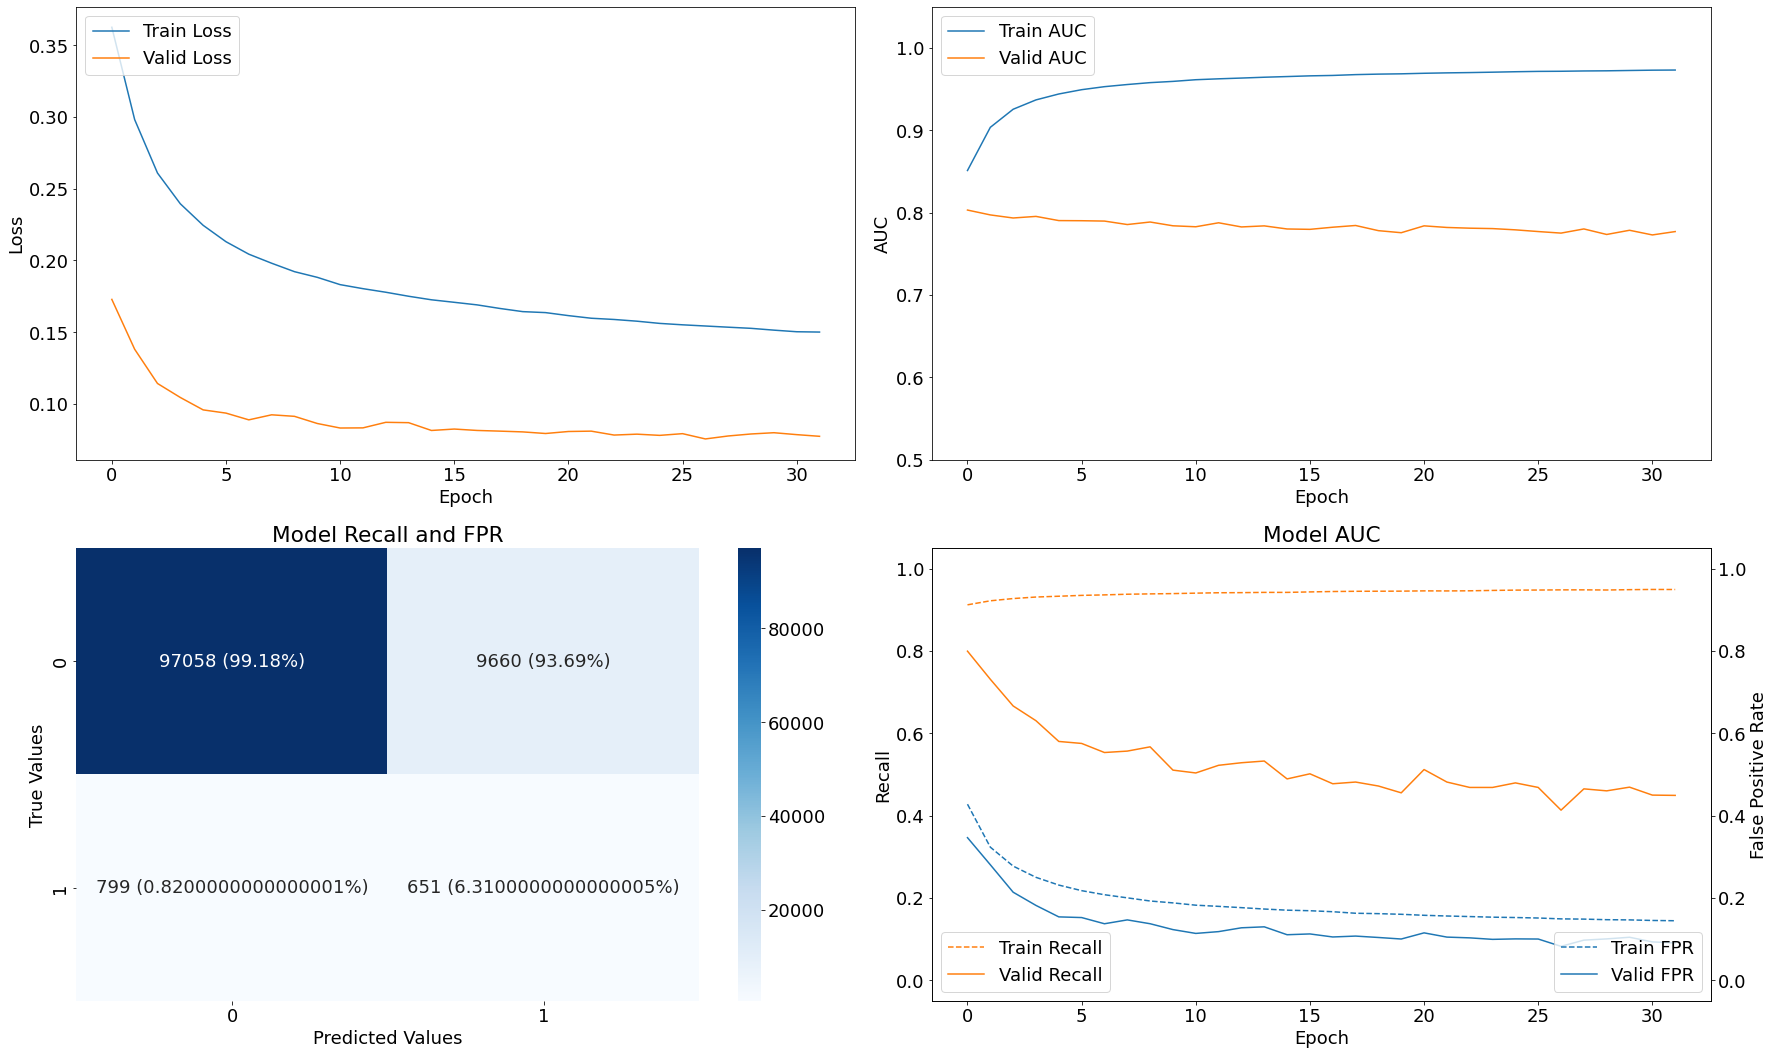

In [97]:
for t in thresholds:

    cross_modelling_v1(Xc_train_base_scaled_resampled,
                      y_train_base_resampled,
                      Xc_val_base_scaled,
                      y_val_base,
                      'Cross Feature Model V1',
                      threshold=t)

In [98]:
def cross_modelling_v2(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    cross_model_v2 = models.Sequential()

    cross_model_v2.add(layers.Input(shape=(cross_n_features, )))
    cross_model_v2.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L2()))
    cross_model_v2.add(layers.Dropout(0.5))
    cross_model_v2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2()))
    cross_model_v2.add(layers.Dropout(0.5))
    cross_model_v2.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L2()))
    cross_model_v2.add(layers.Dense(1, activation='sigmoid'))

    cross_model_v2.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['AUC',
                                    tf.keras.metrics.Precision(thresholds=threshold),
                                    tf.keras.metrics.Recall(thresholds=threshold),
                                    FalsePositiveRate(threshold=threshold)])

    cross_model_v2_history = cross_model_v2.fit(X_train,
                                                y_train,
                                                batch_size=batch_size,
                                                validation_data=(X_val, y_val),
                                                class_weight=class_weight,
                                                epochs=epochs,
                                                callbacks=[early_stop],
                                                verbose=0).history
    
    evaluate(cross_model_v2,
             name, 
             cross_model_v2_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00008: early stopping
Results for Cross Feature Model V2 with threshold = 0.5.

 Train f1: 0.46009655156923307 
 Val f1: 0.1282691512960264 

 Train Recall: 0.37084728479385376 
 Val Recall: 0.3365517258644104 

 Train FPR: 0.06029830873012543 
 Val FPR: 0.053140051662921906


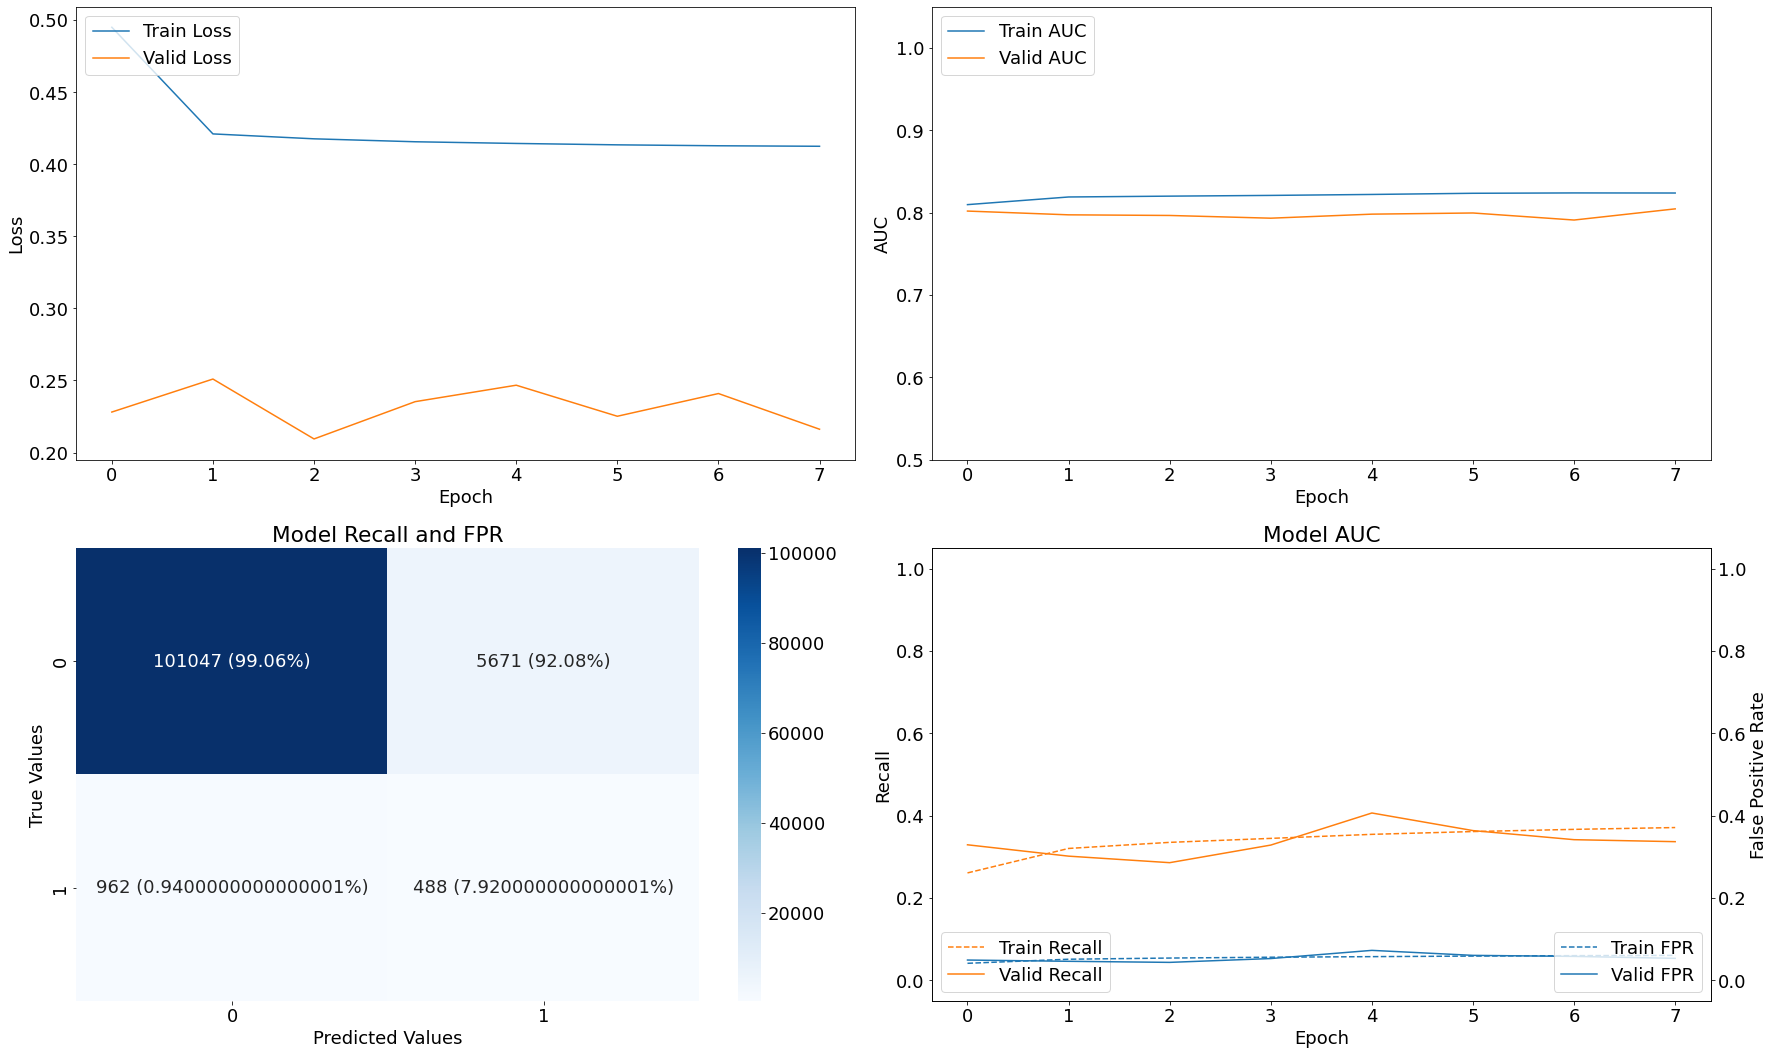

Epoch 00008: early stopping
Results for Cross Feature Model V2 with threshold = 0.4.

 Train f1: 0.5443273816692783 
 Val f1: 0.0978207643716618 

 Train Recall: 0.5434474349021912 
 Val Recall: 0.5510345101356506 

 Train FPR: 0.11332955211400986 
 Val FPR: 0.1320021003484726


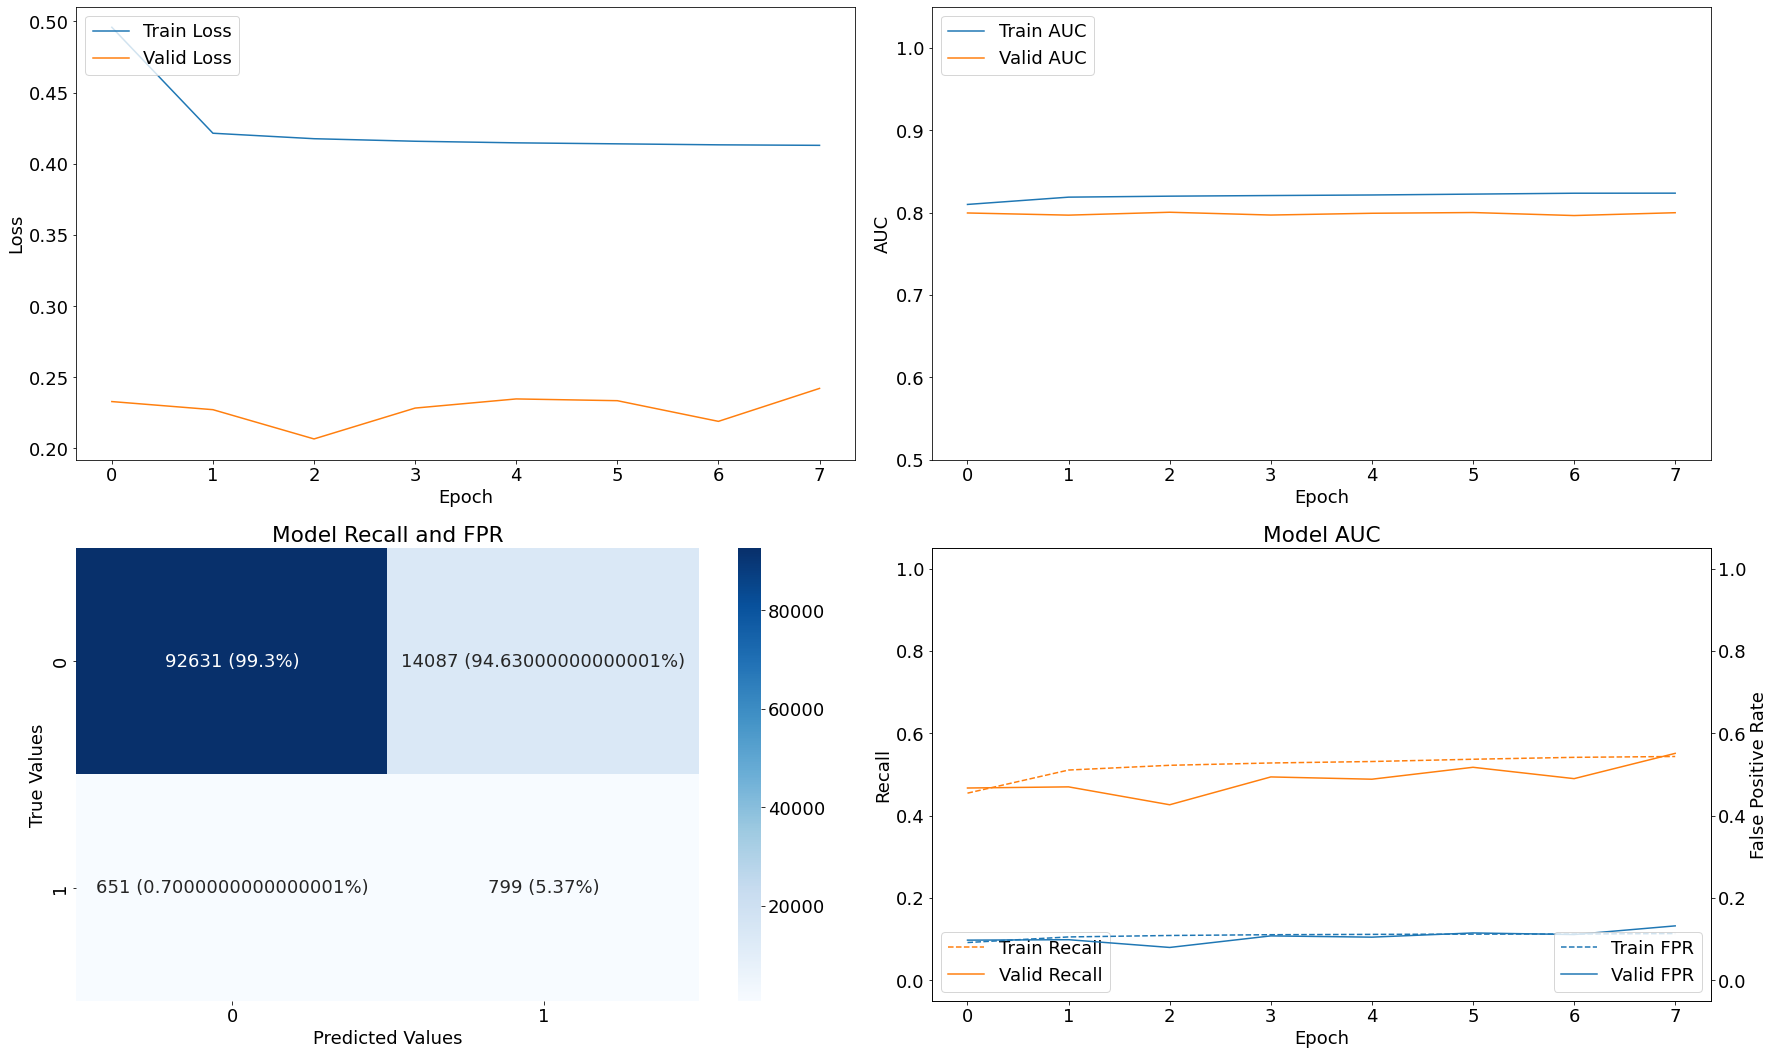

Epoch 00009: early stopping
Results for Cross Feature Model V2 with threshold = 0.3.

 Train f1: 0.5627067774709362 
 Val f1: 0.08406936397956055 

 Train Recall: 0.6713826060295105 
 Val Recall: 0.6268965601921082 

 Train FPR: 0.17871913313865662 
 Val FPR: 0.18053187429904938


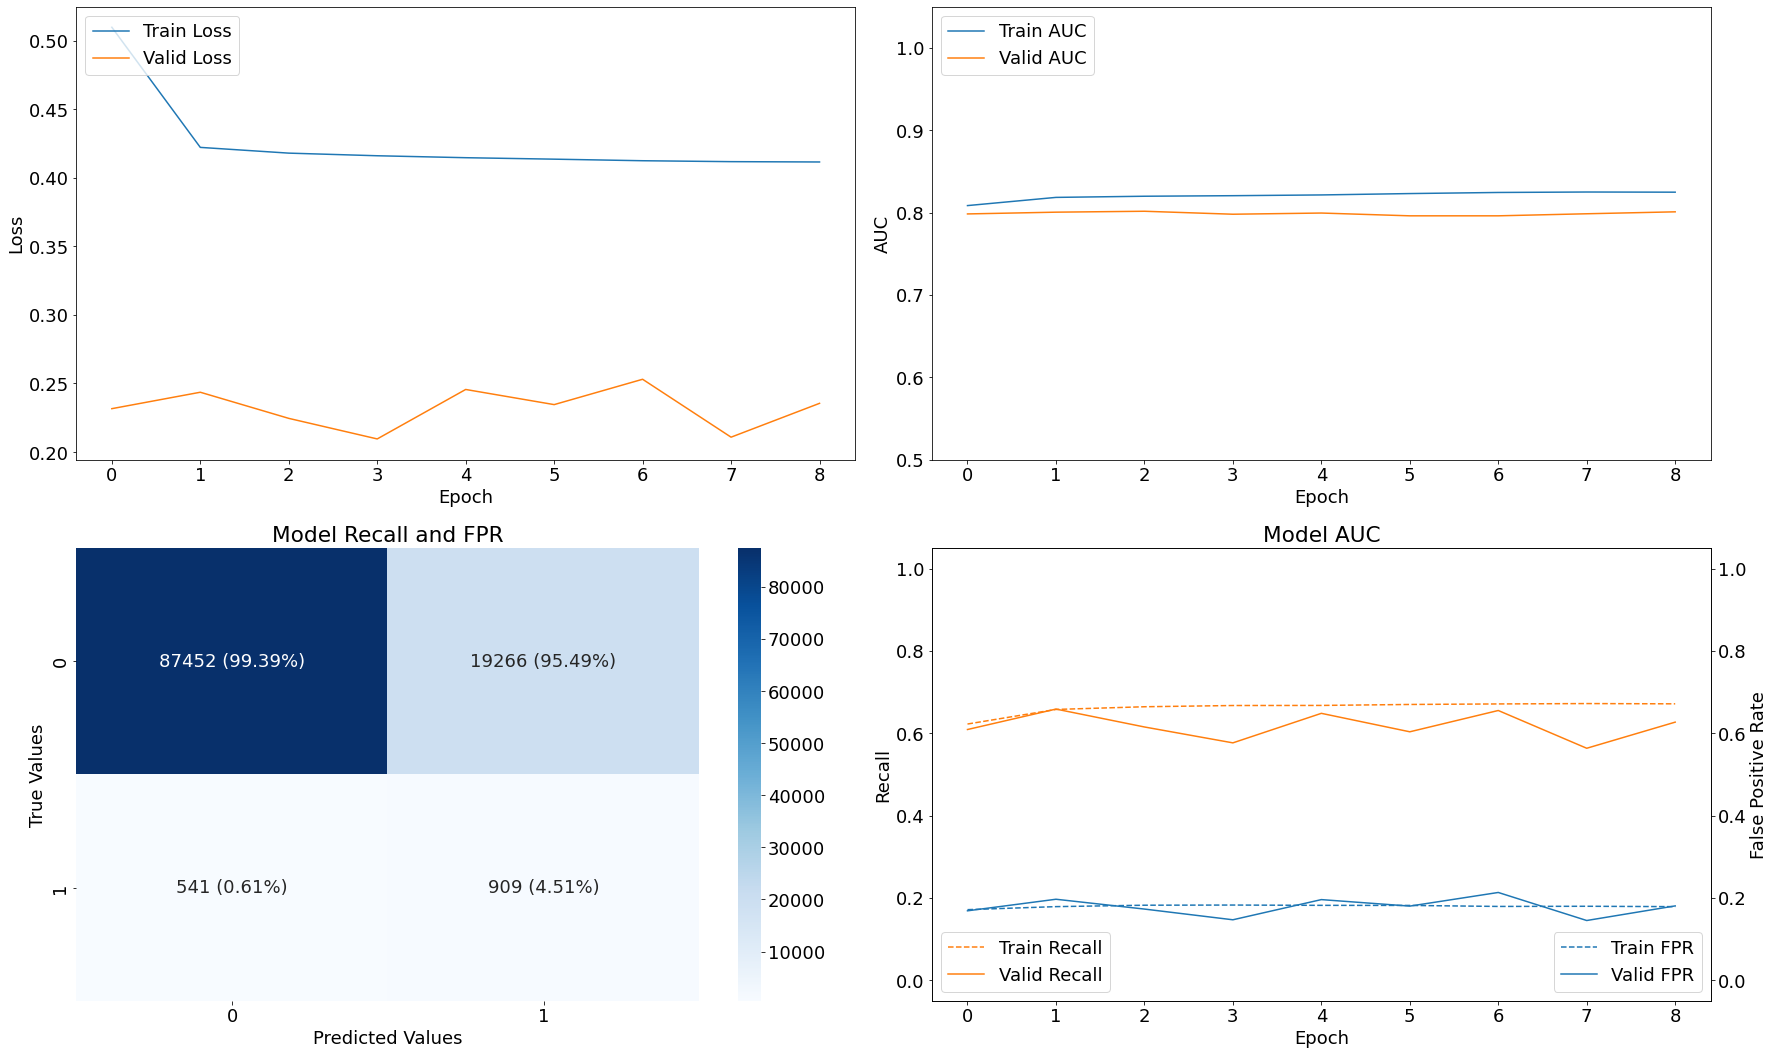

Epoch 00010: early stopping
Results for Cross Feature Model V2 with threshold = 0.2.

 Train f1: 0.5442132903889894 
 Val f1: 0.0624613464177895 

 Train Recall: 0.7792932987213135 
 Val Recall: 0.7662069201469421 

 Train FPR: 0.27115747332572937 
 Val FPR: 0.3093479871749878


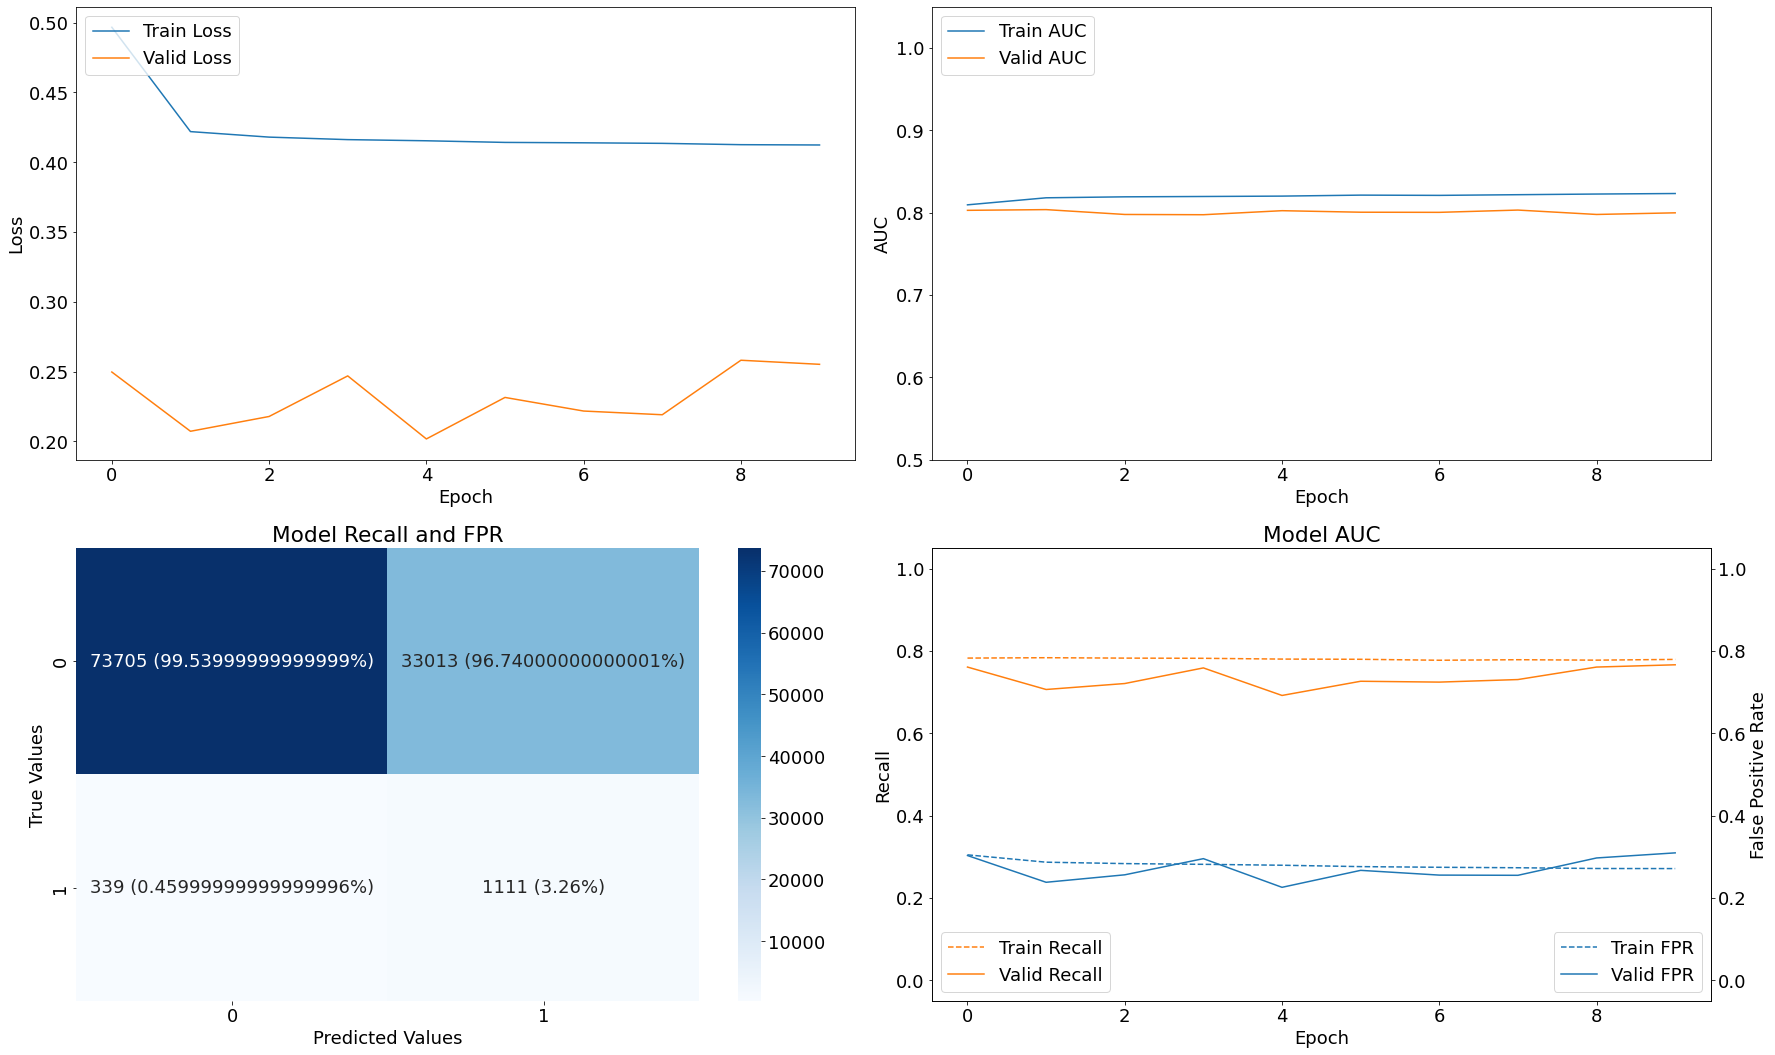

Epoch 00013: early stopping
Results for Cross Feature Model V2 with threshold = 0.1.

 Train f1: 0.49083650682568447 
 Val f1: 0.05095727776159457 

 Train Recall: 0.8866854310035706 
 Val Recall: 0.8406896591186523 

 Train FPR: 0.43156659603118896 
 Val FPR: 0.42331191897392273


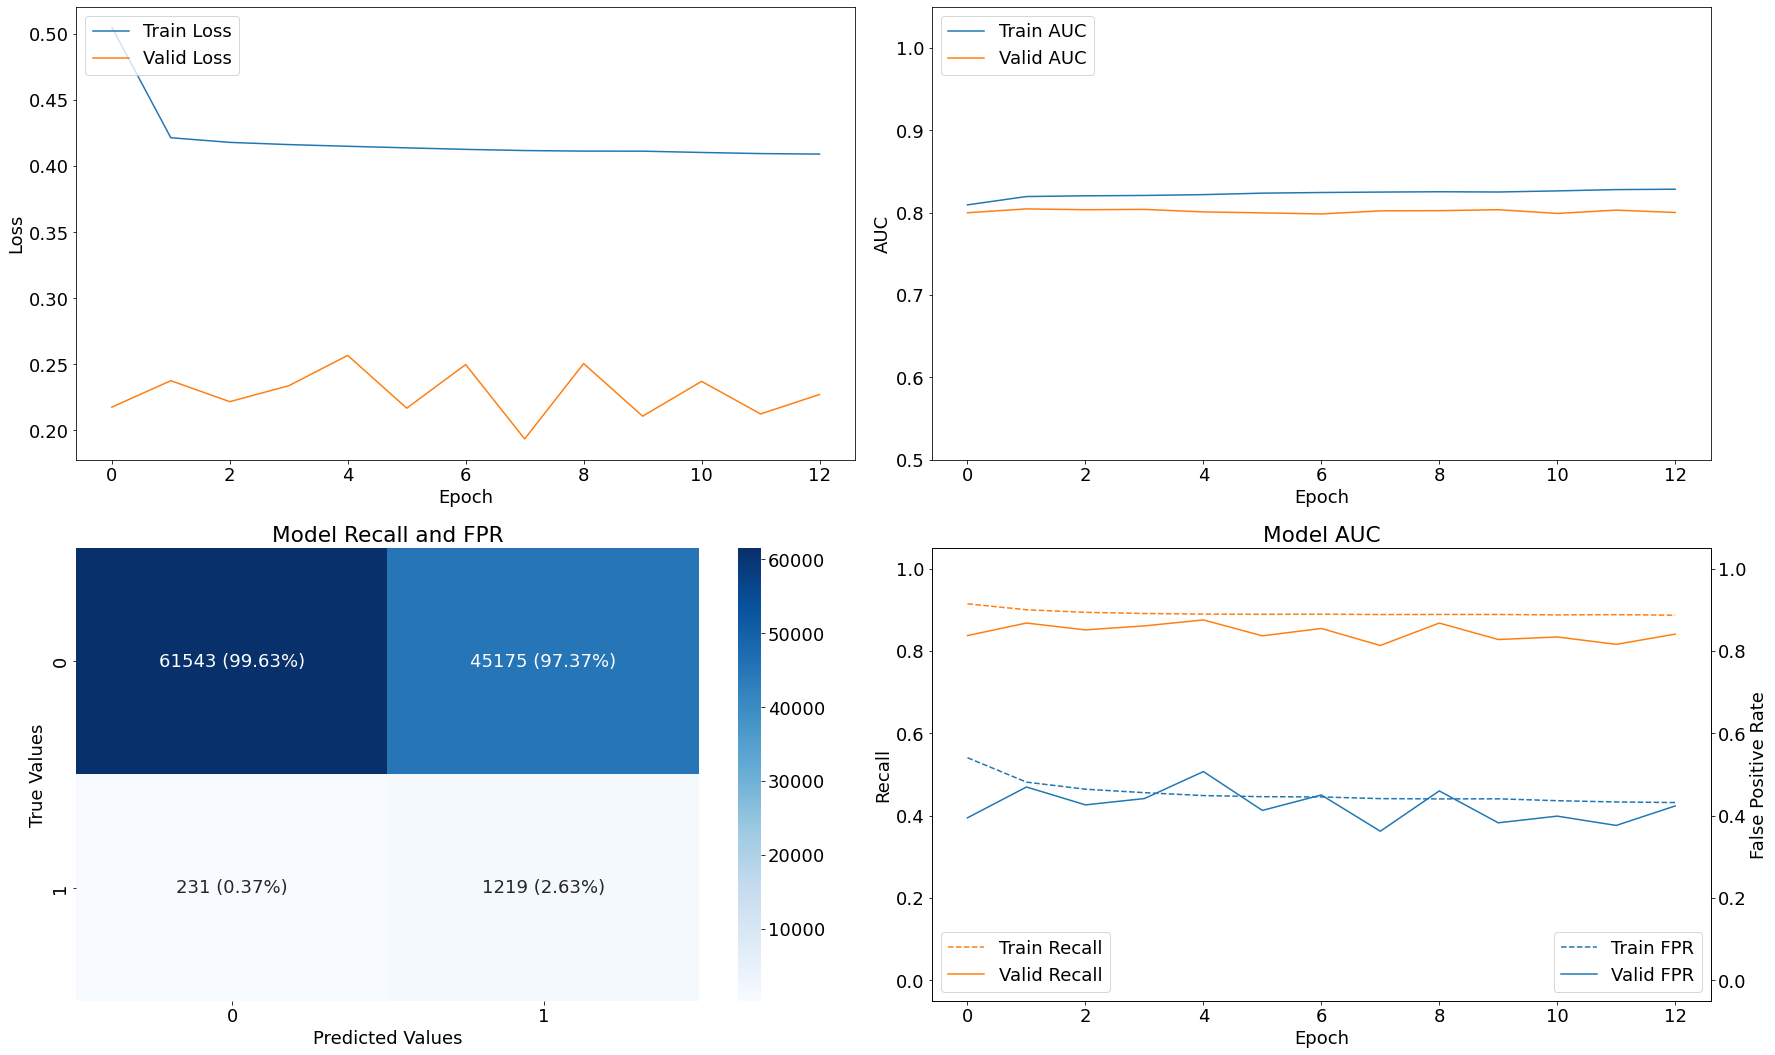

In [99]:
for t in thresholds:

    cross_modelling_v2(Xc_train_base_scaled_resampled,
                      y_train_base_resampled,
                      Xc_val_base_scaled,
                      y_val_base,
                      'Cross Feature Model V2',
                       threshold=t)

In [100]:
def cross_modelling_v3(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    
    cross_model_v3 = models.Sequential()

    cross_model_v3.add(layers.Input(shape=(cross_n_features, )))
    cross_model_v3.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L2()))
    cross_model_v3.add(layers.Dropout(0.5))
    cross_model_v3.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2()))
    cross_model_v3.add(layers.Dropout(0.5))
    cross_model_v3.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L2()))
    cross_model_v3.add(layers.Dropout(0.5))
    cross_model_v3.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.L2()))
    cross_model_v3.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.L2()))
    cross_model_v3.add(layers.Dense(1, activation='sigmoid'))

    cross_model_v3.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['AUC',
                                    tf.keras.metrics.Precision(thresholds=threshold),
                                    tf.keras.metrics.Recall(thresholds=threshold),
                                    FalsePositiveRate(threshold=threshold)])

    cross_model_v3_history = cross_model_v3.fit(X_train,
                                                y_train,
                                                batch_size=batch_size,
                                                validation_data=(X_val, y_val),
                                                class_weight=class_weight,
                                                epochs=epochs,
                                                callbacks=[early_stop],
                                                verbose=0).history
    
    evaluate(cross_model_v3,
             name, 
             cross_model_v3_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00012: early stopping
Results for Cross Feature Model V3 with threshold = 0.5.

 Train f1: 0.45241156699039753 
 Val f1: 0.12423679652133042 

 Train Recall: 0.3621898293495178 
 Val Recall: 0.32275861501693726 

 Train FPR: 0.05974037945270538 
 Val FPR: 0.052624672651290894


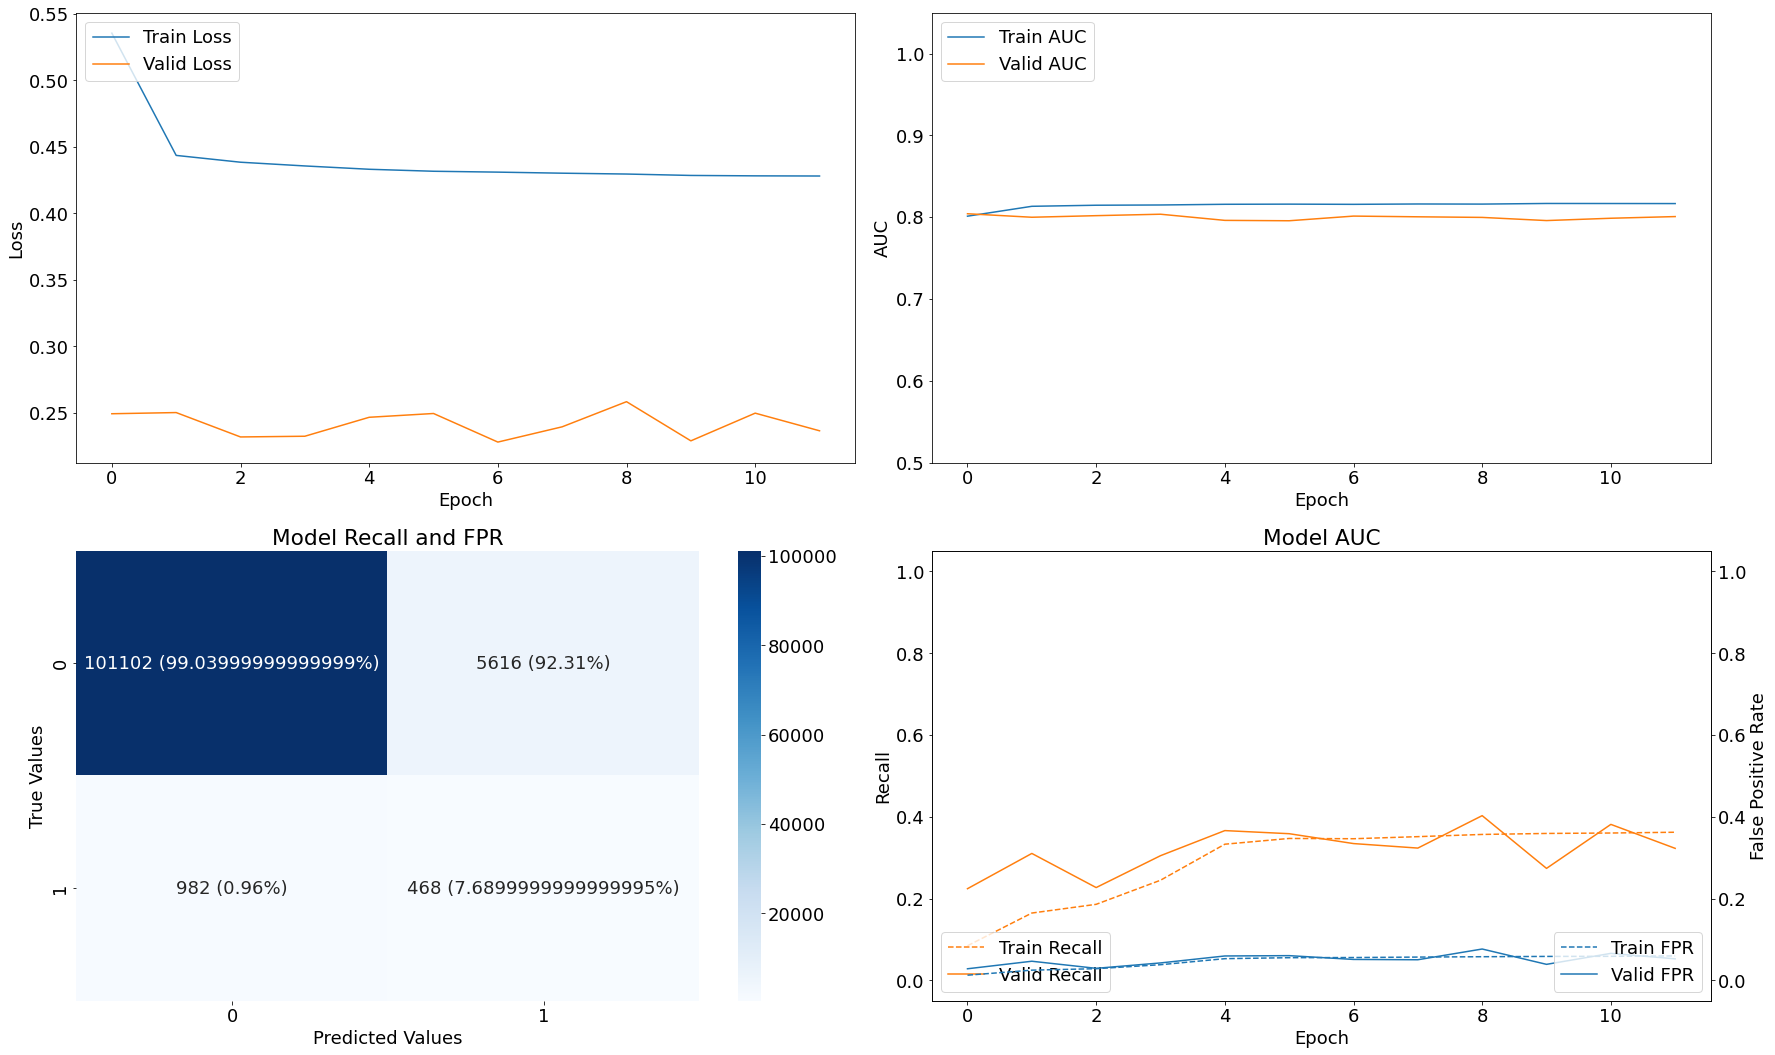

Epoch 00014: early stopping
Results for Cross Feature Model V3 with threshold = 0.4.

 Train f1: 0.540554163814143 
 Val f1: 0.10379782948789358 

 Train Recall: 0.5456791520118713 
 Val Recall: 0.5013793110847473 

 Train FPR: 0.11832041293382645 
 Val FPR: 0.11086226999759674


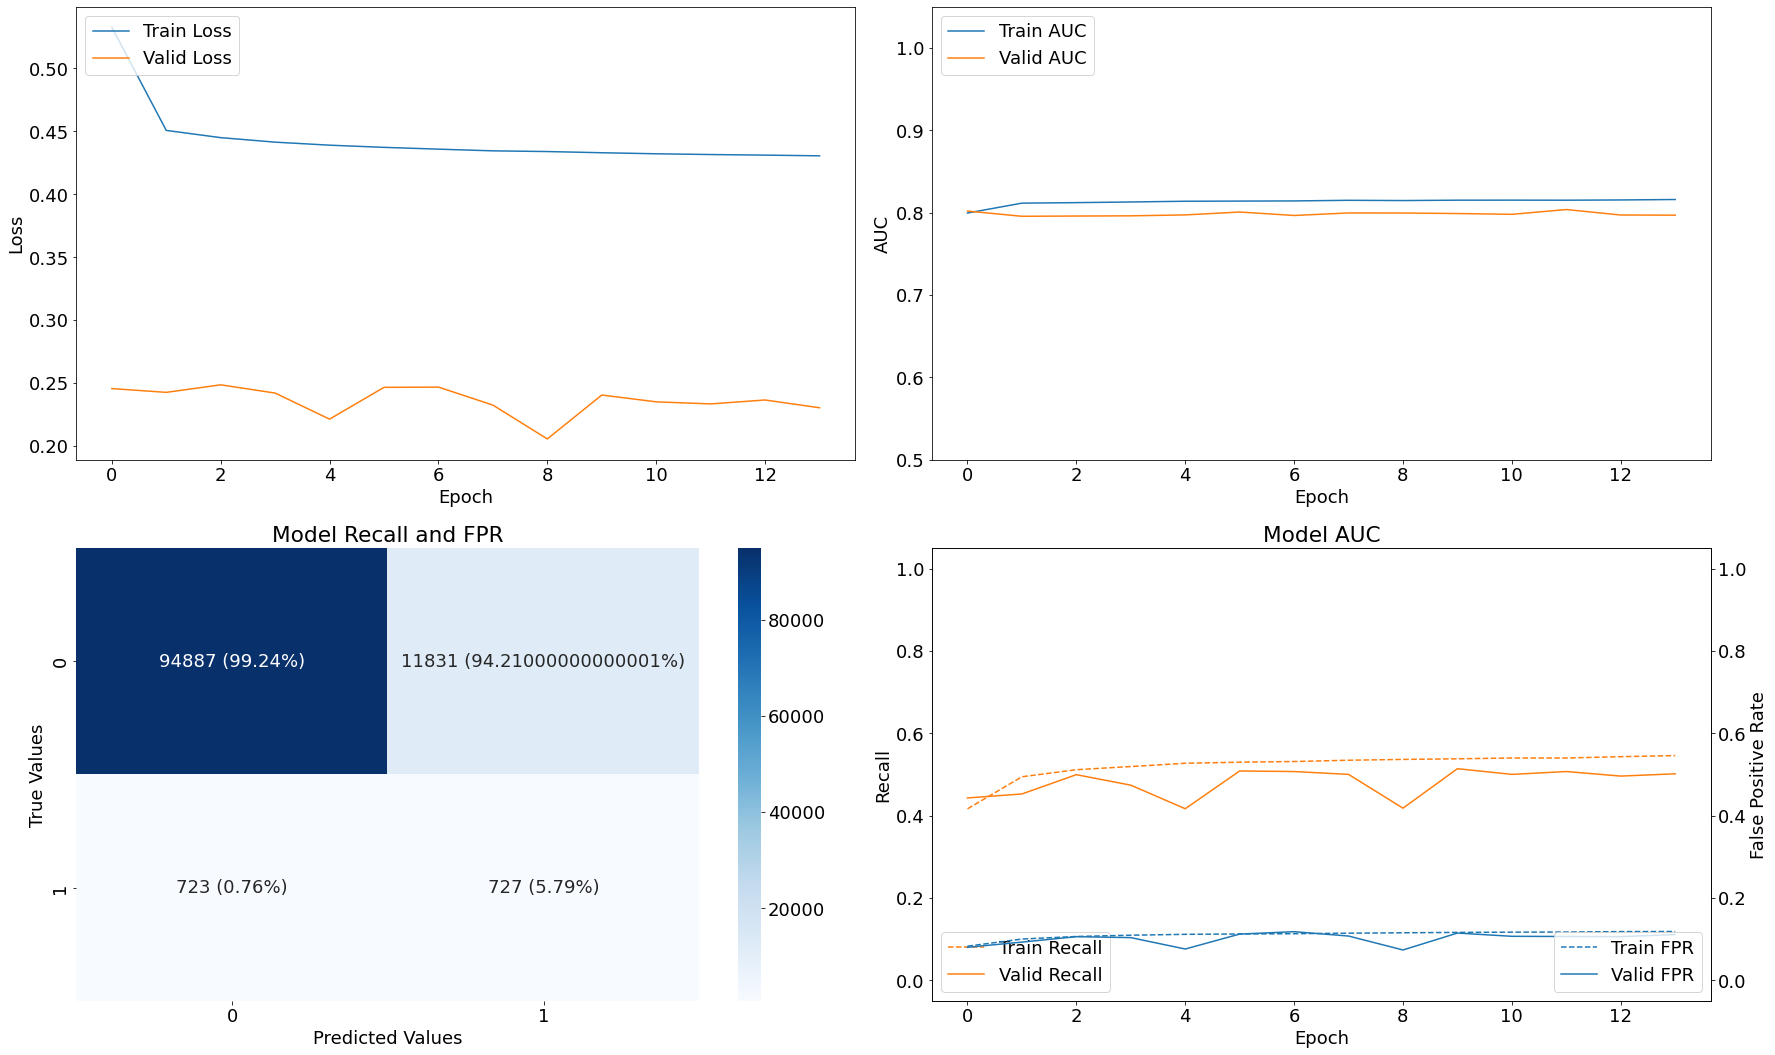

Epoch 00008: early stopping
Results for Cross Feature Model V3 with threshold = 0.3.

 Train f1: 0.5527625781911709 
 Val f1: 0.08167410080667889 

 Train Recall: 0.6714690327644348 
 Val Recall: 0.6379310488700867 

 Train FPR: 0.1895078718662262 
 Val FPR: 0.18999606370925903


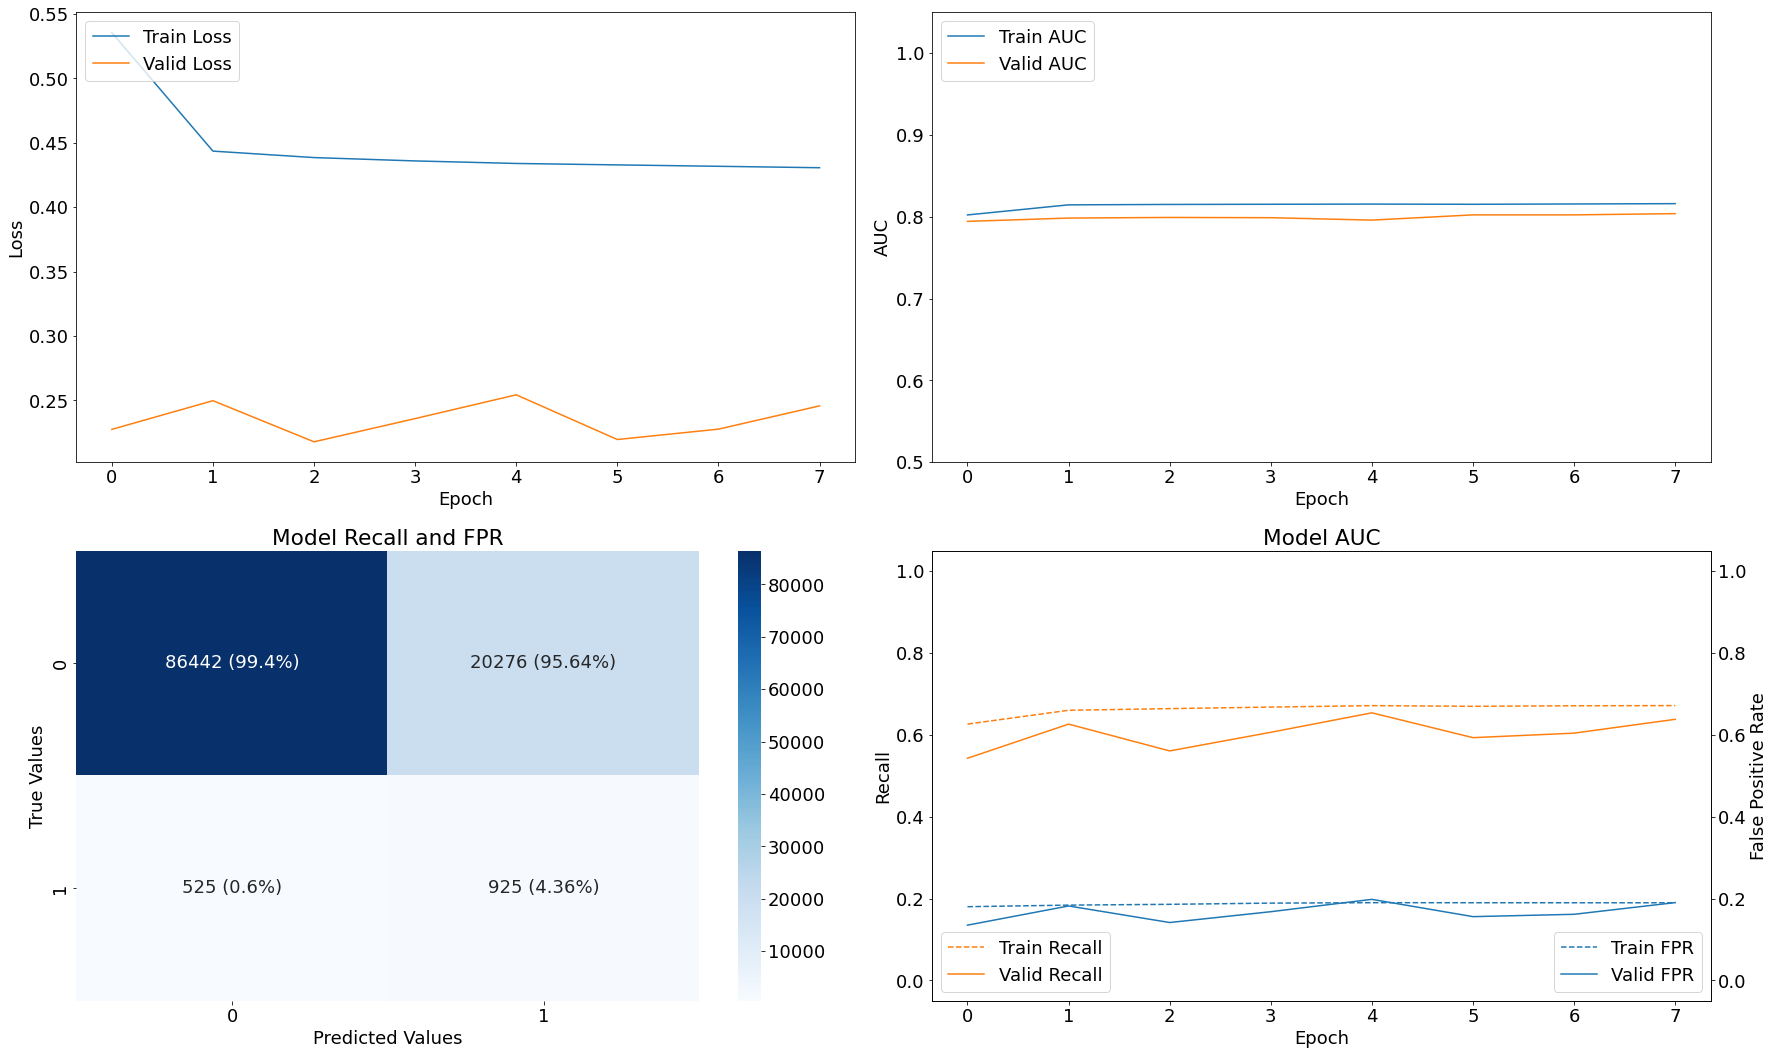

Epoch 00011: early stopping
Results for Cross Feature Model V3 with threshold = 0.2.

 Train f1: 0.5348378803568212 
 Val f1: 0.06801336026197576 

 Train Recall: 0.7774275541305542 
 Val Recall: 0.7372413873672485 

 Train FPR: 0.2824304401874542 
 Val FPR: 0.2709571123123169


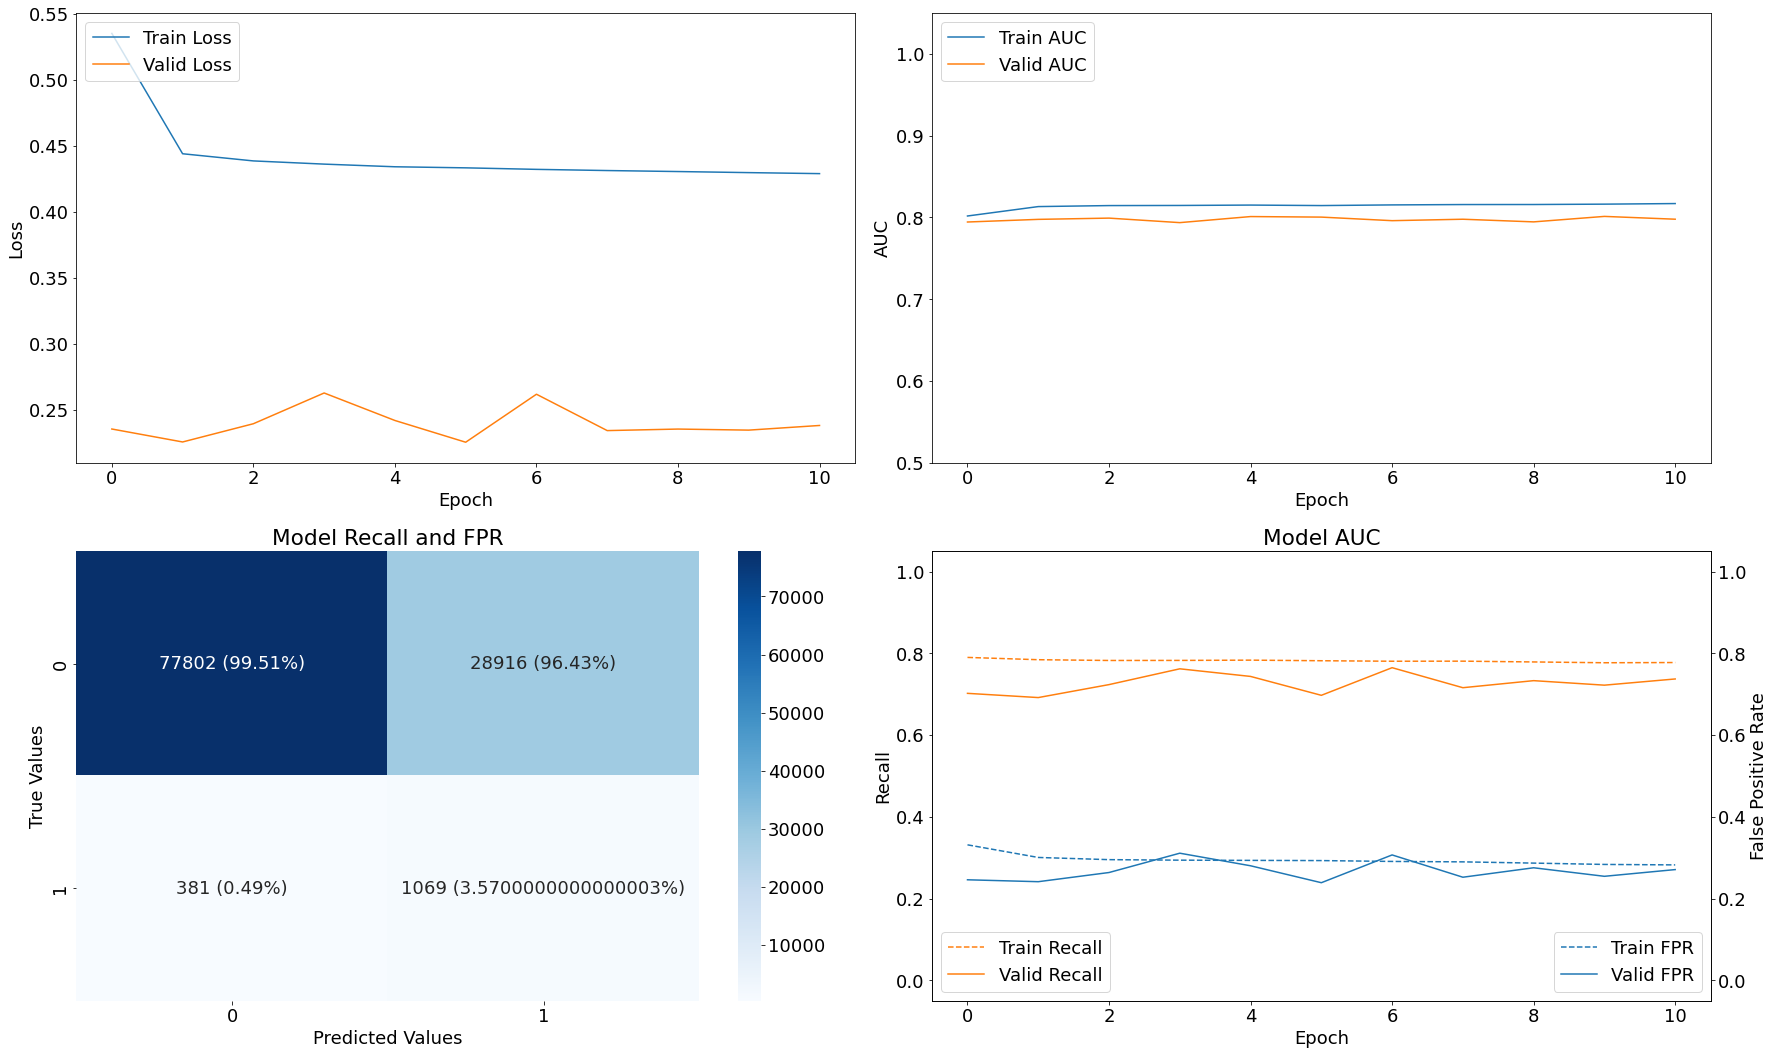

Epoch 00011: early stopping
Results for Cross Feature Model V3 with threshold = 0.1.

 Train f1: 0.4729379183625458 
 Val f1: 0.046237303441358686 

 Train Recall: 0.8849112391471863 
 Val Recall: 0.8758620619773865 

 Train FPR: 0.4643179476261139 
 Val FPR: 0.48927077651023865


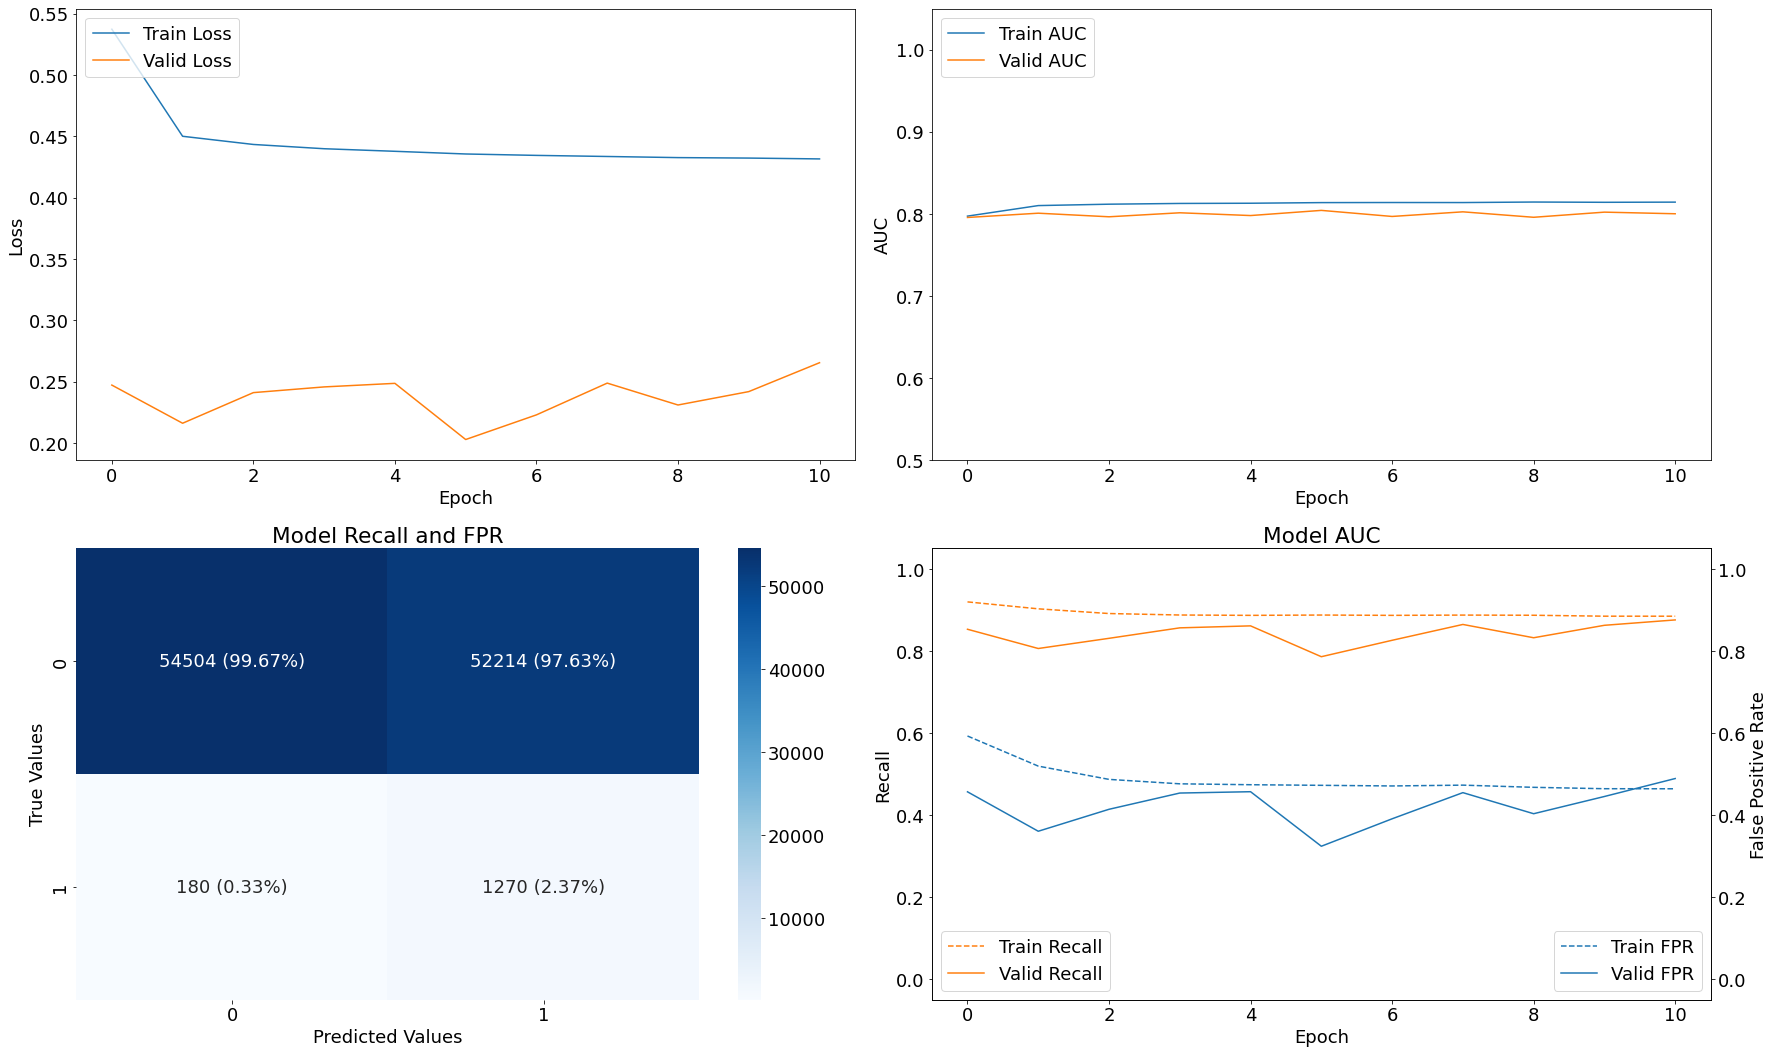

In [101]:
for t in thresholds:

    cross_modelling_v3(Xc_train_base_scaled_resampled,
                      y_train_base_resampled,
                      Xc_val_base_scaled,
                      y_val_base,
                      'Cross Feature Model V3',
                       threshold=t)

In [12]:
X_train_base_poly_scaled_resampled \
= pd.read_csv('Data/base/X_train_base_poly_scaled_resampled.csv')
X_val_base_poly_scale = pd.read_csv('Data/base/X_val_base_poly_scaled.csv')

In [7]:
poly_n_features = X_train_base_poly_scaled_resampled.shape[1]

In [8]:
def poly_modelling_v1(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    poly_model_v1 = models.Sequential()

    poly_model_v1.add(layers.Input(shape=(poly_n_features, )))
    poly_model_v1.add(layers.Dense(512, activation='relu'))
    poly_model_v1.add(layers.Dropout(0.5))
    poly_model_v1.add(layers.Dense(256, activation='relu'))
    poly_model_v1.add(layers.Dropout(0.5))
    poly_model_v1.add(layers.Dense(128, activation='relu'))
    poly_model_v1.add(layers.Dense(1, activation='sigmoid'))

    poly_model_v1.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['AUC',
                                    tf.keras.metrics.Precision(thresholds=threshold),
                                    tf.keras.metrics.Recall(thresholds=threshold),
                                    FalsePositiveRate(threshold=threshold)])

    poly_model_v1_history = poly_model_v1.fit(X_train,
                                              y_train,
                                              batch_size=batch_size,
                                              validation_data=(X_val, y_val),
                                              class_weight=class_weight,
                                              epochs=epochs,
                                              callbacks=[early_stop],
                                              verbose=0).history
    
    evaluate(poly_model_v1,
             name, 
             poly_model_v1_history,
             X_val,
             y_val,
             threshold=threshold)

In [14]:
for t in thresholds:

    poly_modelling_v1(X_train_base_poly_scaled_resampled,
                      y_train_base_resampled,
                      X_val_base_poly_scale,
                      y_val_base,
                      'Poly Feature Model V1',
                      threshold=t)

NameError: name 'class_weight' is not defined

In [ ]:
def poly_modelling_v2(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    poly_model_v2 = models.Sequential()

    poly_model_v2.add(layers.Input(shape=(poly_n_features, )))
    poly_model_v2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.L2()))
    poly_model_v2.add(layers.Dropout(0.5))
    poly_model_v2.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.L2()))
    poly_model_v2.add(layers.Dropout(0.5))
    poly_model_v2.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L2()))
    poly_model_v2.add(layers.Dense(1, activation='sigmoid'))

    poly_model_v2.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['AUC',
                                    tf.keras.metrics.Precision(thresholds=threshold),
                                    tf.keras.metrics.Recall(thresholds=threshold),
                                    FalsePositiveRate(threshold=threshold)])

    poly_model_v2_history = poly_model_v2.fit(X_train,
                                              y_train,
                                              batch_size=batch_size,
                                              validation_data=(X_val, y_val),
                                              class_weight=class_weight,
                                              epochs=epochs,
                                              callbacks=[early_stop],
                                              verbose=0).history
    
    evaluate(poly_model_v2,
             name, 
             poly_model_v2_history,
             X_val,
             y_val,
             threshold=threshold)

In [ ]:
for t in thresholds:

    poly_modelling_v2(X_train_base_poly_scaled_resampled,
                      y_train_base_resampled,
                      X_val_base_poly_scale,
                      y_val_base,
                      'Poly Feature Model V2',
                      threshold=t)

In [ ]:
def poly_modelling_v3(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    poly_model_v3 = models.Sequential()

    poly_model_v3.add(layers.Input(shape=(poly_n_features, )))
    poly_model_v3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.L2()))
    poly_model_v3.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.L2()))
    poly_model_v3.add(layers.Dropout(0.5))
    poly_model_v3.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L2()))
    poly_model_v3.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2()))
    poly_model_v3.add(layers.Dropout(0.5))
    poly_model_v3.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L2()))
    poly_model_v3.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.L2()))
    poly_model_v3.add(layers.Dropout(0.5))
    poly_model_v3.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.L2()))
    poly_model_v3.add(layers.Dense(4, activation='relu', kernel_regularizer=regularizers.L2()))
    poly_model_v3.add(layers.Dense(1, activation='sigmoid'))

    poly_model_v3.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['AUC',
                                    tf.keras.metrics.Precision(thresholds=threshold),
                                    tf.keras.metrics.Recall(thresholds=threshold),
                                    FalsePositiveRate(threshold=threshold)])

    poly_model_v3_history = poly_model_v3.fit(X_train,
                                              y_train,
                                              batch_size=batch_size,
                                              validation_data=(X_val, y_val),
                                              class_weight=class_weight,
                                              epochs=epochs,
                                              callbacks=[early_stop],
                                              verbose=0).history
    
    evaluate(poly_model_v3,
             name, 
             poly_model_v3_history,
             X_val,
             y_val,
             threshold=threshold)

In [ ]:
for t in thresholds:

    poly_modelling_v3(X_train_base_poly_scaled_resampled,
                      y_train_base_resampled,
                      X_val_base_poly_scale,
                      y_val_base,
                      'Poly Feature Model V3',
                      threshold=t)

In [66]:
X_train_v1_scaled_resampled = pd.read_csv('Data/var1/X_train_v1_scaled_resampled.csv')
y_train_v1_resampled = pd.read_csv('Data/var1/y_train_v1_resampled.csv')
X_val_v1_scaled = pd.read_csv('Data/var1/X_val_v1_scaled.csv')
y_val_v1 = pd.read_csv('Data/var1/y_val_v1.csv')
X_test_v1_scaled = pd.read_csv('Data/var1/X_test_v1_scaled.csv')
y_test_v1 = pd.read_csv('Data/var1/y_test_v1.csv')

In [43]:
n_features = X_train_v1_scaled_resampled.shape[1]

Epoch 00025: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6641391204767177 
 Val f1: 0.19636499290705084 

 Train Recall: 0.5917472243309021 
 Val Recall: 0.3613792955875397 

 Train FPR: 0.04756246134638786 
 Val FPR: 0.03151296079158783


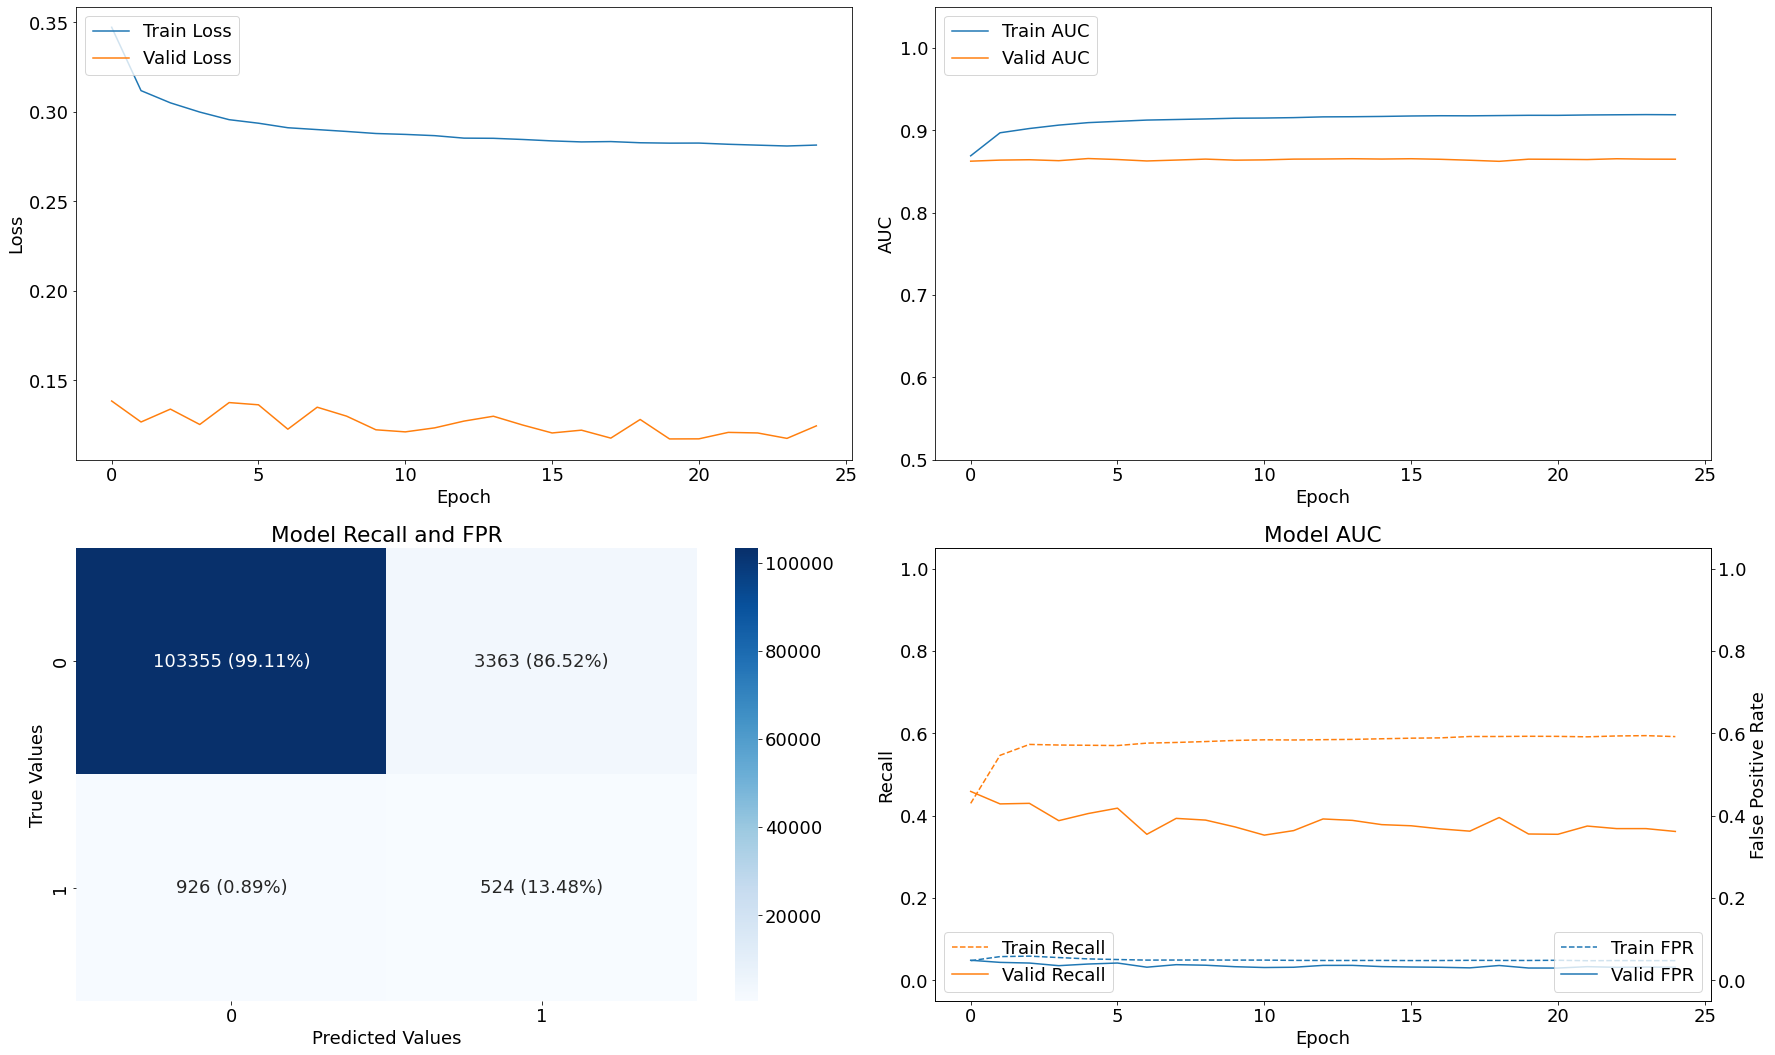

In [44]:
modelling_v4(X_train_v1_scaled_resampled,
             y_train_v1_resampled,
             X_val_v1_scaled,
             y_val_v1,
             'Variant I Model V4')

Epoch 00007: early stopping
Results for Variant I Model V5 with threshold = 0.5.

 Train f1: 0.6763742779271497 
 Val f1: 0.15445504910432165 

 Train Recall: 0.6620032787322998 
 Val Recall: 0.5248275995254517 

 Train FPR: 0.07387534528970718 
 Val FPR: 0.07161866128444672


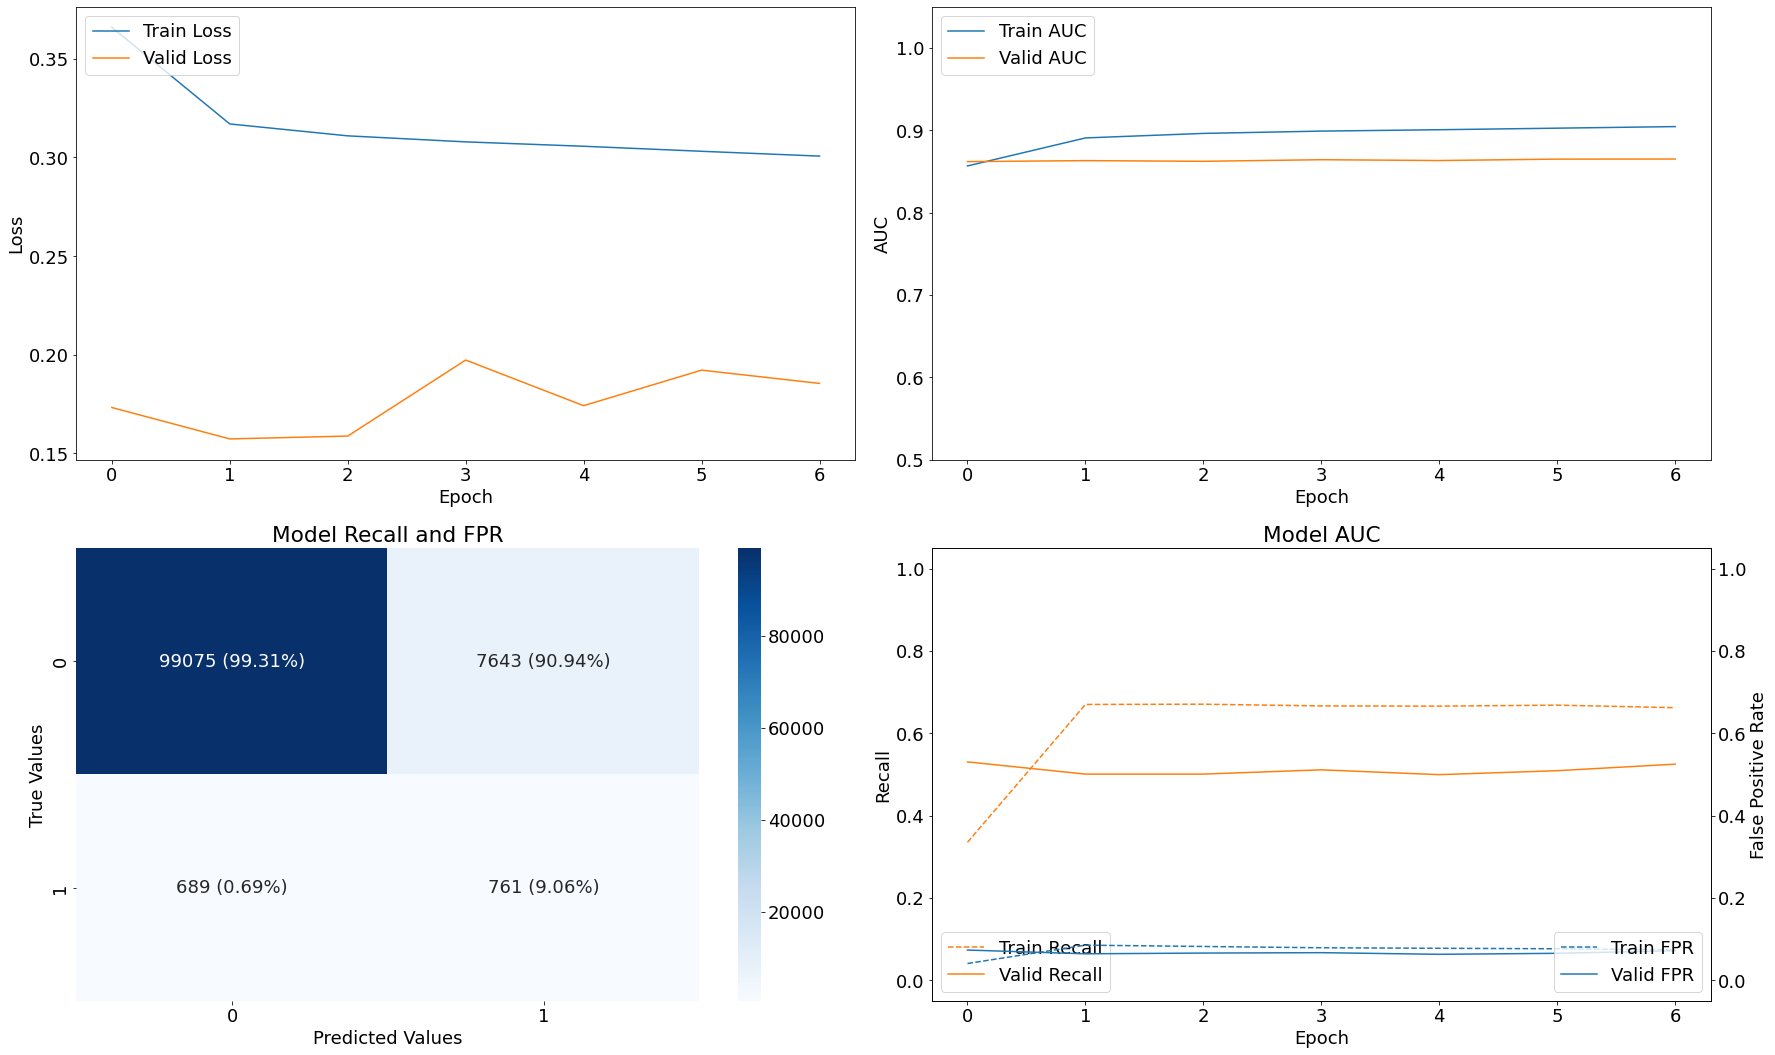

In [45]:
modelling_v5(X_train_v1_scaled_resampled,
             y_train_v1_resampled,
             X_val_v1_scaled,
             y_val_v1,
             'Variant I Model V5')

Epoch 00006: early stopping
Results for Variant I Model V6 with threshold = 0.5.

 Train f1: 0.6387211567080562 
 Val f1: 0.18179446603874186 

 Train Recall: 0.5681387186050415 
 Val Recall: 0.4806896448135376 

 Train FPR: 0.052712179720401764 
 Val FPR: 0.051734477281570435


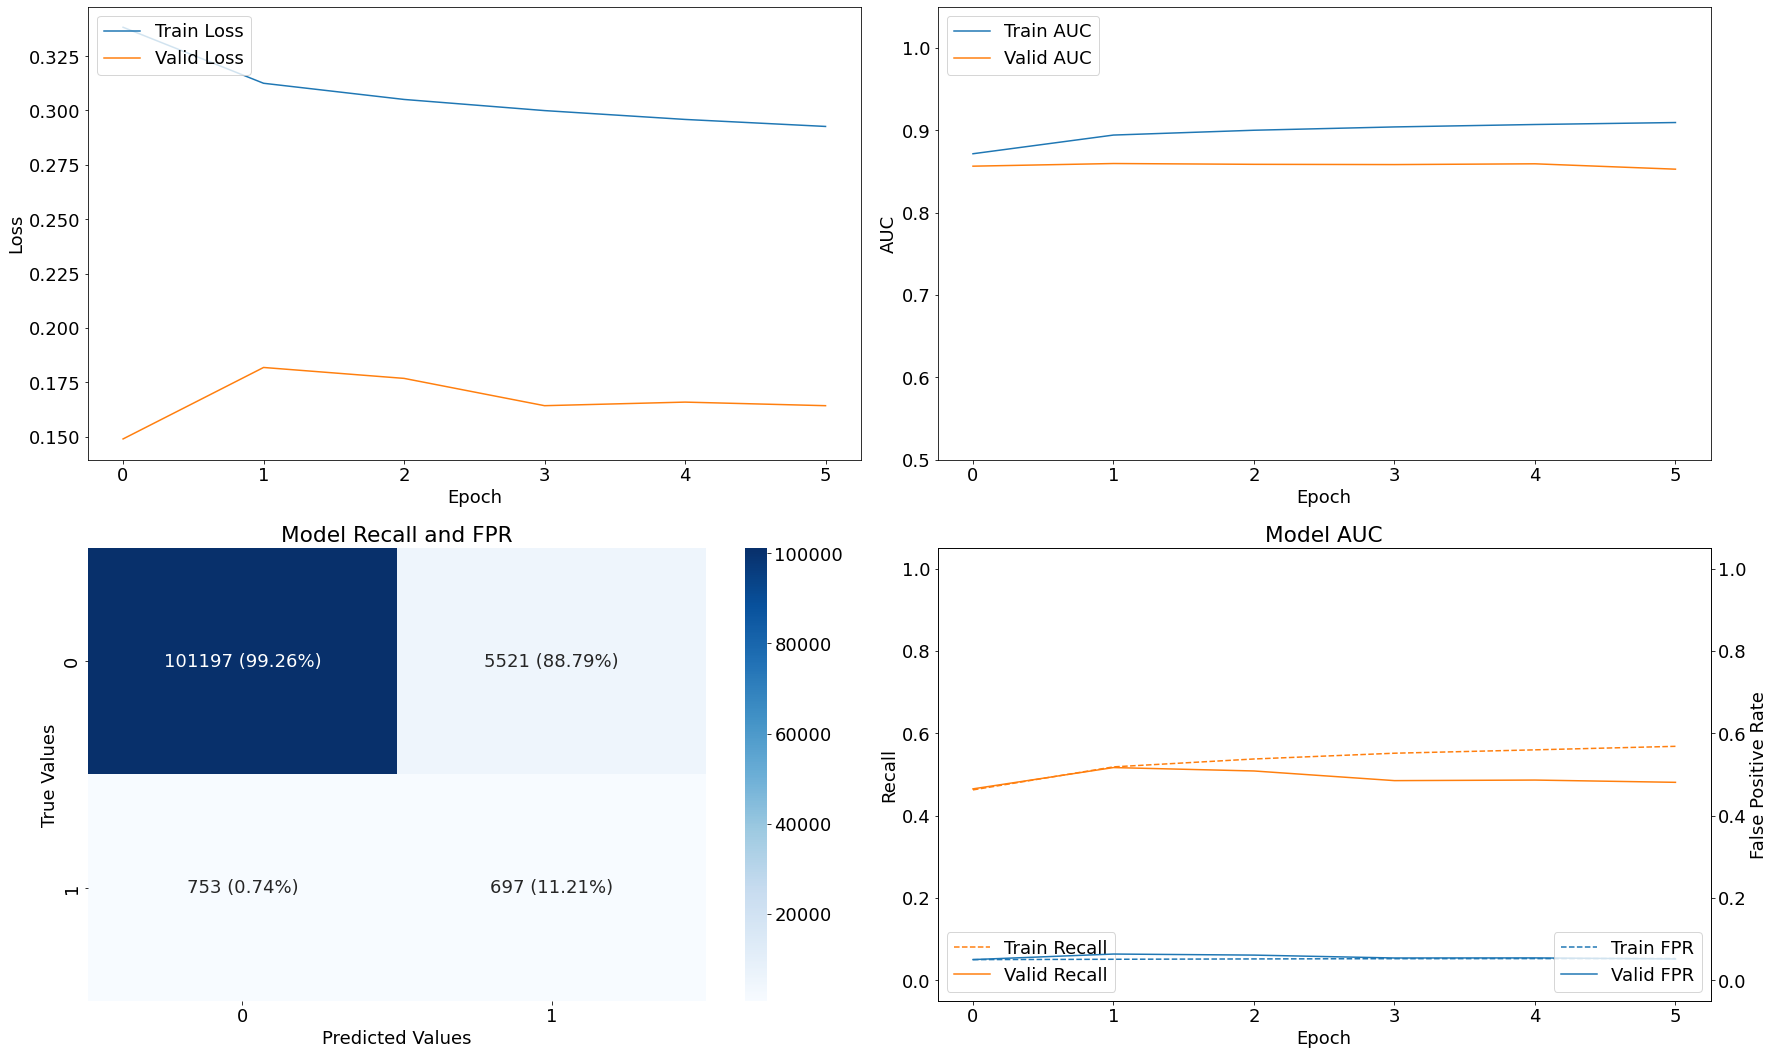

In [46]:
modelling_v6(X_train_v1_scaled_resampled,
             y_train_v1_resampled,
             X_val_v1_scaled,
             y_val_v1,
             'Variant I Model V6')

Epoch 00026: early stopping
Results for Variant I Model V7 with threshold = 0.5.

 Train f1: 0.6339590456566276 
 Val f1: 0.1681608864688463 

 Train Recall: 0.6223762035369873 
 Val Recall: 0.4786206781864166 

 Train FPR: 0.08527030050754547 
 Val FPR: 0.05725369602441788


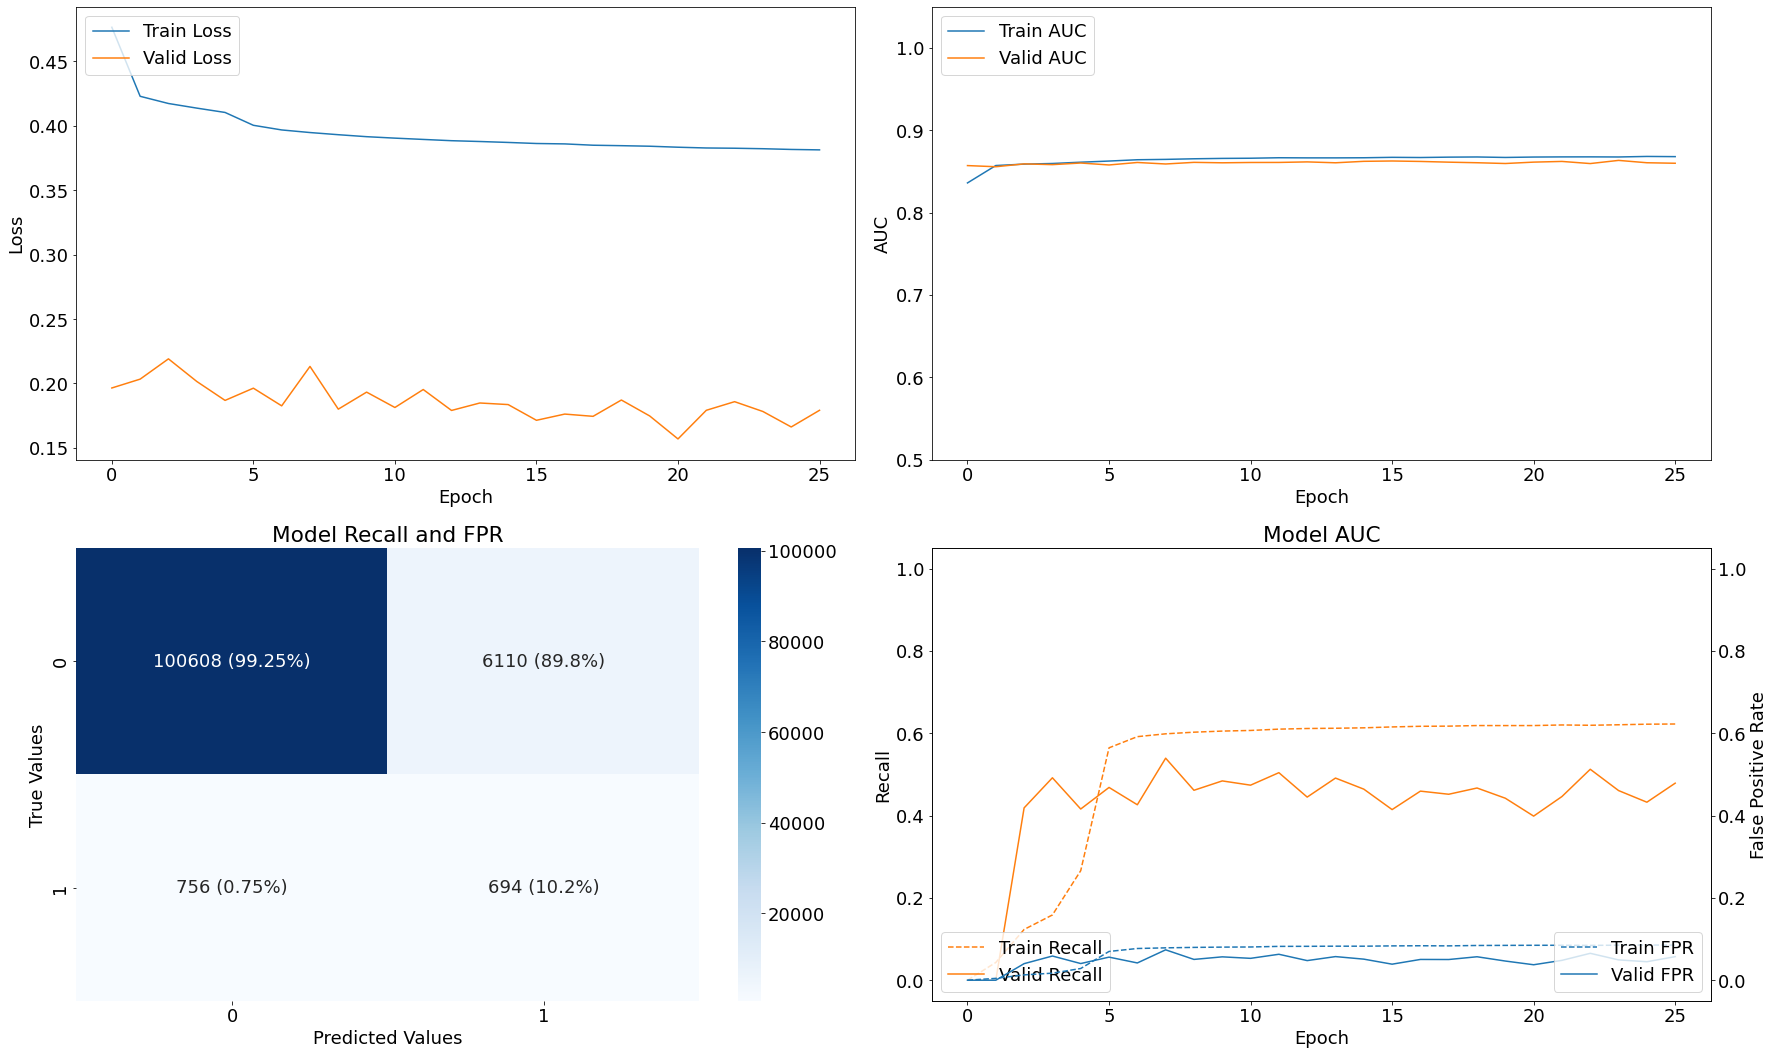

In [47]:
modelling_v7(X_train_v1_scaled_resampled,
             y_train_v1_resampled,
             X_val_v1_scaled,
             y_val_v1,
             'Variant I Model V7')

Results for Variant I Model V8 with threshold = 0.5.

 Train f1: 0.48313551518084796 
 Val f1: 0.15090679666613455 

 Train Recall: 0.38626599311828613 
 Val Recall: 0.5365517139434814 

 Train FPR: 0.053182415664196014 
 Val FPR: 0.07574167102575302


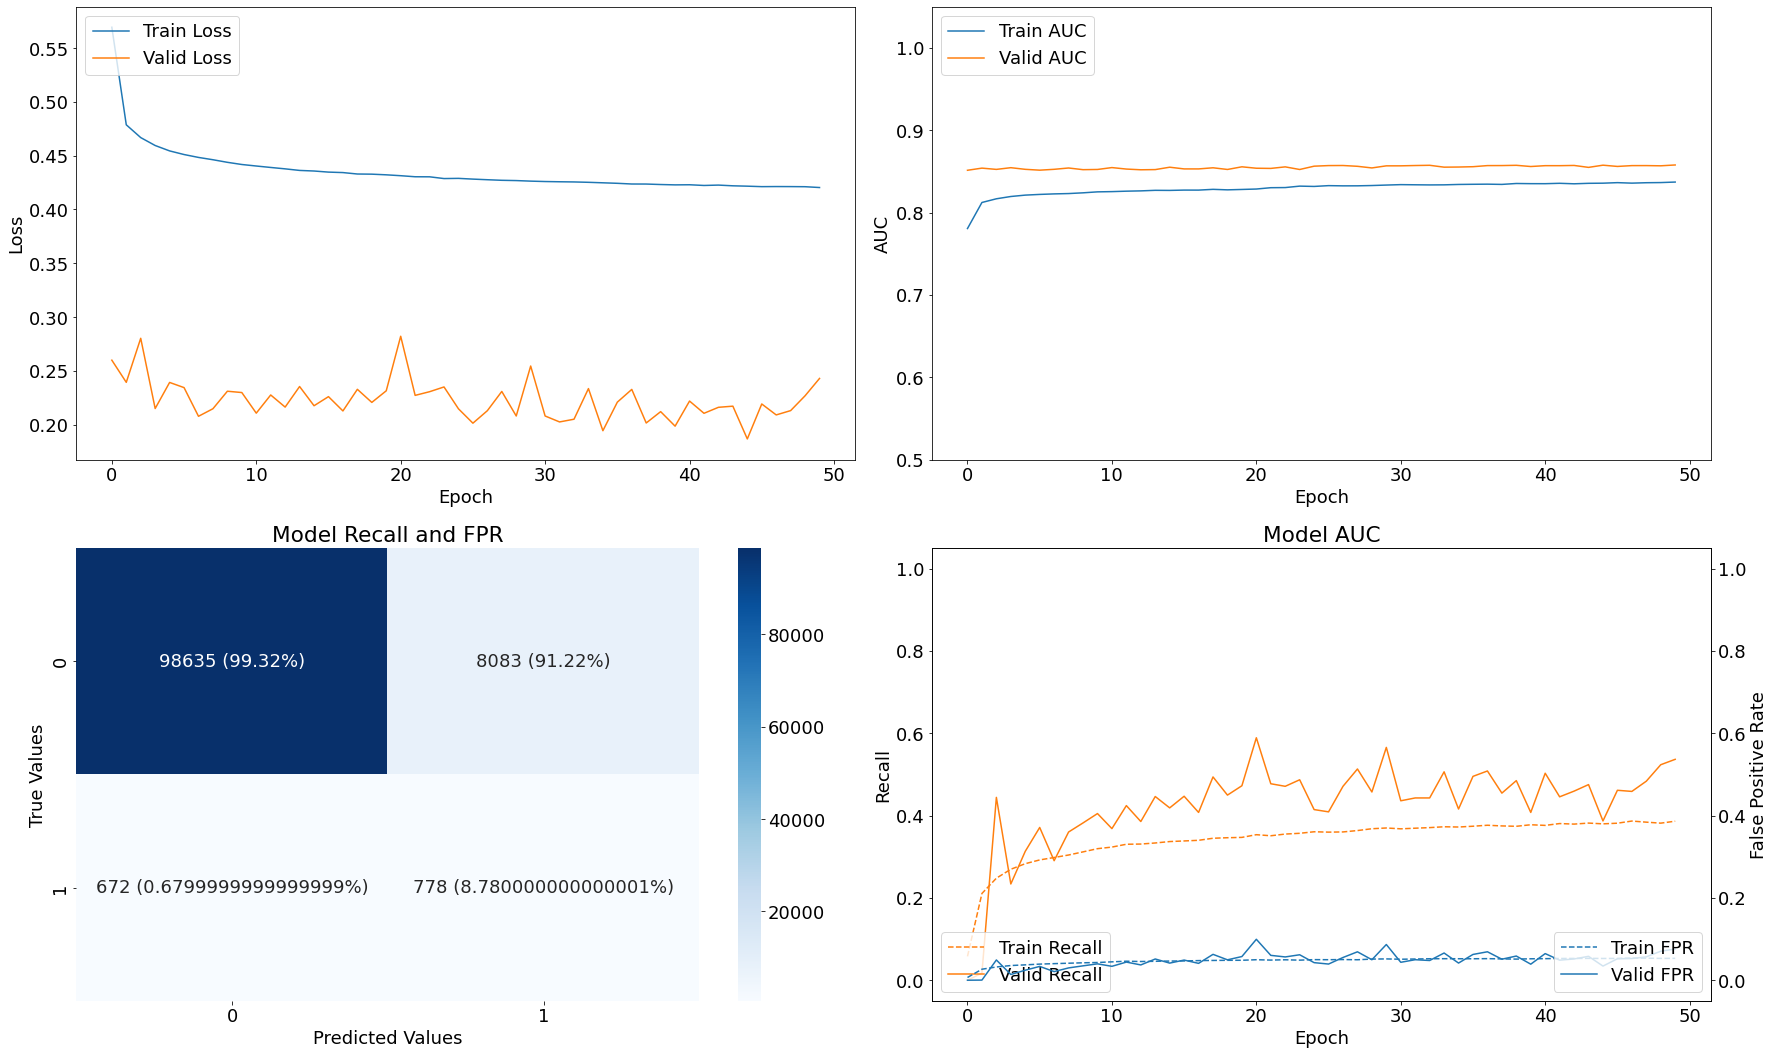

In [48]:
modelling_v8(X_train_v1_scaled_resampled,
             y_train_v1_resampled,
             X_val_v1_scaled,
             y_val_v1,
             'Variant I Model V8')

Epoch 00006: early stopping
Results for Variant I Model V9 with threshold = 0.5.

 Train f1: 0.6658588082027475 
 Val f1: 0.13916146630237383 

 Train Recall: 0.6424820423126221 
 Val Recall: 0.591724157333374 

 Train FPR: 0.07182537019252777 
 Val FPR: 0.09392042458057404


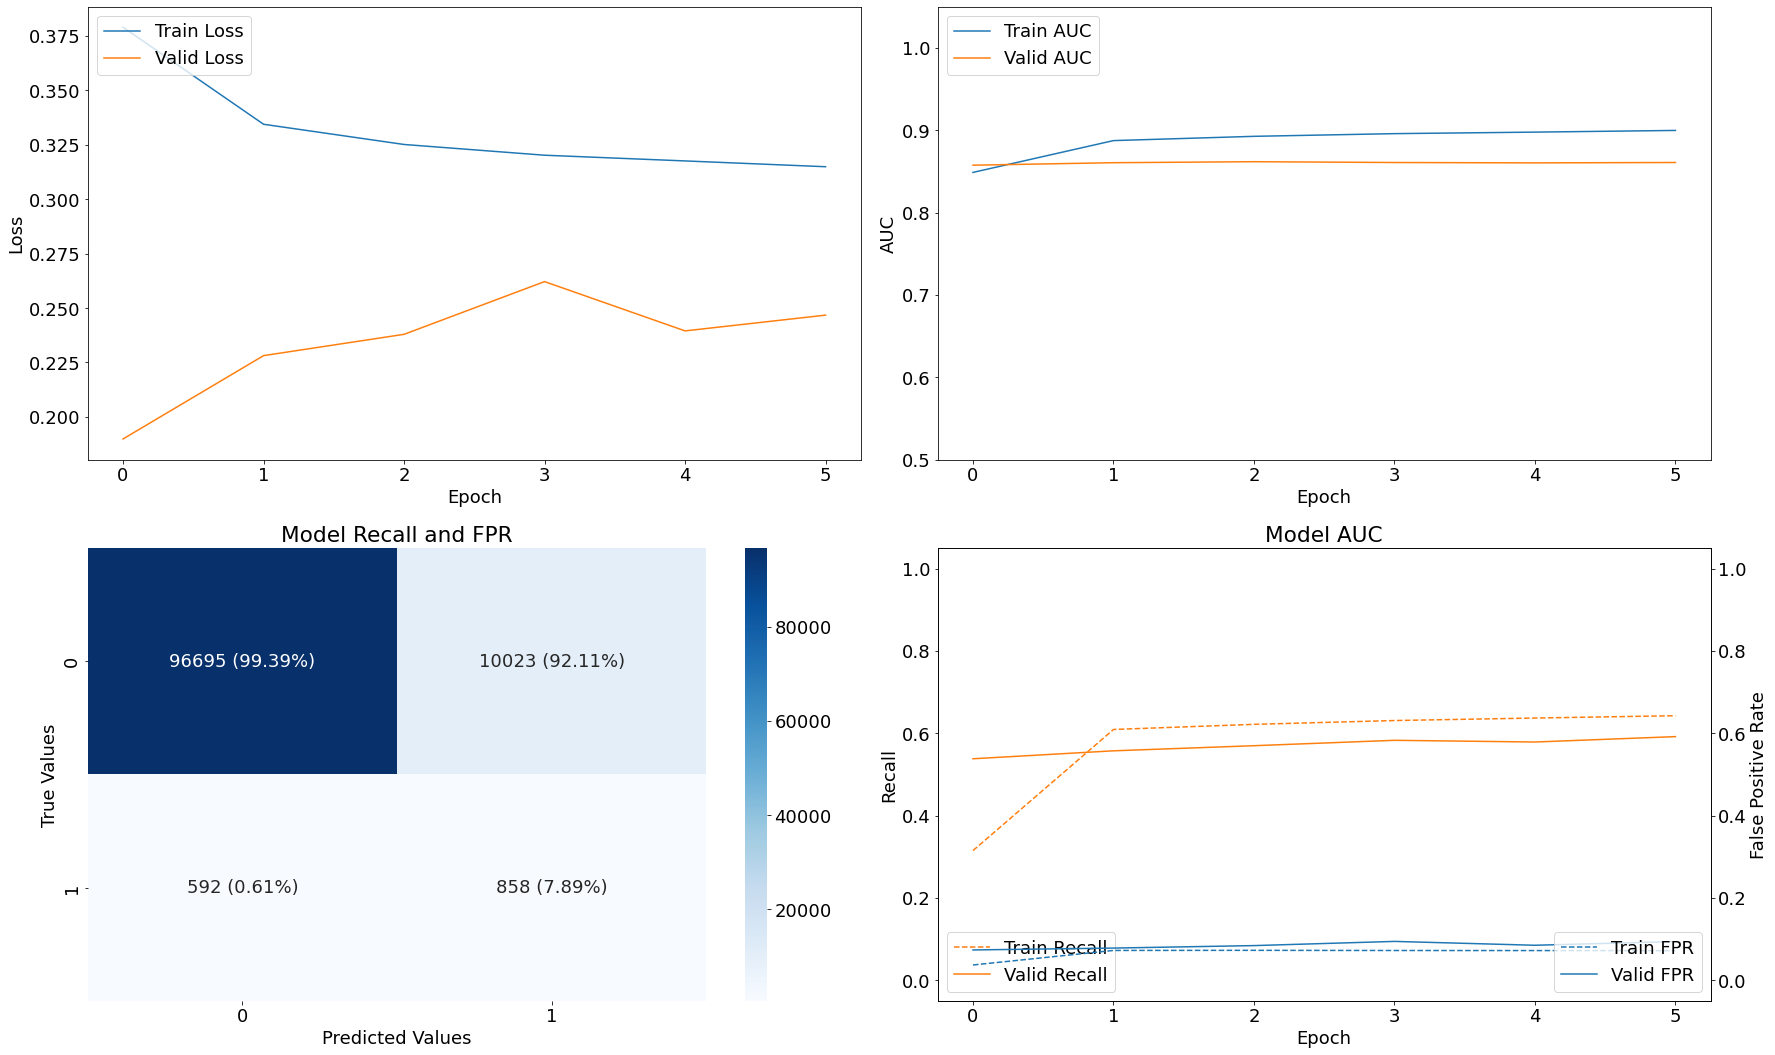

In [49]:
modelling_v9(X_train_v1_scaled_resampled,
             y_train_v1_resampled,
             X_val_v1_scaled,
             y_val_v1,
             'Variant I Model V9')

In [50]:
X_train_v2_scaled_resampled = pd.read_csv('Data/var2/X_train_v2_scaled_resampled.csv')
y_train_v2_resampled = pd.read_csv('Data/var2/y_train_v2_resampled.csv')
X_val_v2_scaled = pd.read_csv('Data/var2/X_val_v1_scaled.csv')
y_val_v2 = pd.read_csv('Data/var2/y_val_v2.csv')
X_test_v2_scaled = pd.read_csv('Data/var2/X_test_v2_scaled.csv')
y_test_v2 = pd.read_csv('Data/var2/y_test_v2.csv')

Epoch 00013: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.7196068002246594 
 Val f1: 0.21498151771165144 

 Train Recall: 0.6906903386116028 
 Val Recall: 0.4413793087005615 

 Train FPR: 0.057235341519117355 
 Val FPR: 0.03620757535099983


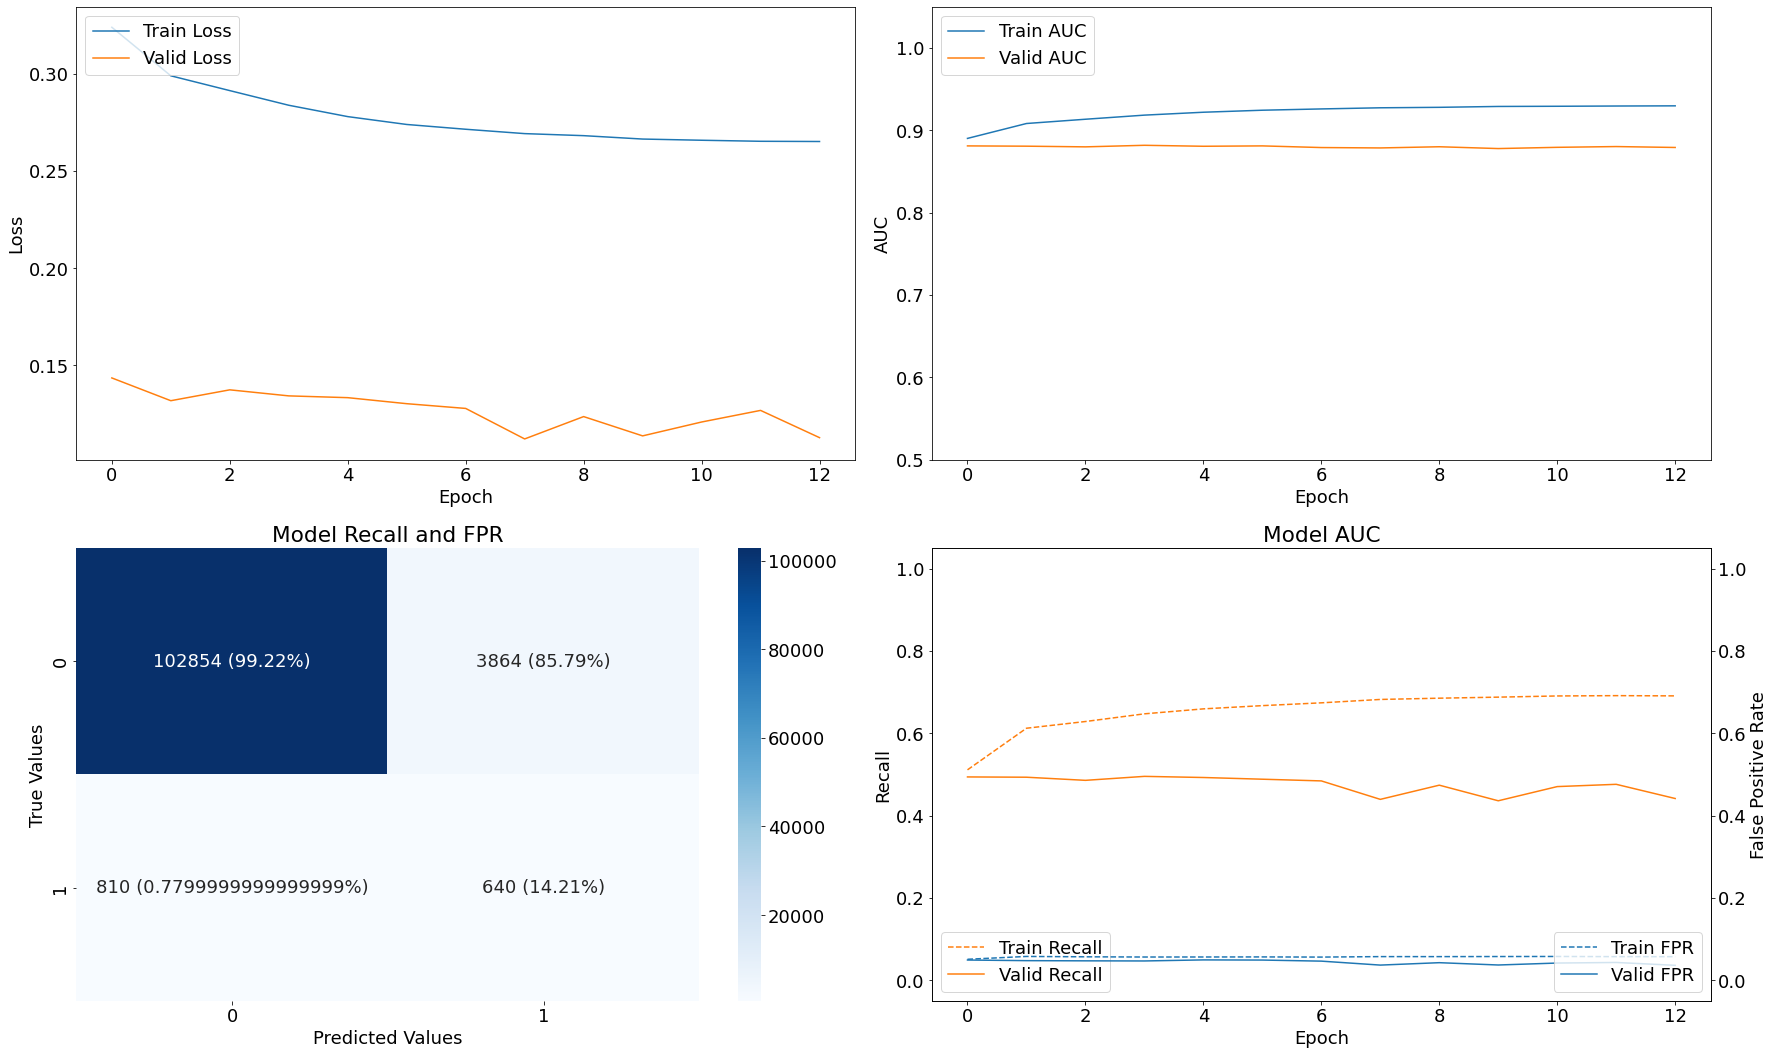

In [51]:
modelling_v4(X_train_v2_scaled_resampled,
             y_train_v2_resampled,
             X_val_v2_scaled,
             y_val_v2,
             'Variant II Model V4')

Epoch 00024: early stopping
Results for Variant II Model V5 with threshold = 0.5.

 Train f1: 0.6521238165425703 
 Val f1: 0.19639712544553803 

 Train Recall: 0.5928452610969543 
 Val Recall: 0.5 

 Train FPR: 0.05633808299899101 
 Val FPR: 0.04880151525139809


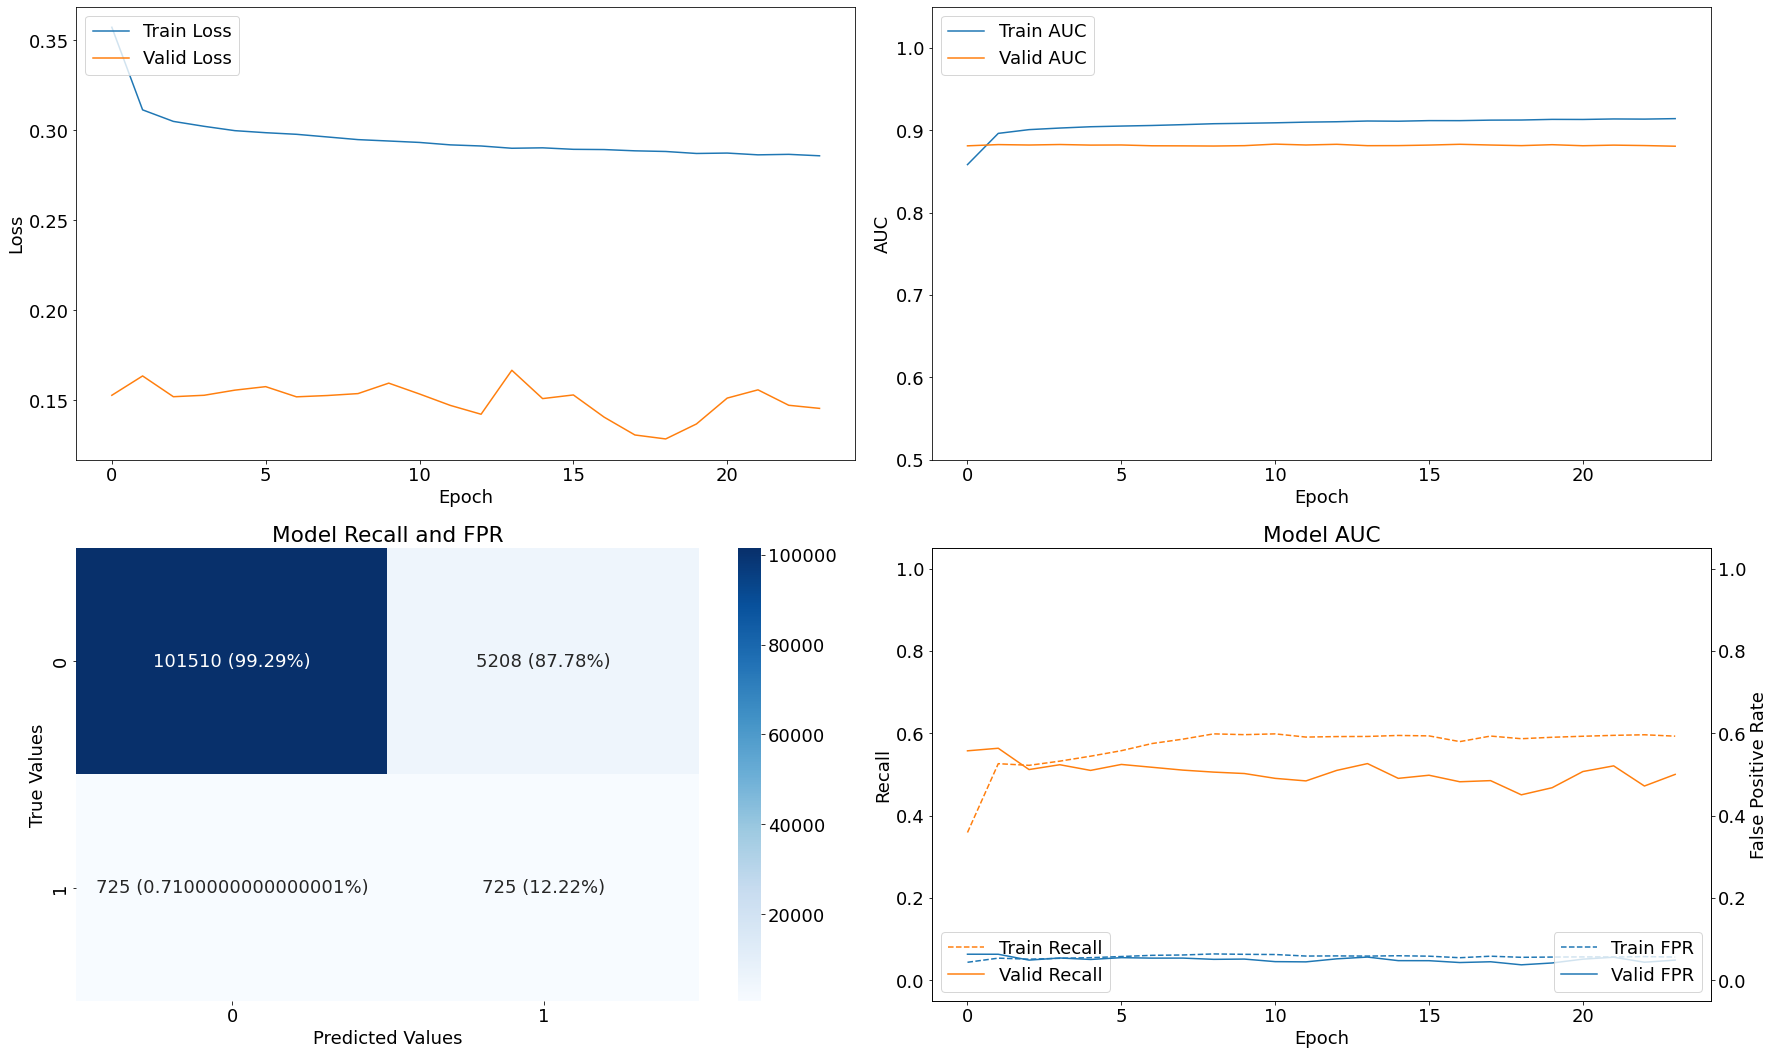

In [52]:
modelling_v5(X_train_v2_scaled_resampled,
             y_train_v2_resampled,
             X_val_v2_scaled,
             y_val_v2,
             'Variant II Model V5')

Epoch 00006: early stopping
Results for Variant II Model V6 with threshold = 0.5.

 Train f1: 0.6719983779605084 
 Val f1: 0.1604317249334121 

 Train Recall: 0.6230065822601318 
 Val Recall: 0.6048275828361511 

 Train FPR: 0.05779581516981125 
 Val FPR: 0.08064243942499161


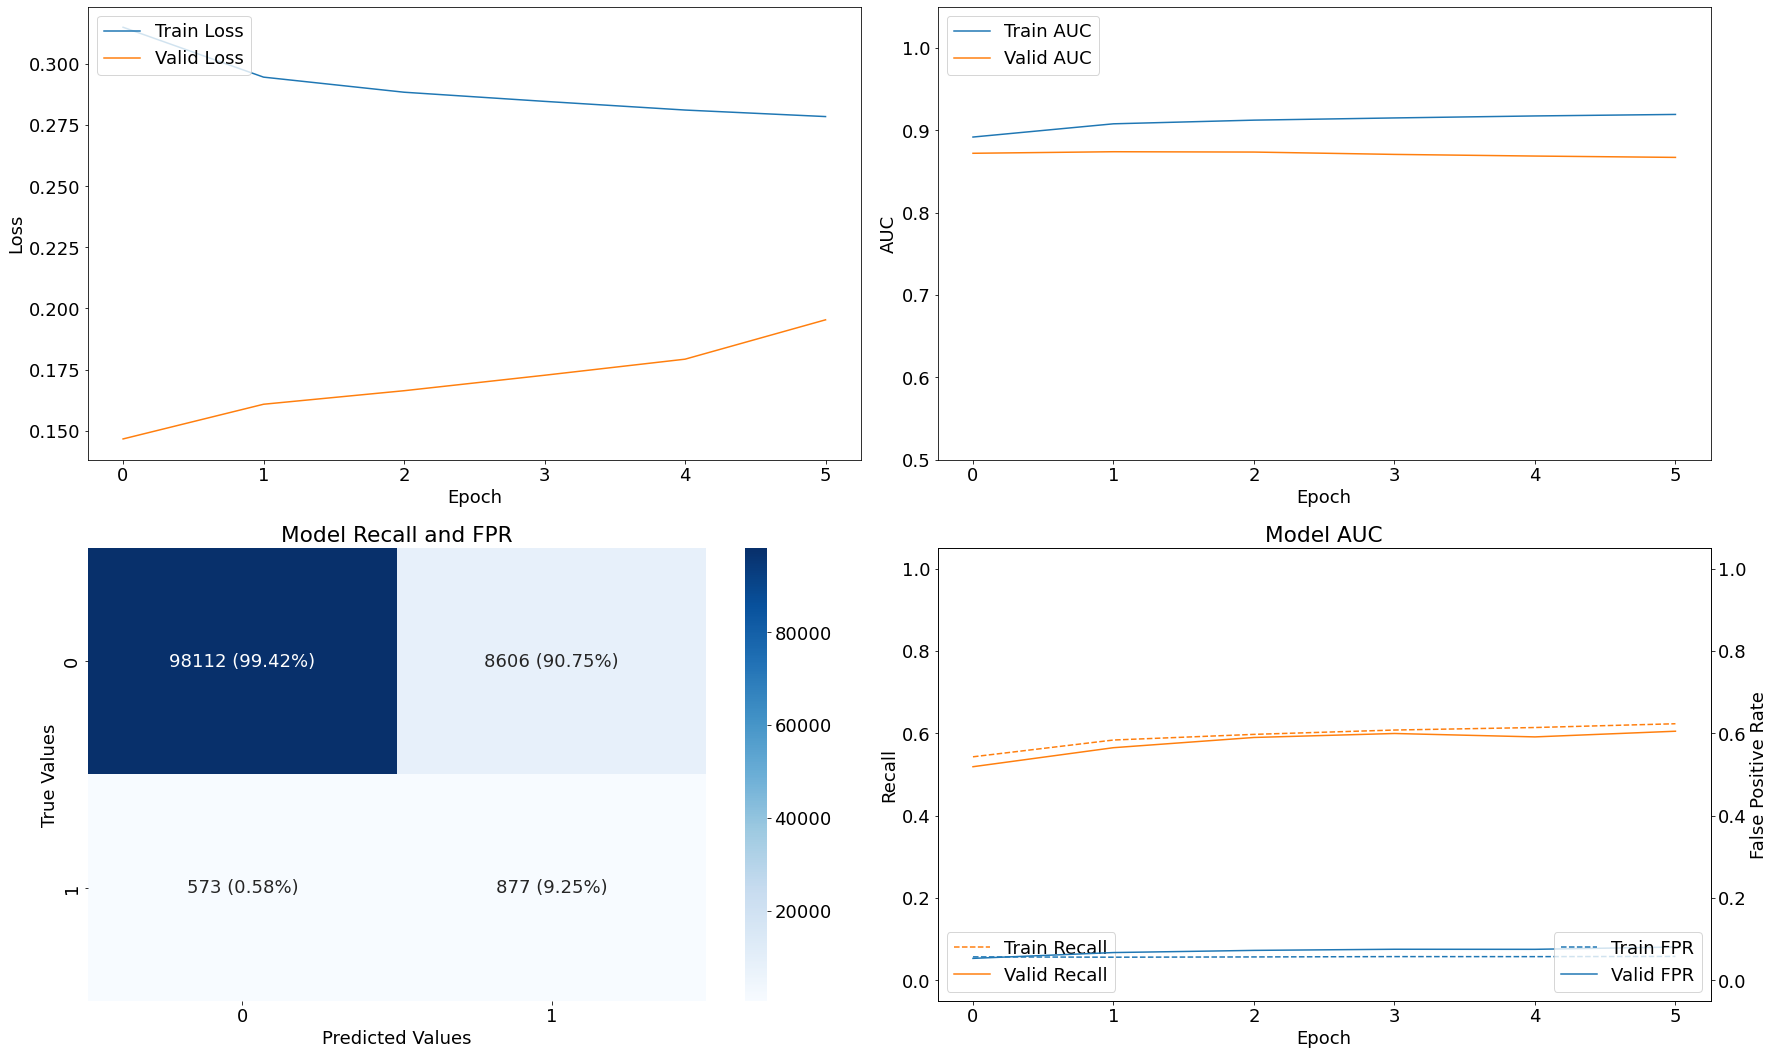

In [53]:
modelling_v6(X_train_v2_scaled_resampled,
             y_train_v2_resampled,
             X_val_v2_scaled,
             y_val_v2,
             'Variant II Model V6')

Epoch 00010: early stopping
Results for Variant II Model V7 with threshold = 0.5.

 Train f1: 0.6410706786585867 
 Val f1: 0.20198771989078143 

 Train Recall: 0.6330112218856812 
 Val Recall: 0.47655171155929565 

 Train FPR: 0.08546093851327896 
 Val FPR: 0.0440506748855114


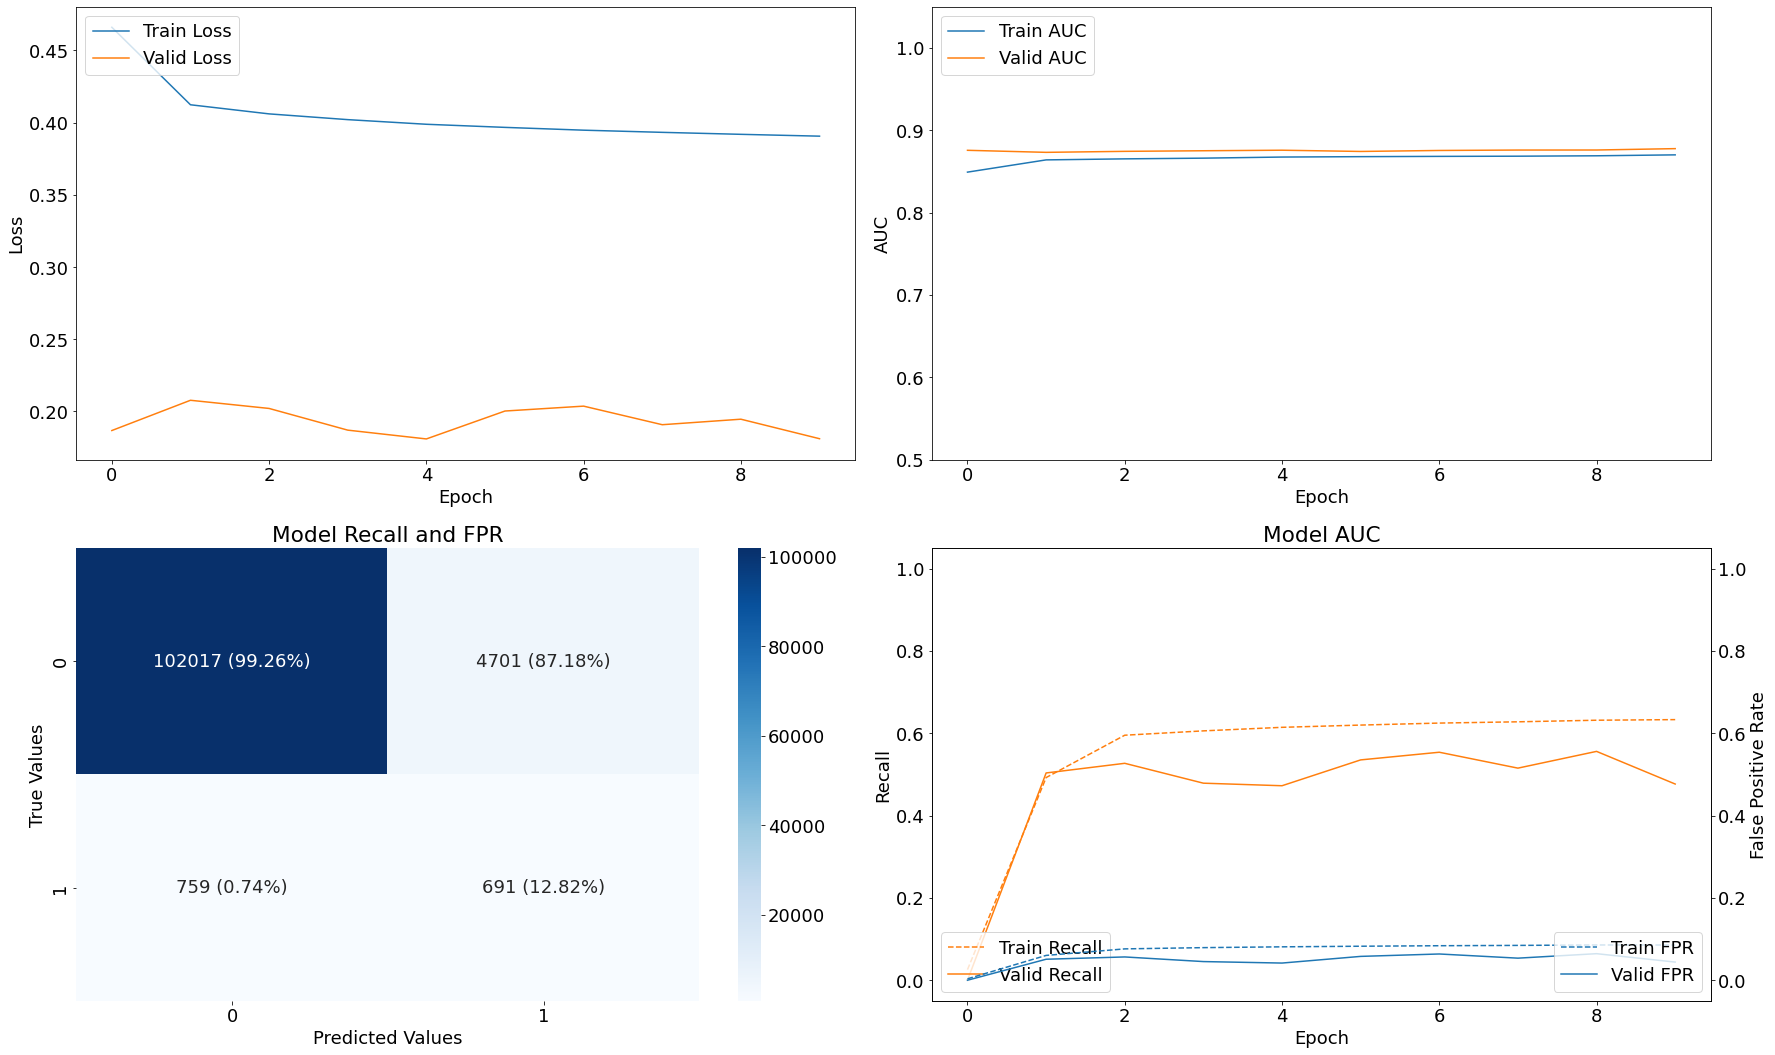

In [54]:
modelling_v7(X_train_v2_scaled_resampled,
             y_train_v2_resampled,
             X_val_v2_scaled,
             y_val_v2,
             'Variant II Model V7')

Results for Variant II Model V8 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.0 
 Val Recall: 0.0 

 Train FPR: 0.0 
 Val FPR: 0.0


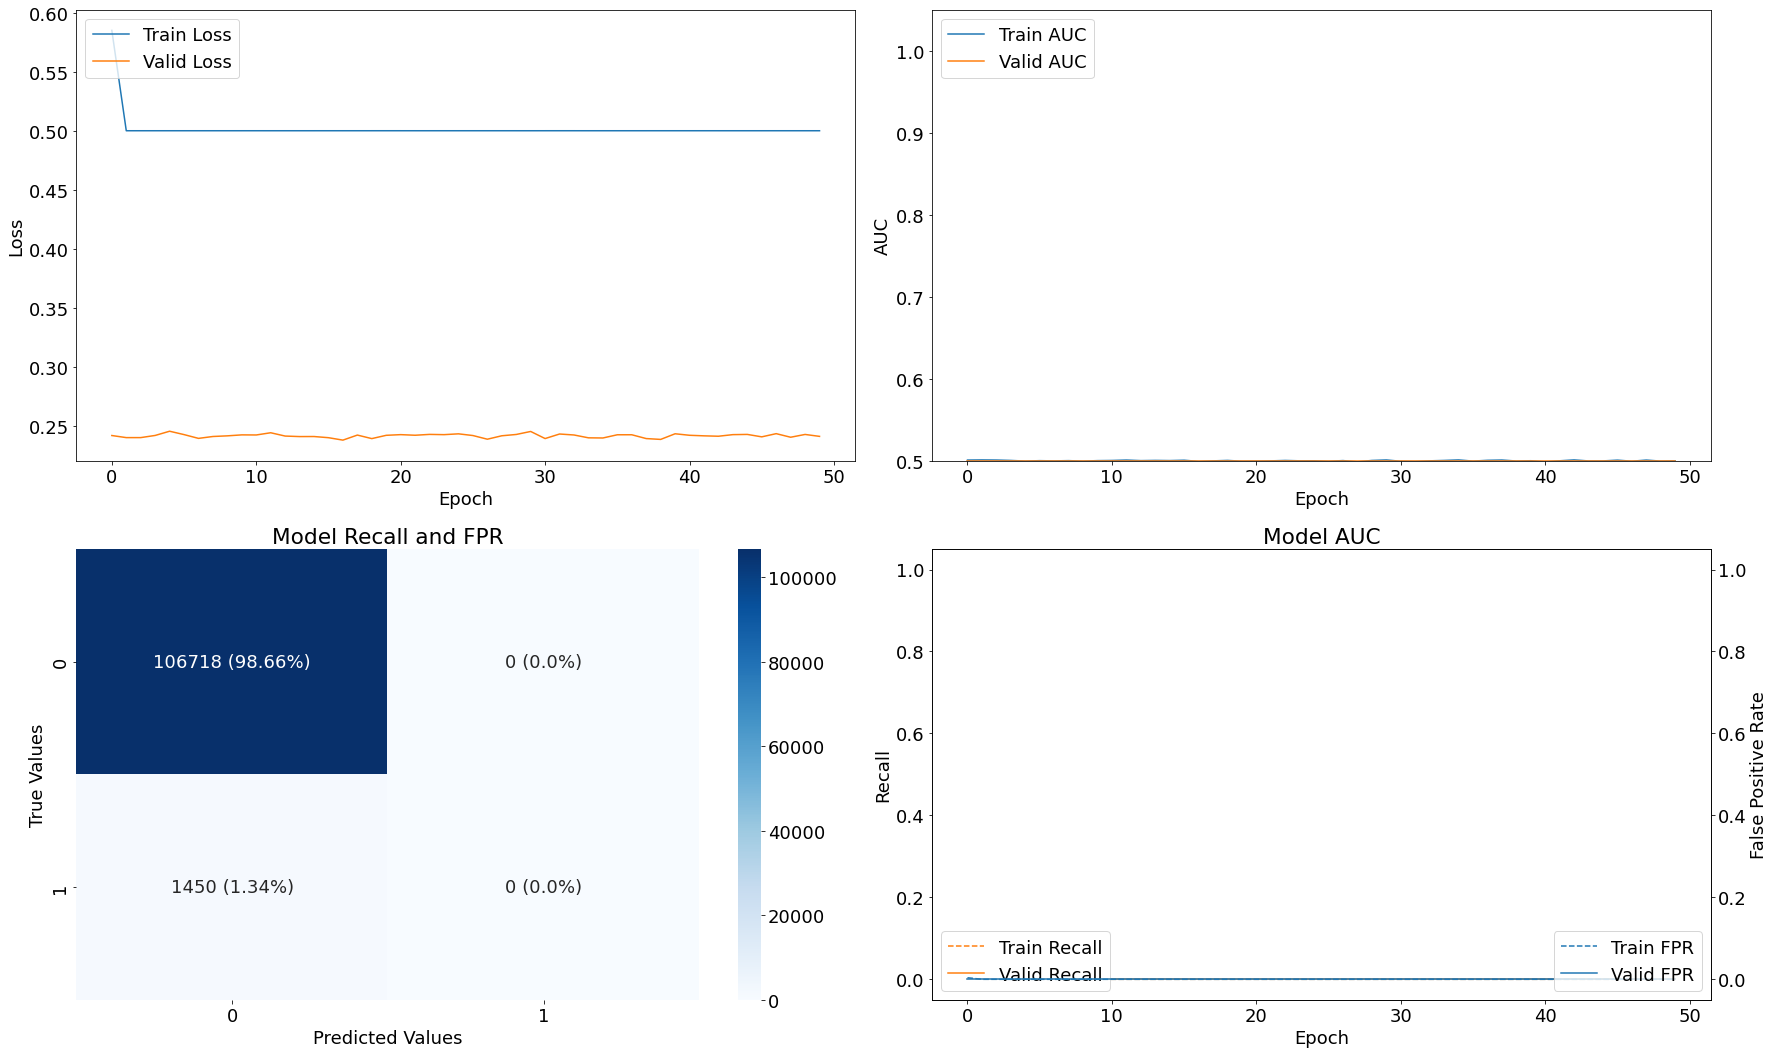

In [55]:
modelling_v8(X_train_v2_scaled_resampled,
             y_train_v2_resampled,
             X_val_v2_scaled,
             y_val_v2,
             'Variant II Model V8',
             epochs=50)

Epoch 00017: early stopping
Results for Variant II Model V9 with threshold = 0.5.

 Train f1: 0.6679103547072697 
 Val f1: 0.0068352699690136945 

 Train Recall: 0.626112699508667 
 Val Recall: 0.003448275849223137 

 Train FPR: 0.06218171864748001 
 Val FPR: 7.496392208850011e-05


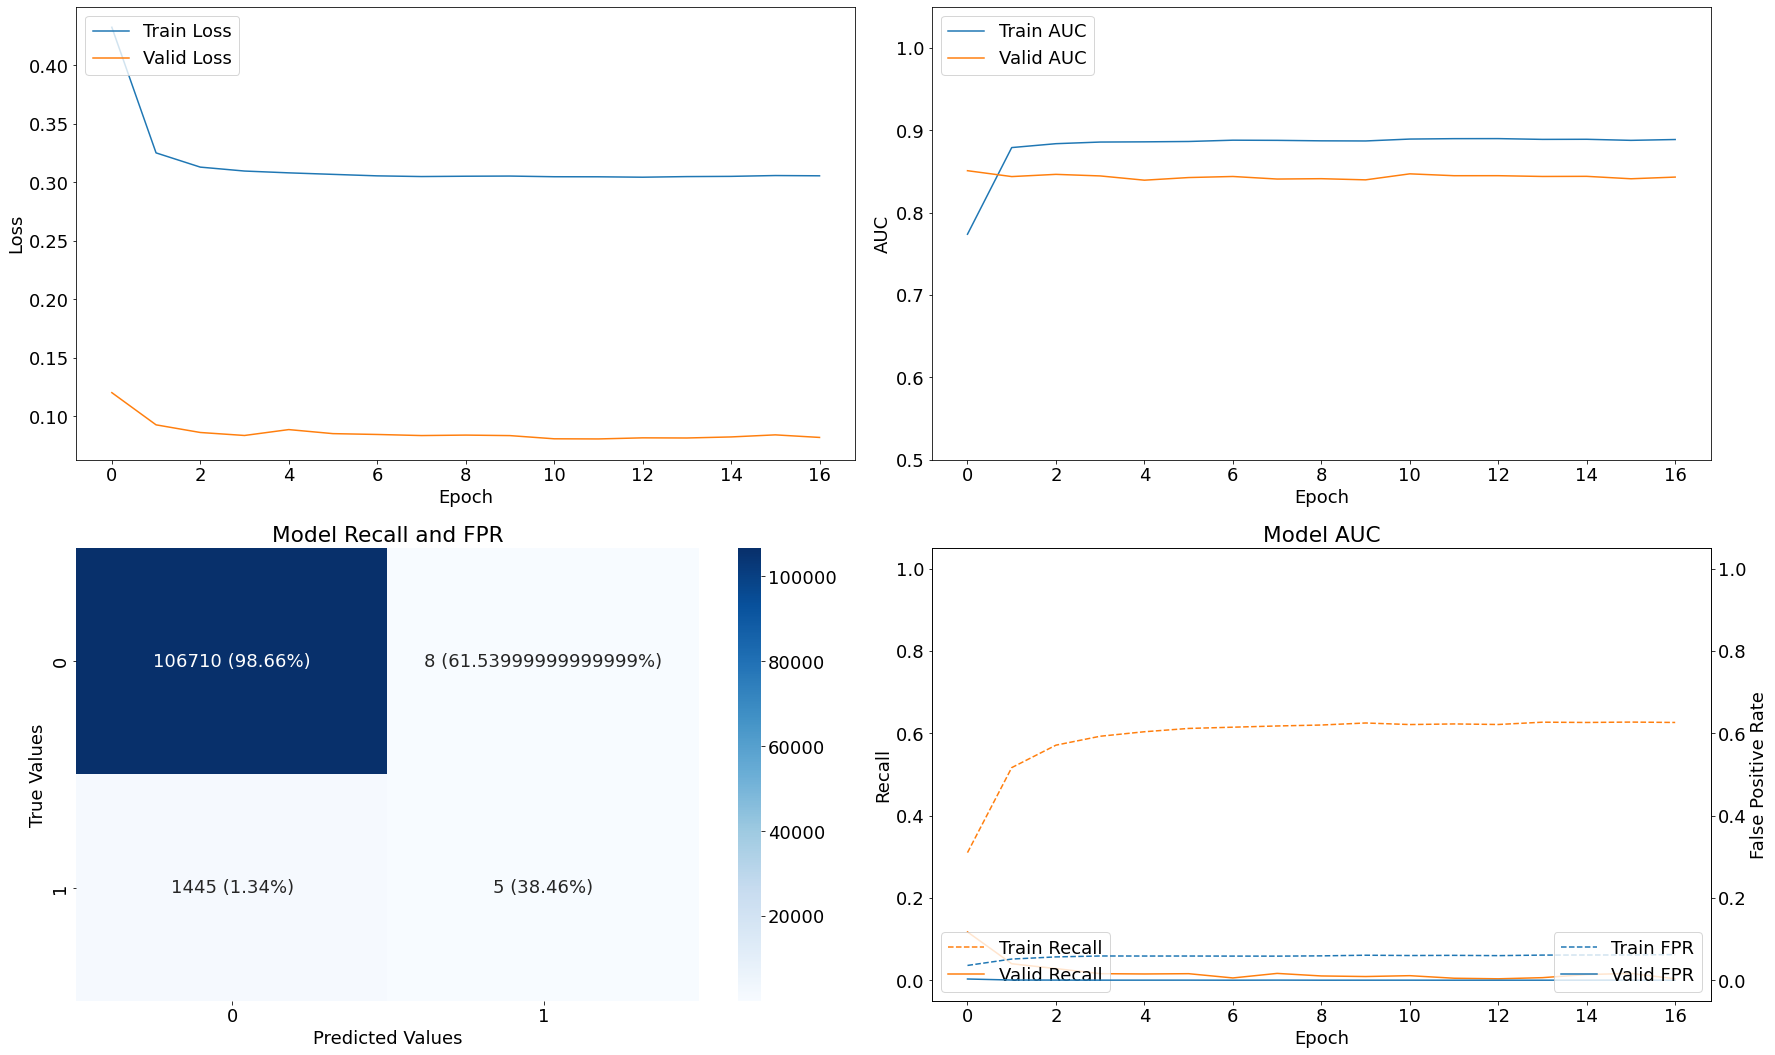

In [56]:
modelling_v9(X_train_v2_scaled_resampled,
             y_train_v2_resampled,
             X_val_v2_scaled,
             y_val_v2,
             'Variant II Model V9')

In [57]:
n_features = X_train_v3_scaled_resampled.shape[1]

NameError: name 'X_train_v3_scaled_resampled' is not defined

In [ ]:
X_train_v3_scaled_resampled = pd.read_csv('Data/var3/X_train_v3_scaled_resampled.csv')
y_train_v3_resampled = pd.read_csv('Data/var3/y_train_v3_resampled.csv')
X_val_v3_scaled = pd.read_csv('Data/var3/X_val_v3_scaled.csv')
y_val_v3 = pd.read_csv('Data/var3/y_val_v3.csv')
X_test_v3_scaled = pd.read_csv('Data/var3/X_test_v3_scaled.csv')
y_test_v3 = pd.read_csv('Data/var3/y_test_v3.csv')

In [ ]:
modelling_v4(X_train_v3_scaled_resampled,
             y_train_v3_resampled,
             X_val_v3_scaled,
             y_val_v3,
             'Variant III Model V4')

In [ ]:
modelling_v5(X_train_v3_scaled_resampled,
             y_train_v3_resampled,
             X_val_v3_scaled,
             y_val_v3,
             'Variant III Model V5')

In [ ]:
modelling_v6(X_train_v3_scaled_resampled,
             y_train_v3_resampled,
             X_val_v3_scaled,
             y_val_v3,
             'Variant III Model V6')

In [ ]:
modelling_v7(X_train_v3_scaled_resampled,
             y_train_v3_resampled,
             X_val_v3_scaled,
             y_val_v3,
             'Variant III Model V7')

In [ ]:
modelling_v8(X_train_v3_scaled_resampled,
             y_train_v3_resampled,
             X_val_v3_scaled,
             y_val_v3,
             'Variant III Model V8')

In [ ]:
modelling_v9(X_train_v3_scaled_resampled,
             y_train_v3_resampled,
             X_val_v3_scaled,
             y_val_v3,
             'Variant III Model V9')

In [ ]:
X_train_v4_scaled_resampled = pd.read_csv('Data/var4/X_train_v4_scaled_resampled.csv')
y_train_v4_resampled = pd.read_csv('Data/var4/y_train_v4_resampled.csv')
X_val_v4_scaled = pd.read_csv('Data/var4/X_val_v4_scaled.csv')
y_val_v4 = pd.read_csv('Data/var4/y_val_v4.csv')
X_test_v4_scaled = pd.read_csv('Data/var4/X_test_v4_scaled.csv')
y_test_v4 = pd.read_csv('Data/var4/y_test_v4.csv')

In [ ]:
n_features = X_train_v4_scaled_resampled.shape[1]

In [ ]:
modelling_v4(X_train_v4_scaled_resampled,
             y_train_v4_resampled,
             X_val_v4_scaled,
             y_val_v4,
             'Variant IV Model V4')

In [ ]:
modelling_v5(X_train_v4_scaled_resampled,
             y_train_v4_resampled,
             X_val_v4_scaled,
             y_val_v4,
             'Variant IV Model V5')

In [ ]:
modelling_v6(X_train_v4_scaled_resampled,
             y_train_v4_resampled,
             X_val_v4_scaled,
             y_val_v4,
             'Variant IV Model V6')

In [ ]:
modelling_v7(X_train_v4_scaled_resampled,
             y_train_v4_resampled,
             X_val_v4_scaled,
             y_val_v4,
             'Variant IV Model V7')

In [ ]:
modelling_v8(X_train_v4_scaled_resampled,
             y_train_v4_resampled,
             X_val_v4_scaled,
             y_val_v4,
             'Variant IV Model V8')

In [ ]:
modelling_v9(X_train_v4_scaled_resampled,
             y_train_v4_resampled,
             X_val_v4_scaled,
             y_val_v4,
             'Variant IV Model V9')

In [ ]:
X_train_v5_scaled_resampled = pd.read_csv('Data/var5/X_train_v5_scaled_resampled.csv')
y_train_v5_resampled = pd.read_csv('Data/var5/y_train_v5_resampled.csv')
X_val_v5_scaled = pd.read_csv('Data/var5/X_val_v5_scaled.csv')
y_val_v5 = pd.read_csv('Data/var5/y_val_v5.csv')
X_test_v5_scaled = pd.read_csv('Data/var5/X_test_v5_scaled.csv')
y_test_v5 = pd.read_csv('Data/var5/y_test_v5.csv')

In [ ]:
n_features = X_train_v5_scaled_resampled.shape[1]

In [ ]:
modelling_v4(X_train_v5_scaled_resampled,
             y_train_v5_resampled,
             X_val_v5_scaled,
             y_val_v5,
             'Variant V Model V4')

In [ ]:
modelling_v5(X_train_v5_scaled_resampled,
             y_train_v5_resampled,
             X_val_v5_scaled,
             y_val_v5,
             'Variant V Model V5')

In [ ]:
modelling_v6(X_train_v5_scaled_resampled,
             y_train_v5_resampled,
             X_val_v5_scaled,
             y_val_v5,
             'Variant V Model V6')

In [ ]:
modelling_v7(X_train_v5_scaled_resampled,
             y_train_v5_resampled,
             X_val_v5_scaled,
             y_val_v5,
             'Variant V Model V7')

In [ ]:
modelling_v8(X_train_v5_scaled_resampled,
             y_train_v5_resampled,
             X_val_v5_scaled,
             y_val_v5,
             'Variant V Model V8')

In [ ]:
modelling_v9(X_train_v5_scaled_resampled,
             y_train_v5_resampled,
             X_val_v5_scaled,
             y_val_v5,
             'Variant V Model V9')